In [1]:
#import libraries and check versions
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

print(tf.__version__)

1.15.0


In [2]:
num_epochs = 10000


In [7]:
#load the data
data = pd.read_csv('/Users/vinitaboolchandani/PhD/workspaces/tensorflow-simulations/tf/outputs/output-12-20-20000-500/data_dump-500-10.out', sep="\t", header=None)

data.columns = ['rho', 'potential', 'temp']
data.head()
x = data.rho
y = data.potential
#print(x)

#split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
y_train.shape

print(y,"\n\n")
print(y_train)
print("\n\n",y_test)

0    -3.393613
1    -3.416164
2    -3.417247
3    -3.390115
4    -3.503316
5    -3.533468
6    -3.570762
7    -3.603660
8    -3.630748
9    -3.648387
10   -3.690097
11   -3.870480
12   -4.083838
13   -4.289155
14   -4.478596
15   -4.672239
16   -4.878042
17   -5.043327
18   -3.931611
Name: potential, dtype: float64 


12   -4.083838
16   -4.878042
18   -3.931611
1    -3.416164
15   -4.672239
3    -3.390115
5    -3.533468
14   -4.478596
6    -3.570762
4    -3.503316
13   -4.289155
17   -5.043327
8    -3.630748
7    -3.603660
0    -3.393613
Name: potential, dtype: float64


 9    -3.648387
2    -3.417247
11   -3.870480
10   -3.690097
Name: potential, dtype: float64


In [8]:
#Normalization
x_train_reshape = x_train.values.reshape((-1,1))
x_test_reshape = x_test.values.reshape((-1,1))

y_train_reshape = y_train.values.reshape((-1,1))
y_test_reshape = y_test.values.reshape((-1,1))

# print(y_train_reshape)

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(x_train_reshape)
xtrain_scale=scaler_x.transform(x_train_reshape)
scaler_x.fit(x_test_reshape)
xtest_scale=scaler_x.transform(x_test_reshape)
scaler_y.fit(y_train_reshape)
ytrain_scale=scaler_y.transform(y_train_reshape)
scaler_y.fit(y_test_reshape)
ytest_scale=scaler_y.transform(y_test_reshape)
print(ytrain_scale)

[[0.58037852]
 [0.09997809]
 [0.67245835]
 [0.98424298]
 [0.22446505]
 [1.        ]
 [0.91328826]
 [0.34159603]
 [0.89072961]
 [0.93152648]
 [0.45618612]
 [0.        ]
 [0.85444506]
 [0.87083028]
 [0.99788386]]


In [9]:
#define the model
model = Sequential()
model.add(Dense(1, input_dim=1, kernel_initializer='normal', activation='relu'))
model.add(Dense(48, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 48)                96        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 49        
Total params: 147
Trainable params: 147
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compile the model
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history=model.fit(xtrain_scale, ytrain_scale, epochs=40000, batch_size=5, verbose=1, validation_split=0.2)
predictions = model.predict(xtest_scale)

Train on 12 samples, validate on 3 samples
Epoch 1/40000
12/12 [==============================] - 0s 8ms/sample - loss: 0.0229 - mean_squared_error: 0.0229 - mean_absolute_error: 0.0789 - val_loss: 1.5775e-04 - val_mean_squared_error: 1.5775e-04 - val_mean_absolute_error: 0.0087
Epoch 2/40000
12/12 [==============================] - 0s 456us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0764 - val_loss: 1.8619e-04 - val_mean_squared_error: 1.8619e-04 - val_mean_absolute_error: 0.0093
Epoch 3/40000
12/12 [==============================] - 0s 543us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0769 - val_loss: 1.7940e-04 - val_mean_squared_error: 1.7940e-04 - val_mean_absolute_error: 0.0091
Epoch 4/40000
12/12 [==============================] - 0s 511us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0777 - val_loss: 2.0160e-04 - val_mean_squared_error: 2.0160e-04 - val_mean_absolute_error: 0.0097
Epo

12/12 [==============================] - 0s 511us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - mean_absolute_error: 0.0734 - val_loss: 2.1896e-04 - val_mean_squared_error: 2.1896e-04 - val_mean_absolute_error: 0.0100
Epoch 36/40000
12/12 [==============================] - 0s 509us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - mean_absolute_error: 0.0734 - val_loss: 1.7535e-04 - val_mean_squared_error: 1.7535e-04 - val_mean_absolute_error: 0.0091
Epoch 37/40000
12/12 [==============================] - 0s 503us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0730 - val_loss: 2.1213e-04 - val_mean_squared_error: 2.1213e-04 - val_mean_absolute_error: 0.0098
Epoch 38/40000
12/12 [==============================] - 0s 524us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0747 - val_loss: 4.9228e-04 - val_mean_squared_error: 4.9228e-04 - val_mean_absolute_error: 0.0185
Epoch 39/40000
12/12 [==============================] -

12/12 [==============================] - 0s 478us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0797 - val_loss: 3.5880e-04 - val_mean_squared_error: 3.5880e-04 - val_mean_absolute_error: 0.0157
Epoch 70/40000
12/12 [==============================] - 0s 473us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0784 - val_loss: 1.2524e-04 - val_mean_squared_error: 1.2524e-04 - val_mean_absolute_error: 0.0078
Epoch 71/40000
12/12 [==============================] - 0s 494us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0750 - val_loss: 8.9941e-05 - val_mean_squared_error: 8.9941e-05 - val_mean_absolute_error: 0.0072
Epoch 72/40000
12/12 [==============================] - 0s 497us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0738 - val_loss: 1.2450e-04 - val_mean_squared_error: 1.2450e-04 - val_mean_absolute_error: 0.0078
Epoch 73/40000
12/12 [==============================] -

12/12 [==============================] - 0s 499us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0772 - val_loss: 4.2526e-04 - val_mean_squared_error: 4.2526e-04 - val_mean_absolute_error: 0.0169
Epoch 104/40000
12/12 [==============================] - 0s 449us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0760 - val_loss: 2.4480e-04 - val_mean_squared_error: 2.4480e-04 - val_mean_absolute_error: 0.0111
Epoch 105/40000
12/12 [==============================] - 0s 514us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0745 - val_loss: 1.6054e-04 - val_mean_squared_error: 1.6054e-04 - val_mean_absolute_error: 0.0088
Epoch 106/40000
12/12 [==============================] - 0s 563us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0732 - val_loss: 1.2894e-04 - val_mean_squared_error: 1.2894e-04 - val_mean_absolute_error: 0.0079
Epoch 107/40000
12/12 [=============================

12/12 [==============================] - 0s 542us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0783 - val_loss: 2.2448e-04 - val_mean_squared_error: 2.2448e-04 - val_mean_absolute_error: 0.0123
Epoch 138/40000
12/12 [==============================] - 0s 495us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0794 - val_loss: 3.7982e-04 - val_mean_squared_error: 3.7982e-04 - val_mean_absolute_error: 0.0171
Epoch 139/40000
12/12 [==============================] - 0s 499us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0805 - val_loss: 3.4550e-04 - val_mean_squared_error: 3.4550e-04 - val_mean_absolute_error: 0.0160
Epoch 140/40000
12/12 [==============================] - 0s 480us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0799 - val_loss: 3.2579e-04 - val_mean_squared_error: 3.2579e-04 - val_mean_absolute_error: 0.0154
Epoch 141/40000
12/12 [=============================

12/12 [==============================] - 0s 527us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0773 - val_loss: 8.6580e-04 - val_mean_squared_error: 8.6580e-04 - val_mean_absolute_error: 0.0264
Epoch 172/40000
12/12 [==============================] - 0s 545us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0810 - val_loss: 9.7409e-04 - val_mean_squared_error: 9.7409e-04 - val_mean_absolute_error: 0.0282
Epoch 173/40000
12/12 [==============================] - 0s 533us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0805 - val_loss: 6.0653e-04 - val_mean_squared_error: 6.0653e-04 - val_mean_absolute_error: 0.0213
Epoch 174/40000
12/12 [==============================] - 0s 510us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0787 - val_loss: 2.0957e-04 - val_mean_squared_error: 2.0957e-04 - val_mean_absolute_error: 0.0098
Epoch 175/40000
12/12 [=============================

12/12 [==============================] - 0s 445us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0782 - val_loss: 4.2674e-04 - val_mean_squared_error: 4.2674e-04 - val_mean_absolute_error: 0.0168
Epoch 206/40000
12/12 [==============================] - 0s 469us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0784 - val_loss: 2.5000e-04 - val_mean_squared_error: 2.5000e-04 - val_mean_absolute_error: 0.0112
Epoch 207/40000
12/12 [==============================] - 0s 434us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0763 - val_loss: 1.1103e-04 - val_mean_squared_error: 1.1103e-04 - val_mean_absolute_error: 0.0079
Epoch 208/40000
12/12 [==============================] - 0s 472us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0756 - val_loss: 8.4760e-05 - val_mean_squared_error: 8.4760e-05 - val_mean_absolute_error: 0.0085
Epoch 209/40000
12/12 [=============================

12/12 [==============================] - 0s 419us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0800 - val_loss: 5.7646e-04 - val_mean_squared_error: 5.7646e-04 - val_mean_absolute_error: 0.0206
Epoch 240/40000
12/12 [==============================] - 0s 474us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0822 - val_loss: 6.6768e-04 - val_mean_squared_error: 6.6768e-04 - val_mean_absolute_error: 0.0225
Epoch 241/40000
12/12 [==============================] - 0s 512us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0814 - val_loss: 4.3841e-04 - val_mean_squared_error: 4.3841e-04 - val_mean_absolute_error: 0.0173
Epoch 242/40000
12/12 [==============================] - 0s 448us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0808 - val_loss: 1.9640e-04 - val_mean_squared_error: 1.9640e-04 - val_mean_absolute_error: 0.0095
Epoch 243/40000
12/12 [=============================

12/12 [==============================] - 0s 462us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0781 - val_loss: 2.6007e-04 - val_mean_squared_error: 2.6007e-04 - val_mean_absolute_error: 0.0109
Epoch 274/40000
12/12 [==============================] - 0s 469us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0780 - val_loss: 1.6029e-04 - val_mean_squared_error: 1.6029e-04 - val_mean_absolute_error: 0.0088
Epoch 275/40000
12/12 [==============================] - 0s 477us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0766 - val_loss: 1.2376e-04 - val_mean_squared_error: 1.2376e-04 - val_mean_absolute_error: 0.0087
Epoch 276/40000
12/12 [==============================] - 0s 444us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0771 - val_loss: 1.5763e-04 - val_mean_squared_error: 1.5763e-04 - val_mean_absolute_error: 0.0087
Epoch 277/40000
12/12 [=============================

Epoch 307/40000
12/12 [==============================] - 0s 467us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0788 - val_loss: 8.5132e-05 - val_mean_squared_error: 8.5132e-05 - val_mean_absolute_error: 0.0075
Epoch 308/40000
12/12 [==============================] - 0s 431us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0768 - val_loss: 1.2028e-04 - val_mean_squared_error: 1.2028e-04 - val_mean_absolute_error: 0.0077
Epoch 309/40000
12/12 [==============================] - 0s 460us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0799 - val_loss: 2.2297e-04 - val_mean_squared_error: 2.2297e-04 - val_mean_absolute_error: 0.0110
Epoch 310/40000
12/12 [==============================] - 0s 533us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0798 - val_loss: 2.5088e-04 - val_mean_squared_error: 2.5088e-04 - val_mean_absolute_error: 0.0117
Epoch 311/40000
12/12 [=============

Epoch 341/40000
12/12 [==============================] - 0s 461us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0767 - val_loss: 1.3312e-04 - val_mean_squared_error: 1.3312e-04 - val_mean_absolute_error: 0.0079
Epoch 342/40000
12/12 [==============================] - 0s 480us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0769 - val_loss: 1.7705e-04 - val_mean_squared_error: 1.7705e-04 - val_mean_absolute_error: 0.0095
Epoch 343/40000
12/12 [==============================] - 0s 500us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0774 - val_loss: 2.0770e-04 - val_mean_squared_error: 2.0770e-04 - val_mean_absolute_error: 0.0106
Epoch 344/40000
12/12 [==============================] - 0s 477us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0771 - val_loss: 1.6480e-04 - val_mean_squared_error: 1.6480e-04 - val_mean_absolute_error: 0.0087
Epoch 345/40000
12/12 [=============

Epoch 375/40000
12/12 [==============================] - 0s 536us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0784 - val_loss: 3.3364e-04 - val_mean_squared_error: 3.3364e-04 - val_mean_absolute_error: 0.0151
Epoch 376/40000
12/12 [==============================] - 0s 520us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0776 - val_loss: 2.6051e-04 - val_mean_squared_error: 2.6051e-04 - val_mean_absolute_error: 0.0124
Epoch 377/40000
12/12 [==============================] - 0s 552us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0789 - val_loss: 3.4587e-04 - val_mean_squared_error: 3.4587e-04 - val_mean_absolute_error: 0.0152
Epoch 378/40000
12/12 [==============================] - 0s 531us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0792 - val_loss: 3.4938e-04 - val_mean_squared_error: 3.4938e-04 - val_mean_absolute_error: 0.0155
Epoch 379/40000
12/12 [=============

Epoch 409/40000
12/12 [==============================] - 0s 474us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0766 - val_loss: 1.6409e-04 - val_mean_squared_error: 1.6409e-04 - val_mean_absolute_error: 0.0088
Epoch 410/40000
12/12 [==============================] - 0s 477us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0764 - val_loss: 1.8538e-04 - val_mean_squared_error: 1.8538e-04 - val_mean_absolute_error: 0.0093
Epoch 411/40000
12/12 [==============================] - 0s 485us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0763 - val_loss: 2.1453e-04 - val_mean_squared_error: 2.1453e-04 - val_mean_absolute_error: 0.0099
Epoch 412/40000
12/12 [==============================] - 0s 544us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0764 - val_loss: 1.9396e-04 - val_mean_squared_error: 1.9396e-04 - val_mean_absolute_error: 0.0095
Epoch 413/40000
12/12 [=============

Epoch 443/40000
12/12 [==============================] - 0s 545us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0780 - val_loss: 1.8151e-04 - val_mean_squared_error: 1.8151e-04 - val_mean_absolute_error: 0.0092
Epoch 444/40000
12/12 [==============================] - 0s 467us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0793 - val_loss: 3.6101e-04 - val_mean_squared_error: 3.6101e-04 - val_mean_absolute_error: 0.0150
Epoch 445/40000
12/12 [==============================] - 0s 512us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0803 - val_loss: 4.8146e-04 - val_mean_squared_error: 4.8146e-04 - val_mean_absolute_error: 0.0180
Epoch 446/40000
12/12 [==============================] - 0s 519us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0808 - val_loss: 4.5498e-04 - val_mean_squared_error: 4.5498e-04 - val_mean_absolute_error: 0.0172
Epoch 447/40000
12/12 [=============

Epoch 477/40000
12/12 [==============================] - 0s 503us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0774 - val_loss: 2.7628e-04 - val_mean_squared_error: 2.7628e-04 - val_mean_absolute_error: 0.0120
Epoch 478/40000
12/12 [==============================] - 0s 513us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0759 - val_loss: 1.4651e-04 - val_mean_squared_error: 1.4651e-04 - val_mean_absolute_error: 0.0084
Epoch 479/40000
12/12 [==============================] - 0s 501us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0745 - val_loss: 1.0683e-04 - val_mean_squared_error: 1.0683e-04 - val_mean_absolute_error: 0.0086
Epoch 480/40000
12/12 [==============================] - 0s 558us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0749 - val_loss: 1.0889e-04 - val_mean_squared_error: 1.0889e-04 - val_mean_absolute_error: 0.0087
Epoch 481/40000
12/12 [=============

Epoch 511/40000
12/12 [==============================] - 0s 531us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0766 - val_loss: 1.6721e-04 - val_mean_squared_error: 1.6721e-04 - val_mean_absolute_error: 0.0089
Epoch 512/40000
12/12 [==============================] - 0s 477us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0766 - val_loss: 1.8264e-04 - val_mean_squared_error: 1.8264e-04 - val_mean_absolute_error: 0.0093
Epoch 513/40000
12/12 [==============================] - 0s 486us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0759 - val_loss: 1.9252e-04 - val_mean_squared_error: 1.9252e-04 - val_mean_absolute_error: 0.0095
Epoch 514/40000
12/12 [==============================] - 0s 522us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0776 - val_loss: 3.1837e-04 - val_mean_squared_error: 3.1837e-04 - val_mean_absolute_error: 0.0137
Epoch 515/40000
12/12 [=============

Epoch 545/40000
12/12 [==============================] - 0s 478us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0786 - val_loss: 1.0673e-04 - val_mean_squared_error: 1.0673e-04 - val_mean_absolute_error: 0.0093
Epoch 546/40000
12/12 [==============================] - 0s 462us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0788 - val_loss: 1.0044e-04 - val_mean_squared_error: 1.0044e-04 - val_mean_absolute_error: 0.0097
Epoch 547/40000
12/12 [==============================] - 0s 512us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0787 - val_loss: 1.1833e-04 - val_mean_squared_error: 1.1833e-04 - val_mean_absolute_error: 0.0090
Epoch 548/40000
12/12 [==============================] - 0s 480us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0780 - val_loss: 3.9555e-04 - val_mean_squared_error: 3.9555e-04 - val_mean_absolute_error: 0.0152
Epoch 549/40000
12/12 [=============

12/12 [==============================] - 0s 482us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0812 - val_loss: 3.4413e-04 - val_mean_squared_error: 3.4413e-04 - val_mean_absolute_error: 0.0148
Epoch 580/40000
12/12 [==============================] - 0s 418us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0814 - val_loss: 3.2881e-04 - val_mean_squared_error: 3.2881e-04 - val_mean_absolute_error: 0.0143
Epoch 581/40000
12/12 [==============================] - 0s 470us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0814 - val_loss: 2.6305e-04 - val_mean_squared_error: 2.6305e-04 - val_mean_absolute_error: 0.0120
Epoch 582/40000
12/12 [==============================] - 0s 438us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0806 - val_loss: 1.5752e-04 - val_mean_squared_error: 1.5752e-04 - val_mean_absolute_error: 0.0087
Epoch 583/40000
12/12 [=============================

12/12 [==============================] - 0s 440us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0831 - val_loss: 2.9237e-04 - val_mean_squared_error: 2.9237e-04 - val_mean_absolute_error: 0.0136
Epoch 614/40000
12/12 [==============================] - 0s 551us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0820 - val_loss: 1.1310e-04 - val_mean_squared_error: 1.1310e-04 - val_mean_absolute_error: 0.0074
Epoch 615/40000
12/12 [==============================] - 0s 470us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0802 - val_loss: 8.0382e-05 - val_mean_squared_error: 8.0382e-05 - val_mean_absolute_error: 0.0072
Epoch 616/40000
12/12 [==============================] - 0s 503us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0800 - val_loss: 7.2442e-05 - val_mean_squared_error: 7.2442e-05 - val_mean_absolute_error: 0.0077
Epoch 617/40000
12/12 [=============================

12/12 [==============================] - 0s 431us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0758 - val_loss: 1.6308e-04 - val_mean_squared_error: 1.6308e-04 - val_mean_absolute_error: 0.0088
Epoch 648/40000
12/12 [==============================] - 0s 460us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0756 - val_loss: 2.2909e-04 - val_mean_squared_error: 2.2909e-04 - val_mean_absolute_error: 0.0106
Epoch 649/40000
12/12 [==============================] - 0s 472us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0766 - val_loss: 2.3267e-04 - val_mean_squared_error: 2.3267e-04 - val_mean_absolute_error: 0.0109
Epoch 650/40000
12/12 [==============================] - 0s 438us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0773 - val_loss: 2.2045e-04 - val_mean_squared_error: 2.2045e-04 - val_mean_absolute_error: 0.0105
Epoch 651/40000
12/12 [=============================

Epoch 681/40000
12/12 [==============================] - 0s 475us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - mean_absolute_error: 0.0757 - val_loss: 1.6467e-04 - val_mean_squared_error: 1.6467e-04 - val_mean_absolute_error: 0.0089
Epoch 682/40000
12/12 [==============================] - 0s 452us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0733 - val_loss: 1.4035e-04 - val_mean_squared_error: 1.4035e-04 - val_mean_absolute_error: 0.0086
Epoch 683/40000
12/12 [==============================] - 0s 487us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - mean_absolute_error: 0.0719 - val_loss: 1.3096e-04 - val_mean_squared_error: 1.3096e-04 - val_mean_absolute_error: 0.0086
Epoch 684/40000
12/12 [==============================] - 0s 497us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - mean_absolute_error: 0.0732 - val_loss: 1.8593e-04 - val_mean_squared_error: 1.8593e-04 - val_mean_absolute_error: 0.0094
Epoch 685/40000
12/12 [=============

Epoch 715/40000
12/12 [==============================] - 0s 474us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0760 - val_loss: 4.2555e-04 - val_mean_squared_error: 4.2555e-04 - val_mean_absolute_error: 0.0170
Epoch 716/40000
12/12 [==============================] - 0s 460us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0771 - val_loss: 3.7873e-04 - val_mean_squared_error: 3.7873e-04 - val_mean_absolute_error: 0.0155
Epoch 717/40000
12/12 [==============================] - 0s 481us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0756 - val_loss: 2.9148e-04 - val_mean_squared_error: 2.9148e-04 - val_mean_absolute_error: 0.0125
Epoch 718/40000
12/12 [==============================] - 0s 450us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0760 - val_loss: 1.7413e-04 - val_mean_squared_error: 1.7413e-04 - val_mean_absolute_error: 0.0091
Epoch 719/40000
12/12 [=============

Epoch 749/40000
12/12 [==============================] - 0s 465us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0779 - val_loss: 2.1698e-04 - val_mean_squared_error: 2.1698e-04 - val_mean_absolute_error: 0.0100
Epoch 750/40000
12/12 [==============================] - 0s 475us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0786 - val_loss: 1.7358e-04 - val_mean_squared_error: 1.7358e-04 - val_mean_absolute_error: 0.0091
Epoch 751/40000
12/12 [==============================] - 0s 481us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0781 - val_loss: 1.5618e-04 - val_mean_squared_error: 1.5618e-04 - val_mean_absolute_error: 0.0087
Epoch 752/40000
12/12 [==============================] - 0s 543us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0775 - val_loss: 3.4533e-04 - val_mean_squared_error: 3.4533e-04 - val_mean_absolute_error: 0.0141
Epoch 753/40000
12/12 [=============

Epoch 783/40000
12/12 [==============================] - 0s 482us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0782 - val_loss: 5.1468e-04 - val_mean_squared_error: 5.1468e-04 - val_mean_absolute_error: 0.0186
Epoch 784/40000
12/12 [==============================] - 0s 477us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0836 - val_loss: 7.0329e-04 - val_mean_squared_error: 7.0329e-04 - val_mean_absolute_error: 0.0227
Epoch 785/40000
12/12 [==============================] - 0s 506us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0818 - val_loss: 3.4764e-04 - val_mean_squared_error: 3.4764e-04 - val_mean_absolute_error: 0.0138
Epoch 786/40000
12/12 [==============================] - 0s 447us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0801 - val_loss: 1.5093e-04 - val_mean_squared_error: 1.5093e-04 - val_mean_absolute_error: 0.0086
Epoch 787/40000
12/12 [=============

Epoch 817/40000
12/12 [==============================] - 0s 461us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0774 - val_loss: 9.1509e-05 - val_mean_squared_error: 9.1509e-05 - val_mean_absolute_error: 0.0090
Epoch 818/40000
12/12 [==============================] - 0s 480us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0769 - val_loss: 1.2575e-04 - val_mean_squared_error: 1.2575e-04 - val_mean_absolute_error: 0.0082
Epoch 819/40000
12/12 [==============================] - 0s 483us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0764 - val_loss: 4.7215e-04 - val_mean_squared_error: 4.7215e-04 - val_mean_absolute_error: 0.0176
Epoch 820/40000
12/12 [==============================] - 0s 511us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0811 - val_loss: 7.6827e-04 - val_mean_squared_error: 7.6827e-04 - val_mean_absolute_error: 0.0240
Epoch 821/40000
12/12 [=============

Epoch 851/40000
12/12 [==============================] - 0s 459us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0767 - val_loss: 3.0756e-04 - val_mean_squared_error: 3.0756e-04 - val_mean_absolute_error: 0.0131
Epoch 852/40000
12/12 [==============================] - 0s 453us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0765 - val_loss: 3.0665e-04 - val_mean_squared_error: 3.0665e-04 - val_mean_absolute_error: 0.0130
Epoch 853/40000
12/12 [==============================] - 0s 478us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0772 - val_loss: 4.6659e-04 - val_mean_squared_error: 4.6659e-04 - val_mean_absolute_error: 0.0176
Epoch 854/40000
12/12 [==============================] - 0s 441us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0789 - val_loss: 6.1143e-04 - val_mean_squared_error: 6.1143e-04 - val_mean_absolute_error: 0.0211
Epoch 855/40000
12/12 [=============

Epoch 885/40000
12/12 [==============================] - 0s 471us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0757 - val_loss: 1.7497e-04 - val_mean_squared_error: 1.7497e-04 - val_mean_absolute_error: 0.0091
Epoch 886/40000
12/12 [==============================] - 0s 440us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0761 - val_loss: 3.8715e-04 - val_mean_squared_error: 3.8715e-04 - val_mean_absolute_error: 0.0151
Epoch 887/40000
12/12 [==============================] - 0s 484us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0787 - val_loss: 4.7291e-04 - val_mean_squared_error: 4.7291e-04 - val_mean_absolute_error: 0.0173
Epoch 888/40000
12/12 [==============================] - 0s 407us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0773 - val_loss: 2.1307e-04 - val_mean_squared_error: 2.1307e-04 - val_mean_absolute_error: 0.0100
Epoch 889/40000
12/12 [=============

Epoch 919/40000
12/12 [==============================] - 0s 468us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0771 - val_loss: 8.7460e-05 - val_mean_squared_error: 8.7460e-05 - val_mean_absolute_error: 0.0072
Epoch 920/40000
12/12 [==============================] - 0s 461us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0770 - val_loss: 1.0846e-04 - val_mean_squared_error: 1.0846e-04 - val_mean_absolute_error: 0.0073
Epoch 921/40000
12/12 [==============================] - 0s 489us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0783 - val_loss: 2.1617e-04 - val_mean_squared_error: 2.1617e-04 - val_mean_absolute_error: 0.0109
Epoch 922/40000
12/12 [==============================] - 0s 506us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0793 - val_loss: 2.8524e-04 - val_mean_squared_error: 2.8524e-04 - val_mean_absolute_error: 0.0134
Epoch 923/40000
12/12 [=============

Epoch 953/40000
12/12 [==============================] - 0s 437us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0798 - val_loss: 1.1426e-04 - val_mean_squared_error: 1.1426e-04 - val_mean_absolute_error: 0.0075
Epoch 954/40000
12/12 [==============================] - 0s 423us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0784 - val_loss: 7.4701e-05 - val_mean_squared_error: 7.4701e-05 - val_mean_absolute_error: 0.0070
Epoch 955/40000
12/12 [==============================] - 0s 460us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0781 - val_loss: 8.9795e-05 - val_mean_squared_error: 8.9795e-05 - val_mean_absolute_error: 0.0068
Epoch 956/40000
12/12 [==============================] - 0s 506us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0775 - val_loss: 1.3988e-04 - val_mean_squared_error: 1.3988e-04 - val_mean_absolute_error: 0.0082
Epoch 957/40000
12/12 [=============

Epoch 987/40000
12/12 [==============================] - 0s 488us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0798 - val_loss: 6.6925e-05 - val_mean_squared_error: 6.6925e-05 - val_mean_absolute_error: 0.0073
Epoch 988/40000
12/12 [==============================] - 0s 469us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0791 - val_loss: 9.5007e-05 - val_mean_squared_error: 9.5007e-05 - val_mean_absolute_error: 0.0069
Epoch 989/40000
12/12 [==============================] - 0s 436us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0788 - val_loss: 3.2170e-04 - val_mean_squared_error: 3.2170e-04 - val_mean_absolute_error: 0.0148
Epoch 990/40000
12/12 [==============================] - 0s 475us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0824 - val_loss: 4.6599e-04 - val_mean_squared_error: 4.6599e-04 - val_mean_absolute_error: 0.0185
Epoch 991/40000
12/12 [=============

Epoch 1021/40000
12/12 [==============================] - 0s 452us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0780 - val_loss: 4.8915e-04 - val_mean_squared_error: 4.8915e-04 - val_mean_absolute_error: 0.0179
Epoch 1022/40000
12/12 [==============================] - 0s 460us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0783 - val_loss: 3.6973e-04 - val_mean_squared_error: 3.6973e-04 - val_mean_absolute_error: 0.0145
Epoch 1023/40000
12/12 [==============================] - 0s 419us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0773 - val_loss: 1.3601e-04 - val_mean_squared_error: 1.3601e-04 - val_mean_absolute_error: 0.0087
Epoch 1024/40000
12/12 [==============================] - 0s 472us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0758 - val_loss: 1.0176e-04 - val_mean_squared_error: 1.0176e-04 - val_mean_absolute_error: 0.0093
Epoch 1025/40000
12/12 [========

Epoch 1055/40000
12/12 [==============================] - 0s 483us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0800 - val_loss: 1.4669e-04 - val_mean_squared_error: 1.4669e-04 - val_mean_absolute_error: 0.0083
Epoch 1056/40000
12/12 [==============================] - 0s 426us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0792 - val_loss: 2.5346e-04 - val_mean_squared_error: 2.5346e-04 - val_mean_absolute_error: 0.0122
Epoch 1057/40000
12/12 [==============================] - 0s 460us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0797 - val_loss: 3.4432e-04 - val_mean_squared_error: 3.4432e-04 - val_mean_absolute_error: 0.0151
Epoch 1058/40000
12/12 [==============================] - 0s 460us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0798 - val_loss: 2.3832e-04 - val_mean_squared_error: 2.3832e-04 - val_mean_absolute_error: 0.0115
Epoch 1059/40000
12/12 [========

Epoch 1089/40000
12/12 [==============================] - 0s 472us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0822 - val_loss: 5.8290e-04 - val_mean_squared_error: 5.8290e-04 - val_mean_absolute_error: 0.0209
Epoch 1090/40000
12/12 [==============================] - 0s 476us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0797 - val_loss: 2.2017e-04 - val_mean_squared_error: 2.2017e-04 - val_mean_absolute_error: 0.0103
Epoch 1091/40000
12/12 [==============================] - 0s 467us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0776 - val_loss: 8.3844e-05 - val_mean_squared_error: 8.3844e-05 - val_mean_absolute_error: 0.0081
Epoch 1092/40000
12/12 [==============================] - 0s 435us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0776 - val_loss: 8.9935e-05 - val_mean_squared_error: 8.9935e-05 - val_mean_absolute_error: 0.0074
Epoch 1093/40000
12/12 [========

Epoch 1123/40000
12/12 [==============================] - 0s 480us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0761 - val_loss: 1.3232e-04 - val_mean_squared_error: 1.3232e-04 - val_mean_absolute_error: 0.0080
Epoch 1124/40000
12/12 [==============================] - 0s 456us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0761 - val_loss: 1.2715e-04 - val_mean_squared_error: 1.2715e-04 - val_mean_absolute_error: 0.0078
Epoch 1125/40000
12/12 [==============================] - 0s 447us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0763 - val_loss: 1.5702e-04 - val_mean_squared_error: 1.5702e-04 - val_mean_absolute_error: 0.0087
Epoch 1126/40000
12/12 [==============================] - 0s 443us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0761 - val_loss: 2.6212e-04 - val_mean_squared_error: 2.6212e-04 - val_mean_absolute_error: 0.0114
Epoch 1127/40000
12/12 [========

Epoch 1157/40000
12/12 [==============================] - 0s 440us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0826 - val_loss: 1.4457e-04 - val_mean_squared_error: 1.4457e-04 - val_mean_absolute_error: 0.0082
Epoch 1158/40000
12/12 [==============================] - 0s 478us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0805 - val_loss: 8.6215e-05 - val_mean_squared_error: 8.6215e-05 - val_mean_absolute_error: 0.0069
Epoch 1159/40000
12/12 [==============================] - 0s 529us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0796 - val_loss: 1.0199e-04 - val_mean_squared_error: 1.0199e-04 - val_mean_absolute_error: 0.0071
Epoch 1160/40000
12/12 [==============================] - 0s 460us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - mean_absolute_error: 0.0797 - val_loss: 1.1438e-04 - val_mean_squared_error: 1.1438e-04 - val_mean_absolute_error: 0.0075
Epoch 1161/40000
12/12 [========

Epoch 1191/40000
12/12 [==============================] - 0s 437us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0798 - val_loss: 1.7476e-04 - val_mean_squared_error: 1.7476e-04 - val_mean_absolute_error: 0.0091
Epoch 1192/40000
12/12 [==============================] - 0s 460us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0799 - val_loss: 1.6667e-04 - val_mean_squared_error: 1.6667e-04 - val_mean_absolute_error: 0.0089
Epoch 1193/40000
12/12 [==============================] - 0s 440us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0797 - val_loss: 3.7972e-04 - val_mean_squared_error: 3.7972e-04 - val_mean_absolute_error: 0.0151
Epoch 1194/40000
12/12 [==============================] - 0s 503us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0828 - val_loss: 5.8710e-04 - val_mean_squared_error: 5.8710e-04 - val_mean_absolute_error: 0.0204
Epoch 1195/40000
12/12 [========

Epoch 1225/40000
12/12 [==============================] - 0s 430us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0803 - val_loss: 3.5050e-04 - val_mean_squared_error: 3.5050e-04 - val_mean_absolute_error: 0.0135
Epoch 1226/40000
12/12 [==============================] - 0s 471us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0794 - val_loss: 2.4019e-04 - val_mean_squared_error: 2.4019e-04 - val_mean_absolute_error: 0.0105
Epoch 1227/40000
12/12 [==============================] - 0s 490us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0788 - val_loss: 3.0654e-04 - val_mean_squared_error: 3.0654e-04 - val_mean_absolute_error: 0.0121
Epoch 1228/40000
12/12 [==============================] - 0s 450us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0782 - val_loss: 2.5675e-04 - val_mean_squared_error: 2.5675e-04 - val_mean_absolute_error: 0.0109
Epoch 1229/40000
12/12 [========

Epoch 1259/40000
12/12 [==============================] - 0s 436us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0789 - val_loss: 4.6381e-04 - val_mean_squared_error: 4.6381e-04 - val_mean_absolute_error: 0.0167
Epoch 1260/40000
12/12 [==============================] - 0s 465us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0777 - val_loss: 4.8674e-04 - val_mean_squared_error: 4.8674e-04 - val_mean_absolute_error: 0.0172
Epoch 1261/40000
12/12 [==============================] - 0s 461us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0784 - val_loss: 4.8415e-04 - val_mean_squared_error: 4.8415e-04 - val_mean_absolute_error: 0.0173
Epoch 1262/40000
12/12 [==============================] - 0s 452us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0789 - val_loss: 3.7149e-04 - val_mean_squared_error: 3.7149e-04 - val_mean_absolute_error: 0.0143
Epoch 1263/40000
12/12 [========

Epoch 1293/40000
12/12 [==============================] - 0s 522us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0785 - val_loss: 1.5383e-04 - val_mean_squared_error: 1.5383e-04 - val_mean_absolute_error: 0.0100
Epoch 1294/40000
12/12 [==============================] - 0s 471us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0791 - val_loss: 1.2384e-04 - val_mean_squared_error: 1.2384e-04 - val_mean_absolute_error: 0.0107
Epoch 1295/40000
12/12 [==============================] - 0s 495us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0786 - val_loss: 1.1924e-04 - val_mean_squared_error: 1.1924e-04 - val_mean_absolute_error: 0.0100
Epoch 1296/40000
12/12 [==============================] - 0s 488us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0763 - val_loss: 1.7140e-04 - val_mean_squared_error: 1.7140e-04 - val_mean_absolute_error: 0.0090
Epoch 1297/40000
12/12 [========

Epoch 1327/40000
12/12 [==============================] - 0s 499us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0793 - val_loss: 3.1523e-04 - val_mean_squared_error: 3.1523e-04 - val_mean_absolute_error: 0.0135
Epoch 1328/40000
12/12 [==============================] - 0s 440us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0806 - val_loss: 2.6754e-04 - val_mean_squared_error: 2.6754e-04 - val_mean_absolute_error: 0.0120
Epoch 1329/40000
12/12 [==============================] - 0s 503us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0798 - val_loss: 1.1656e-04 - val_mean_squared_error: 1.1656e-04 - val_mean_absolute_error: 0.0076
Epoch 1330/40000
12/12 [==============================] - 0s 464us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0780 - val_loss: 9.9641e-05 - val_mean_squared_error: 9.9641e-05 - val_mean_absolute_error: 0.0077
Epoch 1331/40000
12/12 [========

Epoch 1361/40000
12/12 [==============================] - 0s 490us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0801 - val_loss: 7.4104e-04 - val_mean_squared_error: 7.4104e-04 - val_mean_absolute_error: 0.0238
Epoch 1362/40000
12/12 [==============================] - 0s 486us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0821 - val_loss: 7.0301e-04 - val_mean_squared_error: 7.0301e-04 - val_mean_absolute_error: 0.0230
Epoch 1363/40000
12/12 [==============================] - 0s 491us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0801 - val_loss: 2.6345e-04 - val_mean_squared_error: 2.6345e-04 - val_mean_absolute_error: 0.0116
Epoch 1364/40000
12/12 [==============================] - 0s 586us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0784 - val_loss: 9.0588e-05 - val_mean_squared_error: 9.0588e-05 - val_mean_absolute_error: 0.0088
Epoch 1365/40000
12/12 [========

Epoch 1395/40000
12/12 [==============================] - 0s 454us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0814 - val_loss: 6.4743e-04 - val_mean_squared_error: 6.4743e-04 - val_mean_absolute_error: 0.0218
Epoch 1396/40000
12/12 [==============================] - 0s 470us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0821 - val_loss: 4.6267e-04 - val_mean_squared_error: 4.6267e-04 - val_mean_absolute_error: 0.0175
Epoch 1397/40000
12/12 [==============================] - 0s 484us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0814 - val_loss: 2.1255e-04 - val_mean_squared_error: 2.1255e-04 - val_mean_absolute_error: 0.0099
Epoch 1398/40000
12/12 [==============================] - 0s 496us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0797 - val_loss: 1.2736e-04 - val_mean_squared_error: 1.2736e-04 - val_mean_absolute_error: 0.0080
Epoch 1399/40000
12/12 [========

Epoch 1429/40000
12/12 [==============================] - 0s 491us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0781 - val_loss: 1.4792e-04 - val_mean_squared_error: 1.4792e-04 - val_mean_absolute_error: 0.0084
Epoch 1430/40000
12/12 [==============================] - 0s 526us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0767 - val_loss: 1.1500e-04 - val_mean_squared_error: 1.1500e-04 - val_mean_absolute_error: 0.0085
Epoch 1431/40000
12/12 [==============================] - 0s 482us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0769 - val_loss: 1.1407e-04 - val_mean_squared_error: 1.1407e-04 - val_mean_absolute_error: 0.0085
Epoch 1432/40000
12/12 [==============================] - 0s 496us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0765 - val_loss: 1.7348e-04 - val_mean_squared_error: 1.7348e-04 - val_mean_absolute_error: 0.0091
Epoch 1433/40000
12/12 [========

Epoch 1463/40000
12/12 [==============================] - 0s 448us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0743 - val_loss: 2.1452e-04 - val_mean_squared_error: 2.1452e-04 - val_mean_absolute_error: 0.0104
Epoch 1464/40000
12/12 [==============================] - 0s 403us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0743 - val_loss: 3.9327e-04 - val_mean_squared_error: 3.9327e-04 - val_mean_absolute_error: 0.0135
Epoch 1465/40000
12/12 [==============================] - 0s 424us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0768 - val_loss: 5.1329e-04 - val_mean_squared_error: 5.1329e-04 - val_mean_absolute_error: 0.0169
Epoch 1466/40000
12/12 [==============================] - 0s 463us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - mean_absolute_error: 0.0778 - val_loss: 4.6591e-04 - val_mean_squared_error: 4.6591e-04 - val_mean_absolute_error: 0.0158
Epoch 1467/40000
12/12 [========

Epoch 1497/40000
12/12 [==============================] - 0s 564us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0804 - val_loss: 3.4303e-04 - val_mean_squared_error: 3.4303e-04 - val_mean_absolute_error: 0.0140
Epoch 1498/40000
12/12 [==============================] - 0s 557us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0811 - val_loss: 2.1926e-04 - val_mean_squared_error: 2.1926e-04 - val_mean_absolute_error: 0.0101
Epoch 1499/40000
12/12 [==============================] - 0s 560us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0790 - val_loss: 1.6629e-04 - val_mean_squared_error: 1.6629e-04 - val_mean_absolute_error: 0.0089
Epoch 1500/40000
12/12 [==============================] - 0s 486us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0781 - val_loss: 1.2662e-04 - val_mean_squared_error: 1.2662e-04 - val_mean_absolute_error: 0.0092
Epoch 1501/40000
12/12 [========

Epoch 1531/40000
12/12 [==============================] - 0s 443us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0809 - val_loss: 6.6863e-04 - val_mean_squared_error: 6.6863e-04 - val_mean_absolute_error: 0.0215
Epoch 1532/40000
12/12 [==============================] - 0s 485us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0791 - val_loss: 4.1011e-04 - val_mean_squared_error: 4.1011e-04 - val_mean_absolute_error: 0.0149
Epoch 1533/40000
12/12 [==============================] - 0s 469us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0776 - val_loss: 2.1933e-04 - val_mean_squared_error: 2.1933e-04 - val_mean_absolute_error: 0.0102
Epoch 1534/40000
12/12 [==============================] - 0s 513us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0769 - val_loss: 3.0972e-04 - val_mean_squared_error: 3.0972e-04 - val_mean_absolute_error: 0.0118
Epoch 1535/40000
12/12 [========

Epoch 1565/40000
12/12 [==============================] - 0s 461us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0807 - val_loss: 2.9127e-04 - val_mean_squared_error: 2.9127e-04 - val_mean_absolute_error: 0.0129
Epoch 1566/40000
12/12 [==============================] - 0s 492us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0784 - val_loss: 1.8739e-04 - val_mean_squared_error: 1.8739e-04 - val_mean_absolute_error: 0.0094
Epoch 1567/40000
12/12 [==============================] - 0s 443us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0768 - val_loss: 1.6388e-04 - val_mean_squared_error: 1.6388e-04 - val_mean_absolute_error: 0.0089
Epoch 1568/40000
12/12 [==============================] - 0s 473us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0771 - val_loss: 1.9597e-04 - val_mean_squared_error: 1.9597e-04 - val_mean_absolute_error: 0.0096
Epoch 1569/40000
12/12 [========

Epoch 1599/40000
12/12 [==============================] - 0s 430us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0762 - val_loss: 3.5073e-04 - val_mean_squared_error: 3.5073e-04 - val_mean_absolute_error: 0.0142
Epoch 1600/40000
12/12 [==============================] - 0s 449us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0771 - val_loss: 3.5467e-04 - val_mean_squared_error: 3.5467e-04 - val_mean_absolute_error: 0.0144
Epoch 1601/40000
12/12 [==============================] - 0s 470us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0775 - val_loss: 3.4052e-04 - val_mean_squared_error: 3.4052e-04 - val_mean_absolute_error: 0.0139
Epoch 1602/40000
12/12 [==============================] - 0s 473us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0773 - val_loss: 2.4107e-04 - val_mean_squared_error: 2.4107e-04 - val_mean_absolute_error: 0.0105
Epoch 1603/40000
12/12 [========

Epoch 1633/40000
12/12 [==============================] - 0s 519us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0785 - val_loss: 1.6180e-04 - val_mean_squared_error: 1.6180e-04 - val_mean_absolute_error: 0.0087
Epoch 1634/40000
12/12 [==============================] - 0s 443us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0786 - val_loss: 1.7314e-04 - val_mean_squared_error: 1.7314e-04 - val_mean_absolute_error: 0.0090
Epoch 1635/40000
12/12 [==============================] - 0s 467us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0787 - val_loss: 1.9523e-04 - val_mean_squared_error: 1.9523e-04 - val_mean_absolute_error: 0.0095
Epoch 1636/40000
12/12 [==============================] - 0s 452us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0774 - val_loss: 1.5502e-04 - val_mean_squared_error: 1.5502e-04 - val_mean_absolute_error: 0.0086
Epoch 1637/40000
12/12 [========

Epoch 1667/40000
12/12 [==============================] - 0s 436us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0772 - val_loss: 9.4970e-05 - val_mean_squared_error: 9.4970e-05 - val_mean_absolute_error: 0.0089
Epoch 1668/40000
12/12 [==============================] - 0s 476us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0769 - val_loss: 9.5343e-05 - val_mean_squared_error: 9.5343e-05 - val_mean_absolute_error: 0.0087
Epoch 1669/40000
12/12 [==============================] - 0s 437us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0747 - val_loss: 1.3875e-04 - val_mean_squared_error: 1.3875e-04 - val_mean_absolute_error: 0.0082
Epoch 1670/40000
12/12 [==============================] - 0s 468us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0759 - val_loss: 2.1725e-04 - val_mean_squared_error: 2.1725e-04 - val_mean_absolute_error: 0.0100
Epoch 1671/40000
12/12 [========

Epoch 1701/40000
12/12 [==============================] - 0s 490us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0779 - val_loss: 1.2633e-04 - val_mean_squared_error: 1.2633e-04 - val_mean_absolute_error: 0.0081
Epoch 1702/40000
12/12 [==============================] - 0s 453us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0763 - val_loss: 8.8314e-05 - val_mean_squared_error: 8.8314e-05 - val_mean_absolute_error: 0.0083
Epoch 1703/40000
12/12 [==============================] - 0s 481us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0755 - val_loss: 9.2415e-05 - val_mean_squared_error: 9.2415e-05 - val_mean_absolute_error: 0.0078
Epoch 1704/40000
12/12 [==============================] - 0s 500us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0771 - val_loss: 3.8742e-04 - val_mean_squared_error: 3.8742e-04 - val_mean_absolute_error: 0.0160
Epoch 1705/40000
12/12 [========

Epoch 1735/40000
12/12 [==============================] - 0s 458us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0772 - val_loss: 3.7471e-04 - val_mean_squared_error: 3.7471e-04 - val_mean_absolute_error: 0.0149
Epoch 1736/40000
12/12 [==============================] - 0s 465us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0770 - val_loss: 3.8976e-04 - val_mean_squared_error: 3.8976e-04 - val_mean_absolute_error: 0.0153
Epoch 1737/40000
12/12 [==============================] - 0s 468us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0776 - val_loss: 5.1838e-04 - val_mean_squared_error: 5.1838e-04 - val_mean_absolute_error: 0.0186
Epoch 1738/40000
12/12 [==============================] - 0s 505us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0792 - val_loss: 7.2219e-04 - val_mean_squared_error: 7.2219e-04 - val_mean_absolute_error: 0.0231
Epoch 1739/40000
12/12 [========

Epoch 1769/40000
12/12 [==============================] - 0s 488us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - mean_absolute_error: 0.0786 - val_loss: 8.7064e-05 - val_mean_squared_error: 8.7064e-05 - val_mean_absolute_error: 0.0092
Epoch 1770/40000
12/12 [==============================] - 0s 467us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0786 - val_loss: 1.1412e-04 - val_mean_squared_error: 1.1412e-04 - val_mean_absolute_error: 0.0077
Epoch 1771/40000
12/12 [==============================] - 0s 495us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0787 - val_loss: 2.8885e-04 - val_mean_squared_error: 2.8885e-04 - val_mean_absolute_error: 0.0128
Epoch 1772/40000
12/12 [==============================] - 0s 447us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0799 - val_loss: 2.7195e-04 - val_mean_squared_error: 2.7195e-04 - val_mean_absolute_error: 0.0120
Epoch 1773/40000
12/12 [========

Epoch 1803/40000
12/12 [==============================] - 0s 435us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0773 - val_loss: 1.3985e-04 - val_mean_squared_error: 1.3985e-04 - val_mean_absolute_error: 0.0091
Epoch 1804/40000
12/12 [==============================] - 0s 463us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0767 - val_loss: 1.0755e-04 - val_mean_squared_error: 1.0755e-04 - val_mean_absolute_error: 0.0100
Epoch 1805/40000
12/12 [==============================] - 0s 432us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0772 - val_loss: 1.0945e-04 - val_mean_squared_error: 1.0945e-04 - val_mean_absolute_error: 0.0097
Epoch 1806/40000
12/12 [==============================] - 0s 493us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0762 - val_loss: 1.3846e-04 - val_mean_squared_error: 1.3846e-04 - val_mean_absolute_error: 0.0091
Epoch 1807/40000
12/12 [========

Epoch 1837/40000
12/12 [==============================] - 0s 464us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0783 - val_loss: 4.7562e-04 - val_mean_squared_error: 4.7562e-04 - val_mean_absolute_error: 0.0175
Epoch 1838/40000
12/12 [==============================] - 0s 467us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0777 - val_loss: 3.1789e-04 - val_mean_squared_error: 3.1789e-04 - val_mean_absolute_error: 0.0128
Epoch 1839/40000
12/12 [==============================] - 0s 473us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0773 - val_loss: 3.8637e-04 - val_mean_squared_error: 3.8637e-04 - val_mean_absolute_error: 0.0150
Epoch 1840/40000
12/12 [==============================] - 0s 523us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0767 - val_loss: 2.6386e-04 - val_mean_squared_error: 2.6386e-04 - val_mean_absolute_error: 0.0111
Epoch 1841/40000
12/12 [========

Epoch 1871/40000
12/12 [==============================] - 0s 465us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0778 - val_loss: 1.1419e-04 - val_mean_squared_error: 1.1419e-04 - val_mean_absolute_error: 0.0075
Epoch 1872/40000
12/12 [==============================] - 0s 437us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0775 - val_loss: 1.3989e-04 - val_mean_squared_error: 1.3989e-04 - val_mean_absolute_error: 0.0082
Epoch 1873/40000
12/12 [==============================] - 0s 440us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0763 - val_loss: 2.2676e-04 - val_mean_squared_error: 2.2676e-04 - val_mean_absolute_error: 0.0107
Epoch 1874/40000
12/12 [==============================] - 0s 501us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0774 - val_loss: 5.1113e-04 - val_mean_squared_error: 5.1113e-04 - val_mean_absolute_error: 0.0191
Epoch 1875/40000
12/12 [========

Epoch 1905/40000
12/12 [==============================] - 0s 471us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0748 - val_loss: 1.1490e-04 - val_mean_squared_error: 1.1490e-04 - val_mean_absolute_error: 0.0088
Epoch 1906/40000
12/12 [==============================] - 0s 468us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0745 - val_loss: 1.7086e-04 - val_mean_squared_error: 1.7086e-04 - val_mean_absolute_error: 0.0090
Epoch 1907/40000
12/12 [==============================] - 0s 518us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0763 - val_loss: 2.6901e-04 - val_mean_squared_error: 2.6901e-04 - val_mean_absolute_error: 0.0118
Epoch 1908/40000
12/12 [==============================] - 0s 474us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0762 - val_loss: 1.8960e-04 - val_mean_squared_error: 1.8960e-04 - val_mean_absolute_error: 0.0094
Epoch 1909/40000
12/12 [========

Epoch 1939/40000
12/12 [==============================] - 0s 484us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0777 - val_loss: 5.2922e-04 - val_mean_squared_error: 5.2922e-04 - val_mean_absolute_error: 0.0192
Epoch 1940/40000
12/12 [==============================] - 0s 455us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0779 - val_loss: 4.2325e-04 - val_mean_squared_error: 4.2325e-04 - val_mean_absolute_error: 0.0164
Epoch 1941/40000
12/12 [==============================] - 0s 461us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0769 - val_loss: 2.6555e-04 - val_mean_squared_error: 2.6555e-04 - val_mean_absolute_error: 0.0112
Epoch 1942/40000
12/12 [==============================] - 0s 431us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0764 - val_loss: 1.4061e-04 - val_mean_squared_error: 1.4061e-04 - val_mean_absolute_error: 0.0084
Epoch 1943/40000
12/12 [========

Epoch 1973/40000
12/12 [==============================] - 0s 470us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0771 - val_loss: 5.8706e-04 - val_mean_squared_error: 5.8706e-04 - val_mean_absolute_error: 0.0201
Epoch 1974/40000
12/12 [==============================] - 0s 549us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0785 - val_loss: 6.4771e-04 - val_mean_squared_error: 6.4771e-04 - val_mean_absolute_error: 0.0214
Epoch 1975/40000
12/12 [==============================] - 0s 510us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0790 - val_loss: 5.0959e-04 - val_mean_squared_error: 5.0959e-04 - val_mean_absolute_error: 0.0184
Epoch 1976/40000
12/12 [==============================] - 0s 488us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0780 - val_loss: 2.4465e-04 - val_mean_squared_error: 2.4465e-04 - val_mean_absolute_error: 0.0105
Epoch 1977/40000
12/12 [========

Epoch 2007/40000
12/12 [==============================] - 0s 442us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0753 - val_loss: 3.3003e-04 - val_mean_squared_error: 3.3003e-04 - val_mean_absolute_error: 0.0122
Epoch 2008/40000
12/12 [==============================] - 0s 457us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0771 - val_loss: 7.5272e-04 - val_mean_squared_error: 7.5272e-04 - val_mean_absolute_error: 0.0229
Epoch 2009/40000
12/12 [==============================] - 0s 436us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0787 - val_loss: 4.8470e-04 - val_mean_squared_error: 4.8470e-04 - val_mean_absolute_error: 0.0170
Epoch 2010/40000
12/12 [==============================] - 0s 518us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0775 - val_loss: 2.3428e-04 - val_mean_squared_error: 2.3428e-04 - val_mean_absolute_error: 0.0105
Epoch 2011/40000
12/12 [========

Epoch 2041/40000
12/12 [==============================] - 0s 477us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0808 - val_loss: 6.6397e-04 - val_mean_squared_error: 6.6397e-04 - val_mean_absolute_error: 0.0226
Epoch 2042/40000
12/12 [==============================] - 0s 477us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0828 - val_loss: 4.2607e-04 - val_mean_squared_error: 4.2607e-04 - val_mean_absolute_error: 0.0172
Epoch 2043/40000
12/12 [==============================] - 0s 486us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0809 - val_loss: 1.1809e-04 - val_mean_squared_error: 1.1809e-04 - val_mean_absolute_error: 0.0076
Epoch 2044/40000
12/12 [==============================] - 0s 519us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0767 - val_loss: 8.4869e-05 - val_mean_squared_error: 8.4869e-05 - val_mean_absolute_error: 0.0090
Epoch 2045/40000
12/12 [========

Epoch 2075/40000
12/12 [==============================] - 0s 460us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0784 - val_loss: 4.0627e-04 - val_mean_squared_error: 4.0627e-04 - val_mean_absolute_error: 0.0154
Epoch 2076/40000
12/12 [==============================] - 0s 428us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0760 - val_loss: 1.9462e-04 - val_mean_squared_error: 1.9462e-04 - val_mean_absolute_error: 0.0096
Epoch 2077/40000
12/12 [==============================] - 0s 432us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0739 - val_loss: 1.7244e-04 - val_mean_squared_error: 1.7244e-04 - val_mean_absolute_error: 0.0091
Epoch 2078/40000
12/12 [==============================] - 0s 476us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - mean_absolute_error: 0.0746 - val_loss: 1.6732e-04 - val_mean_squared_error: 1.6732e-04 - val_mean_absolute_error: 0.0089
Epoch 2079/40000
12/12 [========

Epoch 2109/40000
12/12 [==============================] - 0s 462us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0811 - val_loss: 5.7798e-04 - val_mean_squared_error: 5.7798e-04 - val_mean_absolute_error: 0.0212
Epoch 2110/40000
12/12 [==============================] - 0s 501us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0817 - val_loss: 4.9163e-04 - val_mean_squared_error: 4.9163e-04 - val_mean_absolute_error: 0.0193
Epoch 2111/40000
12/12 [==============================] - 0s 448us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0807 - val_loss: 1.9458e-04 - val_mean_squared_error: 1.9458e-04 - val_mean_absolute_error: 0.0103
Epoch 2112/40000
12/12 [==============================] - 0s 490us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0781 - val_loss: 6.6863e-05 - val_mean_squared_error: 6.6863e-05 - val_mean_absolute_error: 0.0068
Epoch 2113/40000
12/12 [========

Epoch 2143/40000
12/12 [==============================] - 0s 452us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0795 - val_loss: 5.7185e-04 - val_mean_squared_error: 5.7185e-04 - val_mean_absolute_error: 0.0207
Epoch 2144/40000
12/12 [==============================] - 0s 480us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0795 - val_loss: 4.5550e-04 - val_mean_squared_error: 4.5550e-04 - val_mean_absolute_error: 0.0180
Epoch 2145/40000
12/12 [==============================] - 0s 457us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0794 - val_loss: 2.9667e-04 - val_mean_squared_error: 2.9667e-04 - val_mean_absolute_error: 0.0135
Epoch 2146/40000
12/12 [==============================] - 0s 498us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0785 - val_loss: 2.2091e-04 - val_mean_squared_error: 2.2091e-04 - val_mean_absolute_error: 0.0109
Epoch 2147/40000
12/12 [========

Epoch 2177/40000
12/12 [==============================] - 0s 462us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0786 - val_loss: 4.1873e-04 - val_mean_squared_error: 4.1873e-04 - val_mean_absolute_error: 0.0166
Epoch 2178/40000
12/12 [==============================] - 0s 449us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0812 - val_loss: 4.3859e-04 - val_mean_squared_error: 4.3859e-04 - val_mean_absolute_error: 0.0169
Epoch 2179/40000
12/12 [==============================] - 0s 480us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0792 - val_loss: 1.9120e-04 - val_mean_squared_error: 1.9120e-04 - val_mean_absolute_error: 0.0095
Epoch 2180/40000
12/12 [==============================] - 0s 527us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0779 - val_loss: 1.7248e-04 - val_mean_squared_error: 1.7248e-04 - val_mean_absolute_error: 0.0091
Epoch 2181/40000
12/12 [========

Epoch 2211/40000
12/12 [==============================] - 0s 457us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0806 - val_loss: 1.4482e-04 - val_mean_squared_error: 1.4482e-04 - val_mean_absolute_error: 0.0082
Epoch 2212/40000
12/12 [==============================] - 0s 458us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0801 - val_loss: 7.7059e-05 - val_mean_squared_error: 7.7059e-05 - val_mean_absolute_error: 0.0064
Epoch 2213/40000
12/12 [==============================] - 0s 439us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0791 - val_loss: 7.5944e-05 - val_mean_squared_error: 7.5944e-05 - val_mean_absolute_error: 0.0062
Epoch 2214/40000
12/12 [==============================] - 0s 479us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0783 - val_loss: 1.3930e-04 - val_mean_squared_error: 1.3930e-04 - val_mean_absolute_error: 0.0082
Epoch 2215/40000
12/12 [========

Epoch 2245/40000
12/12 [==============================] - 0s 493us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0783 - val_loss: 5.8522e-05 - val_mean_squared_error: 5.8522e-05 - val_mean_absolute_error: 0.0059
Epoch 2246/40000
12/12 [==============================] - 0s 432us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0789 - val_loss: 8.0692e-05 - val_mean_squared_error: 8.0692e-05 - val_mean_absolute_error: 0.0064
Epoch 2247/40000
12/12 [==============================] - 0s 466us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0785 - val_loss: 1.3985e-04 - val_mean_squared_error: 1.3985e-04 - val_mean_absolute_error: 0.0084
Epoch 2248/40000
12/12 [==============================] - 0s 449us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0798 - val_loss: 2.2313e-04 - val_mean_squared_error: 2.2313e-04 - val_mean_absolute_error: 0.0119
Epoch 2249/40000
12/12 [========

Epoch 2279/40000
12/12 [==============================] - 0s 485us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0756 - val_loss: 2.3783e-04 - val_mean_squared_error: 2.3783e-04 - val_mean_absolute_error: 0.0112
Epoch 2280/40000
12/12 [==============================] - 0s 435us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0780 - val_loss: 5.3093e-04 - val_mean_squared_error: 5.3093e-04 - val_mean_absolute_error: 0.0197
Epoch 2281/40000
12/12 [==============================] - 0s 474us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0794 - val_loss: 4.9892e-04 - val_mean_squared_error: 4.9892e-04 - val_mean_absolute_error: 0.0188
Epoch 2282/40000
12/12 [==============================] - 0s 513us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0789 - val_loss: 3.2079e-04 - val_mean_squared_error: 3.2079e-04 - val_mean_absolute_error: 0.0139
Epoch 2283/40000
12/12 [========

Epoch 2313/40000
12/12 [==============================] - 0s 498us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0753 - val_loss: 2.1281e-04 - val_mean_squared_error: 2.1281e-04 - val_mean_absolute_error: 0.0099
Epoch 2314/40000
12/12 [==============================] - 0s 449us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0750 - val_loss: 1.9750e-04 - val_mean_squared_error: 1.9750e-04 - val_mean_absolute_error: 0.0096
Epoch 2315/40000
12/12 [==============================] - 0s 476us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0759 - val_loss: 3.1347e-04 - val_mean_squared_error: 3.1347e-04 - val_mean_absolute_error: 0.0130
Epoch 2316/40000
12/12 [==============================] - 0s 469us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0765 - val_loss: 3.3146e-04 - val_mean_squared_error: 3.3146e-04 - val_mean_absolute_error: 0.0134
Epoch 2317/40000
12/12 [========

Epoch 2347/40000
12/12 [==============================] - 0s 399us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0750 - val_loss: 1.6527e-04 - val_mean_squared_error: 1.6527e-04 - val_mean_absolute_error: 0.0089
Epoch 2348/40000
12/12 [==============================] - 0s 453us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0772 - val_loss: 4.7617e-04 - val_mean_squared_error: 4.7617e-04 - val_mean_absolute_error: 0.0172
Epoch 2349/40000
12/12 [==============================] - 0s 485us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0797 - val_loss: 4.9885e-04 - val_mean_squared_error: 4.9885e-04 - val_mean_absolute_error: 0.0176
Epoch 2350/40000
12/12 [==============================] - 0s 425us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0774 - val_loss: 1.8469e-04 - val_mean_squared_error: 1.8469e-04 - val_mean_absolute_error: 0.0094
Epoch 2351/40000
12/12 [========

Epoch 2381/40000
12/12 [==============================] - 0s 418us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0773 - val_loss: 4.9354e-04 - val_mean_squared_error: 4.9354e-04 - val_mean_absolute_error: 0.0181
Epoch 2382/40000
12/12 [==============================] - 0s 495us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0790 - val_loss: 7.1867e-04 - val_mean_squared_error: 7.1867e-04 - val_mean_absolute_error: 0.0230
Epoch 2383/40000
12/12 [==============================] - 0s 472us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0787 - val_loss: 3.9011e-04 - val_mean_squared_error: 3.9011e-04 - val_mean_absolute_error: 0.0152
Epoch 2384/40000
12/12 [==============================] - 0s 473us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0761 - val_loss: 1.5593e-04 - val_mean_squared_error: 1.5593e-04 - val_mean_absolute_error: 0.0087
Epoch 2385/40000
12/12 [========

Epoch 2415/40000
12/12 [==============================] - 0s 473us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0759 - val_loss: 1.3702e-04 - val_mean_squared_error: 1.3702e-04 - val_mean_absolute_error: 0.0081
Epoch 2416/40000
12/12 [==============================] - 0s 493us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0765 - val_loss: 1.8073e-04 - val_mean_squared_error: 1.8073e-04 - val_mean_absolute_error: 0.0091
Epoch 2417/40000
12/12 [==============================] - 0s 463us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0784 - val_loss: 4.9931e-04 - val_mean_squared_error: 4.9931e-04 - val_mean_absolute_error: 0.0190
Epoch 2418/40000
12/12 [==============================] - 0s 462us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0799 - val_loss: 5.0514e-04 - val_mean_squared_error: 5.0514e-04 - val_mean_absolute_error: 0.0190
Epoch 2419/40000
12/12 [========

Epoch 2449/40000
12/12 [==============================] - 0s 535us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0761 - val_loss: 1.1815e-04 - val_mean_squared_error: 1.1815e-04 - val_mean_absolute_error: 0.0080
Epoch 2450/40000
12/12 [==============================] - 0s 518us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0761 - val_loss: 4.4455e-04 - val_mean_squared_error: 4.4455e-04 - val_mean_absolute_error: 0.0172
Epoch 2451/40000
12/12 [==============================] - 0s 486us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0782 - val_loss: 5.3874e-04 - val_mean_squared_error: 5.3874e-04 - val_mean_absolute_error: 0.0193
Epoch 2452/40000
12/12 [==============================] - 0s 537us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0780 - val_loss: 4.0923e-04 - val_mean_squared_error: 4.0923e-04 - val_mean_absolute_error: 0.0157
Epoch 2453/40000
12/12 [========

Epoch 2483/40000
12/12 [==============================] - 0s 460us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0768 - val_loss: 2.2072e-04 - val_mean_squared_error: 2.2072e-04 - val_mean_absolute_error: 0.0100
Epoch 2484/40000
12/12 [==============================] - 0s 428us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0759 - val_loss: 1.1825e-04 - val_mean_squared_error: 1.1825e-04 - val_mean_absolute_error: 0.0079
Epoch 2485/40000
12/12 [==============================] - 0s 449us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0748 - val_loss: 1.2953e-04 - val_mean_squared_error: 1.2953e-04 - val_mean_absolute_error: 0.0079
Epoch 2486/40000
12/12 [==============================] - 0s 457us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0749 - val_loss: 1.7916e-04 - val_mean_squared_error: 1.7916e-04 - val_mean_absolute_error: 0.0092
Epoch 2487/40000
12/12 [========

Epoch 2517/40000
12/12 [==============================] - 0s 506us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0751 - val_loss: 3.0722e-04 - val_mean_squared_error: 3.0722e-04 - val_mean_absolute_error: 0.0122
Epoch 2518/40000
12/12 [==============================] - 0s 467us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0751 - val_loss: 4.0935e-04 - val_mean_squared_error: 4.0935e-04 - val_mean_absolute_error: 0.0153
Epoch 2519/40000
12/12 [==============================] - 0s 499us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0771 - val_loss: 6.2664e-04 - val_mean_squared_error: 6.2664e-04 - val_mean_absolute_error: 0.0206
Epoch 2520/40000
12/12 [==============================] - 0s 469us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0771 - val_loss: 4.3133e-04 - val_mean_squared_error: 4.3133e-04 - val_mean_absolute_error: 0.0157
Epoch 2521/40000
12/12 [========

Epoch 2551/40000
12/12 [==============================] - 0s 429us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0764 - val_loss: 3.8260e-04 - val_mean_squared_error: 3.8260e-04 - val_mean_absolute_error: 0.0156
Epoch 2552/40000
12/12 [==============================] - 0s 467us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0788 - val_loss: 8.4192e-04 - val_mean_squared_error: 8.4192e-04 - val_mean_absolute_error: 0.0258
Epoch 2553/40000
12/12 [==============================] - 0s 448us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0817 - val_loss: 9.9768e-04 - val_mean_squared_error: 9.9768e-04 - val_mean_absolute_error: 0.0284
Epoch 2554/40000
12/12 [==============================] - 0s 509us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0815 - val_loss: 6.8486e-04 - val_mean_squared_error: 6.8486e-04 - val_mean_absolute_error: 0.0226
Epoch 2555/40000
12/12 [========

Epoch 2585/40000
12/12 [==============================] - 0s 471us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0769 - val_loss: 4.8440e-04 - val_mean_squared_error: 4.8440e-04 - val_mean_absolute_error: 0.0177
Epoch 2586/40000
12/12 [==============================] - 0s 525us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0766 - val_loss: 3.6424e-04 - val_mean_squared_error: 3.6424e-04 - val_mean_absolute_error: 0.0142
Epoch 2587/40000
12/12 [==============================] - 0s 471us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0757 - val_loss: 3.8750e-04 - val_mean_squared_error: 3.8750e-04 - val_mean_absolute_error: 0.0148
Epoch 2588/40000
12/12 [==============================] - 0s 468us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - mean_absolute_error: 0.0769 - val_loss: 4.8325e-04 - val_mean_squared_error: 4.8325e-04 - val_mean_absolute_error: 0.0176
Epoch 2589/40000
12/12 [========

Epoch 2619/40000
12/12 [==============================] - 0s 472us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0776 - val_loss: 1.8221e-04 - val_mean_squared_error: 1.8221e-04 - val_mean_absolute_error: 0.0092
Epoch 2620/40000
12/12 [==============================] - 0s 472us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0758 - val_loss: 8.3116e-05 - val_mean_squared_error: 8.3116e-05 - val_mean_absolute_error: 0.0078
Epoch 2621/40000
12/12 [==============================] - 0s 489us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0759 - val_loss: 7.3553e-05 - val_mean_squared_error: 7.3553e-05 - val_mean_absolute_error: 0.0080
Epoch 2622/40000
12/12 [==============================] - 0s 490us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0760 - val_loss: 9.2239e-05 - val_mean_squared_error: 9.2239e-05 - val_mean_absolute_error: 0.0074
Epoch 2623/40000
12/12 [========

Epoch 2653/40000
12/12 [==============================] - 0s 478us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0799 - val_loss: 2.1893e-04 - val_mean_squared_error: 2.1893e-04 - val_mean_absolute_error: 0.0104
Epoch 2654/40000
12/12 [==============================] - 0s 508us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0809 - val_loss: 2.7760e-04 - val_mean_squared_error: 2.7760e-04 - val_mean_absolute_error: 0.0125
Epoch 2655/40000
12/12 [==============================] - 0s 487us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0810 - val_loss: 2.9442e-04 - val_mean_squared_error: 2.9442e-04 - val_mean_absolute_error: 0.0133
Epoch 2656/40000
12/12 [==============================] - 0s 490us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0808 - val_loss: 4.1666e-04 - val_mean_squared_error: 4.1666e-04 - val_mean_absolute_error: 0.0172
Epoch 2657/40000
12/12 [========

Epoch 2687/40000
12/12 [==============================] - 0s 458us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0755 - val_loss: 2.6151e-04 - val_mean_squared_error: 2.6151e-04 - val_mean_absolute_error: 0.0112
Epoch 2688/40000
12/12 [==============================] - 0s 473us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0792 - val_loss: 4.2225e-04 - val_mean_squared_error: 4.2225e-04 - val_mean_absolute_error: 0.0163
Epoch 2689/40000
12/12 [==============================] - 0s 481us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0781 - val_loss: 2.3108e-04 - val_mean_squared_error: 2.3108e-04 - val_mean_absolute_error: 0.0102
Epoch 2690/40000
12/12 [==============================] - 0s 536us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0764 - val_loss: 2.4680e-04 - val_mean_squared_error: 2.4680e-04 - val_mean_absolute_error: 0.0108
Epoch 2691/40000
12/12 [========

Epoch 2721/40000
12/12 [==============================] - 0s 467us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - mean_absolute_error: 0.0833 - val_loss: 1.1661e-04 - val_mean_squared_error: 1.1661e-04 - val_mean_absolute_error: 0.0075
Epoch 2722/40000
12/12 [==============================] - 0s 468us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - mean_absolute_error: 0.0817 - val_loss: 6.7728e-05 - val_mean_squared_error: 6.7728e-05 - val_mean_absolute_error: 0.0067
Epoch 2723/40000
12/12 [==============================] - 0s 485us/sample - loss: 0.0226 - mean_squared_error: 0.0226 - mean_absolute_error: 0.0817 - val_loss: 8.9092e-05 - val_mean_squared_error: 8.9092e-05 - val_mean_absolute_error: 0.0066
Epoch 2724/40000
12/12 [==============================] - 0s 470us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0801 - val_loss: 3.7683e-04 - val_mean_squared_error: 3.7683e-04 - val_mean_absolute_error: 0.0163
Epoch 2725/40000
12/12 [========

Epoch 2755/40000
12/12 [==============================] - 0s 476us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0790 - val_loss: 1.4735e-04 - val_mean_squared_error: 1.4735e-04 - val_mean_absolute_error: 0.0084
Epoch 2756/40000
12/12 [==============================] - 0s 474us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0778 - val_loss: 1.3221e-04 - val_mean_squared_error: 1.3221e-04 - val_mean_absolute_error: 0.0080
Epoch 2757/40000
12/12 [==============================] - 0s 470us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0775 - val_loss: 1.1976e-04 - val_mean_squared_error: 1.1976e-04 - val_mean_absolute_error: 0.0081
Epoch 2758/40000
12/12 [==============================] - 0s 421us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0771 - val_loss: 1.3873e-04 - val_mean_squared_error: 1.3873e-04 - val_mean_absolute_error: 0.0082
Epoch 2759/40000
12/12 [========

Epoch 2789/40000
12/12 [==============================] - 0s 469us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0784 - val_loss: 2.5549e-04 - val_mean_squared_error: 2.5549e-04 - val_mean_absolute_error: 0.0109
Epoch 2790/40000
12/12 [==============================] - 0s 472us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0804 - val_loss: 5.0186e-04 - val_mean_squared_error: 5.0186e-04 - val_mean_absolute_error: 0.0182
Epoch 2791/40000
12/12 [==============================] - 0s 520us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0803 - val_loss: 4.2378e-04 - val_mean_squared_error: 4.2378e-04 - val_mean_absolute_error: 0.0160
Epoch 2792/40000
12/12 [==============================] - 0s 473us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0792 - val_loss: 2.0583e-04 - val_mean_squared_error: 2.0583e-04 - val_mean_absolute_error: 0.0098
Epoch 2793/40000
12/12 [========

Epoch 2823/40000
12/12 [==============================] - 0s 462us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0787 - val_loss: 1.4476e-04 - val_mean_squared_error: 1.4476e-04 - val_mean_absolute_error: 0.0090
Epoch 2824/40000
12/12 [==============================] - 0s 453us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0785 - val_loss: 2.3263e-04 - val_mean_squared_error: 2.3263e-04 - val_mean_absolute_error: 0.0104
Epoch 2825/40000
12/12 [==============================] - 0s 472us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0786 - val_loss: 3.0810e-04 - val_mean_squared_error: 3.0810e-04 - val_mean_absolute_error: 0.0123
Epoch 2826/40000
12/12 [==============================] - 0s 483us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0773 - val_loss: 3.6690e-04 - val_mean_squared_error: 3.6690e-04 - val_mean_absolute_error: 0.0145
Epoch 2827/40000
12/12 [========

Epoch 2857/40000
12/12 [==============================] - 0s 431us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0741 - val_loss: 1.1750e-04 - val_mean_squared_error: 1.1750e-04 - val_mean_absolute_error: 0.0091
Epoch 2858/40000
12/12 [==============================] - 0s 488us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0738 - val_loss: 1.8043e-04 - val_mean_squared_error: 1.8043e-04 - val_mean_absolute_error: 0.0093
Epoch 2859/40000
12/12 [==============================] - 0s 447us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0744 - val_loss: 2.2264e-04 - val_mean_squared_error: 2.2264e-04 - val_mean_absolute_error: 0.0102
Epoch 2860/40000
12/12 [==============================] - 0s 469us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0743 - val_loss: 2.3378e-04 - val_mean_squared_error: 2.3378e-04 - val_mean_absolute_error: 0.0104
Epoch 2861/40000
12/12 [========

Epoch 2891/40000
12/12 [==============================] - 0s 464us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0766 - val_loss: 1.4351e-04 - val_mean_squared_error: 1.4351e-04 - val_mean_absolute_error: 0.0083
Epoch 2892/40000
12/12 [==============================] - 0s 484us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0776 - val_loss: 3.8731e-04 - val_mean_squared_error: 3.8731e-04 - val_mean_absolute_error: 0.0160
Epoch 2893/40000
12/12 [==============================] - 0s 473us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0796 - val_loss: 4.7006e-04 - val_mean_squared_error: 4.7006e-04 - val_mean_absolute_error: 0.0180
Epoch 2894/40000
12/12 [==============================] - 0s 510us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0796 - val_loss: 3.2315e-04 - val_mean_squared_error: 3.2315e-04 - val_mean_absolute_error: 0.0137
Epoch 2895/40000
12/12 [========

Epoch 2925/40000
12/12 [==============================] - 0s 438us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0820 - val_loss: 3.4851e-04 - val_mean_squared_error: 3.4851e-04 - val_mean_absolute_error: 0.0151
Epoch 2926/40000
12/12 [==============================] - 0s 471us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0818 - val_loss: 4.1095e-04 - val_mean_squared_error: 4.1095e-04 - val_mean_absolute_error: 0.0168
Epoch 2927/40000
12/12 [==============================] - 0s 447us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0818 - val_loss: 2.5757e-04 - val_mean_squared_error: 2.5757e-04 - val_mean_absolute_error: 0.0119
Epoch 2928/40000
12/12 [==============================] - 0s 441us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - mean_absolute_error: 0.0811 - val_loss: 1.4065e-04 - val_mean_squared_error: 1.4065e-04 - val_mean_absolute_error: 0.0082
Epoch 2929/40000
12/12 [========

Epoch 2959/40000
12/12 [==============================] - 0s 538us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0826 - val_loss: 2.7380e-04 - val_mean_squared_error: 2.7380e-04 - val_mean_absolute_error: 0.0115
Epoch 2960/40000
12/12 [==============================] - 0s 493us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0802 - val_loss: 1.0561e-04 - val_mean_squared_error: 1.0561e-04 - val_mean_absolute_error: 0.0096
Epoch 2961/40000
12/12 [==============================] - 0s 456us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0813 - val_loss: 1.0241e-04 - val_mean_squared_error: 1.0241e-04 - val_mean_absolute_error: 0.0099
Epoch 2962/40000
12/12 [==============================] - 0s 462us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0792 - val_loss: 1.2527e-04 - val_mean_squared_error: 1.2527e-04 - val_mean_absolute_error: 0.0088
Epoch 2963/40000
12/12 [========

Epoch 2993/40000
12/12 [==============================] - 0s 491us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0814 - val_loss: 8.3019e-04 - val_mean_squared_error: 8.3019e-04 - val_mean_absolute_error: 0.0245
Epoch 2994/40000
12/12 [==============================] - 0s 492us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0799 - val_loss: 4.9486e-04 - val_mean_squared_error: 4.9486e-04 - val_mean_absolute_error: 0.0173
Epoch 2995/40000
12/12 [==============================] - 0s 503us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0793 - val_loss: 1.6892e-04 - val_mean_squared_error: 1.6892e-04 - val_mean_absolute_error: 0.0095
Epoch 2996/40000
12/12 [==============================] - 0s 516us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0779 - val_loss: 1.1653e-04 - val_mean_squared_error: 1.1653e-04 - val_mean_absolute_error: 0.0106
Epoch 2997/40000
12/12 [========

Epoch 3027/40000
12/12 [==============================] - 0s 467us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0778 - val_loss: 1.2951e-04 - val_mean_squared_error: 1.2951e-04 - val_mean_absolute_error: 0.0082
Epoch 3028/40000
12/12 [==============================] - 0s 468us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0781 - val_loss: 3.1543e-04 - val_mean_squared_error: 3.1543e-04 - val_mean_absolute_error: 0.0131
Epoch 3029/40000
12/12 [==============================] - 0s 432us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0793 - val_loss: 4.0788e-04 - val_mean_squared_error: 4.0788e-04 - val_mean_absolute_error: 0.0157
Epoch 3030/40000
12/12 [==============================] - 0s 519us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0799 - val_loss: 4.3868e-04 - val_mean_squared_error: 4.3868e-04 - val_mean_absolute_error: 0.0165
Epoch 3031/40000
12/12 [========

Epoch 3061/40000
12/12 [==============================] - 0s 471us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0753 - val_loss: 1.7133e-04 - val_mean_squared_error: 1.7133e-04 - val_mean_absolute_error: 0.0090
Epoch 3062/40000
12/12 [==============================] - 0s 436us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0768 - val_loss: 5.1713e-04 - val_mean_squared_error: 5.1713e-04 - val_mean_absolute_error: 0.0191
Epoch 3063/40000
12/12 [==============================] - 0s 432us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - mean_absolute_error: 0.0835 - val_loss: 8.1109e-04 - val_mean_squared_error: 8.1109e-04 - val_mean_absolute_error: 0.0253
Epoch 3064/40000
12/12 [==============================] - 0s 471us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0829 - val_loss: 4.4670e-04 - val_mean_squared_error: 4.4670e-04 - val_mean_absolute_error: 0.0173
Epoch 3065/40000
12/12 [========

Epoch 3095/40000
12/12 [==============================] - 0s 467us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0772 - val_loss: 1.4007e-04 - val_mean_squared_error: 1.4007e-04 - val_mean_absolute_error: 0.0082
Epoch 3096/40000
12/12 [==============================] - 0s 472us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0782 - val_loss: 1.9010e-04 - val_mean_squared_error: 1.9010e-04 - val_mean_absolute_error: 0.0094
Epoch 3097/40000
12/12 [==============================] - 0s 464us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0800 - val_loss: 2.4838e-04 - val_mean_squared_error: 2.4838e-04 - val_mean_absolute_error: 0.0117
Epoch 3098/40000
12/12 [==============================] - 0s 459us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0792 - val_loss: 2.0948e-04 - val_mean_squared_error: 2.0948e-04 - val_mean_absolute_error: 0.0099
Epoch 3099/40000
12/12 [========

Epoch 3129/40000
12/12 [==============================] - 0s 460us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0791 - val_loss: 1.3475e-04 - val_mean_squared_error: 1.3475e-04 - val_mean_absolute_error: 0.0094
Epoch 3130/40000
12/12 [==============================] - 0s 442us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0784 - val_loss: 1.1762e-04 - val_mean_squared_error: 1.1762e-04 - val_mean_absolute_error: 0.0094
Epoch 3131/40000
12/12 [==============================] - 0s 453us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0764 - val_loss: 2.7492e-04 - val_mean_squared_error: 2.7492e-04 - val_mean_absolute_error: 0.0112
Epoch 3132/40000
12/12 [==============================] - 0s 461us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0800 - val_loss: 6.8541e-04 - val_mean_squared_error: 6.8541e-04 - val_mean_absolute_error: 0.0219
Epoch 3133/40000
12/12 [========

Epoch 3163/40000
12/12 [==============================] - 0s 441us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0777 - val_loss: 2.6669e-04 - val_mean_squared_error: 2.6669e-04 - val_mean_absolute_error: 0.0112
Epoch 3164/40000
12/12 [==============================] - 0s 425us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0774 - val_loss: 1.9305e-04 - val_mean_squared_error: 1.9305e-04 - val_mean_absolute_error: 0.0095
Epoch 3165/40000
12/12 [==============================] - 0s 496us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0770 - val_loss: 1.8363e-04 - val_mean_squared_error: 1.8363e-04 - val_mean_absolute_error: 0.0093
Epoch 3166/40000
12/12 [==============================] - 0s 498us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0763 - val_loss: 1.4627e-04 - val_mean_squared_error: 1.4627e-04 - val_mean_absolute_error: 0.0084
Epoch 3167/40000
12/12 [========

Epoch 3197/40000
12/12 [==============================] - 0s 475us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0783 - val_loss: 3.9278e-04 - val_mean_squared_error: 3.9278e-04 - val_mean_absolute_error: 0.0148
Epoch 3198/40000
12/12 [==============================] - 0s 462us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0776 - val_loss: 2.1429e-04 - val_mean_squared_error: 2.1429e-04 - val_mean_absolute_error: 0.0100
Epoch 3199/40000
12/12 [==============================] - 0s 513us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0769 - val_loss: 2.3449e-04 - val_mean_squared_error: 2.3449e-04 - val_mean_absolute_error: 0.0104
Epoch 3200/40000
12/12 [==============================] - 0s 457us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0770 - val_loss: 1.8053e-04 - val_mean_squared_error: 1.8053e-04 - val_mean_absolute_error: 0.0093
Epoch 3201/40000
12/12 [========

Epoch 3231/40000
12/12 [==============================] - 0s 421us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0768 - val_loss: 3.0983e-04 - val_mean_squared_error: 3.0983e-04 - val_mean_absolute_error: 0.0124
Epoch 3232/40000
12/12 [==============================] - 0s 436us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0757 - val_loss: 2.1842e-04 - val_mean_squared_error: 2.1842e-04 - val_mean_absolute_error: 0.0101
Epoch 3233/40000
12/12 [==============================] - 0s 436us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0754 - val_loss: 2.0270e-04 - val_mean_squared_error: 2.0270e-04 - val_mean_absolute_error: 0.0098
Epoch 3234/40000
12/12 [==============================] - 0s 543us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0747 - val_loss: 1.6273e-04 - val_mean_squared_error: 1.6273e-04 - val_mean_absolute_error: 0.0088
Epoch 3235/40000
12/12 [========

Epoch 3265/40000
12/12 [==============================] - 0s 482us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0766 - val_loss: 4.3280e-04 - val_mean_squared_error: 4.3280e-04 - val_mean_absolute_error: 0.0163
Epoch 3266/40000
12/12 [==============================] - 0s 491us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0786 - val_loss: 6.2854e-04 - val_mean_squared_error: 6.2854e-04 - val_mean_absolute_error: 0.0210
Epoch 3267/40000
12/12 [==============================] - 0s 487us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0797 - val_loss: 6.9139e-04 - val_mean_squared_error: 6.9139e-04 - val_mean_absolute_error: 0.0222
Epoch 3268/40000
12/12 [==============================] - 0s 501us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0796 - val_loss: 3.8072e-04 - val_mean_squared_error: 3.8072e-04 - val_mean_absolute_error: 0.0147
Epoch 3269/40000
12/12 [========

Epoch 3299/40000
12/12 [==============================] - 0s 500us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0780 - val_loss: 1.0805e-04 - val_mean_squared_error: 1.0805e-04 - val_mean_absolute_error: 0.0073
Epoch 3300/40000
12/12 [==============================] - 0s 480us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0782 - val_loss: 1.2825e-04 - val_mean_squared_error: 1.2825e-04 - val_mean_absolute_error: 0.0079
Epoch 3301/40000
12/12 [==============================] - 0s 479us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0779 - val_loss: 1.4531e-04 - val_mean_squared_error: 1.4531e-04 - val_mean_absolute_error: 0.0084
Epoch 3302/40000
12/12 [==============================] - 0s 486us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0775 - val_loss: 1.2714e-04 - val_mean_squared_error: 1.2714e-04 - val_mean_absolute_error: 0.0079
Epoch 3303/40000
12/12 [========

Epoch 3333/40000
12/12 [==============================] - 0s 434us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0789 - val_loss: 7.4537e-04 - val_mean_squared_error: 7.4537e-04 - val_mean_absolute_error: 0.0233
Epoch 3334/40000
12/12 [==============================] - 0s 478us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0796 - val_loss: 4.7990e-04 - val_mean_squared_error: 4.7990e-04 - val_mean_absolute_error: 0.0173
Epoch 3335/40000
12/12 [==============================] - 0s 453us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0763 - val_loss: 1.6945e-04 - val_mean_squared_error: 1.6945e-04 - val_mean_absolute_error: 0.0091
Epoch 3336/40000
12/12 [==============================] - 0s 557us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0752 - val_loss: 1.2277e-04 - val_mean_squared_error: 1.2277e-04 - val_mean_absolute_error: 0.0096
Epoch 3337/40000
12/12 [========

Epoch 3367/40000
12/12 [==============================] - 0s 458us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0759 - val_loss: 2.5383e-04 - val_mean_squared_error: 2.5383e-04 - val_mean_absolute_error: 0.0110
Epoch 3368/40000
12/12 [==============================] - 0s 448us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0773 - val_loss: 4.6135e-04 - val_mean_squared_error: 4.6135e-04 - val_mean_absolute_error: 0.0174
Epoch 3369/40000
12/12 [==============================] - 0s 426us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0791 - val_loss: 6.8308e-04 - val_mean_squared_error: 6.8308e-04 - val_mean_absolute_error: 0.0223
Epoch 3370/40000
12/12 [==============================] - 0s 482us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0793 - val_loss: 6.0908e-04 - val_mean_squared_error: 6.0908e-04 - val_mean_absolute_error: 0.0206
Epoch 3371/40000
12/12 [========

Epoch 3401/40000
12/12 [==============================] - 0s 492us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0822 - val_loss: 1.5356e-04 - val_mean_squared_error: 1.5356e-04 - val_mean_absolute_error: 0.0085
Epoch 3402/40000
12/12 [==============================] - 0s 519us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0816 - val_loss: 1.4302e-04 - val_mean_squared_error: 1.4302e-04 - val_mean_absolute_error: 0.0082
Epoch 3403/40000
12/12 [==============================] - 0s 504us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0807 - val_loss: 3.9057e-04 - val_mean_squared_error: 3.9057e-04 - val_mean_absolute_error: 0.0165
Epoch 3404/40000
12/12 [==============================] - 0s 473us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0849 - val_loss: 4.4581e-04 - val_mean_squared_error: 4.4581e-04 - val_mean_absolute_error: 0.0179
Epoch 3405/40000
12/12 [========

Epoch 3435/40000
12/12 [==============================] - 0s 465us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0787 - val_loss: 9.0491e-04 - val_mean_squared_error: 9.0491e-04 - val_mean_absolute_error: 0.0260
Epoch 3436/40000
12/12 [==============================] - 0s 469us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0799 - val_loss: 6.1139e-04 - val_mean_squared_error: 6.1139e-04 - val_mean_absolute_error: 0.0202
Epoch 3437/40000
12/12 [==============================] - 0s 460us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0782 - val_loss: 3.9023e-04 - val_mean_squared_error: 3.9023e-04 - val_mean_absolute_error: 0.0145
Epoch 3438/40000
12/12 [==============================] - 0s 424us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0772 - val_loss: 1.8027e-04 - val_mean_squared_error: 1.8027e-04 - val_mean_absolute_error: 0.0093
Epoch 3439/40000
12/12 [========

Epoch 3469/40000
12/12 [==============================] - 0s 458us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0752 - val_loss: 1.6701e-04 - val_mean_squared_error: 1.6701e-04 - val_mean_absolute_error: 0.0095
Epoch 3470/40000
12/12 [==============================] - 0s 444us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0763 - val_loss: 2.0823e-04 - val_mean_squared_error: 2.0823e-04 - val_mean_absolute_error: 0.0099
Epoch 3471/40000
12/12 [==============================] - 0s 465us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0766 - val_loss: 3.8803e-04 - val_mean_squared_error: 3.8803e-04 - val_mean_absolute_error: 0.0144
Epoch 3472/40000
12/12 [==============================] - 0s 479us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0787 - val_loss: 6.1492e-04 - val_mean_squared_error: 6.1492e-04 - val_mean_absolute_error: 0.0203
Epoch 3473/40000
12/12 [========

Epoch 3503/40000
12/12 [==============================] - 0s 494us/sample - loss: 0.0226 - mean_squared_error: 0.0226 - mean_absolute_error: 0.0802 - val_loss: 7.8522e-04 - val_mean_squared_error: 7.8522e-04 - val_mean_absolute_error: 0.0240
Epoch 3504/40000
12/12 [==============================] - 0s 476us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0794 - val_loss: 5.7142e-04 - val_mean_squared_error: 5.7142e-04 - val_mean_absolute_error: 0.0195
Epoch 3505/40000
12/12 [==============================] - 0s 439us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0763 - val_loss: 2.6170e-04 - val_mean_squared_error: 2.6170e-04 - val_mean_absolute_error: 0.0109
Epoch 3506/40000
12/12 [==============================] - 0s 514us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - mean_absolute_error: 0.0778 - val_loss: 1.7613e-04 - val_mean_squared_error: 1.7613e-04 - val_mean_absolute_error: 0.0092
Epoch 3507/40000
12/12 [========

Epoch 3537/40000
12/12 [==============================] - 0s 484us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0748 - val_loss: 2.1413e-04 - val_mean_squared_error: 2.1413e-04 - val_mean_absolute_error: 0.0100
Epoch 3538/40000
12/12 [==============================] - 0s 475us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0761 - val_loss: 3.4519e-04 - val_mean_squared_error: 3.4519e-04 - val_mean_absolute_error: 0.0137
Epoch 3539/40000
12/12 [==============================] - 0s 458us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0771 - val_loss: 3.3348e-04 - val_mean_squared_error: 3.3348e-04 - val_mean_absolute_error: 0.0132
Epoch 3540/40000
12/12 [==============================] - 0s 464us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0764 - val_loss: 3.9622e-04 - val_mean_squared_error: 3.9622e-04 - val_mean_absolute_error: 0.0152
Epoch 3541/40000
12/12 [========

Epoch 3571/40000
12/12 [==============================] - 0s 457us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0750 - val_loss: 1.2711e-04 - val_mean_squared_error: 1.2711e-04 - val_mean_absolute_error: 0.0085
Epoch 3572/40000
12/12 [==============================] - 0s 420us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0753 - val_loss: 3.6762e-04 - val_mean_squared_error: 3.6762e-04 - val_mean_absolute_error: 0.0146
Epoch 3573/40000
12/12 [==============================] - 0s 476us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0792 - val_loss: 8.0920e-04 - val_mean_squared_error: 8.0920e-04 - val_mean_absolute_error: 0.0246
Epoch 3574/40000
12/12 [==============================] - 0s 459us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - mean_absolute_error: 0.0811 - val_loss: 8.1081e-04 - val_mean_squared_error: 8.1081e-04 - val_mean_absolute_error: 0.0245
Epoch 3575/40000
12/12 [========

Epoch 3605/40000
12/12 [==============================] - 0s 498us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0812 - val_loss: 3.0641e-04 - val_mean_squared_error: 3.0641e-04 - val_mean_absolute_error: 0.0138
Epoch 3606/40000
12/12 [==============================] - 0s 451us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0813 - val_loss: 1.9588e-04 - val_mean_squared_error: 1.9588e-04 - val_mean_absolute_error: 0.0095
Epoch 3607/40000
12/12 [==============================] - 0s 490us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0801 - val_loss: 2.7344e-04 - val_mean_squared_error: 2.7344e-04 - val_mean_absolute_error: 0.0124
Epoch 3608/40000
12/12 [==============================] - 0s 496us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0805 - val_loss: 3.6575e-04 - val_mean_squared_error: 3.6575e-04 - val_mean_absolute_error: 0.0153
Epoch 3609/40000
12/12 [========

Epoch 3639/40000
12/12 [==============================] - 0s 430us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0802 - val_loss: 2.0445e-04 - val_mean_squared_error: 2.0445e-04 - val_mean_absolute_error: 0.0098
Epoch 3640/40000
12/12 [==============================] - 0s 438us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0777 - val_loss: 1.5027e-04 - val_mean_squared_error: 1.5027e-04 - val_mean_absolute_error: 0.0087
Epoch 3641/40000
12/12 [==============================] - 0s 473us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0786 - val_loss: 2.5729e-04 - val_mean_squared_error: 2.5729e-04 - val_mean_absolute_error: 0.0108
Epoch 3642/40000
12/12 [==============================] - 0s 462us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0786 - val_loss: 2.3412e-04 - val_mean_squared_error: 2.3412e-04 - val_mean_absolute_error: 0.0104
Epoch 3643/40000
12/12 [========

Epoch 3673/40000
12/12 [==============================] - 0s 451us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0798 - val_loss: 2.2252e-04 - val_mean_squared_error: 2.2252e-04 - val_mean_absolute_error: 0.0109
Epoch 3674/40000
12/12 [==============================] - 0s 424us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0791 - val_loss: 1.5651e-04 - val_mean_squared_error: 1.5651e-04 - val_mean_absolute_error: 0.0086
Epoch 3675/40000
12/12 [==============================] - 0s 425us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0772 - val_loss: 1.3820e-04 - val_mean_squared_error: 1.3820e-04 - val_mean_absolute_error: 0.0082
Epoch 3676/40000
12/12 [==============================] - 0s 491us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0768 - val_loss: 1.3603e-04 - val_mean_squared_error: 1.3603e-04 - val_mean_absolute_error: 0.0081
Epoch 3677/40000
12/12 [========

Epoch 3707/40000
12/12 [==============================] - 0s 486us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0790 - val_loss: 2.5954e-04 - val_mean_squared_error: 2.5954e-04 - val_mean_absolute_error: 0.0121
Epoch 3708/40000
12/12 [==============================] - 0s 441us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0783 - val_loss: 1.2809e-04 - val_mean_squared_error: 1.2809e-04 - val_mean_absolute_error: 0.0079
Epoch 3709/40000
12/12 [==============================] - 0s 450us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0790 - val_loss: 1.6249e-04 - val_mean_squared_error: 1.6249e-04 - val_mean_absolute_error: 0.0087
Epoch 3710/40000
12/12 [==============================] - 0s 426us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0782 - val_loss: 1.2071e-04 - val_mean_squared_error: 1.2071e-04 - val_mean_absolute_error: 0.0077
Epoch 3711/40000
12/12 [========

Epoch 3741/40000
12/12 [==============================] - 0s 418us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0761 - val_loss: 1.5201e-04 - val_mean_squared_error: 1.5201e-04 - val_mean_absolute_error: 0.0085
Epoch 3742/40000
12/12 [==============================] - 0s 414us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0755 - val_loss: 1.0797e-04 - val_mean_squared_error: 1.0797e-04 - val_mean_absolute_error: 0.0086
Epoch 3743/40000
12/12 [==============================] - 0s 457us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0754 - val_loss: 1.3391e-04 - val_mean_squared_error: 1.3391e-04 - val_mean_absolute_error: 0.0083
Epoch 3744/40000
12/12 [==============================] - 0s 431us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0753 - val_loss: 4.8144e-04 - val_mean_squared_error: 4.8144e-04 - val_mean_absolute_error: 0.0178
Epoch 3745/40000
12/12 [========

Epoch 3775/40000
12/12 [==============================] - 0s 425us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0811 - val_loss: 9.1171e-05 - val_mean_squared_error: 9.1171e-05 - val_mean_absolute_error: 0.0067
Epoch 3776/40000
12/12 [==============================] - 0s 483us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0792 - val_loss: 2.0913e-04 - val_mean_squared_error: 2.0913e-04 - val_mean_absolute_error: 0.0112
Epoch 3777/40000
12/12 [==============================] - 0s 466us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0809 - val_loss: 3.1223e-04 - val_mean_squared_error: 3.1223e-04 - val_mean_absolute_error: 0.0149
Epoch 3778/40000
12/12 [==============================] - 0s 475us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0826 - val_loss: 4.0004e-04 - val_mean_squared_error: 4.0004e-04 - val_mean_absolute_error: 0.0174
Epoch 3779/40000
12/12 [========

Epoch 3809/40000
12/12 [==============================] - 0s 458us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0780 - val_loss: 7.4189e-05 - val_mean_squared_error: 7.4189e-05 - val_mean_absolute_error: 0.0084
Epoch 3810/40000
12/12 [==============================] - 0s 428us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0769 - val_loss: 9.9842e-05 - val_mean_squared_error: 9.9842e-05 - val_mean_absolute_error: 0.0074
Epoch 3811/40000
12/12 [==============================] - 0s 456us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0764 - val_loss: 1.9070e-04 - val_mean_squared_error: 1.9070e-04 - val_mean_absolute_error: 0.0093
Epoch 3812/40000
12/12 [==============================] - 0s 459us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0771 - val_loss: 2.3031e-04 - val_mean_squared_error: 2.3031e-04 - val_mean_absolute_error: 0.0107
Epoch 3813/40000
12/12 [========

Epoch 3843/40000
12/12 [==============================] - 0s 431us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0772 - val_loss: 4.3054e-04 - val_mean_squared_error: 4.3054e-04 - val_mean_absolute_error: 0.0171
Epoch 3844/40000
12/12 [==============================] - 0s 425us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0821 - val_loss: 9.1045e-04 - val_mean_squared_error: 9.1045e-04 - val_mean_absolute_error: 0.0269
Epoch 3845/40000
12/12 [==============================] - 0s 474us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0823 - val_loss: 7.9644e-04 - val_mean_squared_error: 7.9644e-04 - val_mean_absolute_error: 0.0246
Epoch 3846/40000
12/12 [==============================] - 0s 452us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0827 - val_loss: 4.8676e-04 - val_mean_squared_error: 4.8676e-04 - val_mean_absolute_error: 0.0179
Epoch 3847/40000
12/12 [========

Epoch 3877/40000
12/12 [==============================] - 0s 448us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0753 - val_loss: 2.6907e-04 - val_mean_squared_error: 2.6907e-04 - val_mean_absolute_error: 0.0110
Epoch 3878/40000
12/12 [==============================] - 0s 477us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0756 - val_loss: 3.7643e-04 - val_mean_squared_error: 3.7643e-04 - val_mean_absolute_error: 0.0146
Epoch 3879/40000
12/12 [==============================] - 0s 431us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0771 - val_loss: 4.9132e-04 - val_mean_squared_error: 4.9132e-04 - val_mean_absolute_error: 0.0178
Epoch 3880/40000
12/12 [==============================] - 0s 452us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0787 - val_loss: 4.1572e-04 - val_mean_squared_error: 4.1572e-04 - val_mean_absolute_error: 0.0159
Epoch 3881/40000
12/12 [========

Epoch 3911/40000
12/12 [==============================] - 0s 590us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0750 - val_loss: 1.5654e-04 - val_mean_squared_error: 1.5654e-04 - val_mean_absolute_error: 0.0087
Epoch 3912/40000
12/12 [==============================] - 0s 481us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0747 - val_loss: 2.8574e-04 - val_mean_squared_error: 2.8574e-04 - val_mean_absolute_error: 0.0122
Epoch 3913/40000
12/12 [==============================] - 0s 516us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0781 - val_loss: 4.6760e-04 - val_mean_squared_error: 4.6760e-04 - val_mean_absolute_error: 0.0177
Epoch 3914/40000
12/12 [==============================] - 0s 469us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0782 - val_loss: 3.3266e-04 - val_mean_squared_error: 3.3266e-04 - val_mean_absolute_error: 0.0139
Epoch 3915/40000
12/12 [========

Epoch 3945/40000
12/12 [==============================] - 0s 508us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0781 - val_loss: 2.0997e-04 - val_mean_squared_error: 2.0997e-04 - val_mean_absolute_error: 0.0098
Epoch 3946/40000
12/12 [==============================] - 0s 544us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0779 - val_loss: 1.0625e-04 - val_mean_squared_error: 1.0625e-04 - val_mean_absolute_error: 0.0087
Epoch 3947/40000
12/12 [==============================] - 0s 470us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0783 - val_loss: 1.0208e-04 - val_mean_squared_error: 1.0208e-04 - val_mean_absolute_error: 0.0085
Epoch 3948/40000
12/12 [==============================] - 0s 521us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0764 - val_loss: 1.1428e-04 - val_mean_squared_error: 1.1428e-04 - val_mean_absolute_error: 0.0081
Epoch 3949/40000
12/12 [========

Epoch 3979/40000
12/12 [==============================] - 0s 481us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0807 - val_loss: 1.1022e-04 - val_mean_squared_error: 1.1022e-04 - val_mean_absolute_error: 0.0074
Epoch 3980/40000
12/12 [==============================] - 0s 416us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0787 - val_loss: 1.2467e-04 - val_mean_squared_error: 1.2467e-04 - val_mean_absolute_error: 0.0078
Epoch 3981/40000
12/12 [==============================] - 0s 367us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0782 - val_loss: 1.4434e-04 - val_mean_squared_error: 1.4434e-04 - val_mean_absolute_error: 0.0082
Epoch 3982/40000
12/12 [==============================] - 0s 619us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0803 - val_loss: 3.7300e-04 - val_mean_squared_error: 3.7300e-04 - val_mean_absolute_error: 0.0160
Epoch 3983/40000
12/12 [========

Epoch 4013/40000
12/12 [==============================] - 0s 471us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0787 - val_loss: 1.5199e-04 - val_mean_squared_error: 1.5199e-04 - val_mean_absolute_error: 0.0085
Epoch 4014/40000
12/12 [==============================] - 0s 498us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0781 - val_loss: 1.1669e-04 - val_mean_squared_error: 1.1669e-04 - val_mean_absolute_error: 0.0075
Epoch 4015/40000
12/12 [==============================] - 0s 455us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0782 - val_loss: 1.7234e-04 - val_mean_squared_error: 1.7234e-04 - val_mean_absolute_error: 0.0089
Epoch 4016/40000
12/12 [==============================] - 0s 448us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0792 - val_loss: 1.7237e-04 - val_mean_squared_error: 1.7237e-04 - val_mean_absolute_error: 0.0089
Epoch 4017/40000
12/12 [========

Epoch 4047/40000
12/12 [==============================] - 0s 490us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0784 - val_loss: 2.6232e-04 - val_mean_squared_error: 2.6232e-04 - val_mean_absolute_error: 0.0111
Epoch 4048/40000
12/12 [==============================] - 0s 472us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0769 - val_loss: 1.1501e-04 - val_mean_squared_error: 1.1501e-04 - val_mean_absolute_error: 0.0086
Epoch 4049/40000
12/12 [==============================] - 0s 490us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0768 - val_loss: 9.2219e-05 - val_mean_squared_error: 9.2219e-05 - val_mean_absolute_error: 0.0091
Epoch 4050/40000
12/12 [==============================] - 0s 590us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0756 - val_loss: 1.5129e-04 - val_mean_squared_error: 1.5129e-04 - val_mean_absolute_error: 0.0085
Epoch 4051/40000
12/12 [========

Epoch 4081/40000
12/12 [==============================] - 0s 441us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0742 - val_loss: 1.7972e-04 - val_mean_squared_error: 1.7972e-04 - val_mean_absolute_error: 0.0092
Epoch 4082/40000
12/12 [==============================] - 0s 430us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0741 - val_loss: 2.1644e-04 - val_mean_squared_error: 2.1644e-04 - val_mean_absolute_error: 0.0101
Epoch 4083/40000
12/12 [==============================] - 0s 495us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0752 - val_loss: 2.4267e-04 - val_mean_squared_error: 2.4267e-04 - val_mean_absolute_error: 0.0106
Epoch 4084/40000
12/12 [==============================] - 0s 488us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0747 - val_loss: 1.8171e-04 - val_mean_squared_error: 1.8171e-04 - val_mean_absolute_error: 0.0093
Epoch 4085/40000
12/12 [========

Epoch 4115/40000
12/12 [==============================] - 0s 490us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0832 - val_loss: 6.6215e-04 - val_mean_squared_error: 6.6215e-04 - val_mean_absolute_error: 0.0221
Epoch 4116/40000
12/12 [==============================] - 0s 461us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0838 - val_loss: 6.2209e-04 - val_mean_squared_error: 6.2209e-04 - val_mean_absolute_error: 0.0212
Epoch 4117/40000
12/12 [==============================] - 0s 480us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0833 - val_loss: 5.3703e-04 - val_mean_squared_error: 5.3703e-04 - val_mean_absolute_error: 0.0192
Epoch 4118/40000
12/12 [==============================] - 0s 469us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0824 - val_loss: 2.9690e-04 - val_mean_squared_error: 2.9690e-04 - val_mean_absolute_error: 0.0122
Epoch 4119/40000
12/12 [========

Epoch 4149/40000
12/12 [==============================] - 0s 449us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0778 - val_loss: 1.3677e-04 - val_mean_squared_error: 1.3677e-04 - val_mean_absolute_error: 0.0081
Epoch 4150/40000
12/12 [==============================] - 0s 457us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0781 - val_loss: 2.1431e-04 - val_mean_squared_error: 2.1431e-04 - val_mean_absolute_error: 0.0099
Epoch 4151/40000
12/12 [==============================] - 0s 520us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0799 - val_loss: 2.7547e-04 - val_mean_squared_error: 2.7547e-04 - val_mean_absolute_error: 0.0118
Epoch 4152/40000
12/12 [==============================] - 0s 459us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0796 - val_loss: 2.6666e-04 - val_mean_squared_error: 2.6666e-04 - val_mean_absolute_error: 0.0115
Epoch 4153/40000
12/12 [========

Epoch 4183/40000
12/12 [==============================] - 0s 457us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0746 - val_loss: 1.6622e-04 - val_mean_squared_error: 1.6622e-04 - val_mean_absolute_error: 0.0089
Epoch 4184/40000
12/12 [==============================] - 0s 425us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0767 - val_loss: 5.7663e-04 - val_mean_squared_error: 5.7663e-04 - val_mean_absolute_error: 0.0197
Epoch 4185/40000
12/12 [==============================] - 0s 431us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0785 - val_loss: 7.4449e-04 - val_mean_squared_error: 7.4449e-04 - val_mean_absolute_error: 0.0231
Epoch 4186/40000
12/12 [==============================] - 0s 485us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0791 - val_loss: 6.3586e-04 - val_mean_squared_error: 6.3586e-04 - val_mean_absolute_error: 0.0206
Epoch 4187/40000
12/12 [========

Epoch 4217/40000
12/12 [==============================] - 0s 467us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0799 - val_loss: 8.4838e-05 - val_mean_squared_error: 8.4838e-05 - val_mean_absolute_error: 0.0090
Epoch 4218/40000
12/12 [==============================] - 0s 507us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0783 - val_loss: 2.6985e-04 - val_mean_squared_error: 2.6985e-04 - val_mean_absolute_error: 0.0120
Epoch 4219/40000
12/12 [==============================] - 0s 463us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0818 - val_loss: 5.1979e-04 - val_mean_squared_error: 5.1979e-04 - val_mean_absolute_error: 0.0189
Epoch 4220/40000
12/12 [==============================] - 0s 480us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0806 - val_loss: 3.5307e-04 - val_mean_squared_error: 3.5307e-04 - val_mean_absolute_error: 0.0142
Epoch 4221/40000
12/12 [========

Epoch 4251/40000
12/12 [==============================] - 0s 488us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0789 - val_loss: 2.3873e-04 - val_mean_squared_error: 2.3873e-04 - val_mean_absolute_error: 0.0104
Epoch 4252/40000
12/12 [==============================] - 0s 508us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0781 - val_loss: 1.9073e-04 - val_mean_squared_error: 1.9073e-04 - val_mean_absolute_error: 0.0095
Epoch 4253/40000
12/12 [==============================] - 0s 448us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0776 - val_loss: 1.5945e-04 - val_mean_squared_error: 1.5945e-04 - val_mean_absolute_error: 0.0087
Epoch 4254/40000
12/12 [==============================] - 0s 461us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0773 - val_loss: 3.6404e-04 - val_mean_squared_error: 3.6404e-04 - val_mean_absolute_error: 0.0147
Epoch 4255/40000
12/12 [========

Epoch 4285/40000
12/12 [==============================] - 0s 443us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0754 - val_loss: 2.4906e-04 - val_mean_squared_error: 2.4906e-04 - val_mean_absolute_error: 0.0113
Epoch 4286/40000
12/12 [==============================] - 0s 469us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0798 - val_loss: 6.1459e-04 - val_mean_squared_error: 6.1459e-04 - val_mean_absolute_error: 0.0213
Epoch 4287/40000
12/12 [==============================] - 0s 446us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0809 - val_loss: 4.2023e-04 - val_mean_squared_error: 4.2023e-04 - val_mean_absolute_error: 0.0166
Epoch 4288/40000
12/12 [==============================] - 0s 467us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0777 - val_loss: 2.1403e-04 - val_mean_squared_error: 2.1403e-04 - val_mean_absolute_error: 0.0099
Epoch 4289/40000
12/12 [========

Epoch 4319/40000
12/12 [==============================] - 0s 502us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0788 - val_loss: 3.9293e-04 - val_mean_squared_error: 3.9293e-04 - val_mean_absolute_error: 0.0158
Epoch 4320/40000
12/12 [==============================] - 0s 482us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0768 - val_loss: 1.5039e-04 - val_mean_squared_error: 1.5039e-04 - val_mean_absolute_error: 0.0085
Epoch 4321/40000
12/12 [==============================] - 0s 473us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0755 - val_loss: 9.1894e-05 - val_mean_squared_error: 9.1894e-05 - val_mean_absolute_error: 0.0083
Epoch 4322/40000
12/12 [==============================] - 0s 463us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0753 - val_loss: 1.0035e-04 - val_mean_squared_error: 1.0035e-04 - val_mean_absolute_error: 0.0080
Epoch 4323/40000
12/12 [========

Epoch 4353/40000
12/12 [==============================] - 0s 498us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0766 - val_loss: 8.0480e-05 - val_mean_squared_error: 8.0480e-05 - val_mean_absolute_error: 0.0085
Epoch 4354/40000
12/12 [==============================] - 0s 483us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0766 - val_loss: 8.8333e-05 - val_mean_squared_error: 8.8333e-05 - val_mean_absolute_error: 0.0082
Epoch 4355/40000
12/12 [==============================] - 0s 504us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0756 - val_loss: 1.5397e-04 - val_mean_squared_error: 1.5397e-04 - val_mean_absolute_error: 0.0086
Epoch 4356/40000
12/12 [==============================] - 0s 495us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0764 - val_loss: 4.4929e-04 - val_mean_squared_error: 4.4929e-04 - val_mean_absolute_error: 0.0174
Epoch 4357/40000
12/12 [========

Epoch 4387/40000
12/12 [==============================] - 0s 448us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0810 - val_loss: 4.5507e-04 - val_mean_squared_error: 4.5507e-04 - val_mean_absolute_error: 0.0173
Epoch 4388/40000
12/12 [==============================] - 0s 483us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0784 - val_loss: 1.5530e-04 - val_mean_squared_error: 1.5530e-04 - val_mean_absolute_error: 0.0086
Epoch 4389/40000
12/12 [==============================] - 0s 470us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0779 - val_loss: 2.4012e-04 - val_mean_squared_error: 2.4012e-04 - val_mean_absolute_error: 0.0107
Epoch 4390/40000
12/12 [==============================] - 0s 464us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0788 - val_loss: 2.9565e-04 - val_mean_squared_error: 2.9565e-04 - val_mean_absolute_error: 0.0129
Epoch 4391/40000
12/12 [========

Epoch 4421/40000
12/12 [==============================] - 0s 533us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0790 - val_loss: 2.2620e-04 - val_mean_squared_error: 2.2620e-04 - val_mean_absolute_error: 0.0113
Epoch 4422/40000
12/12 [==============================] - 0s 466us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0793 - val_loss: 2.5188e-04 - val_mean_squared_error: 2.5188e-04 - val_mean_absolute_error: 0.0123
Epoch 4423/40000
12/12 [==============================] - 0s 500us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0794 - val_loss: 2.0732e-04 - val_mean_squared_error: 2.0732e-04 - val_mean_absolute_error: 0.0104
Epoch 4424/40000
12/12 [==============================] - 0s 468us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0786 - val_loss: 1.8508e-04 - val_mean_squared_error: 1.8508e-04 - val_mean_absolute_error: 0.0093
Epoch 4425/40000
12/12 [========

Epoch 4455/40000
12/12 [==============================] - 0s 451us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0781 - val_loss: 1.7450e-04 - val_mean_squared_error: 1.7450e-04 - val_mean_absolute_error: 0.0090
Epoch 4456/40000
12/12 [==============================] - 0s 428us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0779 - val_loss: 1.5736e-04 - val_mean_squared_error: 1.5736e-04 - val_mean_absolute_error: 0.0086
Epoch 4457/40000
12/12 [==============================] - 0s 439us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0775 - val_loss: 1.6065e-04 - val_mean_squared_error: 1.6065e-04 - val_mean_absolute_error: 0.0087
Epoch 4458/40000
12/12 [==============================] - 0s 538us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0772 - val_loss: 1.3615e-04 - val_mean_squared_error: 1.3615e-04 - val_mean_absolute_error: 0.0081
Epoch 4459/40000
12/12 [========

Epoch 4489/40000
12/12 [==============================] - 0s 491us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0749 - val_loss: 1.8992e-04 - val_mean_squared_error: 1.8992e-04 - val_mean_absolute_error: 0.0095
Epoch 4490/40000
12/12 [==============================] - 0s 438us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0779 - val_loss: 5.6798e-04 - val_mean_squared_error: 5.6798e-04 - val_mean_absolute_error: 0.0197
Epoch 4491/40000
12/12 [==============================] - 0s 489us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0772 - val_loss: 4.6476e-04 - val_mean_squared_error: 4.6476e-04 - val_mean_absolute_error: 0.0171
Epoch 4492/40000
12/12 [==============================] - 0s 450us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0770 - val_loss: 3.8526e-04 - val_mean_squared_error: 3.8526e-04 - val_mean_absolute_error: 0.0150
Epoch 4493/40000
12/12 [========

Epoch 4523/40000
12/12 [==============================] - 0s 476us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0776 - val_loss: 2.3987e-04 - val_mean_squared_error: 2.3987e-04 - val_mean_absolute_error: 0.0104
Epoch 4524/40000
12/12 [==============================] - 0s 450us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0767 - val_loss: 1.4507e-04 - val_mean_squared_error: 1.4507e-04 - val_mean_absolute_error: 0.0084
Epoch 4525/40000
12/12 [==============================] - 0s 442us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0752 - val_loss: 1.0321e-04 - val_mean_squared_error: 1.0321e-04 - val_mean_absolute_error: 0.0084
Epoch 4526/40000
12/12 [==============================] - 0s 518us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0755 - val_loss: 1.1491e-04 - val_mean_squared_error: 1.1491e-04 - val_mean_absolute_error: 0.0082
Epoch 4527/40000
12/12 [========

Epoch 4557/40000
12/12 [==============================] - 0s 475us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0756 - val_loss: 6.8413e-04 - val_mean_squared_error: 6.8413e-04 - val_mean_absolute_error: 0.0224
Epoch 4558/40000
12/12 [==============================] - 0s 480us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0783 - val_loss: 6.1577e-04 - val_mean_squared_error: 6.1577e-04 - val_mean_absolute_error: 0.0209
Epoch 4559/40000
12/12 [==============================] - 0s 447us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0771 - val_loss: 3.1315e-04 - val_mean_squared_error: 3.1315e-04 - val_mean_absolute_error: 0.0127
Epoch 4560/40000
12/12 [==============================] - 0s 468us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0751 - val_loss: 1.8973e-04 - val_mean_squared_error: 1.8973e-04 - val_mean_absolute_error: 0.0095
Epoch 4561/40000
12/12 [========

Epoch 4591/40000
12/12 [==============================] - 0s 515us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0796 - val_loss: 1.4384e-04 - val_mean_squared_error: 1.4384e-04 - val_mean_absolute_error: 0.0083
Epoch 4592/40000
12/12 [==============================] - 0s 469us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0797 - val_loss: 2.4560e-04 - val_mean_squared_error: 2.4560e-04 - val_mean_absolute_error: 0.0112
Epoch 4593/40000
12/12 [==============================] - 0s 470us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0808 - val_loss: 4.1995e-04 - val_mean_squared_error: 4.1995e-04 - val_mean_absolute_error: 0.0167
Epoch 4594/40000
12/12 [==============================] - 0s 453us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0817 - val_loss: 3.8682e-04 - val_mean_squared_error: 3.8682e-04 - val_mean_absolute_error: 0.0157
Epoch 4595/40000
12/12 [========

Epoch 4625/40000
12/12 [==============================] - 0s 537us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0755 - val_loss: 1.0449e-04 - val_mean_squared_error: 1.0449e-04 - val_mean_absolute_error: 0.0082
Epoch 4626/40000
12/12 [==============================] - 0s 670us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0757 - val_loss: 1.0585e-04 - val_mean_squared_error: 1.0585e-04 - val_mean_absolute_error: 0.0080
Epoch 4627/40000
12/12 [==============================] - 0s 641us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0755 - val_loss: 1.6342e-04 - val_mean_squared_error: 1.6342e-04 - val_mean_absolute_error: 0.0088
Epoch 4628/40000
12/12 [==============================] - 0s 573us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0766 - val_loss: 2.1819e-04 - val_mean_squared_error: 2.1819e-04 - val_mean_absolute_error: 0.0100
Epoch 4629/40000
12/12 [========

Epoch 4659/40000
12/12 [==============================] - 0s 424us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0780 - val_loss: 5.0106e-04 - val_mean_squared_error: 5.0106e-04 - val_mean_absolute_error: 0.0187
Epoch 4660/40000
12/12 [==============================] - 0s 511us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0806 - val_loss: 6.9693e-04 - val_mean_squared_error: 6.9693e-04 - val_mean_absolute_error: 0.0230
Epoch 4661/40000
12/12 [==============================] - 0s 433us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0807 - val_loss: 4.1878e-04 - val_mean_squared_error: 4.1878e-04 - val_mean_absolute_error: 0.0166
Epoch 4662/40000
12/12 [==============================] - 0s 428us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0789 - val_loss: 1.4307e-04 - val_mean_squared_error: 1.4307e-04 - val_mean_absolute_error: 0.0083
Epoch 4663/40000
12/12 [========

Epoch 4693/40000
12/12 [==============================] - 0s 428us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0800 - val_loss: 2.5308e-04 - val_mean_squared_error: 2.5308e-04 - val_mean_absolute_error: 0.0107
Epoch 4694/40000
12/12 [==============================] - 0s 442us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0787 - val_loss: 1.5993e-04 - val_mean_squared_error: 1.5993e-04 - val_mean_absolute_error: 0.0087
Epoch 4695/40000
12/12 [==============================] - 0s 479us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0779 - val_loss: 1.1558e-04 - val_mean_squared_error: 1.1558e-04 - val_mean_absolute_error: 0.0091
Epoch 4696/40000
12/12 [==============================] - 0s 503us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0779 - val_loss: 1.2522e-04 - val_mean_squared_error: 1.2522e-04 - val_mean_absolute_error: 0.0088
Epoch 4697/40000
12/12 [========

Epoch 4727/40000
12/12 [==============================] - 0s 450us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0768 - val_loss: 2.3115e-04 - val_mean_squared_error: 2.3115e-04 - val_mean_absolute_error: 0.0104
Epoch 4728/40000
12/12 [==============================] - 0s 418us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0761 - val_loss: 1.8623e-04 - val_mean_squared_error: 1.8623e-04 - val_mean_absolute_error: 0.0094
Epoch 4729/40000
12/12 [==============================] - 0s 510us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0754 - val_loss: 1.9659e-04 - val_mean_squared_error: 1.9659e-04 - val_mean_absolute_error: 0.0097
Epoch 4730/40000
12/12 [==============================] - 0s 459us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0751 - val_loss: 2.1584e-04 - val_mean_squared_error: 2.1584e-04 - val_mean_absolute_error: 0.0101
Epoch 4731/40000
12/12 [========

Epoch 4761/40000
12/12 [==============================] - 0s 505us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0757 - val_loss: 3.3401e-04 - val_mean_squared_error: 3.3401e-04 - val_mean_absolute_error: 0.0137
Epoch 4762/40000
12/12 [==============================] - 0s 464us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0780 - val_loss: 4.5006e-04 - val_mean_squared_error: 4.5006e-04 - val_mean_absolute_error: 0.0171
Epoch 4763/40000
12/12 [==============================] - 0s 468us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0778 - val_loss: 2.8955e-04 - val_mean_squared_error: 2.8955e-04 - val_mean_absolute_error: 0.0121
Epoch 4764/40000
12/12 [==============================] - 0s 476us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0765 - val_loss: 1.7505e-04 - val_mean_squared_error: 1.7505e-04 - val_mean_absolute_error: 0.0091
Epoch 4765/40000
12/12 [========

Epoch 4795/40000
12/12 [==============================] - 0s 460us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0791 - val_loss: 1.0547e-04 - val_mean_squared_error: 1.0547e-04 - val_mean_absolute_error: 0.0087
Epoch 4796/40000
12/12 [==============================] - 0s 437us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0784 - val_loss: 1.5074e-04 - val_mean_squared_error: 1.5074e-04 - val_mean_absolute_error: 0.0085
Epoch 4797/40000
12/12 [==============================] - 0s 437us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0778 - val_loss: 2.7170e-04 - val_mean_squared_error: 2.7170e-04 - val_mean_absolute_error: 0.0115
Epoch 4798/40000
12/12 [==============================] - 0s 496us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0792 - val_loss: 4.7405e-04 - val_mean_squared_error: 4.7405e-04 - val_mean_absolute_error: 0.0177
Epoch 4799/40000
12/12 [========

Epoch 4829/40000
12/12 [==============================] - 0s 453us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0811 - val_loss: 2.4440e-04 - val_mean_squared_error: 2.4440e-04 - val_mean_absolute_error: 0.0106
Epoch 4830/40000
12/12 [==============================] - 0s 482us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0790 - val_loss: 1.3997e-04 - val_mean_squared_error: 1.3997e-04 - val_mean_absolute_error: 0.0086
Epoch 4831/40000
12/12 [==============================] - 0s 448us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0779 - val_loss: 1.0506e-04 - val_mean_squared_error: 1.0506e-04 - val_mean_absolute_error: 0.0089
Epoch 4832/40000
12/12 [==============================] - 0s 470us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0787 - val_loss: 1.9044e-04 - val_mean_squared_error: 1.9044e-04 - val_mean_absolute_error: 0.0095
Epoch 4833/40000
12/12 [========

Epoch 4863/40000
12/12 [==============================] - 0s 541us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0746 - val_loss: 2.1066e-04 - val_mean_squared_error: 2.1066e-04 - val_mean_absolute_error: 0.0100
Epoch 4864/40000
12/12 [==============================] - 0s 462us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0748 - val_loss: 4.1563e-04 - val_mean_squared_error: 4.1563e-04 - val_mean_absolute_error: 0.0144
Epoch 4865/40000
12/12 [==============================] - 0s 500us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0775 - val_loss: 4.8462e-04 - val_mean_squared_error: 4.8462e-04 - val_mean_absolute_error: 0.0162
Epoch 4866/40000
12/12 [==============================] - 0s 459us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0769 - val_loss: 3.3495e-04 - val_mean_squared_error: 3.3495e-04 - val_mean_absolute_error: 0.0124
Epoch 4867/40000
12/12 [========

12/12 [==============================] - 0s 412us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0781 - val_loss: 1.4472e-04 - val_mean_squared_error: 1.4472e-04 - val_mean_absolute_error: 0.0085
Epoch 4897/40000
12/12 [==============================] - 0s 451us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0779 - val_loss: 1.5472e-04 - val_mean_squared_error: 1.5472e-04 - val_mean_absolute_error: 0.0086
Epoch 4898/40000
12/12 [==============================] - 0s 484us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0779 - val_loss: 1.9505e-04 - val_mean_squared_error: 1.9505e-04 - val_mean_absolute_error: 0.0096
Epoch 4899/40000
12/12 [==============================] - 0s 505us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0778 - val_loss: 2.1338e-04 - val_mean_squared_error: 2.1338e-04 - val_mean_absolute_error: 0.0100
Epoch 4900/40000
12/12 [=========================

Epoch 4930/40000
12/12 [==============================] - 0s 443us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0798 - val_loss: 5.0569e-04 - val_mean_squared_error: 5.0569e-04 - val_mean_absolute_error: 0.0176
Epoch 4931/40000
12/12 [==============================] - 0s 440us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0769 - val_loss: 2.4305e-04 - val_mean_squared_error: 2.4305e-04 - val_mean_absolute_error: 0.0107
Epoch 4932/40000
12/12 [==============================] - 0s 450us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0758 - val_loss: 1.2332e-04 - val_mean_squared_error: 1.2332e-04 - val_mean_absolute_error: 0.0108
Epoch 4933/40000
12/12 [==============================] - 0s 482us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0766 - val_loss: 1.2101e-04 - val_mean_squared_error: 1.2101e-04 - val_mean_absolute_error: 0.0108
Epoch 4934/40000
12/12 [========

Epoch 4964/40000
12/12 [==============================] - 0s 476us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0798 - val_loss: 2.3946e-04 - val_mean_squared_error: 2.3946e-04 - val_mean_absolute_error: 0.0106
Epoch 4965/40000
12/12 [==============================] - 0s 470us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0778 - val_loss: 1.8036e-04 - val_mean_squared_error: 1.8036e-04 - val_mean_absolute_error: 0.0093
Epoch 4966/40000
12/12 [==============================] - 0s 492us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0768 - val_loss: 2.1316e-04 - val_mean_squared_error: 2.1316e-04 - val_mean_absolute_error: 0.0100
Epoch 4967/40000
12/12 [==============================] - 0s 463us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0770 - val_loss: 2.7765e-04 - val_mean_squared_error: 2.7765e-04 - val_mean_absolute_error: 0.0115
Epoch 4968/40000
12/12 [========

Epoch 4998/40000
12/12 [==============================] - 0s 536us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0813 - val_loss: 1.6347e-04 - val_mean_squared_error: 1.6347e-04 - val_mean_absolute_error: 0.0088
Epoch 4999/40000
12/12 [==============================] - 0s 462us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0789 - val_loss: 2.6508e-04 - val_mean_squared_error: 2.6508e-04 - val_mean_absolute_error: 0.0110
Epoch 5000/40000
12/12 [==============================] - 0s 453us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0791 - val_loss: 3.4743e-04 - val_mean_squared_error: 3.4743e-04 - val_mean_absolute_error: 0.0135
Epoch 5001/40000
12/12 [==============================] - 0s 453us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0796 - val_loss: 5.0230e-04 - val_mean_squared_error: 5.0230e-04 - val_mean_absolute_error: 0.0177
Epoch 5002/40000
12/12 [========

Epoch 5032/40000
12/12 [==============================] - 0s 450us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0742 - val_loss: 2.0352e-04 - val_mean_squared_error: 2.0352e-04 - val_mean_absolute_error: 0.0098
Epoch 5033/40000
12/12 [==============================] - 0s 444us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0741 - val_loss: 2.2751e-04 - val_mean_squared_error: 2.2751e-04 - val_mean_absolute_error: 0.0103
Epoch 5034/40000
12/12 [==============================] - 0s 447us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0752 - val_loss: 4.1506e-04 - val_mean_squared_error: 4.1506e-04 - val_mean_absolute_error: 0.0154
Epoch 5035/40000
12/12 [==============================] - 0s 456us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0773 - val_loss: 5.1361e-04 - val_mean_squared_error: 5.1361e-04 - val_mean_absolute_error: 0.0182
Epoch 5036/40000
12/12 [========

Epoch 5066/40000
12/12 [==============================] - 0s 484us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0769 - val_loss: 2.3373e-04 - val_mean_squared_error: 2.3373e-04 - val_mean_absolute_error: 0.0103
Epoch 5067/40000
12/12 [==============================] - 0s 449us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0788 - val_loss: 3.0666e-04 - val_mean_squared_error: 3.0666e-04 - val_mean_absolute_error: 0.0129
Epoch 5068/40000
12/12 [==============================] - 0s 489us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0789 - val_loss: 2.0303e-04 - val_mean_squared_error: 2.0303e-04 - val_mean_absolute_error: 0.0097
Epoch 5069/40000
12/12 [==============================] - 0s 465us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0776 - val_loss: 2.6524e-04 - val_mean_squared_error: 2.6524e-04 - val_mean_absolute_error: 0.0114
Epoch 5070/40000
12/12 [========

Epoch 5100/40000
12/12 [==============================] - 0s 434us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0763 - val_loss: 1.4463e-04 - val_mean_squared_error: 1.4463e-04 - val_mean_absolute_error: 0.0099
Epoch 5101/40000
12/12 [==============================] - 0s 471us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0749 - val_loss: 1.5214e-04 - val_mean_squared_error: 1.5214e-04 - val_mean_absolute_error: 0.0095
Epoch 5102/40000
12/12 [==============================] - 0s 434us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0748 - val_loss: 2.3473e-04 - val_mean_squared_error: 2.3473e-04 - val_mean_absolute_error: 0.0105
Epoch 5103/40000
12/12 [==============================] - 0s 505us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0766 - val_loss: 2.5501e-04 - val_mean_squared_error: 2.5501e-04 - val_mean_absolute_error: 0.0108
Epoch 5104/40000
12/12 [========

Epoch 5134/40000
12/12 [==============================] - 0s 487us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0839 - val_loss: 6.4101e-04 - val_mean_squared_error: 6.4101e-04 - val_mean_absolute_error: 0.0220
Epoch 5135/40000
12/12 [==============================] - 0s 474us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0846 - val_loss: 4.3558e-04 - val_mean_squared_error: 4.3558e-04 - val_mean_absolute_error: 0.0171
Epoch 5136/40000
12/12 [==============================] - 0s 439us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0826 - val_loss: 1.3880e-04 - val_mean_squared_error: 1.3880e-04 - val_mean_absolute_error: 0.0082
Epoch 5137/40000
12/12 [==============================] - 0s 477us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - mean_absolute_error: 0.0818 - val_loss: 8.4381e-05 - val_mean_squared_error: 8.4381e-05 - val_mean_absolute_error: 0.0089
Epoch 5138/40000
12/12 [========

Epoch 5168/40000
12/12 [==============================] - 0s 453us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0796 - val_loss: 8.3398e-04 - val_mean_squared_error: 8.3398e-04 - val_mean_absolute_error: 0.0251
Epoch 5169/40000
12/12 [==============================] - 0s 422us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0814 - val_loss: 6.6228e-04 - val_mean_squared_error: 6.6228e-04 - val_mean_absolute_error: 0.0217
Epoch 5170/40000
12/12 [==============================] - 0s 481us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0805 - val_loss: 4.8945e-04 - val_mean_squared_error: 4.8945e-04 - val_mean_absolute_error: 0.0178
Epoch 5171/40000
12/12 [==============================] - 0s 446us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0786 - val_loss: 1.9370e-04 - val_mean_squared_error: 1.9370e-04 - val_mean_absolute_error: 0.0096
Epoch 5172/40000
12/12 [========

Epoch 5202/40000
12/12 [==============================] - 0s 462us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0794 - val_loss: 4.7738e-04 - val_mean_squared_error: 4.7738e-04 - val_mean_absolute_error: 0.0182
Epoch 5203/40000
12/12 [==============================] - 0s 516us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0807 - val_loss: 6.1324e-04 - val_mean_squared_error: 6.1324e-04 - val_mean_absolute_error: 0.0214
Epoch 5204/40000
12/12 [==============================] - 0s 461us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0828 - val_loss: 5.3114e-04 - val_mean_squared_error: 5.3114e-04 - val_mean_absolute_error: 0.0197
Epoch 5205/40000
12/12 [==============================] - 0s 498us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0817 - val_loss: 2.2751e-04 - val_mean_squared_error: 2.2751e-04 - val_mean_absolute_error: 0.0107
Epoch 5206/40000
12/12 [========

Epoch 5236/40000
12/12 [==============================] - 0s 458us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0781 - val_loss: 2.1398e-04 - val_mean_squared_error: 2.1398e-04 - val_mean_absolute_error: 0.0100
Epoch 5237/40000
12/12 [==============================] - 0s 506us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0781 - val_loss: 2.8298e-04 - val_mean_squared_error: 2.8298e-04 - val_mean_absolute_error: 0.0113
Epoch 5238/40000
12/12 [==============================] - 0s 417us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0783 - val_loss: 4.5374e-04 - val_mean_squared_error: 4.5374e-04 - val_mean_absolute_error: 0.0168
Epoch 5239/40000
12/12 [==============================] - 0s 505us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0818 - val_loss: 6.1145e-04 - val_mean_squared_error: 6.1145e-04 - val_mean_absolute_error: 0.0206
Epoch 5240/40000
12/12 [========

Epoch 5270/40000
12/12 [==============================] - 0s 487us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0788 - val_loss: 1.9580e-04 - val_mean_squared_error: 1.9580e-04 - val_mean_absolute_error: 0.0095
Epoch 5271/40000
12/12 [==============================] - 0s 458us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0787 - val_loss: 1.7948e-04 - val_mean_squared_error: 1.7948e-04 - val_mean_absolute_error: 0.0092
Epoch 5272/40000
12/12 [==============================] - 0s 507us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0785 - val_loss: 1.5960e-04 - val_mean_squared_error: 1.5960e-04 - val_mean_absolute_error: 0.0087
Epoch 5273/40000
12/12 [==============================] - 0s 505us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0785 - val_loss: 1.3454e-04 - val_mean_squared_error: 1.3454e-04 - val_mean_absolute_error: 0.0081
Epoch 5274/40000
12/12 [========

Epoch 5304/40000
12/12 [==============================] - 0s 510us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0775 - val_loss: 2.0684e-04 - val_mean_squared_error: 2.0684e-04 - val_mean_absolute_error: 0.0097
Epoch 5305/40000
12/12 [==============================] - 0s 448us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0787 - val_loss: 2.6718e-04 - val_mean_squared_error: 2.6718e-04 - val_mean_absolute_error: 0.0118
Epoch 5306/40000
12/12 [==============================] - 0s 485us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0787 - val_loss: 2.2996e-04 - val_mean_squared_error: 2.2996e-04 - val_mean_absolute_error: 0.0103
Epoch 5307/40000
12/12 [==============================] - 0s 415us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0780 - val_loss: 2.4141e-04 - val_mean_squared_error: 2.4141e-04 - val_mean_absolute_error: 0.0109
Epoch 5308/40000
12/12 [========

Epoch 5338/40000
12/12 [==============================] - 0s 476us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0784 - val_loss: 3.8839e-04 - val_mean_squared_error: 3.8839e-04 - val_mean_absolute_error: 0.0156
Epoch 5339/40000
12/12 [==============================] - 0s 450us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0782 - val_loss: 2.6241e-04 - val_mean_squared_error: 2.6241e-04 - val_mean_absolute_error: 0.0115
Epoch 5340/40000
12/12 [==============================] - 0s 467us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0765 - val_loss: 1.4209e-04 - val_mean_squared_error: 1.4209e-04 - val_mean_absolute_error: 0.0083
Epoch 5341/40000
12/12 [==============================] - 0s 489us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0755 - val_loss: 1.2135e-04 - val_mean_squared_error: 1.2135e-04 - val_mean_absolute_error: 0.0081
Epoch 5342/40000
12/12 [========

Epoch 5372/40000
12/12 [==============================] - 0s 426us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0766 - val_loss: 1.4769e-04 - val_mean_squared_error: 1.4769e-04 - val_mean_absolute_error: 0.0084
Epoch 5373/40000
12/12 [==============================] - 0s 557us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0766 - val_loss: 2.6429e-04 - val_mean_squared_error: 2.6429e-04 - val_mean_absolute_error: 0.0117
Epoch 5374/40000
12/12 [==============================] - 0s 443us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0766 - val_loss: 3.1255e-04 - val_mean_squared_error: 3.1255e-04 - val_mean_absolute_error: 0.0134
Epoch 5375/40000
12/12 [==============================] - 0s 499us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0780 - val_loss: 7.1735e-04 - val_mean_squared_error: 7.1735e-04 - val_mean_absolute_error: 0.0234
Epoch 5376/40000
12/12 [========

Epoch 5406/40000
12/12 [==============================] - 0s 432us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0774 - val_loss: 1.9300e-04 - val_mean_squared_error: 1.9300e-04 - val_mean_absolute_error: 0.0094
Epoch 5407/40000
12/12 [==============================] - 0s 471us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0771 - val_loss: 2.7574e-04 - val_mean_squared_error: 2.7574e-04 - val_mean_absolute_error: 0.0123
Epoch 5408/40000
12/12 [==============================] - 0s 438us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0798 - val_loss: 4.6027e-04 - val_mean_squared_error: 4.6027e-04 - val_mean_absolute_error: 0.0176
Epoch 5409/40000
12/12 [==============================] - 0s 481us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0795 - val_loss: 3.3666e-04 - val_mean_squared_error: 3.3666e-04 - val_mean_absolute_error: 0.0140
Epoch 5410/40000
12/12 [========

Epoch 5440/40000
12/12 [==============================] - 0s 458us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0783 - val_loss: 1.0654e-04 - val_mean_squared_error: 1.0654e-04 - val_mean_absolute_error: 0.0079
Epoch 5441/40000
12/12 [==============================] - 0s 449us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0787 - val_loss: 8.1374e-05 - val_mean_squared_error: 8.1374e-05 - val_mean_absolute_error: 0.0088
Epoch 5442/40000
12/12 [==============================] - 0s 465us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0790 - val_loss: 7.3801e-05 - val_mean_squared_error: 7.3801e-05 - val_mean_absolute_error: 0.0084
Epoch 5443/40000
12/12 [==============================] - 0s 467us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0779 - val_loss: 1.5375e-04 - val_mean_squared_error: 1.5375e-04 - val_mean_absolute_error: 0.0085
Epoch 5444/40000
12/12 [========

Epoch 5474/40000
12/12 [==============================] - 0s 453us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0834 - val_loss: 2.2032e-04 - val_mean_squared_error: 2.2032e-04 - val_mean_absolute_error: 0.0104
Epoch 5475/40000
12/12 [==============================] - 0s 429us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0806 - val_loss: 1.4527e-04 - val_mean_squared_error: 1.4527e-04 - val_mean_absolute_error: 0.0083
Epoch 5476/40000
12/12 [==============================] - 0s 519us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0793 - val_loss: 1.4001e-04 - val_mean_squared_error: 1.4001e-04 - val_mean_absolute_error: 0.0082
Epoch 5477/40000
12/12 [==============================] - 0s 432us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0792 - val_loss: 3.6854e-04 - val_mean_squared_error: 3.6854e-04 - val_mean_absolute_error: 0.0159
Epoch 5478/40000
12/12 [========

Epoch 5508/40000
12/12 [==============================] - 0s 507us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0787 - val_loss: 1.2380e-04 - val_mean_squared_error: 1.2380e-04 - val_mean_absolute_error: 0.0079
Epoch 5509/40000
12/12 [==============================] - 0s 465us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0781 - val_loss: 1.5018e-04 - val_mean_squared_error: 1.5018e-04 - val_mean_absolute_error: 0.0085
Epoch 5510/40000
12/12 [==============================] - 0s 481us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0779 - val_loss: 1.3182e-04 - val_mean_squared_error: 1.3182e-04 - val_mean_absolute_error: 0.0081
Epoch 5511/40000
12/12 [==============================] - 0s 470us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0772 - val_loss: 1.6020e-04 - val_mean_squared_error: 1.6020e-04 - val_mean_absolute_error: 0.0088
Epoch 5512/40000
12/12 [========

Epoch 5542/40000
12/12 [==============================] - 0s 457us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0785 - val_loss: 1.2195e-04 - val_mean_squared_error: 1.2195e-04 - val_mean_absolute_error: 0.0099
Epoch 5543/40000
12/12 [==============================] - 0s 472us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0788 - val_loss: 1.2387e-04 - val_mean_squared_error: 1.2387e-04 - val_mean_absolute_error: 0.0096
Epoch 5544/40000
12/12 [==============================] - 0s 429us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0775 - val_loss: 1.5351e-04 - val_mean_squared_error: 1.5351e-04 - val_mean_absolute_error: 0.0091
Epoch 5545/40000
12/12 [==============================] - 0s 478us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0770 - val_loss: 1.8957e-04 - val_mean_squared_error: 1.8957e-04 - val_mean_absolute_error: 0.0095
Epoch 5546/40000
12/12 [========

Epoch 5576/40000
12/12 [==============================] - 0s 440us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0822 - val_loss: 6.2251e-04 - val_mean_squared_error: 6.2251e-04 - val_mean_absolute_error: 0.0212
Epoch 5577/40000
12/12 [==============================] - 0s 468us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0828 - val_loss: 5.4806e-04 - val_mean_squared_error: 5.4806e-04 - val_mean_absolute_error: 0.0196
Epoch 5578/40000
12/12 [==============================] - 0s 436us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0827 - val_loss: 3.6473e-04 - val_mean_squared_error: 3.6473e-04 - val_mean_absolute_error: 0.0149
Epoch 5579/40000
12/12 [==============================] - 0s 458us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0823 - val_loss: 2.4478e-04 - val_mean_squared_error: 2.4478e-04 - val_mean_absolute_error: 0.0111
Epoch 5580/40000
12/12 [========

Epoch 5610/40000
12/12 [==============================] - 0s 427us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0791 - val_loss: 1.7559e-04 - val_mean_squared_error: 1.7559e-04 - val_mean_absolute_error: 0.0091
Epoch 5611/40000
12/12 [==============================] - 0s 417us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0796 - val_loss: 2.4527e-04 - val_mean_squared_error: 2.4527e-04 - val_mean_absolute_error: 0.0111
Epoch 5612/40000
12/12 [==============================] - 0s 473us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0816 - val_loss: 2.7279e-04 - val_mean_squared_error: 2.7279e-04 - val_mean_absolute_error: 0.0120
Epoch 5613/40000
12/12 [==============================] - 0s 429us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0798 - val_loss: 2.1544e-04 - val_mean_squared_error: 2.1544e-04 - val_mean_absolute_error: 0.0100
Epoch 5614/40000
12/12 [========

Epoch 5644/40000
12/12 [==============================] - 0s 426us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0754 - val_loss: 2.2739e-04 - val_mean_squared_error: 2.2739e-04 - val_mean_absolute_error: 0.0103
Epoch 5645/40000
12/12 [==============================] - 0s 489us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0772 - val_loss: 4.6855e-04 - val_mean_squared_error: 4.6855e-04 - val_mean_absolute_error: 0.0169
Epoch 5646/40000
12/12 [==============================] - 0s 457us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0774 - val_loss: 3.8788e-04 - val_mean_squared_error: 3.8788e-04 - val_mean_absolute_error: 0.0146
Epoch 5647/40000
12/12 [==============================] - 0s 442us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0768 - val_loss: 3.5073e-04 - val_mean_squared_error: 3.5073e-04 - val_mean_absolute_error: 0.0134
Epoch 5648/40000
12/12 [========

Epoch 5678/40000
12/12 [==============================] - 0s 443us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0788 - val_loss: 1.6415e-04 - val_mean_squared_error: 1.6415e-04 - val_mean_absolute_error: 0.0088
Epoch 5679/40000
12/12 [==============================] - 0s 447us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0788 - val_loss: 3.2202e-04 - val_mean_squared_error: 3.2202e-04 - val_mean_absolute_error: 0.0141
Epoch 5680/40000
12/12 [==============================] - 0s 466us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0801 - val_loss: 3.5009e-04 - val_mean_squared_error: 3.5009e-04 - val_mean_absolute_error: 0.0149
Epoch 5681/40000
12/12 [==============================] - 0s 469us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0800 - val_loss: 3.6791e-04 - val_mean_squared_error: 3.6791e-04 - val_mean_absolute_error: 0.0156
Epoch 5682/40000
12/12 [========

Epoch 5712/40000
12/12 [==============================] - 0s 477us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0793 - val_loss: 5.3396e-04 - val_mean_squared_error: 5.3396e-04 - val_mean_absolute_error: 0.0194
Epoch 5713/40000
12/12 [==============================] - 0s 444us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0797 - val_loss: 4.2213e-04 - val_mean_squared_error: 4.2213e-04 - val_mean_absolute_error: 0.0167
Epoch 5714/40000
12/12 [==============================] - 0s 446us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0781 - val_loss: 1.8661e-04 - val_mean_squared_error: 1.8661e-04 - val_mean_absolute_error: 0.0093
Epoch 5715/40000
12/12 [==============================] - 0s 447us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0776 - val_loss: 1.4623e-04 - val_mean_squared_error: 1.4623e-04 - val_mean_absolute_error: 0.0083
Epoch 5716/40000
12/12 [========

Epoch 5746/40000
12/12 [==============================] - 0s 472us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0798 - val_loss: 7.6893e-05 - val_mean_squared_error: 7.6893e-05 - val_mean_absolute_error: 0.0062
Epoch 5747/40000
12/12 [==============================] - 0s 522us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0783 - val_loss: 1.4891e-04 - val_mean_squared_error: 1.4891e-04 - val_mean_absolute_error: 0.0087
Epoch 5748/40000
12/12 [==============================] - 0s 510us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0818 - val_loss: 4.7579e-04 - val_mean_squared_error: 4.7579e-04 - val_mean_absolute_error: 0.0191
Epoch 5749/40000
12/12 [==============================] - 0s 474us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0830 - val_loss: 5.0211e-04 - val_mean_squared_error: 5.0211e-04 - val_mean_absolute_error: 0.0195
Epoch 5750/40000
12/12 [========

Epoch 5780/40000
12/12 [==============================] - 0s 429us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0785 - val_loss: 1.8192e-04 - val_mean_squared_error: 1.8192e-04 - val_mean_absolute_error: 0.0092
Epoch 5781/40000
12/12 [==============================] - 0s 488us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0786 - val_loss: 2.0091e-04 - val_mean_squared_error: 2.0091e-04 - val_mean_absolute_error: 0.0097
Epoch 5782/40000
12/12 [==============================] - 0s 470us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0783 - val_loss: 1.6338e-04 - val_mean_squared_error: 1.6338e-04 - val_mean_absolute_error: 0.0088
Epoch 5783/40000
12/12 [==============================] - 0s 490us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0781 - val_loss: 1.8778e-04 - val_mean_squared_error: 1.8778e-04 - val_mean_absolute_error: 0.0094
Epoch 5784/40000
12/12 [========

Epoch 5814/40000
12/12 [==============================] - 0s 428us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0763 - val_loss: 1.3933e-04 - val_mean_squared_error: 1.3933e-04 - val_mean_absolute_error: 0.0082
Epoch 5815/40000
12/12 [==============================] - 0s 490us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0759 - val_loss: 1.4517e-04 - val_mean_squared_error: 1.4517e-04 - val_mean_absolute_error: 0.0084
Epoch 5816/40000
12/12 [==============================] - 0s 430us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0756 - val_loss: 1.5051e-04 - val_mean_squared_error: 1.5051e-04 - val_mean_absolute_error: 0.0085
Epoch 5817/40000
12/12 [==============================] - 0s 503us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0756 - val_loss: 2.0681e-04 - val_mean_squared_error: 2.0681e-04 - val_mean_absolute_error: 0.0098
Epoch 5818/40000
12/12 [========

Epoch 5848/40000
12/12 [==============================] - 0s 446us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0744 - val_loss: 2.7505e-04 - val_mean_squared_error: 2.7505e-04 - val_mean_absolute_error: 0.0115
Epoch 5849/40000
12/12 [==============================] - 0s 506us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0762 - val_loss: 6.5598e-04 - val_mean_squared_error: 6.5598e-04 - val_mean_absolute_error: 0.0218
Epoch 5850/40000
12/12 [==============================] - 0s 488us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0802 - val_loss: 5.9998e-04 - val_mean_squared_error: 5.9998e-04 - val_mean_absolute_error: 0.0208
Epoch 5851/40000
12/12 [==============================] - 0s 498us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0798 - val_loss: 3.3737e-04 - val_mean_squared_error: 3.3737e-04 - val_mean_absolute_error: 0.0140
Epoch 5852/40000
12/12 [========

Epoch 5882/40000
12/12 [==============================] - 0s 484us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0755 - val_loss: 8.1629e-05 - val_mean_squared_error: 8.1629e-05 - val_mean_absolute_error: 0.0079
Epoch 5883/40000
12/12 [==============================] - 0s 463us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0747 - val_loss: 1.3941e-04 - val_mean_squared_error: 1.3941e-04 - val_mean_absolute_error: 0.0082
Epoch 5884/40000
12/12 [==============================] - 0s 568us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0753 - val_loss: 2.6933e-04 - val_mean_squared_error: 2.6933e-04 - val_mean_absolute_error: 0.0124
Epoch 5885/40000
12/12 [==============================] - 0s 491us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0770 - val_loss: 3.1420e-04 - val_mean_squared_error: 3.1420e-04 - val_mean_absolute_error: 0.0137
Epoch 5886/40000
12/12 [========

Epoch 5916/40000
12/12 [==============================] - 0s 458us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0848 - val_loss: 3.5424e-04 - val_mean_squared_error: 3.5424e-04 - val_mean_absolute_error: 0.0163
Epoch 5917/40000
12/12 [==============================] - 0s 420us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0828 - val_loss: 1.7850e-04 - val_mean_squared_error: 1.7850e-04 - val_mean_absolute_error: 0.0102
Epoch 5918/40000
12/12 [==============================] - 0s 464us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0816 - val_loss: 2.3925e-04 - val_mean_squared_error: 2.3925e-04 - val_mean_absolute_error: 0.0125
Epoch 5919/40000
12/12 [==============================] - 0s 469us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0814 - val_loss: 1.6124e-04 - val_mean_squared_error: 1.6124e-04 - val_mean_absolute_error: 0.0094
Epoch 5920/40000
12/12 [========

Epoch 5950/40000
12/12 [==============================] - 0s 499us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0761 - val_loss: 1.0010e-04 - val_mean_squared_error: 1.0010e-04 - val_mean_absolute_error: 0.0072
Epoch 5951/40000
12/12 [==============================] - 0s 467us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0760 - val_loss: 1.5078e-04 - val_mean_squared_error: 1.5078e-04 - val_mean_absolute_error: 0.0085
Epoch 5952/40000
12/12 [==============================] - 0s 485us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0762 - val_loss: 2.4518e-04 - val_mean_squared_error: 2.4518e-04 - val_mean_absolute_error: 0.0117
Epoch 5953/40000
12/12 [==============================] - 0s 467us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0789 - val_loss: 4.8496e-04 - val_mean_squared_error: 4.8496e-04 - val_mean_absolute_error: 0.0188
Epoch 5954/40000
12/12 [========

Epoch 5984/40000
12/12 [==============================] - 0s 440us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0757 - val_loss: 1.9828e-04 - val_mean_squared_error: 1.9828e-04 - val_mean_absolute_error: 0.0095
Epoch 5985/40000
12/12 [==============================] - 0s 420us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0760 - val_loss: 2.6454e-04 - val_mean_squared_error: 2.6454e-04 - val_mean_absolute_error: 0.0120
Epoch 5986/40000
12/12 [==============================] - 0s 515us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0768 - val_loss: 2.8403e-04 - val_mean_squared_error: 2.8403e-04 - val_mean_absolute_error: 0.0127
Epoch 5987/40000
12/12 [==============================] - 0s 482us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0761 - val_loss: 1.4788e-04 - val_mean_squared_error: 1.4788e-04 - val_mean_absolute_error: 0.0084
Epoch 5988/40000
12/12 [========

Epoch 6018/40000
12/12 [==============================] - 0s 508us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0797 - val_loss: 1.9316e-04 - val_mean_squared_error: 1.9316e-04 - val_mean_absolute_error: 0.0098
Epoch 6019/40000
12/12 [==============================] - 0s 491us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0777 - val_loss: 1.0213e-04 - val_mean_squared_error: 1.0213e-04 - val_mean_absolute_error: 0.0071
Epoch 6020/40000
12/12 [==============================] - 0s 494us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0761 - val_loss: 7.4451e-05 - val_mean_squared_error: 7.4451e-05 - val_mean_absolute_error: 0.0070
Epoch 6021/40000
12/12 [==============================] - 0s 469us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0764 - val_loss: 9.1967e-05 - val_mean_squared_error: 9.1967e-05 - val_mean_absolute_error: 0.0067
Epoch 6022/40000
12/12 [========

Epoch 6052/40000
12/12 [==============================] - 0s 527us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0793 - val_loss: 1.7785e-04 - val_mean_squared_error: 1.7785e-04 - val_mean_absolute_error: 0.0094
Epoch 6053/40000
12/12 [==============================] - 0s 547us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0771 - val_loss: 7.9134e-05 - val_mean_squared_error: 7.9134e-05 - val_mean_absolute_error: 0.0063
Epoch 6054/40000
12/12 [==============================] - 0s 572us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0769 - val_loss: 5.7748e-05 - val_mean_squared_error: 5.7748e-05 - val_mean_absolute_error: 0.0064
Epoch 6055/40000
12/12 [==============================] - 0s 501us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0770 - val_loss: 2.1542e-04 - val_mean_squared_error: 2.1542e-04 - val_mean_absolute_error: 0.0115
Epoch 6056/40000
12/12 [========

Epoch 6086/40000
12/12 [==============================] - 0s 497us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0783 - val_loss: 1.3628e-04 - val_mean_squared_error: 1.3628e-04 - val_mean_absolute_error: 0.0080
Epoch 6087/40000
12/12 [==============================] - 0s 462us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0778 - val_loss: 1.7492e-04 - val_mean_squared_error: 1.7492e-04 - val_mean_absolute_error: 0.0097
Epoch 6088/40000
12/12 [==============================] - 0s 454us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0787 - val_loss: 3.7695e-04 - val_mean_squared_error: 3.7695e-04 - val_mean_absolute_error: 0.0166
Epoch 6089/40000
12/12 [==============================] - 0s 472us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0802 - val_loss: 3.8991e-04 - val_mean_squared_error: 3.8991e-04 - val_mean_absolute_error: 0.0168
Epoch 6090/40000
12/12 [========

Epoch 6120/40000
12/12 [==============================] - 0s 453us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0783 - val_loss: 3.0015e-04 - val_mean_squared_error: 3.0015e-04 - val_mean_absolute_error: 0.0130
Epoch 6121/40000
12/12 [==============================] - 0s 498us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0776 - val_loss: 2.1202e-04 - val_mean_squared_error: 2.1202e-04 - val_mean_absolute_error: 0.0098
Epoch 6122/40000
12/12 [==============================] - 0s 434us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0762 - val_loss: 1.6483e-04 - val_mean_squared_error: 1.6483e-04 - val_mean_absolute_error: 0.0088
Epoch 6123/40000
12/12 [==============================] - 0s 475us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0759 - val_loss: 1.5235e-04 - val_mean_squared_error: 1.5235e-04 - val_mean_absolute_error: 0.0085
Epoch 6124/40000
12/12 [========

Epoch 6154/40000
12/12 [==============================] - 0s 430us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0768 - val_loss: 1.3124e-04 - val_mean_squared_error: 1.3124e-04 - val_mean_absolute_error: 0.0080
Epoch 6155/40000
12/12 [==============================] - 0s 511us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0777 - val_loss: 5.5114e-04 - val_mean_squared_error: 5.5114e-04 - val_mean_absolute_error: 0.0204
Epoch 6156/40000
12/12 [==============================] - 0s 424us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0811 - val_loss: 6.3160e-04 - val_mean_squared_error: 6.3160e-04 - val_mean_absolute_error: 0.0221
Epoch 6157/40000
12/12 [==============================] - 0s 484us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0820 - val_loss: 5.8063e-04 - val_mean_squared_error: 5.8063e-04 - val_mean_absolute_error: 0.0210
Epoch 6158/40000
12/12 [========

Epoch 6188/40000
12/12 [==============================] - 0s 452us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0781 - val_loss: 2.8766e-04 - val_mean_squared_error: 2.8766e-04 - val_mean_absolute_error: 0.0122
Epoch 6189/40000
12/12 [==============================] - 0s 449us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0781 - val_loss: 3.7481e-04 - val_mean_squared_error: 3.7481e-04 - val_mean_absolute_error: 0.0149
Epoch 6190/40000
12/12 [==============================] - 0s 437us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0787 - val_loss: 3.6362e-04 - val_mean_squared_error: 3.6362e-04 - val_mean_absolute_error: 0.0144
Epoch 6191/40000
12/12 [==============================] - 0s 467us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0784 - val_loss: 3.6845e-04 - val_mean_squared_error: 3.6845e-04 - val_mean_absolute_error: 0.0146
Epoch 6192/40000
12/12 [========

Epoch 6222/40000
12/12 [==============================] - 0s 504us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0812 - val_loss: 1.1929e-04 - val_mean_squared_error: 1.1929e-04 - val_mean_absolute_error: 0.0078
Epoch 6223/40000
12/12 [==============================] - 0s 488us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - mean_absolute_error: 0.0816 - val_loss: 9.1409e-05 - val_mean_squared_error: 9.1409e-05 - val_mean_absolute_error: 0.0087
Epoch 6224/40000
12/12 [==============================] - 0s 473us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0817 - val_loss: 1.2909e-04 - val_mean_squared_error: 1.2909e-04 - val_mean_absolute_error: 0.0079
Epoch 6225/40000
12/12 [==============================] - 0s 448us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0804 - val_loss: 1.8954e-04 - val_mean_squared_error: 1.8954e-04 - val_mean_absolute_error: 0.0094
Epoch 6226/40000
12/12 [========

Epoch 6256/40000
12/12 [==============================] - 0s 518us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0785 - val_loss: 1.2295e-04 - val_mean_squared_error: 1.2295e-04 - val_mean_absolute_error: 0.0077
Epoch 6257/40000
12/12 [==============================] - 0s 438us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0791 - val_loss: 9.2986e-05 - val_mean_squared_error: 9.2986e-05 - val_mean_absolute_error: 0.0081
Epoch 6258/40000
12/12 [==============================] - 0s 470us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0790 - val_loss: 3.0281e-04 - val_mean_squared_error: 3.0281e-04 - val_mean_absolute_error: 0.0132
Epoch 6259/40000
12/12 [==============================] - 0s 480us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0799 - val_loss: 3.4643e-04 - val_mean_squared_error: 3.4643e-04 - val_mean_absolute_error: 0.0147
Epoch 6260/40000
12/12 [========

Epoch 6290/40000
12/12 [==============================] - 0s 496us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0811 - val_loss: 5.7466e-04 - val_mean_squared_error: 5.7466e-04 - val_mean_absolute_error: 0.0204
Epoch 6291/40000
12/12 [==============================] - 0s 417us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0824 - val_loss: 4.1742e-04 - val_mean_squared_error: 4.1742e-04 - val_mean_absolute_error: 0.0164
Epoch 6292/40000
12/12 [==============================] - 0s 456us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0798 - val_loss: 2.2069e-04 - val_mean_squared_error: 2.2069e-04 - val_mean_absolute_error: 0.0101
Epoch 6293/40000
12/12 [==============================] - 0s 424us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0793 - val_loss: 1.8798e-04 - val_mean_squared_error: 1.8798e-04 - val_mean_absolute_error: 0.0094
Epoch 6294/40000
12/12 [========

Epoch 6324/40000
12/12 [==============================] - 0s 452us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0756 - val_loss: 2.7839e-04 - val_mean_squared_error: 2.7839e-04 - val_mean_absolute_error: 0.0114
Epoch 6325/40000
12/12 [==============================] - 0s 507us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0744 - val_loss: 1.8559e-04 - val_mean_squared_error: 1.8559e-04 - val_mean_absolute_error: 0.0094
Epoch 6326/40000
12/12 [==============================] - 0s 491us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0735 - val_loss: 1.3879e-04 - val_mean_squared_error: 1.3879e-04 - val_mean_absolute_error: 0.0085
Epoch 6327/40000
12/12 [==============================] - 0s 446us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0730 - val_loss: 2.6512e-04 - val_mean_squared_error: 2.6512e-04 - val_mean_absolute_error: 0.0113
Epoch 6328/40000
12/12 [========

Epoch 6358/40000
12/12 [==============================] - 0s 463us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0784 - val_loss: 6.7126e-05 - val_mean_squared_error: 6.7126e-05 - val_mean_absolute_error: 0.0080
Epoch 6359/40000
12/12 [==============================] - 0s 471us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0790 - val_loss: 6.8873e-05 - val_mean_squared_error: 6.8873e-05 - val_mean_absolute_error: 0.0078
Epoch 6360/40000
12/12 [==============================] - 0s 432us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0778 - val_loss: 8.5050e-05 - val_mean_squared_error: 8.5050e-05 - val_mean_absolute_error: 0.0076
Epoch 6361/40000
12/12 [==============================] - 0s 482us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0769 - val_loss: 1.7444e-04 - val_mean_squared_error: 1.7444e-04 - val_mean_absolute_error: 0.0090
Epoch 6362/40000
12/12 [========

Epoch 6392/40000
12/12 [==============================] - 0s 455us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0778 - val_loss: 7.4912e-05 - val_mean_squared_error: 7.4912e-05 - val_mean_absolute_error: 0.0072
Epoch 6393/40000
12/12 [==============================] - 0s 473us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0781 - val_loss: 7.1880e-05 - val_mean_squared_error: 7.1880e-05 - val_mean_absolute_error: 0.0073
Epoch 6394/40000
12/12 [==============================] - 0s 486us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0774 - val_loss: 2.5654e-04 - val_mean_squared_error: 2.5654e-04 - val_mean_absolute_error: 0.0124
Epoch 6395/40000
12/12 [==============================] - 0s 424us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0786 - val_loss: 4.1958e-04 - val_mean_squared_error: 4.1958e-04 - val_mean_absolute_error: 0.0172
Epoch 6396/40000
12/12 [========

Epoch 6426/40000
12/12 [==============================] - 0s 516us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0751 - val_loss: 1.9899e-04 - val_mean_squared_error: 1.9899e-04 - val_mean_absolute_error: 0.0097
Epoch 6427/40000
12/12 [==============================] - 0s 477us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0780 - val_loss: 5.0657e-04 - val_mean_squared_error: 5.0657e-04 - val_mean_absolute_error: 0.0183
Epoch 6428/40000
12/12 [==============================] - 0s 466us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0817 - val_loss: 6.7215e-04 - val_mean_squared_error: 6.7215e-04 - val_mean_absolute_error: 0.0219
Epoch 6429/40000
12/12 [==============================] - 0s 455us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0807 - val_loss: 3.2149e-04 - val_mean_squared_error: 3.2149e-04 - val_mean_absolute_error: 0.0128
Epoch 6430/40000
12/12 [========

Epoch 6460/40000
12/12 [==============================] - 0s 478us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0797 - val_loss: 4.7719e-04 - val_mean_squared_error: 4.7719e-04 - val_mean_absolute_error: 0.0173
Epoch 6461/40000
12/12 [==============================] - 0s 433us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0779 - val_loss: 2.7556e-04 - val_mean_squared_error: 2.7556e-04 - val_mean_absolute_error: 0.0111
Epoch 6462/40000
12/12 [==============================] - 0s 469us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0761 - val_loss: 1.6663e-04 - val_mean_squared_error: 1.6663e-04 - val_mean_absolute_error: 0.0089
Epoch 6463/40000
12/12 [==============================] - 0s 517us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0754 - val_loss: 1.2521e-04 - val_mean_squared_error: 1.2521e-04 - val_mean_absolute_error: 0.0094
Epoch 6464/40000
12/12 [========

Epoch 6494/40000
12/12 [==============================] - 0s 476us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0807 - val_loss: 4.9668e-04 - val_mean_squared_error: 4.9668e-04 - val_mean_absolute_error: 0.0179
Epoch 6495/40000
12/12 [==============================] - 0s 489us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0798 - val_loss: 2.8445e-04 - val_mean_squared_error: 2.8445e-04 - val_mean_absolute_error: 0.0116
Epoch 6496/40000
12/12 [==============================] - 0s 433us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0790 - val_loss: 1.3851e-04 - val_mean_squared_error: 1.3851e-04 - val_mean_absolute_error: 0.0086
Epoch 6497/40000
12/12 [==============================] - 0s 524us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0783 - val_loss: 1.3208e-04 - val_mean_squared_error: 1.3208e-04 - val_mean_absolute_error: 0.0083
Epoch 6498/40000
12/12 [========

Epoch 6528/40000
12/12 [==============================] - 0s 480us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0798 - val_loss: 1.2700e-04 - val_mean_squared_error: 1.2700e-04 - val_mean_absolute_error: 0.0079
Epoch 6529/40000
12/12 [==============================] - 0s 486us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0778 - val_loss: 8.6420e-05 - val_mean_squared_error: 8.6420e-05 - val_mean_absolute_error: 0.0085
Epoch 6530/40000
12/12 [==============================] - 0s 482us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0783 - val_loss: 1.0979e-04 - val_mean_squared_error: 1.0979e-04 - val_mean_absolute_error: 0.0077
Epoch 6531/40000
12/12 [==============================] - 0s 458us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0776 - val_loss: 3.9567e-04 - val_mean_squared_error: 3.9567e-04 - val_mean_absolute_error: 0.0161
Epoch 6532/40000
12/12 [========

Epoch 6562/40000
12/12 [==============================] - 0s 443us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0761 - val_loss: 3.0941e-04 - val_mean_squared_error: 3.0941e-04 - val_mean_absolute_error: 0.0131
Epoch 6563/40000
12/12 [==============================] - 0s 583us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0767 - val_loss: 2.8075e-04 - val_mean_squared_error: 2.8075e-04 - val_mean_absolute_error: 0.0120
Epoch 6564/40000
12/12 [==============================] - 0s 485us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0760 - val_loss: 1.7884e-04 - val_mean_squared_error: 1.7884e-04 - val_mean_absolute_error: 0.0092
Epoch 6565/40000
12/12 [==============================] - 0s 538us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0763 - val_loss: 2.9455e-04 - val_mean_squared_error: 2.9455e-04 - val_mean_absolute_error: 0.0126
Epoch 6566/40000
12/12 [========

Epoch 6596/40000
12/12 [==============================] - 0s 547us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0773 - val_loss: 1.8950e-04 - val_mean_squared_error: 1.8950e-04 - val_mean_absolute_error: 0.0097
Epoch 6597/40000
12/12 [==============================] - 0s 501us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0783 - val_loss: 4.7207e-04 - val_mean_squared_error: 4.7207e-04 - val_mean_absolute_error: 0.0185
Epoch 6598/40000
12/12 [==============================] - 0s 513us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0801 - val_loss: 4.3940e-04 - val_mean_squared_error: 4.3940e-04 - val_mean_absolute_error: 0.0175
Epoch 6599/40000
12/12 [==============================] - 0s 520us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0786 - val_loss: 2.0757e-04 - val_mean_squared_error: 2.0757e-04 - val_mean_absolute_error: 0.0100
Epoch 6600/40000
12/12 [========

Epoch 6630/40000
12/12 [==============================] - 0s 519us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0757 - val_loss: 1.4691e-04 - val_mean_squared_error: 1.4691e-04 - val_mean_absolute_error: 0.0084
Epoch 6631/40000
12/12 [==============================] - 0s 487us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0777 - val_loss: 2.1802e-04 - val_mean_squared_error: 2.1802e-04 - val_mean_absolute_error: 0.0102
Epoch 6632/40000
12/12 [==============================] - 0s 581us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0764 - val_loss: 1.5926e-04 - val_mean_squared_error: 1.5926e-04 - val_mean_absolute_error: 0.0087
Epoch 6633/40000
12/12 [==============================] - 0s 585us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0754 - val_loss: 1.1148e-04 - val_mean_squared_error: 1.1148e-04 - val_mean_absolute_error: 0.0077
Epoch 6634/40000
12/12 [========

Epoch 6664/40000
12/12 [==============================] - 0s 530us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0781 - val_loss: 1.9229e-04 - val_mean_squared_error: 1.9229e-04 - val_mean_absolute_error: 0.0094
Epoch 6665/40000
12/12 [==============================] - 0s 593us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0782 - val_loss: 2.1019e-04 - val_mean_squared_error: 2.1019e-04 - val_mean_absolute_error: 0.0100
Epoch 6666/40000
12/12 [==============================] - 0s 521us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0789 - val_loss: 3.5345e-04 - val_mean_squared_error: 3.5345e-04 - val_mean_absolute_error: 0.0151
Epoch 6667/40000
12/12 [==============================] - 0s 476us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0812 - val_loss: 5.5180e-04 - val_mean_squared_error: 5.5180e-04 - val_mean_absolute_error: 0.0203
Epoch 6668/40000
12/12 [========

Epoch 6698/40000
12/12 [==============================] - 0s 464us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - mean_absolute_error: 0.0823 - val_loss: 7.9525e-05 - val_mean_squared_error: 7.9525e-05 - val_mean_absolute_error: 0.0077
Epoch 6699/40000
12/12 [==============================] - 0s 437us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - mean_absolute_error: 0.0825 - val_loss: 2.1874e-04 - val_mean_squared_error: 2.1874e-04 - val_mean_absolute_error: 0.0105
Epoch 6700/40000
12/12 [==============================] - 0s 508us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - mean_absolute_error: 0.0828 - val_loss: 3.2764e-04 - val_mean_squared_error: 3.2764e-04 - val_mean_absolute_error: 0.0144
Epoch 6701/40000
12/12 [==============================] - 0s 458us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - mean_absolute_error: 0.0836 - val_loss: 3.6294e-04 - val_mean_squared_error: 3.6294e-04 - val_mean_absolute_error: 0.0154
Epoch 6702/40000
12/12 [========

Epoch 6732/40000
12/12 [==============================] - 0s 449us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0776 - val_loss: 1.0734e-04 - val_mean_squared_error: 1.0734e-04 - val_mean_absolute_error: 0.0074
Epoch 6733/40000
12/12 [==============================] - 0s 445us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0791 - val_loss: 3.3533e-04 - val_mean_squared_error: 3.3533e-04 - val_mean_absolute_error: 0.0146
Epoch 6734/40000
12/12 [==============================] - 0s 437us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0817 - val_loss: 4.7973e-04 - val_mean_squared_error: 4.7973e-04 - val_mean_absolute_error: 0.0184
Epoch 6735/40000
12/12 [==============================] - 0s 467us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0816 - val_loss: 3.4160e-04 - val_mean_squared_error: 3.4160e-04 - val_mean_absolute_error: 0.0146
Epoch 6736/40000
12/12 [========

Epoch 6766/40000
12/12 [==============================] - 0s 444us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0791 - val_loss: 2.1824e-04 - val_mean_squared_error: 2.1824e-04 - val_mean_absolute_error: 0.0109
Epoch 6767/40000
12/12 [==============================] - 0s 503us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0810 - val_loss: 3.6704e-04 - val_mean_squared_error: 3.6704e-04 - val_mean_absolute_error: 0.0159
Epoch 6768/40000
12/12 [==============================] - 0s 443us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0843 - val_loss: 4.8456e-04 - val_mean_squared_error: 4.8456e-04 - val_mean_absolute_error: 0.0189
Epoch 6769/40000
12/12 [==============================] - 0s 464us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0816 - val_loss: 1.6836e-04 - val_mean_squared_error: 1.6836e-04 - val_mean_absolute_error: 0.0088
Epoch 6770/40000
12/12 [========

Epoch 6800/40000
12/12 [==============================] - 0s 434us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0801 - val_loss: 4.5756e-04 - val_mean_squared_error: 4.5756e-04 - val_mean_absolute_error: 0.0177
Epoch 6801/40000
12/12 [==============================] - 0s 496us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0792 - val_loss: 3.1577e-04 - val_mean_squared_error: 3.1577e-04 - val_mean_absolute_error: 0.0135
Epoch 6802/40000
12/12 [==============================] - 0s 453us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0785 - val_loss: 1.6546e-04 - val_mean_squared_error: 1.6546e-04 - val_mean_absolute_error: 0.0089
Epoch 6803/40000
12/12 [==============================] - 0s 456us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0777 - val_loss: 1.5782e-04 - val_mean_squared_error: 1.5782e-04 - val_mean_absolute_error: 0.0087
Epoch 6804/40000
12/12 [========

Epoch 6834/40000
12/12 [==============================] - 0s 640us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0784 - val_loss: 3.8204e-04 - val_mean_squared_error: 3.8204e-04 - val_mean_absolute_error: 0.0153
Epoch 6835/40000
12/12 [==============================] - 0s 604us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0796 - val_loss: 4.2249e-04 - val_mean_squared_error: 4.2249e-04 - val_mean_absolute_error: 0.0164
Epoch 6836/40000
12/12 [==============================] - 0s 554us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0790 - val_loss: 2.8011e-04 - val_mean_squared_error: 2.8011e-04 - val_mean_absolute_error: 0.0118
Epoch 6837/40000
12/12 [==============================] - 0s 528us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0781 - val_loss: 2.7704e-04 - val_mean_squared_error: 2.7704e-04 - val_mean_absolute_error: 0.0117
Epoch 6838/40000
12/12 [========

Epoch 6868/40000
12/12 [==============================] - 0s 358us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0773 - val_loss: 2.4860e-04 - val_mean_squared_error: 2.4860e-04 - val_mean_absolute_error: 0.0109
Epoch 6869/40000
12/12 [==============================] - 0s 458us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0794 - val_loss: 3.4124e-04 - val_mean_squared_error: 3.4124e-04 - val_mean_absolute_error: 0.0140
Epoch 6870/40000
12/12 [==============================] - 0s 379us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0791 - val_loss: 2.1870e-04 - val_mean_squared_error: 2.1870e-04 - val_mean_absolute_error: 0.0100
Epoch 6871/40000
12/12 [==============================] - 0s 369us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0779 - val_loss: 2.7954e-04 - val_mean_squared_error: 2.7954e-04 - val_mean_absolute_error: 0.0118
Epoch 6872/40000
12/12 [========

Epoch 6902/40000
12/12 [==============================] - 0s 497us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0758 - val_loss: 1.1358e-04 - val_mean_squared_error: 1.1358e-04 - val_mean_absolute_error: 0.0079
Epoch 6903/40000
12/12 [==============================] - 0s 474us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0761 - val_loss: 2.4571e-04 - val_mean_squared_error: 2.4571e-04 - val_mean_absolute_error: 0.0109
Epoch 6904/40000
12/12 [==============================] - 0s 517us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0779 - val_loss: 4.2400e-04 - val_mean_squared_error: 4.2400e-04 - val_mean_absolute_error: 0.0166
Epoch 6905/40000
12/12 [==============================] - 0s 512us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0793 - val_loss: 3.7582e-04 - val_mean_squared_error: 3.7582e-04 - val_mean_absolute_error: 0.0153
Epoch 6906/40000
12/12 [========

Epoch 6936/40000
12/12 [==============================] - 0s 486us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0805 - val_loss: 4.8838e-04 - val_mean_squared_error: 4.8838e-04 - val_mean_absolute_error: 0.0187
Epoch 6937/40000
12/12 [==============================] - 0s 448us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0814 - val_loss: 4.2096e-04 - val_mean_squared_error: 4.2096e-04 - val_mean_absolute_error: 0.0169
Epoch 6938/40000
12/12 [==============================] - 0s 499us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0808 - val_loss: 3.7228e-04 - val_mean_squared_error: 3.7228e-04 - val_mean_absolute_error: 0.0155
Epoch 6939/40000
12/12 [==============================] - 0s 499us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0802 - val_loss: 2.3018e-04 - val_mean_squared_error: 2.3018e-04 - val_mean_absolute_error: 0.0107
Epoch 6940/40000
12/12 [========

Epoch 6970/40000
12/12 [==============================] - 0s 447us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0802 - val_loss: 3.7617e-04 - val_mean_squared_error: 3.7617e-04 - val_mean_absolute_error: 0.0154
Epoch 6971/40000
12/12 [==============================] - 0s 446us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0790 - val_loss: 1.5478e-04 - val_mean_squared_error: 1.5478e-04 - val_mean_absolute_error: 0.0086
Epoch 6972/40000
12/12 [==============================] - 0s 442us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0779 - val_loss: 9.7829e-05 - val_mean_squared_error: 9.7829e-05 - val_mean_absolute_error: 0.0083
Epoch 6973/40000
12/12 [==============================] - 0s 444us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0777 - val_loss: 3.5331e-04 - val_mean_squared_error: 3.5331e-04 - val_mean_absolute_error: 0.0147
Epoch 6974/40000
12/12 [========

Epoch 7004/40000
12/12 [==============================] - 0s 363us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0830 - val_loss: 5.8421e-04 - val_mean_squared_error: 5.8421e-04 - val_mean_absolute_error: 0.0205
Epoch 7005/40000
12/12 [==============================] - 0s 405us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0818 - val_loss: 3.1814e-04 - val_mean_squared_error: 3.1814e-04 - val_mean_absolute_error: 0.0132
Epoch 7006/40000
12/12 [==============================] - 0s 396us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0798 - val_loss: 1.5494e-04 - val_mean_squared_error: 1.5494e-04 - val_mean_absolute_error: 0.0086
Epoch 7007/40000
12/12 [==============================] - 0s 408us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0783 - val_loss: 2.8186e-04 - val_mean_squared_error: 2.8186e-04 - val_mean_absolute_error: 0.0116
Epoch 7008/40000
12/12 [========

Epoch 7038/40000
12/12 [==============================] - 0s 417us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0791 - val_loss: 1.0724e-04 - val_mean_squared_error: 1.0724e-04 - val_mean_absolute_error: 0.0086
Epoch 7039/40000
12/12 [==============================] - 0s 366us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0775 - val_loss: 1.7487e-04 - val_mean_squared_error: 1.7487e-04 - val_mean_absolute_error: 0.0091
Epoch 7040/40000
12/12 [==============================] - 0s 368us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0800 - val_loss: 3.9670e-04 - val_mean_squared_error: 3.9670e-04 - val_mean_absolute_error: 0.0157
Epoch 7041/40000
12/12 [==============================] - 0s 354us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0810 - val_loss: 3.8240e-04 - val_mean_squared_error: 3.8240e-04 - val_mean_absolute_error: 0.0151
Epoch 7042/40000
12/12 [========

Epoch 7072/40000
12/12 [==============================] - 0s 369us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0771 - val_loss: 3.3876e-04 - val_mean_squared_error: 3.3876e-04 - val_mean_absolute_error: 0.0142
Epoch 7073/40000
12/12 [==============================] - 0s 359us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0803 - val_loss: 3.7190e-04 - val_mean_squared_error: 3.7190e-04 - val_mean_absolute_error: 0.0152
Epoch 7074/40000
12/12 [==============================] - 0s 377us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0799 - val_loss: 2.5409e-04 - val_mean_squared_error: 2.5409e-04 - val_mean_absolute_error: 0.0109
Epoch 7075/40000
12/12 [==============================] - 0s 369us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0784 - val_loss: 1.2858e-04 - val_mean_squared_error: 1.2858e-04 - val_mean_absolute_error: 0.0086
Epoch 7076/40000
12/12 [========

Epoch 7106/40000
12/12 [==============================] - 0s 365us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0812 - val_loss: 2.2679e-04 - val_mean_squared_error: 2.2679e-04 - val_mean_absolute_error: 0.0109
Epoch 7107/40000
12/12 [==============================] - 0s 367us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0776 - val_loss: 7.6237e-05 - val_mean_squared_error: 7.6237e-05 - val_mean_absolute_error: 0.0078
Epoch 7108/40000
12/12 [==============================] - 0s 365us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0785 - val_loss: 6.7691e-05 - val_mean_squared_error: 6.7691e-05 - val_mean_absolute_error: 0.0079
Epoch 7109/40000
12/12 [==============================] - 0s 355us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0764 - val_loss: 1.2813e-04 - val_mean_squared_error: 1.2813e-04 - val_mean_absolute_error: 0.0079
Epoch 7110/40000
12/12 [========

Epoch 7140/40000
12/12 [==============================] - 0s 414us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0788 - val_loss: 3.0045e-04 - val_mean_squared_error: 3.0045e-04 - val_mean_absolute_error: 0.0135
Epoch 7141/40000
12/12 [==============================] - 0s 461us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0811 - val_loss: 5.2593e-04 - val_mean_squared_error: 5.2593e-04 - val_mean_absolute_error: 0.0195
Epoch 7142/40000
12/12 [==============================] - 0s 413us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0813 - val_loss: 4.4281e-04 - val_mean_squared_error: 4.4281e-04 - val_mean_absolute_error: 0.0172
Epoch 7143/40000
12/12 [==============================] - 0s 404us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0797 - val_loss: 3.7203e-04 - val_mean_squared_error: 3.7203e-04 - val_mean_absolute_error: 0.0153
Epoch 7144/40000
12/12 [========

Epoch 7174/40000
12/12 [==============================] - 0s 482us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0752 - val_loss: 3.1591e-04 - val_mean_squared_error: 3.1591e-04 - val_mean_absolute_error: 0.0135
Epoch 7175/40000
12/12 [==============================] - 0s 452us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0756 - val_loss: 2.8668e-04 - val_mean_squared_error: 2.8668e-04 - val_mean_absolute_error: 0.0124
Epoch 7176/40000
12/12 [==============================] - 0s 437us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0748 - val_loss: 2.2711e-04 - val_mean_squared_error: 2.2711e-04 - val_mean_absolute_error: 0.0102
Epoch 7177/40000
12/12 [==============================] - 0s 417us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - mean_absolute_error: 0.0734 - val_loss: 2.0714e-04 - val_mean_squared_error: 2.0714e-04 - val_mean_absolute_error: 0.0098
Epoch 7178/40000
12/12 [========

Epoch 7208/40000
12/12 [==============================] - 0s 359us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0788 - val_loss: 3.7193e-04 - val_mean_squared_error: 3.7193e-04 - val_mean_absolute_error: 0.0151
Epoch 7209/40000
12/12 [==============================] - 0s 398us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0800 - val_loss: 4.6855e-04 - val_mean_squared_error: 4.6855e-04 - val_mean_absolute_error: 0.0178
Epoch 7210/40000
12/12 [==============================] - 0s 412us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0818 - val_loss: 4.0748e-04 - val_mean_squared_error: 4.0748e-04 - val_mean_absolute_error: 0.0162
Epoch 7211/40000
12/12 [==============================] - 0s 390us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0803 - val_loss: 2.2332e-04 - val_mean_squared_error: 2.2332e-04 - val_mean_absolute_error: 0.0101
Epoch 7212/40000
12/12 [========

Epoch 7242/40000
12/12 [==============================] - 0s 412us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0762 - val_loss: 2.0923e-04 - val_mean_squared_error: 2.0923e-04 - val_mean_absolute_error: 0.0098
Epoch 7243/40000
12/12 [==============================] - 0s 405us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0761 - val_loss: 3.5863e-04 - val_mean_squared_error: 3.5863e-04 - val_mean_absolute_error: 0.0146
Epoch 7244/40000
12/12 [==============================] - 0s 362us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0774 - val_loss: 5.8853e-04 - val_mean_squared_error: 5.8853e-04 - val_mean_absolute_error: 0.0204
Epoch 7245/40000
12/12 [==============================] - 0s 453us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0791 - val_loss: 5.7192e-04 - val_mean_squared_error: 5.7192e-04 - val_mean_absolute_error: 0.0199
Epoch 7246/40000
12/12 [========

Epoch 7276/40000
12/12 [==============================] - 0s 357us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0759 - val_loss: 1.0440e-04 - val_mean_squared_error: 1.0440e-04 - val_mean_absolute_error: 0.0093
Epoch 7277/40000
12/12 [==============================] - 0s 369us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0763 - val_loss: 1.2670e-04 - val_mean_squared_error: 1.2670e-04 - val_mean_absolute_error: 0.0090
Epoch 7278/40000
12/12 [==============================] - 0s 357us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0756 - val_loss: 3.8710e-04 - val_mean_squared_error: 3.8710e-04 - val_mean_absolute_error: 0.0149
Epoch 7279/40000
12/12 [==============================] - 0s 395us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0779 - val_loss: 6.3583e-04 - val_mean_squared_error: 6.3583e-04 - val_mean_absolute_error: 0.0209
Epoch 7280/40000
12/12 [========

Epoch 7310/40000
12/12 [==============================] - 0s 362us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0825 - val_loss: 3.8605e-04 - val_mean_squared_error: 3.8605e-04 - val_mean_absolute_error: 0.0154
Epoch 7311/40000
12/12 [==============================] - 0s 374us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0806 - val_loss: 2.1120e-04 - val_mean_squared_error: 2.1120e-04 - val_mean_absolute_error: 0.0099
Epoch 7312/40000
12/12 [==============================] - 0s 373us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0789 - val_loss: 1.6056e-04 - val_mean_squared_error: 1.6056e-04 - val_mean_absolute_error: 0.0088
Epoch 7313/40000
12/12 [==============================] - 0s 383us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0798 - val_loss: 3.6744e-04 - val_mean_squared_error: 3.6744e-04 - val_mean_absolute_error: 0.0149
Epoch 7314/40000
12/12 [========

Epoch 7344/40000
12/12 [==============================] - 0s 481us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0746 - val_loss: 3.9189e-04 - val_mean_squared_error: 3.9189e-04 - val_mean_absolute_error: 0.0144
Epoch 7345/40000
12/12 [==============================] - 0s 419us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0777 - val_loss: 4.5842e-04 - val_mean_squared_error: 4.5842e-04 - val_mean_absolute_error: 0.0163
Epoch 7346/40000
12/12 [==============================] - 0s 459us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0773 - val_loss: 2.5131e-04 - val_mean_squared_error: 2.5131e-04 - val_mean_absolute_error: 0.0108
Epoch 7347/40000
12/12 [==============================] - 0s 420us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0759 - val_loss: 1.9811e-04 - val_mean_squared_error: 1.9811e-04 - val_mean_absolute_error: 0.0097
Epoch 7348/40000
12/12 [========

Epoch 7378/40000
12/12 [==============================] - 0s 374us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0775 - val_loss: 9.6507e-05 - val_mean_squared_error: 9.6507e-05 - val_mean_absolute_error: 0.0092
Epoch 7379/40000
12/12 [==============================] - 0s 339us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0773 - val_loss: 8.9469e-05 - val_mean_squared_error: 8.9469e-05 - val_mean_absolute_error: 0.0091
Epoch 7380/40000
12/12 [==============================] - 0s 391us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0770 - val_loss: 9.4027e-05 - val_mean_squared_error: 9.4027e-05 - val_mean_absolute_error: 0.0083
Epoch 7381/40000
12/12 [==============================] - 0s 390us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0768 - val_loss: 1.7075e-04 - val_mean_squared_error: 1.7075e-04 - val_mean_absolute_error: 0.0090
Epoch 7382/40000
12/12 [========

Epoch 7412/40000
12/12 [==============================] - 0s 387us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0799 - val_loss: 6.5949e-04 - val_mean_squared_error: 6.5949e-04 - val_mean_absolute_error: 0.0219
Epoch 7413/40000
12/12 [==============================] - 0s 357us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0784 - val_loss: 4.0816e-04 - val_mean_squared_error: 4.0816e-04 - val_mean_absolute_error: 0.0158
Epoch 7414/40000
12/12 [==============================] - 0s 366us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0781 - val_loss: 2.0180e-04 - val_mean_squared_error: 2.0180e-04 - val_mean_absolute_error: 0.0097
Epoch 7415/40000
12/12 [==============================] - 0s 372us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0760 - val_loss: 1.4741e-04 - val_mean_squared_error: 1.4741e-04 - val_mean_absolute_error: 0.0084
Epoch 7416/40000
12/12 [========

Epoch 7446/40000
12/12 [==============================] - 0s 375us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0811 - val_loss: 3.7527e-04 - val_mean_squared_error: 3.7527e-04 - val_mean_absolute_error: 0.0158
Epoch 7447/40000
12/12 [==============================] - 0s 353us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0787 - val_loss: 1.9357e-04 - val_mean_squared_error: 1.9357e-04 - val_mean_absolute_error: 0.0094
Epoch 7448/40000
12/12 [==============================] - 0s 358us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0787 - val_loss: 8.4680e-05 - val_mean_squared_error: 8.4680e-05 - val_mean_absolute_error: 0.0081
Epoch 7449/40000
12/12 [==============================] - 0s 357us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0784 - val_loss: 8.8796e-05 - val_mean_squared_error: 8.8796e-05 - val_mean_absolute_error: 0.0078
Epoch 7450/40000
12/12 [========

Epoch 7480/40000
12/12 [==============================] - 0s 368us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0768 - val_loss: 8.9366e-05 - val_mean_squared_error: 8.9366e-05 - val_mean_absolute_error: 0.0068
Epoch 7481/40000
12/12 [==============================] - 0s 380us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0768 - val_loss: 8.4648e-05 - val_mean_squared_error: 8.4648e-05 - val_mean_absolute_error: 0.0067
Epoch 7482/40000
12/12 [==============================] - 0s 377us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0769 - val_loss: 1.3929e-04 - val_mean_squared_error: 1.3929e-04 - val_mean_absolute_error: 0.0081
Epoch 7483/40000
12/12 [==============================] - 0s 367us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0773 - val_loss: 2.9656e-04 - val_mean_squared_error: 2.9656e-04 - val_mean_absolute_error: 0.0140
Epoch 7484/40000
12/12 [========

Epoch 7514/40000
12/12 [==============================] - 0s 381us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0756 - val_loss: 3.2740e-04 - val_mean_squared_error: 3.2740e-04 - val_mean_absolute_error: 0.0139
Epoch 7515/40000
12/12 [==============================] - 0s 369us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0786 - val_loss: 4.9626e-04 - val_mean_squared_error: 4.9626e-04 - val_mean_absolute_error: 0.0185
Epoch 7516/40000
12/12 [==============================] - 0s 369us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0787 - val_loss: 3.1573e-04 - val_mean_squared_error: 3.1573e-04 - val_mean_absolute_error: 0.0136
Epoch 7517/40000
12/12 [==============================] - 0s 361us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0771 - val_loss: 2.4634e-04 - val_mean_squared_error: 2.4634e-04 - val_mean_absolute_error: 0.0113
Epoch 7518/40000
12/12 [========

Epoch 7548/40000
12/12 [==============================] - 0s 375us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0779 - val_loss: 2.0705e-04 - val_mean_squared_error: 2.0705e-04 - val_mean_absolute_error: 0.0098
Epoch 7549/40000
12/12 [==============================] - 0s 376us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0769 - val_loss: 1.7521e-04 - val_mean_squared_error: 1.7521e-04 - val_mean_absolute_error: 0.0091
Epoch 7550/40000
12/12 [==============================] - 0s 373us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0767 - val_loss: 1.9844e-04 - val_mean_squared_error: 1.9844e-04 - val_mean_absolute_error: 0.0097
Epoch 7551/40000
12/12 [==============================] - 0s 364us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0760 - val_loss: 1.6926e-04 - val_mean_squared_error: 1.6926e-04 - val_mean_absolute_error: 0.0090
Epoch 7552/40000
12/12 [========

Epoch 7582/40000
12/12 [==============================] - 0s 381us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0789 - val_loss: 2.1931e-04 - val_mean_squared_error: 2.1931e-04 - val_mean_absolute_error: 0.0100
Epoch 7583/40000
12/12 [==============================] - 0s 347us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0782 - val_loss: 2.0285e-04 - val_mean_squared_error: 2.0285e-04 - val_mean_absolute_error: 0.0097
Epoch 7584/40000
12/12 [==============================] - 0s 402us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0783 - val_loss: 1.9800e-04 - val_mean_squared_error: 1.9800e-04 - val_mean_absolute_error: 0.0097
Epoch 7585/40000
12/12 [==============================] - 0s 380us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0781 - val_loss: 1.9880e-04 - val_mean_squared_error: 1.9880e-04 - val_mean_absolute_error: 0.0097
Epoch 7586/40000
12/12 [========

Epoch 7616/40000
12/12 [==============================] - 0s 407us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0798 - val_loss: 2.4252e-04 - val_mean_squared_error: 2.4252e-04 - val_mean_absolute_error: 0.0105
Epoch 7617/40000
12/12 [==============================] - 0s 384us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0796 - val_loss: 1.8083e-04 - val_mean_squared_error: 1.8083e-04 - val_mean_absolute_error: 0.0093
Epoch 7618/40000
12/12 [==============================] - 0s 350us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0797 - val_loss: 2.2546e-04 - val_mean_squared_error: 2.2546e-04 - val_mean_absolute_error: 0.0101
Epoch 7619/40000
12/12 [==============================] - 0s 355us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0797 - val_loss: 2.4407e-04 - val_mean_squared_error: 2.4407e-04 - val_mean_absolute_error: 0.0108
Epoch 7620/40000
12/12 [========

Epoch 7650/40000
12/12 [==============================] - 0s 387us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0836 - val_loss: 3.5557e-04 - val_mean_squared_error: 3.5557e-04 - val_mean_absolute_error: 0.0149
Epoch 7651/40000
12/12 [==============================] - 0s 361us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0814 - val_loss: 1.2288e-04 - val_mean_squared_error: 1.2288e-04 - val_mean_absolute_error: 0.0077
Epoch 7652/40000
12/12 [==============================] - 0s 377us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0804 - val_loss: 1.0706e-04 - val_mean_squared_error: 1.0706e-04 - val_mean_absolute_error: 0.0078
Epoch 7653/40000
12/12 [==============================] - 0s 409us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0798 - val_loss: 8.7845e-05 - val_mean_squared_error: 8.7845e-05 - val_mean_absolute_error: 0.0081
Epoch 7654/40000
12/12 [========

Epoch 7684/40000
12/12 [==============================] - 0s 376us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0822 - val_loss: 6.6728e-04 - val_mean_squared_error: 6.6728e-04 - val_mean_absolute_error: 0.0217
Epoch 7685/40000
12/12 [==============================] - 0s 355us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0839 - val_loss: 5.4714e-04 - val_mean_squared_error: 5.4714e-04 - val_mean_absolute_error: 0.0189
Epoch 7686/40000
12/12 [==============================] - 0s 393us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0828 - val_loss: 4.1541e-04 - val_mean_squared_error: 4.1541e-04 - val_mean_absolute_error: 0.0153
Epoch 7687/40000
12/12 [==============================] - 0s 374us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0819 - val_loss: 2.0531e-04 - val_mean_squared_error: 2.0531e-04 - val_mean_absolute_error: 0.0099
Epoch 7688/40000
12/12 [========

Epoch 7718/40000
12/12 [==============================] - 0s 376us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0778 - val_loss: 2.3475e-04 - val_mean_squared_error: 2.3475e-04 - val_mean_absolute_error: 0.0105
Epoch 7719/40000
12/12 [==============================] - 0s 362us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0773 - val_loss: 3.3935e-04 - val_mean_squared_error: 3.3935e-04 - val_mean_absolute_error: 0.0126
Epoch 7720/40000
12/12 [==============================] - 0s 380us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0784 - val_loss: 3.6045e-04 - val_mean_squared_error: 3.6045e-04 - val_mean_absolute_error: 0.0132
Epoch 7721/40000
12/12 [==============================] - 0s 364us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0791 - val_loss: 4.5870e-04 - val_mean_squared_error: 4.5870e-04 - val_mean_absolute_error: 0.0160
Epoch 7722/40000
12/12 [========

Epoch 7752/40000
12/12 [==============================] - 0s 369us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0795 - val_loss: 1.1703e-04 - val_mean_squared_error: 1.1703e-04 - val_mean_absolute_error: 0.0075
Epoch 7753/40000
12/12 [==============================] - 0s 365us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0795 - val_loss: 1.8183e-04 - val_mean_squared_error: 1.8183e-04 - val_mean_absolute_error: 0.0092
Epoch 7754/40000
12/12 [==============================] - 0s 362us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0816 - val_loss: 2.6819e-04 - val_mean_squared_error: 2.6819e-04 - val_mean_absolute_error: 0.0123
Epoch 7755/40000
12/12 [==============================] - 0s 383us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0813 - val_loss: 2.0833e-04 - val_mean_squared_error: 2.0833e-04 - val_mean_absolute_error: 0.0098
Epoch 7756/40000
12/12 [========

Epoch 7786/40000
12/12 [==============================] - 0s 404us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0754 - val_loss: 1.9644e-04 - val_mean_squared_error: 1.9644e-04 - val_mean_absolute_error: 0.0096
Epoch 7787/40000
12/12 [==============================] - 0s 375us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0749 - val_loss: 1.6582e-04 - val_mean_squared_error: 1.6582e-04 - val_mean_absolute_error: 0.0089
Epoch 7788/40000
12/12 [==============================] - 0s 370us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0741 - val_loss: 1.6988e-04 - val_mean_squared_error: 1.6988e-04 - val_mean_absolute_error: 0.0090
Epoch 7789/40000
12/12 [==============================] - 0s 369us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0744 - val_loss: 1.9197e-04 - val_mean_squared_error: 1.9197e-04 - val_mean_absolute_error: 0.0095
Epoch 7790/40000
12/12 [========

Epoch 7820/40000
12/12 [==============================] - 0s 373us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0790 - val_loss: 3.2029e-04 - val_mean_squared_error: 3.2029e-04 - val_mean_absolute_error: 0.0144
Epoch 7821/40000
12/12 [==============================] - 0s 368us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0788 - val_loss: 2.6533e-04 - val_mean_squared_error: 2.6533e-04 - val_mean_absolute_error: 0.0125
Epoch 7822/40000
12/12 [==============================] - 0s 368us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0782 - val_loss: 1.9117e-04 - val_mean_squared_error: 1.9117e-04 - val_mean_absolute_error: 0.0095
Epoch 7823/40000
12/12 [==============================] - 0s 382us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0774 - val_loss: 2.0541e-04 - val_mean_squared_error: 2.0541e-04 - val_mean_absolute_error: 0.0102
Epoch 7824/40000
12/12 [========

Epoch 7854/40000
12/12 [==============================] - 0s 374us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0756 - val_loss: 2.1668e-04 - val_mean_squared_error: 2.1668e-04 - val_mean_absolute_error: 0.0100
Epoch 7855/40000
12/12 [==============================] - 0s 355us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0756 - val_loss: 1.0683e-04 - val_mean_squared_error: 1.0683e-04 - val_mean_absolute_error: 0.0087
Epoch 7856/40000
12/12 [==============================] - 0s 370us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0731 - val_loss: 1.8158e-04 - val_mean_squared_error: 1.8158e-04 - val_mean_absolute_error: 0.0093
Epoch 7857/40000
12/12 [==============================] - 0s 377us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0754 - val_loss: 3.4097e-04 - val_mean_squared_error: 3.4097e-04 - val_mean_absolute_error: 0.0141
Epoch 7858/40000
12/12 [========

Epoch 7888/40000
12/12 [==============================] - 0s 384us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0805 - val_loss: 7.5873e-04 - val_mean_squared_error: 7.5873e-04 - val_mean_absolute_error: 0.0238
Epoch 7889/40000
12/12 [==============================] - 0s 383us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0800 - val_loss: 5.6465e-04 - val_mean_squared_error: 5.6465e-04 - val_mean_absolute_error: 0.0195
Epoch 7890/40000
12/12 [==============================] - 0s 356us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - mean_absolute_error: 0.0782 - val_loss: 2.7666e-04 - val_mean_squared_error: 2.7666e-04 - val_mean_absolute_error: 0.0112
Epoch 7891/40000
12/12 [==============================] - 0s 355us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0759 - val_loss: 2.4297e-04 - val_mean_squared_error: 2.4297e-04 - val_mean_absolute_error: 0.0106
Epoch 7892/40000
12/12 [========

Epoch 7922/40000
12/12 [==============================] - 0s 446us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0764 - val_loss: 5.2783e-04 - val_mean_squared_error: 5.2783e-04 - val_mean_absolute_error: 0.0182
Epoch 7923/40000
12/12 [==============================] - 0s 472us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0758 - val_loss: 2.7746e-04 - val_mean_squared_error: 2.7746e-04 - val_mean_absolute_error: 0.0112
Epoch 7924/40000
12/12 [==============================] - 0s 508us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0743 - val_loss: 1.9696e-04 - val_mean_squared_error: 1.9696e-04 - val_mean_absolute_error: 0.0097
Epoch 7925/40000
12/12 [==============================] - 0s 465us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0734 - val_loss: 1.3689e-04 - val_mean_squared_error: 1.3689e-04 - val_mean_absolute_error: 0.0094
Epoch 7926/40000
12/12 [========

Epoch 7956/40000
12/12 [==============================] - 0s 378us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0772 - val_loss: 3.4388e-04 - val_mean_squared_error: 3.4388e-04 - val_mean_absolute_error: 0.0138
Epoch 7957/40000
12/12 [==============================] - 0s 382us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0760 - val_loss: 2.1473e-04 - val_mean_squared_error: 2.1473e-04 - val_mean_absolute_error: 0.0100
Epoch 7958/40000
12/12 [==============================] - 0s 382us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0751 - val_loss: 1.5637e-04 - val_mean_squared_error: 1.5637e-04 - val_mean_absolute_error: 0.0086
Epoch 7959/40000
12/12 [==============================] - 0s 430us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0746 - val_loss: 1.4721e-04 - val_mean_squared_error: 1.4721e-04 - val_mean_absolute_error: 0.0084
Epoch 7960/40000
12/12 [========

Epoch 7990/40000
12/12 [==============================] - 0s 381us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0760 - val_loss: 1.0668e-04 - val_mean_squared_error: 1.0668e-04 - val_mean_absolute_error: 0.0073
Epoch 7991/40000
12/12 [==============================] - 0s 387us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0757 - val_loss: 1.7840e-04 - val_mean_squared_error: 1.7840e-04 - val_mean_absolute_error: 0.0091
Epoch 7992/40000
12/12 [==============================] - 0s 404us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0778 - val_loss: 3.5317e-04 - val_mean_squared_error: 3.5317e-04 - val_mean_absolute_error: 0.0152
Epoch 7993/40000
12/12 [==============================] - 0s 386us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0815 - val_loss: 5.8878e-04 - val_mean_squared_error: 5.8878e-04 - val_mean_absolute_error: 0.0209
Epoch 7994/40000
12/12 [========

Epoch 8024/40000
12/12 [==============================] - 0s 447us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0792 - val_loss: 3.0902e-04 - val_mean_squared_error: 3.0902e-04 - val_mean_absolute_error: 0.0129
Epoch 8025/40000
12/12 [==============================] - 0s 408us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0777 - val_loss: 2.2496e-04 - val_mean_squared_error: 2.2496e-04 - val_mean_absolute_error: 0.0101
Epoch 8026/40000
12/12 [==============================] - 0s 352us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0774 - val_loss: 1.6805e-04 - val_mean_squared_error: 1.6805e-04 - val_mean_absolute_error: 0.0089
Epoch 8027/40000
12/12 [==============================] - 0s 405us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0770 - val_loss: 1.3707e-04 - val_mean_squared_error: 1.3707e-04 - val_mean_absolute_error: 0.0081
Epoch 8028/40000
12/12 [========

Epoch 8058/40000
12/12 [==============================] - 0s 361us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0778 - val_loss: 9.8791e-05 - val_mean_squared_error: 9.8791e-05 - val_mean_absolute_error: 0.0083
Epoch 8059/40000
12/12 [==============================] - 0s 392us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0779 - val_loss: 1.0931e-04 - val_mean_squared_error: 1.0931e-04 - val_mean_absolute_error: 0.0077
Epoch 8060/40000
12/12 [==============================] - 0s 393us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0774 - val_loss: 1.3540e-04 - val_mean_squared_error: 1.3540e-04 - val_mean_absolute_error: 0.0081
Epoch 8061/40000
12/12 [==============================] - 0s 386us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0776 - val_loss: 2.2420e-04 - val_mean_squared_error: 2.2420e-04 - val_mean_absolute_error: 0.0104
Epoch 8062/40000
12/12 [========

Epoch 8092/40000
12/12 [==============================] - 0s 390us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0774 - val_loss: 1.9308e-04 - val_mean_squared_error: 1.9308e-04 - val_mean_absolute_error: 0.0096
Epoch 8093/40000
12/12 [==============================] - 0s 372us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0789 - val_loss: 3.6147e-04 - val_mean_squared_error: 3.6147e-04 - val_mean_absolute_error: 0.0142
Epoch 8094/40000
12/12 [==============================] - 0s 386us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0798 - val_loss: 3.2298e-04 - val_mean_squared_error: 3.2298e-04 - val_mean_absolute_error: 0.0129
Epoch 8095/40000
12/12 [==============================] - 0s 377us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0787 - val_loss: 2.2845e-04 - val_mean_squared_error: 2.2845e-04 - val_mean_absolute_error: 0.0103
Epoch 8096/40000
12/12 [========

Epoch 8126/40000
12/12 [==============================] - 0s 379us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0787 - val_loss: 7.9290e-04 - val_mean_squared_error: 7.9290e-04 - val_mean_absolute_error: 0.0239
Epoch 8127/40000
12/12 [==============================] - 0s 375us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0784 - val_loss: 4.1470e-04 - val_mean_squared_error: 4.1470e-04 - val_mean_absolute_error: 0.0152
Epoch 8128/40000
12/12 [==============================] - 0s 370us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0779 - val_loss: 1.9126e-04 - val_mean_squared_error: 1.9126e-04 - val_mean_absolute_error: 0.0095
Epoch 8129/40000
12/12 [==============================] - 0s 386us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0756 - val_loss: 2.9543e-04 - val_mean_squared_error: 2.9543e-04 - val_mean_absolute_error: 0.0118
Epoch 8130/40000
12/12 [========

Epoch 8160/40000
12/12 [==============================] - 0s 357us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0752 - val_loss: 4.1896e-04 - val_mean_squared_error: 4.1896e-04 - val_mean_absolute_error: 0.0152
Epoch 8161/40000
12/12 [==============================] - 0s 415us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0752 - val_loss: 3.7258e-04 - val_mean_squared_error: 3.7258e-04 - val_mean_absolute_error: 0.0137
Epoch 8162/40000
12/12 [==============================] - 0s 350us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0756 - val_loss: 5.0183e-04 - val_mean_squared_error: 5.0183e-04 - val_mean_absolute_error: 0.0172
Epoch 8163/40000
12/12 [==============================] - 0s 383us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0754 - val_loss: 3.3675e-04 - val_mean_squared_error: 3.3675e-04 - val_mean_absolute_error: 0.0123
Epoch 8164/40000
12/12 [========

Epoch 8194/40000
12/12 [==============================] - 0s 358us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0795 - val_loss: 2.8574e-04 - val_mean_squared_error: 2.8574e-04 - val_mean_absolute_error: 0.0115
Epoch 8195/40000
12/12 [==============================] - 0s 372us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0785 - val_loss: 3.5244e-04 - val_mean_squared_error: 3.5244e-04 - val_mean_absolute_error: 0.0137
Epoch 8196/40000
12/12 [==============================] - 0s 410us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0789 - val_loss: 3.0560e-04 - val_mean_squared_error: 3.0560e-04 - val_mean_absolute_error: 0.0120
Epoch 8197/40000
12/12 [==============================] - 0s 374us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0781 - val_loss: 1.6825e-04 - val_mean_squared_error: 1.6825e-04 - val_mean_absolute_error: 0.0090
Epoch 8198/40000
12/12 [========

Epoch 8228/40000
12/12 [==============================] - 0s 370us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0762 - val_loss: 1.4623e-04 - val_mean_squared_error: 1.4623e-04 - val_mean_absolute_error: 0.0084
Epoch 8229/40000
12/12 [==============================] - 0s 407us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0776 - val_loss: 4.8871e-04 - val_mean_squared_error: 4.8871e-04 - val_mean_absolute_error: 0.0180
Epoch 8230/40000
12/12 [==============================] - 0s 381us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0797 - val_loss: 6.7152e-04 - val_mean_squared_error: 6.7152e-04 - val_mean_absolute_error: 0.0219
Epoch 8231/40000
12/12 [==============================] - 0s 410us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0802 - val_loss: 5.4341e-04 - val_mean_squared_error: 5.4341e-04 - val_mean_absolute_error: 0.0191
Epoch 8232/40000
12/12 [========

Epoch 8262/40000
12/12 [==============================] - 0s 448us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0751 - val_loss: 1.4733e-04 - val_mean_squared_error: 1.4733e-04 - val_mean_absolute_error: 0.0084
Epoch 8263/40000
12/12 [==============================] - 0s 393us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0751 - val_loss: 1.5216e-04 - val_mean_squared_error: 1.5216e-04 - val_mean_absolute_error: 0.0086
Epoch 8264/40000
12/12 [==============================] - 0s 391us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0759 - val_loss: 1.7801e-04 - val_mean_squared_error: 1.7801e-04 - val_mean_absolute_error: 0.0092
Epoch 8265/40000
12/12 [==============================] - 0s 386us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0759 - val_loss: 1.7318e-04 - val_mean_squared_error: 1.7318e-04 - val_mean_absolute_error: 0.0091
Epoch 8266/40000
12/12 [========

Epoch 8296/40000
12/12 [==============================] - 0s 372us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0761 - val_loss: 2.1539e-04 - val_mean_squared_error: 2.1539e-04 - val_mean_absolute_error: 0.0105
Epoch 8297/40000
12/12 [==============================] - 0s 366us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0778 - val_loss: 2.7639e-04 - val_mean_squared_error: 2.7639e-04 - val_mean_absolute_error: 0.0126
Epoch 8298/40000
12/12 [==============================] - 0s 387us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0781 - val_loss: 4.7732e-04 - val_mean_squared_error: 4.7732e-04 - val_mean_absolute_error: 0.0181
Epoch 8299/40000
12/12 [==============================] - 0s 439us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0775 - val_loss: 3.9394e-04 - val_mean_squared_error: 3.9394e-04 - val_mean_absolute_error: 0.0157
Epoch 8300/40000
12/12 [========

Epoch 8330/40000
12/12 [==============================] - 0s 408us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0808 - val_loss: 4.7887e-04 - val_mean_squared_error: 4.7887e-04 - val_mean_absolute_error: 0.0183
Epoch 8331/40000
12/12 [==============================] - 0s 454us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0818 - val_loss: 5.9613e-04 - val_mean_squared_error: 5.9613e-04 - val_mean_absolute_error: 0.0209
Epoch 8332/40000
12/12 [==============================] - 0s 453us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0827 - val_loss: 7.0392e-04 - val_mean_squared_error: 7.0392e-04 - val_mean_absolute_error: 0.0232
Epoch 8333/40000
12/12 [==============================] - 0s 442us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - mean_absolute_error: 0.0842 - val_loss: 8.4154e-04 - val_mean_squared_error: 8.4154e-04 - val_mean_absolute_error: 0.0258
Epoch 8334/40000
12/12 [========

Epoch 8364/40000
12/12 [==============================] - 0s 384us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0790 - val_loss: 4.7568e-04 - val_mean_squared_error: 4.7568e-04 - val_mean_absolute_error: 0.0181
Epoch 8365/40000
12/12 [==============================] - 0s 357us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0817 - val_loss: 6.6982e-04 - val_mean_squared_error: 6.6982e-04 - val_mean_absolute_error: 0.0224
Epoch 8366/40000
12/12 [==============================] - 0s 393us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0816 - val_loss: 3.6723e-04 - val_mean_squared_error: 3.6723e-04 - val_mean_absolute_error: 0.0153
Epoch 8367/40000
12/12 [==============================] - 0s 366us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0800 - val_loss: 1.9033e-04 - val_mean_squared_error: 1.9033e-04 - val_mean_absolute_error: 0.0093
Epoch 8368/40000
12/12 [========

Epoch 8398/40000
12/12 [==============================] - 0s 391us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0769 - val_loss: 3.2234e-04 - val_mean_squared_error: 3.2234e-04 - val_mean_absolute_error: 0.0138
Epoch 8399/40000
12/12 [==============================] - 0s 383us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0785 - val_loss: 5.0388e-04 - val_mean_squared_error: 5.0388e-04 - val_mean_absolute_error: 0.0185
Epoch 8400/40000
12/12 [==============================] - 0s 391us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0791 - val_loss: 3.9630e-04 - val_mean_squared_error: 3.9630e-04 - val_mean_absolute_error: 0.0156
Epoch 8401/40000
12/12 [==============================] - 0s 360us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0778 - val_loss: 2.0008e-04 - val_mean_squared_error: 2.0008e-04 - val_mean_absolute_error: 0.0097
Epoch 8402/40000
12/12 [========

Epoch 8432/40000
12/12 [==============================] - 0s 408us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0785 - val_loss: 1.8958e-04 - val_mean_squared_error: 1.8958e-04 - val_mean_absolute_error: 0.0095
Epoch 8433/40000
12/12 [==============================] - 0s 388us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0781 - val_loss: 1.6964e-04 - val_mean_squared_error: 1.6964e-04 - val_mean_absolute_error: 0.0090
Epoch 8434/40000
12/12 [==============================] - 0s 371us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0773 - val_loss: 1.8432e-04 - val_mean_squared_error: 1.8432e-04 - val_mean_absolute_error: 0.0094
Epoch 8435/40000
12/12 [==============================] - 0s 359us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0777 - val_loss: 5.1439e-04 - val_mean_squared_error: 5.1439e-04 - val_mean_absolute_error: 0.0187
Epoch 8436/40000
12/12 [========

Epoch 8466/40000
12/12 [==============================] - 0s 363us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0770 - val_loss: 2.5402e-04 - val_mean_squared_error: 2.5402e-04 - val_mean_absolute_error: 0.0114
Epoch 8467/40000
12/12 [==============================] - 0s 371us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0794 - val_loss: 4.4357e-04 - val_mean_squared_error: 4.4357e-04 - val_mean_absolute_error: 0.0170
Epoch 8468/40000
12/12 [==============================] - 0s 386us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0772 - val_loss: 2.5062e-04 - val_mean_squared_error: 2.5062e-04 - val_mean_absolute_error: 0.0108
Epoch 8469/40000
12/12 [==============================] - 0s 373us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0769 - val_loss: 1.0386e-04 - val_mean_squared_error: 1.0386e-04 - val_mean_absolute_error: 0.0087
Epoch 8470/40000
12/12 [========

Epoch 8500/40000
12/12 [==============================] - 0s 407us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0777 - val_loss: 4.0109e-04 - val_mean_squared_error: 4.0109e-04 - val_mean_absolute_error: 0.0154
Epoch 8501/40000
12/12 [==============================] - 0s 464us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0790 - val_loss: 3.7949e-04 - val_mean_squared_error: 3.7949e-04 - val_mean_absolute_error: 0.0146
Epoch 8502/40000
12/12 [==============================] - 0s 405us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0778 - val_loss: 1.5670e-04 - val_mean_squared_error: 1.5670e-04 - val_mean_absolute_error: 0.0088
Epoch 8503/40000
12/12 [==============================] - 0s 419us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0756 - val_loss: 1.1502e-04 - val_mean_squared_error: 1.1502e-04 - val_mean_absolute_error: 0.0095
Epoch 8504/40000
12/12 [========

Epoch 8534/40000
12/12 [==============================] - 0s 368us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0819 - val_loss: 4.4778e-04 - val_mean_squared_error: 4.4778e-04 - val_mean_absolute_error: 0.0175
Epoch 8535/40000
12/12 [==============================] - 0s 389us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0802 - val_loss: 3.4029e-04 - val_mean_squared_error: 3.4029e-04 - val_mean_absolute_error: 0.0143
Epoch 8536/40000
12/12 [==============================] - 0s 376us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0790 - val_loss: 2.3967e-04 - val_mean_squared_error: 2.3967e-04 - val_mean_absolute_error: 0.0106
Epoch 8537/40000
12/12 [==============================] - 0s 349us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0775 - val_loss: 1.5732e-04 - val_mean_squared_error: 1.5732e-04 - val_mean_absolute_error: 0.0087
Epoch 8538/40000
12/12 [========

Epoch 8568/40000
12/12 [==============================] - 0s 378us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0797 - val_loss: 2.3770e-04 - val_mean_squared_error: 2.3770e-04 - val_mean_absolute_error: 0.0105
Epoch 8569/40000
12/12 [==============================] - 0s 381us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0786 - val_loss: 1.2365e-04 - val_mean_squared_error: 1.2365e-04 - val_mean_absolute_error: 0.0095
Epoch 8570/40000
12/12 [==============================] - 0s 375us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0785 - val_loss: 1.2610e-04 - val_mean_squared_error: 1.2610e-04 - val_mean_absolute_error: 0.0093
Epoch 8571/40000
12/12 [==============================] - 0s 353us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0765 - val_loss: 1.6123e-04 - val_mean_squared_error: 1.6123e-04 - val_mean_absolute_error: 0.0088
Epoch 8572/40000
12/12 [========

Epoch 8602/40000
12/12 [==============================] - 0s 385us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0789 - val_loss: 4.6989e-04 - val_mean_squared_error: 4.6989e-04 - val_mean_absolute_error: 0.0175
Epoch 8603/40000
12/12 [==============================] - 0s 388us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0789 - val_loss: 3.0608e-04 - val_mean_squared_error: 3.0608e-04 - val_mean_absolute_error: 0.0130
Epoch 8604/40000
12/12 [==============================] - 0s 378us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0771 - val_loss: 1.9609e-04 - val_mean_squared_error: 1.9609e-04 - val_mean_absolute_error: 0.0096
Epoch 8605/40000
12/12 [==============================] - 0s 374us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0758 - val_loss: 1.4755e-04 - val_mean_squared_error: 1.4755e-04 - val_mean_absolute_error: 0.0084
Epoch 8606/40000
12/12 [========

Epoch 8636/40000
12/12 [==============================] - 0s 377us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0798 - val_loss: 1.1984e-04 - val_mean_squared_error: 1.1984e-04 - val_mean_absolute_error: 0.0076
Epoch 8637/40000
12/12 [==============================] - 0s 342us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0785 - val_loss: 2.3386e-04 - val_mean_squared_error: 2.3386e-04 - val_mean_absolute_error: 0.0109
Epoch 8638/40000
12/12 [==============================] - 0s 404us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0809 - val_loss: 4.3509e-04 - val_mean_squared_error: 4.3509e-04 - val_mean_absolute_error: 0.0172
Epoch 8639/40000
12/12 [==============================] - 0s 369us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0819 - val_loss: 3.3622e-04 - val_mean_squared_error: 3.3622e-04 - val_mean_absolute_error: 0.0143
Epoch 8640/40000
12/12 [========

Epoch 8670/40000
12/12 [==============================] - 0s 357us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0777 - val_loss: 2.5270e-04 - val_mean_squared_error: 2.5270e-04 - val_mean_absolute_error: 0.0112
Epoch 8671/40000
12/12 [==============================] - 0s 365us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0781 - val_loss: 3.1965e-04 - val_mean_squared_error: 3.1965e-04 - val_mean_absolute_error: 0.0135
Epoch 8672/40000
12/12 [==============================] - 0s 367us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0785 - val_loss: 2.5312e-04 - val_mean_squared_error: 2.5312e-04 - val_mean_absolute_error: 0.0112
Epoch 8673/40000
12/12 [==============================] - 0s 395us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0778 - val_loss: 1.2772e-04 - val_mean_squared_error: 1.2772e-04 - val_mean_absolute_error: 0.0079
Epoch 8674/40000
12/12 [========

Epoch 8704/40000
12/12 [==============================] - 0s 487us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0786 - val_loss: 1.2164e-04 - val_mean_squared_error: 1.2164e-04 - val_mean_absolute_error: 0.0081
Epoch 8705/40000
12/12 [==============================] - 0s 426us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0778 - val_loss: 1.9655e-04 - val_mean_squared_error: 1.9655e-04 - val_mean_absolute_error: 0.0096
Epoch 8706/40000
12/12 [==============================] - 0s 423us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0794 - val_loss: 3.1144e-04 - val_mean_squared_error: 3.1144e-04 - val_mean_absolute_error: 0.0131
Epoch 8707/40000
12/12 [==============================] - 0s 475us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0790 - val_loss: 2.2015e-04 - val_mean_squared_error: 2.2015e-04 - val_mean_absolute_error: 0.0101
Epoch 8708/40000
12/12 [========

Epoch 8738/40000
12/12 [==============================] - 0s 446us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0757 - val_loss: 2.3483e-04 - val_mean_squared_error: 2.3483e-04 - val_mean_absolute_error: 0.0104
Epoch 8739/40000
12/12 [==============================] - 0s 478us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0805 - val_loss: 6.1040e-04 - val_mean_squared_error: 6.1040e-04 - val_mean_absolute_error: 0.0210
Epoch 8740/40000
12/12 [==============================] - 0s 422us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0818 - val_loss: 3.9581e-04 - val_mean_squared_error: 3.9581e-04 - val_mean_absolute_error: 0.0157
Epoch 8741/40000
12/12 [==============================] - 0s 418us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0773 - val_loss: 1.3652e-04 - val_mean_squared_error: 1.3652e-04 - val_mean_absolute_error: 0.0081
Epoch 8742/40000
12/12 [========

Epoch 8772/40000
12/12 [==============================] - 0s 377us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0763 - val_loss: 2.1362e-04 - val_mean_squared_error: 2.1362e-04 - val_mean_absolute_error: 0.0100
Epoch 8773/40000
12/12 [==============================] - 0s 393us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0758 - val_loss: 4.7631e-04 - val_mean_squared_error: 4.7631e-04 - val_mean_absolute_error: 0.0173
Epoch 8774/40000
12/12 [==============================] - 0s 372us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0793 - val_loss: 5.3241e-04 - val_mean_squared_error: 5.3241e-04 - val_mean_absolute_error: 0.0187
Epoch 8775/40000
12/12 [==============================] - 0s 427us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0785 - val_loss: 1.9482e-04 - val_mean_squared_error: 1.9482e-04 - val_mean_absolute_error: 0.0096
Epoch 8776/40000
12/12 [========

Epoch 8806/40000
12/12 [==============================] - 0s 440us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0821 - val_loss: 5.7312e-04 - val_mean_squared_error: 5.7312e-04 - val_mean_absolute_error: 0.0195
Epoch 8807/40000
12/12 [==============================] - 0s 403us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0795 - val_loss: 2.2441e-04 - val_mean_squared_error: 2.2441e-04 - val_mean_absolute_error: 0.0103
Epoch 8808/40000
12/12 [==============================] - 0s 483us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0787 - val_loss: 1.5024e-04 - val_mean_squared_error: 1.5024e-04 - val_mean_absolute_error: 0.0091
Epoch 8809/40000
12/12 [==============================] - 0s 484us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0773 - val_loss: 2.1516e-04 - val_mean_squared_error: 2.1516e-04 - val_mean_absolute_error: 0.0101
Epoch 8810/40000
12/12 [========

Epoch 8840/40000
12/12 [==============================] - 0s 366us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0813 - val_loss: 2.5841e-04 - val_mean_squared_error: 2.5841e-04 - val_mean_absolute_error: 0.0111
Epoch 8841/40000
12/12 [==============================] - 0s 420us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0801 - val_loss: 1.6693e-04 - val_mean_squared_error: 1.6693e-04 - val_mean_absolute_error: 0.0089
Epoch 8842/40000
12/12 [==============================] - 0s 381us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0812 - val_loss: 3.8260e-04 - val_mean_squared_error: 3.8260e-04 - val_mean_absolute_error: 0.0153
Epoch 8843/40000
12/12 [==============================] - 0s 421us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0821 - val_loss: 4.8421e-04 - val_mean_squared_error: 4.8421e-04 - val_mean_absolute_error: 0.0181
Epoch 8844/40000
12/12 [========

Epoch 8874/40000
12/12 [==============================] - 0s 438us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0841 - val_loss: 7.2557e-04 - val_mean_squared_error: 7.2557e-04 - val_mean_absolute_error: 0.0231
Epoch 8875/40000
12/12 [==============================] - 0s 384us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0823 - val_loss: 3.9230e-04 - val_mean_squared_error: 3.9230e-04 - val_mean_absolute_error: 0.0155
Epoch 8876/40000
12/12 [==============================] - 0s 376us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0797 - val_loss: 1.7467e-04 - val_mean_squared_error: 1.7467e-04 - val_mean_absolute_error: 0.0091
Epoch 8877/40000
12/12 [==============================] - 0s 359us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0802 - val_loss: 1.3548e-04 - val_mean_squared_error: 1.3548e-04 - val_mean_absolute_error: 0.0081
Epoch 8878/40000
12/12 [========

Epoch 8908/40000
12/12 [==============================] - 0s 369us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0786 - val_loss: 2.2549e-04 - val_mean_squared_error: 2.2549e-04 - val_mean_absolute_error: 0.0101
Epoch 8909/40000
12/12 [==============================] - 0s 410us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0784 - val_loss: 2.0664e-04 - val_mean_squared_error: 2.0664e-04 - val_mean_absolute_error: 0.0098
Epoch 8910/40000
12/12 [==============================] - 0s 474us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0771 - val_loss: 2.3210e-04 - val_mean_squared_error: 2.3210e-04 - val_mean_absolute_error: 0.0103
Epoch 8911/40000
12/12 [==============================] - 0s 429us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0775 - val_loss: 3.9591e-04 - val_mean_squared_error: 3.9591e-04 - val_mean_absolute_error: 0.0152
Epoch 8912/40000
12/12 [========

Epoch 8942/40000
12/12 [==============================] - 0s 375us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0797 - val_loss: 4.4182e-04 - val_mean_squared_error: 4.4182e-04 - val_mean_absolute_error: 0.0165
Epoch 8943/40000
12/12 [==============================] - 0s 364us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0797 - val_loss: 5.3847e-04 - val_mean_squared_error: 5.3847e-04 - val_mean_absolute_error: 0.0188
Epoch 8944/40000
12/12 [==============================] - 0s 390us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0800 - val_loss: 4.1011e-04 - val_mean_squared_error: 4.1011e-04 - val_mean_absolute_error: 0.0154
Epoch 8945/40000
12/12 [==============================] - 0s 406us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0788 - val_loss: 2.3565e-04 - val_mean_squared_error: 2.3565e-04 - val_mean_absolute_error: 0.0105
Epoch 8946/40000
12/12 [========

Epoch 8976/40000
12/12 [==============================] - 0s 400us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0772 - val_loss: 2.9970e-04 - val_mean_squared_error: 2.9970e-04 - val_mean_absolute_error: 0.0120
Epoch 8977/40000
12/12 [==============================] - 0s 415us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0745 - val_loss: 1.3881e-04 - val_mean_squared_error: 1.3881e-04 - val_mean_absolute_error: 0.0091
Epoch 8978/40000
12/12 [==============================] - 0s 390us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0751 - val_loss: 1.0963e-04 - val_mean_squared_error: 1.0963e-04 - val_mean_absolute_error: 0.0097
Epoch 8979/40000
12/12 [==============================] - 0s 353us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0755 - val_loss: 1.1158e-04 - val_mean_squared_error: 1.1158e-04 - val_mean_absolute_error: 0.0091
Epoch 8980/40000
12/12 [========

Epoch 9010/40000
12/12 [==============================] - 0s 398us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0770 - val_loss: 2.0295e-04 - val_mean_squared_error: 2.0295e-04 - val_mean_absolute_error: 0.0097
Epoch 9011/40000
12/12 [==============================] - 0s 374us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0790 - val_loss: 2.7163e-04 - val_mean_squared_error: 2.7163e-04 - val_mean_absolute_error: 0.0122
Epoch 9012/40000
12/12 [==============================] - 0s 401us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0793 - val_loss: 2.4158e-04 - val_mean_squared_error: 2.4158e-04 - val_mean_absolute_error: 0.0111
Epoch 9013/40000
12/12 [==============================] - 0s 398us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0788 - val_loss: 2.0402e-04 - val_mean_squared_error: 2.0402e-04 - val_mean_absolute_error: 0.0097
Epoch 9014/40000
12/12 [========

Epoch 9044/40000
12/12 [==============================] - 0s 485us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0785 - val_loss: 6.1897e-04 - val_mean_squared_error: 6.1897e-04 - val_mean_absolute_error: 0.0214
Epoch 9045/40000
12/12 [==============================] - 0s 479us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0781 - val_loss: 3.1200e-04 - val_mean_squared_error: 3.1200e-04 - val_mean_absolute_error: 0.0135
Epoch 9046/40000
12/12 [==============================] - 0s 427us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0766 - val_loss: 3.7288e-04 - val_mean_squared_error: 3.7288e-04 - val_mean_absolute_error: 0.0155
Epoch 9047/40000
12/12 [==============================] - 0s 398us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0769 - val_loss: 4.8376e-04 - val_mean_squared_error: 4.8376e-04 - val_mean_absolute_error: 0.0187
Epoch 9048/40000
12/12 [========

Epoch 9078/40000
12/12 [==============================] - 0s 407us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0784 - val_loss: 5.0063e-04 - val_mean_squared_error: 5.0063e-04 - val_mean_absolute_error: 0.0192
Epoch 9079/40000
12/12 [==============================] - 0s 393us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0809 - val_loss: 7.1432e-04 - val_mean_squared_error: 7.1432e-04 - val_mean_absolute_error: 0.0237
Epoch 9080/40000
12/12 [==============================] - 0s 382us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0815 - val_loss: 6.2018e-04 - val_mean_squared_error: 6.2018e-04 - val_mean_absolute_error: 0.0216
Epoch 9081/40000
12/12 [==============================] - 0s 367us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0802 - val_loss: 4.5155e-04 - val_mean_squared_error: 4.5155e-04 - val_mean_absolute_error: 0.0176
Epoch 9082/40000
12/12 [========

Epoch 9112/40000
12/12 [==============================] - 0s 377us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0776 - val_loss: 2.8299e-04 - val_mean_squared_error: 2.8299e-04 - val_mean_absolute_error: 0.0117
Epoch 9113/40000
12/12 [==============================] - 0s 359us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0770 - val_loss: 2.2826e-04 - val_mean_squared_error: 2.2826e-04 - val_mean_absolute_error: 0.0103
Epoch 9114/40000
12/12 [==============================] - 0s 385us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0767 - val_loss: 2.0673e-04 - val_mean_squared_error: 2.0673e-04 - val_mean_absolute_error: 0.0099
Epoch 9115/40000
12/12 [==============================] - 0s 392us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0755 - val_loss: 1.5168e-04 - val_mean_squared_error: 1.5168e-04 - val_mean_absolute_error: 0.0087
Epoch 9116/40000
12/12 [========

Epoch 9146/40000
12/12 [==============================] - 0s 432us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0761 - val_loss: 5.5560e-04 - val_mean_squared_error: 5.5560e-04 - val_mean_absolute_error: 0.0197
Epoch 9147/40000
12/12 [==============================] - 0s 409us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0804 - val_loss: 9.8476e-04 - val_mean_squared_error: 9.8476e-04 - val_mean_absolute_error: 0.0278
Epoch 9148/40000
12/12 [==============================] - 0s 431us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0811 - val_loss: 8.4091e-04 - val_mean_squared_error: 8.4091e-04 - val_mean_absolute_error: 0.0251
Epoch 9149/40000
12/12 [==============================] - 0s 513us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0800 - val_loss: 3.1100e-04 - val_mean_squared_error: 3.1100e-04 - val_mean_absolute_error: 0.0124
Epoch 9150/40000
12/12 [========

Epoch 9180/40000
12/12 [==============================] - 0s 370us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0780 - val_loss: 2.9701e-04 - val_mean_squared_error: 2.9701e-04 - val_mean_absolute_error: 0.0125
Epoch 9181/40000
12/12 [==============================] - 0s 375us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0764 - val_loss: 1.3505e-04 - val_mean_squared_error: 1.3505e-04 - val_mean_absolute_error: 0.0081
Epoch 9182/40000
12/12 [==============================] - 0s 404us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0770 - val_loss: 8.9699e-05 - val_mean_squared_error: 8.9699e-05 - val_mean_absolute_error: 0.0087
Epoch 9183/40000
12/12 [==============================] - 0s 365us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0767 - val_loss: 1.0232e-04 - val_mean_squared_error: 1.0232e-04 - val_mean_absolute_error: 0.0078
Epoch 9184/40000
12/12 [========

Epoch 9214/40000
12/12 [==============================] - 0s 362us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0784 - val_loss: 1.3845e-04 - val_mean_squared_error: 1.3845e-04 - val_mean_absolute_error: 0.0086
Epoch 9215/40000
12/12 [==============================] - 0s 393us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0776 - val_loss: 1.5841e-04 - val_mean_squared_error: 1.5841e-04 - val_mean_absolute_error: 0.0087
Epoch 9216/40000
12/12 [==============================] - 0s 363us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0786 - val_loss: 4.2271e-04 - val_mean_squared_error: 4.2271e-04 - val_mean_absolute_error: 0.0158
Epoch 9217/40000
12/12 [==============================] - 0s 372us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0792 - val_loss: 3.8833e-04 - val_mean_squared_error: 3.8833e-04 - val_mean_absolute_error: 0.0148
Epoch 9218/40000
12/12 [========

Epoch 9248/40000
12/12 [==============================] - 0s 421us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0788 - val_loss: 4.1594e-04 - val_mean_squared_error: 4.1594e-04 - val_mean_absolute_error: 0.0166
Epoch 9249/40000
12/12 [==============================] - 0s 465us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0791 - val_loss: 3.3742e-04 - val_mean_squared_error: 3.3742e-04 - val_mean_absolute_error: 0.0144
Epoch 9250/40000
12/12 [==============================] - 0s 429us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0797 - val_loss: 3.5437e-04 - val_mean_squared_error: 3.5437e-04 - val_mean_absolute_error: 0.0150
Epoch 9251/40000
12/12 [==============================] - 0s 376us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0789 - val_loss: 1.8860e-04 - val_mean_squared_error: 1.8860e-04 - val_mean_absolute_error: 0.0093
Epoch 9252/40000
12/12 [========

Epoch 9282/40000
12/12 [==============================] - 0s 368us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0773 - val_loss: 1.6749e-04 - val_mean_squared_error: 1.6749e-04 - val_mean_absolute_error: 0.0089
Epoch 9283/40000
12/12 [==============================] - 0s 387us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0776 - val_loss: 3.0100e-04 - val_mean_squared_error: 3.0100e-04 - val_mean_absolute_error: 0.0127
Epoch 9284/40000
12/12 [==============================] - 0s 367us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0800 - val_loss: 4.4624e-04 - val_mean_squared_error: 4.4624e-04 - val_mean_absolute_error: 0.0170
Epoch 9285/40000
12/12 [==============================] - 0s 393us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0810 - val_loss: 3.7264e-04 - val_mean_squared_error: 3.7264e-04 - val_mean_absolute_error: 0.0148
Epoch 9286/40000
12/12 [========

Epoch 9316/40000
12/12 [==============================] - 0s 363us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0788 - val_loss: 5.9973e-04 - val_mean_squared_error: 5.9973e-04 - val_mean_absolute_error: 0.0208
Epoch 9317/40000
12/12 [==============================] - 0s 372us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0836 - val_loss: 6.7355e-04 - val_mean_squared_error: 6.7355e-04 - val_mean_absolute_error: 0.0223
Epoch 9318/40000
12/12 [==============================] - 0s 369us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0810 - val_loss: 2.7338e-04 - val_mean_squared_error: 2.7338e-04 - val_mean_absolute_error: 0.0116
Epoch 9319/40000
12/12 [==============================] - 0s 371us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0783 - val_loss: 1.4260e-04 - val_mean_squared_error: 1.4260e-04 - val_mean_absolute_error: 0.0083
Epoch 9320/40000
12/12 [========

Epoch 9350/40000
12/12 [==============================] - 0s 395us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0767 - val_loss: 4.2349e-04 - val_mean_squared_error: 4.2349e-04 - val_mean_absolute_error: 0.0162
Epoch 9351/40000
12/12 [==============================] - 0s 399us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0783 - val_loss: 4.5971e-04 - val_mean_squared_error: 4.5971e-04 - val_mean_absolute_error: 0.0172
Epoch 9352/40000
12/12 [==============================] - 0s 419us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0779 - val_loss: 2.2203e-04 - val_mean_squared_error: 2.2203e-04 - val_mean_absolute_error: 0.0101
Epoch 9353/40000
12/12 [==============================] - 0s 410us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0762 - val_loss: 1.9540e-04 - val_mean_squared_error: 1.9540e-04 - val_mean_absolute_error: 0.0096
Epoch 9354/40000
12/12 [========

Epoch 9384/40000
12/12 [==============================] - 0s 402us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0798 - val_loss: 5.8013e-04 - val_mean_squared_error: 5.8013e-04 - val_mean_absolute_error: 0.0198
Epoch 9385/40000
12/12 [==============================] - 0s 405us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0799 - val_loss: 5.7186e-04 - val_mean_squared_error: 5.7186e-04 - val_mean_absolute_error: 0.0197
Epoch 9386/40000
12/12 [==============================] - 0s 378us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0801 - val_loss: 4.5898e-04 - val_mean_squared_error: 4.5898e-04 - val_mean_absolute_error: 0.0170
Epoch 9387/40000
12/12 [==============================] - 0s 388us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0780 - val_loss: 1.7464e-04 - val_mean_squared_error: 1.7464e-04 - val_mean_absolute_error: 0.0091
Epoch 9388/40000
12/12 [========

Epoch 9418/40000
12/12 [==============================] - 0s 399us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0765 - val_loss: 1.1662e-04 - val_mean_squared_error: 1.1662e-04 - val_mean_absolute_error: 0.0085
Epoch 9419/40000
12/12 [==============================] - 0s 374us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0761 - val_loss: 1.7948e-04 - val_mean_squared_error: 1.7948e-04 - val_mean_absolute_error: 0.0092
Epoch 9420/40000
12/12 [==============================] - 0s 382us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0773 - val_loss: 2.9569e-04 - val_mean_squared_error: 2.9569e-04 - val_mean_absolute_error: 0.0126
Epoch 9421/40000
12/12 [==============================] - 0s 369us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0799 - val_loss: 3.5693e-04 - val_mean_squared_error: 3.5693e-04 - val_mean_absolute_error: 0.0146
Epoch 9422/40000
12/12 [========

Epoch 9452/40000
12/12 [==============================] - 0s 402us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0796 - val_loss: 5.3923e-04 - val_mean_squared_error: 5.3923e-04 - val_mean_absolute_error: 0.0194
Epoch 9453/40000
12/12 [==============================] - 0s 403us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0822 - val_loss: 6.0469e-04 - val_mean_squared_error: 6.0469e-04 - val_mean_absolute_error: 0.0208
Epoch 9454/40000
12/12 [==============================] - 0s 424us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0815 - val_loss: 2.2225e-04 - val_mean_squared_error: 2.2225e-04 - val_mean_absolute_error: 0.0101
Epoch 9455/40000
12/12 [==============================] - 0s 413us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0781 - val_loss: 1.6625e-04 - val_mean_squared_error: 1.6625e-04 - val_mean_absolute_error: 0.0089
Epoch 9456/40000
12/12 [========

Epoch 9486/40000
12/12 [==============================] - 0s 449us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0791 - val_loss: 2.2840e-04 - val_mean_squared_error: 2.2840e-04 - val_mean_absolute_error: 0.0121
Epoch 9487/40000
12/12 [==============================] - 0s 392us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0794 - val_loss: 2.5343e-04 - val_mean_squared_error: 2.5343e-04 - val_mean_absolute_error: 0.0131
Epoch 9488/40000
12/12 [==============================] - 0s 421us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0801 - val_loss: 2.6597e-04 - val_mean_squared_error: 2.6597e-04 - val_mean_absolute_error: 0.0136
Epoch 9489/40000
12/12 [==============================] - 0s 432us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0804 - val_loss: 2.5808e-04 - val_mean_squared_error: 2.5808e-04 - val_mean_absolute_error: 0.0133
Epoch 9490/40000
12/12 [========

Epoch 9520/40000
12/12 [==============================] - 0s 388us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0812 - val_loss: 6.8332e-05 - val_mean_squared_error: 6.8332e-05 - val_mean_absolute_error: 0.0071
Epoch 9521/40000
12/12 [==============================] - 0s 428us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0795 - val_loss: 1.0091e-04 - val_mean_squared_error: 1.0091e-04 - val_mean_absolute_error: 0.0071
Epoch 9522/40000
12/12 [==============================] - 0s 403us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0785 - val_loss: 2.8849e-04 - val_mean_squared_error: 2.8849e-04 - val_mean_absolute_error: 0.0137
Epoch 9523/40000
12/12 [==============================] - 0s 439us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0807 - val_loss: 3.3591e-04 - val_mean_squared_error: 3.3591e-04 - val_mean_absolute_error: 0.0150
Epoch 9524/40000
12/12 [========

Epoch 9554/40000
12/12 [==============================] - 0s 378us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0827 - val_loss: 3.5440e-04 - val_mean_squared_error: 3.5440e-04 - val_mean_absolute_error: 0.0161
Epoch 9555/40000
12/12 [==============================] - 0s 655us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0816 - val_loss: 2.0106e-04 - val_mean_squared_error: 2.0106e-04 - val_mean_absolute_error: 0.0110
Epoch 9556/40000
12/12 [==============================] - 0s 564us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0806 - val_loss: 1.9941e-04 - val_mean_squared_error: 1.9941e-04 - val_mean_absolute_error: 0.0110
Epoch 9557/40000
12/12 [==============================] - 0s 489us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0808 - val_loss: 1.5058e-04 - val_mean_squared_error: 1.5058e-04 - val_mean_absolute_error: 0.0089
Epoch 9558/40000
12/12 [========

Epoch 9588/40000
12/12 [==============================] - 0s 425us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0768 - val_loss: 9.3479e-05 - val_mean_squared_error: 9.3479e-05 - val_mean_absolute_error: 0.0080
Epoch 9589/40000
12/12 [==============================] - 0s 369us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0757 - val_loss: 3.0252e-04 - val_mean_squared_error: 3.0252e-04 - val_mean_absolute_error: 0.0131
Epoch 9590/40000
12/12 [==============================] - 0s 381us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0787 - val_loss: 5.7961e-04 - val_mean_squared_error: 5.7961e-04 - val_mean_absolute_error: 0.0203
Epoch 9591/40000
12/12 [==============================] - 0s 377us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0789 - val_loss: 4.8280e-04 - val_mean_squared_error: 4.8280e-04 - val_mean_absolute_error: 0.0178
Epoch 9592/40000
12/12 [========

Epoch 9622/40000
12/12 [==============================] - 0s 368us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0839 - val_loss: 8.0968e-04 - val_mean_squared_error: 8.0968e-04 - val_mean_absolute_error: 0.0256
Epoch 9623/40000
12/12 [==============================] - 0s 397us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0831 - val_loss: 4.1483e-04 - val_mean_squared_error: 4.1483e-04 - val_mean_absolute_error: 0.0171
Epoch 9624/40000
12/12 [==============================] - 0s 374us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0802 - val_loss: 7.8101e-05 - val_mean_squared_error: 7.8101e-05 - val_mean_absolute_error: 0.0069
Epoch 9625/40000
12/12 [==============================] - 0s 380us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0802 - val_loss: 8.4948e-05 - val_mean_squared_error: 8.4948e-05 - val_mean_absolute_error: 0.0084
Epoch 9626/40000
12/12 [========

Epoch 9656/40000
12/12 [==============================] - 0s 386us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0760 - val_loss: 1.6661e-04 - val_mean_squared_error: 1.6661e-04 - val_mean_absolute_error: 0.0088
Epoch 9657/40000
12/12 [==============================] - 0s 395us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0765 - val_loss: 2.1482e-04 - val_mean_squared_error: 2.1482e-04 - val_mean_absolute_error: 0.0105
Epoch 9658/40000
12/12 [==============================] - 0s 357us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0773 - val_loss: 2.3220e-04 - val_mean_squared_error: 2.3220e-04 - val_mean_absolute_error: 0.0112
Epoch 9659/40000
12/12 [==============================] - 0s 359us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0771 - val_loss: 1.9623e-04 - val_mean_squared_error: 1.9623e-04 - val_mean_absolute_error: 0.0098
Epoch 9660/40000
12/12 [========

Epoch 9690/40000
12/12 [==============================] - 0s 389us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0768 - val_loss: 2.0687e-04 - val_mean_squared_error: 2.0687e-04 - val_mean_absolute_error: 0.0108
Epoch 9691/40000
12/12 [==============================] - 0s 394us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0786 - val_loss: 3.0128e-04 - val_mean_squared_error: 3.0128e-04 - val_mean_absolute_error: 0.0142
Epoch 9692/40000
12/12 [==============================] - 0s 439us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0789 - val_loss: 2.7531e-04 - val_mean_squared_error: 2.7531e-04 - val_mean_absolute_error: 0.0132
Epoch 9693/40000
12/12 [==============================] - 0s 418us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0781 - val_loss: 2.0704e-04 - val_mean_squared_error: 2.0704e-04 - val_mean_absolute_error: 0.0106
Epoch 9694/40000
12/12 [========

Epoch 9724/40000
12/12 [==============================] - 0s 421us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0779 - val_loss: 7.8488e-05 - val_mean_squared_error: 7.8488e-05 - val_mean_absolute_error: 0.0081
Epoch 9725/40000
12/12 [==============================] - 0s 430us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0765 - val_loss: 1.1909e-04 - val_mean_squared_error: 1.1909e-04 - val_mean_absolute_error: 0.0076
Epoch 9726/40000
12/12 [==============================] - 0s 416us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0765 - val_loss: 2.8005e-04 - val_mean_squared_error: 2.8005e-04 - val_mean_absolute_error: 0.0127
Epoch 9727/40000
12/12 [==============================] - 0s 367us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0796 - val_loss: 5.6958e-04 - val_mean_squared_error: 5.6958e-04 - val_mean_absolute_error: 0.0203
Epoch 9728/40000
12/12 [========

Epoch 9758/40000
12/12 [==============================] - 0s 369us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0783 - val_loss: 4.5596e-04 - val_mean_squared_error: 4.5596e-04 - val_mean_absolute_error: 0.0174
Epoch 9759/40000
12/12 [==============================] - 0s 356us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0791 - val_loss: 4.2301e-04 - val_mean_squared_error: 4.2301e-04 - val_mean_absolute_error: 0.0166
Epoch 9760/40000
12/12 [==============================] - 0s 377us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0793 - val_loss: 4.8472e-04 - val_mean_squared_error: 4.8472e-04 - val_mean_absolute_error: 0.0183
Epoch 9761/40000
12/12 [==============================] - 0s 384us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0787 - val_loss: 2.9083e-04 - val_mean_squared_error: 2.9083e-04 - val_mean_absolute_error: 0.0127
Epoch 9762/40000
12/12 [========

Epoch 9792/40000
12/12 [==============================] - 0s 356us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0812 - val_loss: 6.0126e-04 - val_mean_squared_error: 6.0126e-04 - val_mean_absolute_error: 0.0209
Epoch 9793/40000
12/12 [==============================] - 0s 364us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0814 - val_loss: 3.6926e-04 - val_mean_squared_error: 3.6926e-04 - val_mean_absolute_error: 0.0150
Epoch 9794/40000
12/12 [==============================] - 0s 365us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0800 - val_loss: 1.8766e-04 - val_mean_squared_error: 1.8766e-04 - val_mean_absolute_error: 0.0094
Epoch 9795/40000
12/12 [==============================] - 0s 381us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0786 - val_loss: 1.0536e-04 - val_mean_squared_error: 1.0536e-04 - val_mean_absolute_error: 0.0081
Epoch 9796/40000
12/12 [========

Epoch 9826/40000
12/12 [==============================] - 0s 436us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0834 - val_loss: 4.1643e-04 - val_mean_squared_error: 4.1643e-04 - val_mean_absolute_error: 0.0168
Epoch 9827/40000
12/12 [==============================] - 0s 365us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0826 - val_loss: 2.0190e-04 - val_mean_squared_error: 2.0190e-04 - val_mean_absolute_error: 0.0098
Epoch 9828/40000
12/12 [==============================] - 0s 370us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0808 - val_loss: 2.4695e-04 - val_mean_squared_error: 2.4695e-04 - val_mean_absolute_error: 0.0116
Epoch 9829/40000
12/12 [==============================] - 0s 374us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0814 - val_loss: 2.2361e-04 - val_mean_squared_error: 2.2361e-04 - val_mean_absolute_error: 0.0106
Epoch 9830/40000
12/12 [========

Epoch 9860/40000
12/12 [==============================] - 0s 413us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0787 - val_loss: 2.0798e-04 - val_mean_squared_error: 2.0798e-04 - val_mean_absolute_error: 0.0098
Epoch 9861/40000
12/12 [==============================] - 0s 430us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0779 - val_loss: 2.3296e-04 - val_mean_squared_error: 2.3296e-04 - val_mean_absolute_error: 0.0106
Epoch 9862/40000
12/12 [==============================] - 0s 448us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0792 - val_loss: 2.4649e-04 - val_mean_squared_error: 2.4649e-04 - val_mean_absolute_error: 0.0113
Epoch 9863/40000
12/12 [==============================] - 0s 413us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0785 - val_loss: 1.7544e-04 - val_mean_squared_error: 1.7544e-04 - val_mean_absolute_error: 0.0091
Epoch 9864/40000
12/12 [========

Epoch 9894/40000
12/12 [==============================] - 0s 375us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0794 - val_loss: 2.7470e-04 - val_mean_squared_error: 2.7470e-04 - val_mean_absolute_error: 0.0124
Epoch 9895/40000
12/12 [==============================] - 0s 380us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0789 - val_loss: 1.4988e-04 - val_mean_squared_error: 1.4988e-04 - val_mean_absolute_error: 0.0085
Epoch 9896/40000
12/12 [==============================] - 0s 361us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0775 - val_loss: 2.1533e-04 - val_mean_squared_error: 2.1533e-04 - val_mean_absolute_error: 0.0103
Epoch 9897/40000
12/12 [==============================] - 0s 391us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0780 - val_loss: 2.2500e-04 - val_mean_squared_error: 2.2500e-04 - val_mean_absolute_error: 0.0107
Epoch 9898/40000
12/12 [========

Epoch 9928/40000
12/12 [==============================] - 0s 378us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0728 - val_loss: 1.9299e-04 - val_mean_squared_error: 1.9299e-04 - val_mean_absolute_error: 0.0096
Epoch 9929/40000
12/12 [==============================] - 0s 371us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0734 - val_loss: 2.7887e-04 - val_mean_squared_error: 2.7887e-04 - val_mean_absolute_error: 0.0113
Epoch 9930/40000
12/12 [==============================] - 0s 382us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0754 - val_loss: 4.8988e-04 - val_mean_squared_error: 4.8988e-04 - val_mean_absolute_error: 0.0175
Epoch 9931/40000
12/12 [==============================] - 0s 370us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0757 - val_loss: 4.9053e-04 - val_mean_squared_error: 4.9053e-04 - val_mean_absolute_error: 0.0173
Epoch 9932/40000
12/12 [========

Epoch 9962/40000
12/12 [==============================] - 0s 371us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0744 - val_loss: 1.4860e-04 - val_mean_squared_error: 1.4860e-04 - val_mean_absolute_error: 0.0084
Epoch 9963/40000
12/12 [==============================] - 0s 367us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0740 - val_loss: 1.5840e-04 - val_mean_squared_error: 1.5840e-04 - val_mean_absolute_error: 0.0087
Epoch 9964/40000
12/12 [==============================] - 0s 369us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0738 - val_loss: 1.8985e-04 - val_mean_squared_error: 1.8985e-04 - val_mean_absolute_error: 0.0095
Epoch 9965/40000
12/12 [==============================] - 0s 373us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0736 - val_loss: 1.7145e-04 - val_mean_squared_error: 1.7145e-04 - val_mean_absolute_error: 0.0090
Epoch 9966/40000
12/12 [========

Epoch 9996/40000
12/12 [==============================] - 0s 377us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0748 - val_loss: 2.2129e-04 - val_mean_squared_error: 2.2129e-04 - val_mean_absolute_error: 0.0113
Epoch 9997/40000
12/12 [==============================] - 0s 374us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0771 - val_loss: 3.0516e-04 - val_mean_squared_error: 3.0516e-04 - val_mean_absolute_error: 0.0142
Epoch 9998/40000
12/12 [==============================] - 0s 377us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0773 - val_loss: 2.4359e-04 - val_mean_squared_error: 2.4359e-04 - val_mean_absolute_error: 0.0122
Epoch 9999/40000
12/12 [==============================] - 0s 374us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0769 - val_loss: 2.9416e-04 - val_mean_squared_error: 2.9416e-04 - val_mean_absolute_error: 0.0138
Epoch 10000/40000
12/12 [=======

Epoch 10030/40000
12/12 [==============================] - 0s 361us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0801 - val_loss: 9.8148e-05 - val_mean_squared_error: 9.8148e-05 - val_mean_absolute_error: 0.0070
Epoch 10031/40000
12/12 [==============================] - 0s 403us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0806 - val_loss: 7.0392e-05 - val_mean_squared_error: 7.0392e-05 - val_mean_absolute_error: 0.0076
Epoch 10032/40000
12/12 [==============================] - 0s 377us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0815 - val_loss: 6.4951e-05 - val_mean_squared_error: 6.4951e-05 - val_mean_absolute_error: 0.0075
Epoch 10033/40000
12/12 [==============================] - 0s 376us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0785 - val_loss: 1.1073e-04 - val_mean_squared_error: 1.1073e-04 - val_mean_absolute_error: 0.0074
Epoch 10034/40000
12/12 [===

Epoch 10064/40000
12/12 [==============================] - 0s 378us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0796 - val_loss: 7.1970e-04 - val_mean_squared_error: 7.1970e-04 - val_mean_absolute_error: 0.0233
Epoch 10065/40000
12/12 [==============================] - 0s 361us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0804 - val_loss: 4.6705e-04 - val_mean_squared_error: 4.6705e-04 - val_mean_absolute_error: 0.0175
Epoch 10066/40000
12/12 [==============================] - 0s 369us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0772 - val_loss: 1.8817e-04 - val_mean_squared_error: 1.8817e-04 - val_mean_absolute_error: 0.0094
Epoch 10067/40000
12/12 [==============================] - 0s 370us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0755 - val_loss: 1.0047e-04 - val_mean_squared_error: 1.0047e-04 - val_mean_absolute_error: 0.0094
Epoch 10068/40000
12/12 [===

Epoch 10098/40000
12/12 [==============================] - 0s 368us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0769 - val_loss: 4.4987e-04 - val_mean_squared_error: 4.4987e-04 - val_mean_absolute_error: 0.0172
Epoch 10099/40000
12/12 [==============================] - 0s 364us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0772 - val_loss: 4.3009e-04 - val_mean_squared_error: 4.3009e-04 - val_mean_absolute_error: 0.0166
Epoch 10100/40000
12/12 [==============================] - 0s 388us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0768 - val_loss: 3.4033e-04 - val_mean_squared_error: 3.4033e-04 - val_mean_absolute_error: 0.0142
Epoch 10101/40000
12/12 [==============================] - 0s 373us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0765 - val_loss: 2.0284e-04 - val_mean_squared_error: 2.0284e-04 - val_mean_absolute_error: 0.0097
Epoch 10102/40000
12/12 [===

Epoch 10132/40000
12/12 [==============================] - 0s 387us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0768 - val_loss: 2.7973e-04 - val_mean_squared_error: 2.7973e-04 - val_mean_absolute_error: 0.0121
Epoch 10133/40000
12/12 [==============================] - 0s 352us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0782 - val_loss: 3.4844e-04 - val_mean_squared_error: 3.4844e-04 - val_mean_absolute_error: 0.0145
Epoch 10134/40000
12/12 [==============================] - 0s 384us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0782 - val_loss: 2.3891e-04 - val_mean_squared_error: 2.3891e-04 - val_mean_absolute_error: 0.0106
Epoch 10135/40000
12/12 [==============================] - 0s 399us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0772 - val_loss: 1.2741e-04 - val_mean_squared_error: 1.2741e-04 - val_mean_absolute_error: 0.0081
Epoch 10136/40000
12/12 [===

Epoch 10166/40000
12/12 [==============================] - 0s 363us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0771 - val_loss: 1.4390e-04 - val_mean_squared_error: 1.4390e-04 - val_mean_absolute_error: 0.0083
Epoch 10167/40000
12/12 [==============================] - 0s 403us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0773 - val_loss: 2.1717e-04 - val_mean_squared_error: 2.1717e-04 - val_mean_absolute_error: 0.0103
Epoch 10168/40000
12/12 [==============================] - 0s 394us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0797 - val_loss: 3.0607e-04 - val_mean_squared_error: 3.0607e-04 - val_mean_absolute_error: 0.0135
Epoch 10169/40000
12/12 [==============================] - 0s 373us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0794 - val_loss: 2.7888e-04 - val_mean_squared_error: 2.7888e-04 - val_mean_absolute_error: 0.0124
Epoch 10170/40000
12/12 [===

Epoch 10200/40000
12/12 [==============================] - 0s 420us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0785 - val_loss: 1.3160e-04 - val_mean_squared_error: 1.3160e-04 - val_mean_absolute_error: 0.0087
Epoch 10201/40000
12/12 [==============================] - 0s 382us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0800 - val_loss: 1.2648e-04 - val_mean_squared_error: 1.2648e-04 - val_mean_absolute_error: 0.0090
Epoch 10202/40000
12/12 [==============================] - 0s 383us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0792 - val_loss: 3.9958e-04 - val_mean_squared_error: 3.9958e-04 - val_mean_absolute_error: 0.0153
Epoch 10203/40000
12/12 [==============================] - 0s 385us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0794 - val_loss: 5.4699e-04 - val_mean_squared_error: 5.4699e-04 - val_mean_absolute_error: 0.0192
Epoch 10204/40000
12/12 [===

Epoch 10234/40000
12/12 [==============================] - 0s 478us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0790 - val_loss: 1.5818e-04 - val_mean_squared_error: 1.5818e-04 - val_mean_absolute_error: 0.0087
Epoch 10235/40000
12/12 [==============================] - 0s 534us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0782 - val_loss: 1.3359e-04 - val_mean_squared_error: 1.3359e-04 - val_mean_absolute_error: 0.0082
Epoch 10236/40000
12/12 [==============================] - 0s 479us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0781 - val_loss: 1.5074e-04 - val_mean_squared_error: 1.5074e-04 - val_mean_absolute_error: 0.0085
Epoch 10237/40000
12/12 [==============================] - 0s 456us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0789 - val_loss: 2.0234e-04 - val_mean_squared_error: 2.0234e-04 - val_mean_absolute_error: 0.0097
Epoch 10238/40000
12/12 [===

Epoch 10268/40000
12/12 [==============================] - 0s 387us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0777 - val_loss: 1.5066e-04 - val_mean_squared_error: 1.5066e-04 - val_mean_absolute_error: 0.0104
Epoch 10269/40000
12/12 [==============================] - 0s 411us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0749 - val_loss: 3.7398e-04 - val_mean_squared_error: 3.7398e-04 - val_mean_absolute_error: 0.0137
Epoch 10270/40000
12/12 [==============================] - 0s 461us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0773 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0275
Epoch 10271/40000
12/12 [==============================] - 0s 426us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - mean_absolute_error: 0.0812 - val_loss: 9.0606e-04 - val_mean_squared_error: 9.0606e-04 - val_mean_absolute_error: 0.0258
Epoch 10272/40000
12/12 [===========

Epoch 10302/40000
12/12 [==============================] - 0s 443us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0763 - val_loss: 4.8004e-04 - val_mean_squared_error: 4.8004e-04 - val_mean_absolute_error: 0.0171
Epoch 10303/40000
12/12 [==============================] - 0s 388us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0772 - val_loss: 4.9350e-04 - val_mean_squared_error: 4.9350e-04 - val_mean_absolute_error: 0.0176
Epoch 10304/40000
12/12 [==============================] - 0s 403us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0779 - val_loss: 5.0418e-04 - val_mean_squared_error: 5.0418e-04 - val_mean_absolute_error: 0.0181
Epoch 10305/40000
12/12 [==============================] - 0s 418us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0781 - val_loss: 3.1997e-04 - val_mean_squared_error: 3.1997e-04 - val_mean_absolute_error: 0.0130
Epoch 10306/40000
12/12 [===

Epoch 10336/40000
12/12 [==============================] - 0s 415us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0780 - val_loss: 1.7488e-04 - val_mean_squared_error: 1.7488e-04 - val_mean_absolute_error: 0.0091
Epoch 10337/40000
12/12 [==============================] - 0s 394us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0780 - val_loss: 1.6452e-04 - val_mean_squared_error: 1.6452e-04 - val_mean_absolute_error: 0.0089
Epoch 10338/40000
12/12 [==============================] - 0s 395us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0776 - val_loss: 3.7716e-04 - val_mean_squared_error: 3.7716e-04 - val_mean_absolute_error: 0.0150
Epoch 10339/40000
12/12 [==============================] - 0s 379us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0789 - val_loss: 5.4087e-04 - val_mean_squared_error: 5.4087e-04 - val_mean_absolute_error: 0.0193
Epoch 10340/40000
12/12 [===

Epoch 10370/40000
12/12 [==============================] - 0s 375us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0859 - val_loss: 7.9763e-04 - val_mean_squared_error: 7.9763e-04 - val_mean_absolute_error: 0.0254
Epoch 10371/40000
12/12 [==============================] - 0s 367us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0848 - val_loss: 2.5010e-04 - val_mean_squared_error: 2.5010e-04 - val_mean_absolute_error: 0.0122
Epoch 10372/40000
12/12 [==============================] - 0s 426us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0795 - val_loss: 6.5810e-05 - val_mean_squared_error: 6.5810e-05 - val_mean_absolute_error: 0.0076
Epoch 10373/40000
12/12 [==============================] - 0s 393us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - mean_absolute_error: 0.0813 - val_loss: 6.4552e-05 - val_mean_squared_error: 6.4552e-05 - val_mean_absolute_error: 0.0079
Epoch 10374/40000
12/12 [===

Epoch 10404/40000
12/12 [==============================] - 0s 389us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0837 - val_loss: 3.0786e-04 - val_mean_squared_error: 3.0786e-04 - val_mean_absolute_error: 0.0136
Epoch 10405/40000
12/12 [==============================] - 0s 388us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0816 - val_loss: 1.7286e-04 - val_mean_squared_error: 1.7286e-04 - val_mean_absolute_error: 0.0090
Epoch 10406/40000
12/12 [==============================] - 0s 413us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0792 - val_loss: 1.3819e-04 - val_mean_squared_error: 1.3819e-04 - val_mean_absolute_error: 0.0081
Epoch 10407/40000
12/12 [==============================] - 0s 407us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0799 - val_loss: 1.2750e-04 - val_mean_squared_error: 1.2750e-04 - val_mean_absolute_error: 0.0078
Epoch 10408/40000
12/12 [===

Epoch 10438/40000
12/12 [==============================] - 0s 383us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0762 - val_loss: 2.3040e-04 - val_mean_squared_error: 2.3040e-04 - val_mean_absolute_error: 0.0103
Epoch 10439/40000
12/12 [==============================] - 0s 411us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0747 - val_loss: 1.1147e-04 - val_mean_squared_error: 1.1147e-04 - val_mean_absolute_error: 0.0091
Epoch 10440/40000
12/12 [==============================] - 0s 473us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0739 - val_loss: 1.1151e-04 - val_mean_squared_error: 1.1151e-04 - val_mean_absolute_error: 0.0088
Epoch 10441/40000
12/12 [==============================] - 0s 431us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0732 - val_loss: 1.7836e-04 - val_mean_squared_error: 1.7836e-04 - val_mean_absolute_error: 0.0092
Epoch 10442/40000
12/12 [===

Epoch 10472/40000
12/12 [==============================] - 0s 396us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0799 - val_loss: 1.3328e-04 - val_mean_squared_error: 1.3328e-04 - val_mean_absolute_error: 0.0079
Epoch 10473/40000
12/12 [==============================] - 0s 353us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0805 - val_loss: 1.6036e-04 - val_mean_squared_error: 1.6036e-04 - val_mean_absolute_error: 0.0091
Epoch 10474/40000
12/12 [==============================] - 0s 367us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0817 - val_loss: 3.3660e-04 - val_mean_squared_error: 3.3660e-04 - val_mean_absolute_error: 0.0154
Epoch 10475/40000
12/12 [==============================] - 0s 367us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - mean_absolute_error: 0.0833 - val_loss: 6.0721e-04 - val_mean_squared_error: 6.0721e-04 - val_mean_absolute_error: 0.0219
Epoch 10476/40000
12/12 [===

Epoch 10506/40000
12/12 [==============================] - 0s 382us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0752 - val_loss: 4.2534e-04 - val_mean_squared_error: 4.2534e-04 - val_mean_absolute_error: 0.0159
Epoch 10507/40000
12/12 [==============================] - 0s 357us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0758 - val_loss: 3.3798e-04 - val_mean_squared_error: 3.3798e-04 - val_mean_absolute_error: 0.0133
Epoch 10508/40000
12/12 [==============================] - 0s 373us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0749 - val_loss: 2.5121e-04 - val_mean_squared_error: 2.5121e-04 - val_mean_absolute_error: 0.0107
Epoch 10509/40000
12/12 [==============================] - 0s 432us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0741 - val_loss: 2.0790e-04 - val_mean_squared_error: 2.0790e-04 - val_mean_absolute_error: 0.0099
Epoch 10510/40000
12/12 [===

Epoch 10540/40000
12/12 [==============================] - 0s 367us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0796 - val_loss: 2.3047e-04 - val_mean_squared_error: 2.3047e-04 - val_mean_absolute_error: 0.0103
Epoch 10541/40000
12/12 [==============================] - 0s 372us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0792 - val_loss: 1.9574e-04 - val_mean_squared_error: 1.9574e-04 - val_mean_absolute_error: 0.0096
Epoch 10542/40000
12/12 [==============================] - 0s 373us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0788 - val_loss: 2.9324e-04 - val_mean_squared_error: 2.9324e-04 - val_mean_absolute_error: 0.0121
Epoch 10543/40000
12/12 [==============================] - 0s 363us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0798 - val_loss: 3.9371e-04 - val_mean_squared_error: 3.9371e-04 - val_mean_absolute_error: 0.0152
Epoch 10544/40000
12/12 [===

Epoch 10574/40000
12/12 [==============================] - 0s 382us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0790 - val_loss: 3.1986e-04 - val_mean_squared_error: 3.1986e-04 - val_mean_absolute_error: 0.0137
Epoch 10575/40000
12/12 [==============================] - 0s 387us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0803 - val_loss: 4.0275e-04 - val_mean_squared_error: 4.0275e-04 - val_mean_absolute_error: 0.0160
Epoch 10576/40000
12/12 [==============================] - 0s 357us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0798 - val_loss: 3.3508e-04 - val_mean_squared_error: 3.3508e-04 - val_mean_absolute_error: 0.0139
Epoch 10577/40000
12/12 [==============================] - 0s 367us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0801 - val_loss: 2.3807e-04 - val_mean_squared_error: 2.3807e-04 - val_mean_absolute_error: 0.0104
Epoch 10578/40000
12/12 [===

Epoch 10608/40000
12/12 [==============================] - 0s 383us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0762 - val_loss: 1.1137e-04 - val_mean_squared_error: 1.1137e-04 - val_mean_absolute_error: 0.0080
Epoch 10609/40000
12/12 [==============================] - 0s 377us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0760 - val_loss: 1.1682e-04 - val_mean_squared_error: 1.1682e-04 - val_mean_absolute_error: 0.0079
Epoch 10610/40000
12/12 [==============================] - 0s 382us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0756 - val_loss: 1.2930e-04 - val_mean_squared_error: 1.2930e-04 - val_mean_absolute_error: 0.0079
Epoch 10611/40000
12/12 [==============================] - 0s 369us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0757 - val_loss: 2.7042e-04 - val_mean_squared_error: 2.7042e-04 - val_mean_absolute_error: 0.0121
Epoch 10612/40000
12/12 [===

Epoch 10642/40000
12/12 [==============================] - 0s 371us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0780 - val_loss: 1.1642e-04 - val_mean_squared_error: 1.1642e-04 - val_mean_absolute_error: 0.0075
Epoch 10643/40000
12/12 [==============================] - 0s 391us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0785 - val_loss: 2.4094e-04 - val_mean_squared_error: 2.4094e-04 - val_mean_absolute_error: 0.0119
Epoch 10644/40000
12/12 [==============================] - 0s 394us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0815 - val_loss: 4.4508e-04 - val_mean_squared_error: 4.4508e-04 - val_mean_absolute_error: 0.0181
Epoch 10645/40000
12/12 [==============================] - 0s 379us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0827 - val_loss: 3.4661e-04 - val_mean_squared_error: 3.4661e-04 - val_mean_absolute_error: 0.0153
Epoch 10646/40000
12/12 [===

Epoch 10676/40000
12/12 [==============================] - 0s 362us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0761 - val_loss: 3.1457e-04 - val_mean_squared_error: 3.1457e-04 - val_mean_absolute_error: 0.0134
Epoch 10677/40000
12/12 [==============================] - 0s 366us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0782 - val_loss: 6.2932e-04 - val_mean_squared_error: 6.2932e-04 - val_mean_absolute_error: 0.0214
Epoch 10678/40000
12/12 [==============================] - 0s 434us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0808 - val_loss: 6.5525e-04 - val_mean_squared_error: 6.5525e-04 - val_mean_absolute_error: 0.0219
Epoch 10679/40000
12/12 [==============================] - 0s 387us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0801 - val_loss: 4.2746e-04 - val_mean_squared_error: 4.2746e-04 - val_mean_absolute_error: 0.0163
Epoch 10680/40000
12/12 [===

Epoch 10710/40000
12/12 [==============================] - 0s 442us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0765 - val_loss: 2.8798e-04 - val_mean_squared_error: 2.8798e-04 - val_mean_absolute_error: 0.0122
Epoch 10711/40000
12/12 [==============================] - 0s 392us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0757 - val_loss: 2.5189e-04 - val_mean_squared_error: 2.5189e-04 - val_mean_absolute_error: 0.0109
Epoch 10712/40000
12/12 [==============================] - 0s 359us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0755 - val_loss: 2.1093e-04 - val_mean_squared_error: 2.1093e-04 - val_mean_absolute_error: 0.0099
Epoch 10713/40000
12/12 [==============================] - 0s 367us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0749 - val_loss: 1.5850e-04 - val_mean_squared_error: 1.5850e-04 - val_mean_absolute_error: 0.0087
Epoch 10714/40000
12/12 [===

Epoch 10744/40000
12/12 [==============================] - 0s 392us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0773 - val_loss: 3.2787e-04 - val_mean_squared_error: 3.2787e-04 - val_mean_absolute_error: 0.0138
Epoch 10745/40000
12/12 [==============================] - 0s 378us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0775 - val_loss: 3.0190e-04 - val_mean_squared_error: 3.0190e-04 - val_mean_absolute_error: 0.0126
Epoch 10746/40000
12/12 [==============================] - 0s 388us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0767 - val_loss: 3.2815e-04 - val_mean_squared_error: 3.2815e-04 - val_mean_absolute_error: 0.0135
Epoch 10747/40000
12/12 [==============================] - 0s 357us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0769 - val_loss: 2.5992e-04 - val_mean_squared_error: 2.5992e-04 - val_mean_absolute_error: 0.0110
Epoch 10748/40000
12/12 [===

Epoch 10778/40000
12/12 [==============================] - 0s 358us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0774 - val_loss: 2.2070e-04 - val_mean_squared_error: 2.2070e-04 - val_mean_absolute_error: 0.0101
Epoch 10779/40000
12/12 [==============================] - 0s 362us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0765 - val_loss: 1.4076e-04 - val_mean_squared_error: 1.4076e-04 - val_mean_absolute_error: 0.0082
Epoch 10780/40000
12/12 [==============================] - 0s 386us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0759 - val_loss: 1.0414e-04 - val_mean_squared_error: 1.0414e-04 - val_mean_absolute_error: 0.0084
Epoch 10781/40000
12/12 [==============================] - 0s 400us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0759 - val_loss: 1.2062e-04 - val_mean_squared_error: 1.2062e-04 - val_mean_absolute_error: 0.0077
Epoch 10782/40000
12/12 [===

Epoch 10812/40000
12/12 [==============================] - 0s 363us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0780 - val_loss: 1.0396e-04 - val_mean_squared_error: 1.0396e-04 - val_mean_absolute_error: 0.0072
Epoch 10813/40000
12/12 [==============================] - 0s 393us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0772 - val_loss: 9.8544e-05 - val_mean_squared_error: 9.8544e-05 - val_mean_absolute_error: 0.0072
Epoch 10814/40000
12/12 [==============================] - 0s 377us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0763 - val_loss: 1.5378e-04 - val_mean_squared_error: 1.5378e-04 - val_mean_absolute_error: 0.0085
Epoch 10815/40000
12/12 [==============================] - 0s 371us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0781 - val_loss: 2.0020e-04 - val_mean_squared_error: 2.0020e-04 - val_mean_absolute_error: 0.0099
Epoch 10816/40000
12/12 [===

Epoch 10846/40000
12/12 [==============================] - 0s 392us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0766 - val_loss: 1.2006e-04 - val_mean_squared_error: 1.2006e-04 - val_mean_absolute_error: 0.0077
Epoch 10847/40000
12/12 [==============================] - 0s 388us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0755 - val_loss: 4.4299e-04 - val_mean_squared_error: 4.4299e-04 - val_mean_absolute_error: 0.0172
Epoch 10848/40000
12/12 [==============================] - 0s 400us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0797 - val_loss: 5.9238e-04 - val_mean_squared_error: 5.9238e-04 - val_mean_absolute_error: 0.0206
Epoch 10849/40000
12/12 [==============================] - 0s 441us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0784 - val_loss: 2.9325e-04 - val_mean_squared_error: 2.9325e-04 - val_mean_absolute_error: 0.0125
Epoch 10850/40000
12/12 [===

Epoch 10880/40000
12/12 [==============================] - 0s 390us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0761 - val_loss: 2.3901e-04 - val_mean_squared_error: 2.3901e-04 - val_mean_absolute_error: 0.0110
Epoch 10881/40000
12/12 [==============================] - 0s 391us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0757 - val_loss: 1.8180e-04 - val_mean_squared_error: 1.8180e-04 - val_mean_absolute_error: 0.0092
Epoch 10882/40000
12/12 [==============================] - 0s 448us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0751 - val_loss: 2.5069e-04 - val_mean_squared_error: 2.5069e-04 - val_mean_absolute_error: 0.0115
Epoch 10883/40000
12/12 [==============================] - 0s 414us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0765 - val_loss: 2.8239e-04 - val_mean_squared_error: 2.8239e-04 - val_mean_absolute_error: 0.0126
Epoch 10884/40000
12/12 [===

Epoch 10914/40000
12/12 [==============================] - 0s 371us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0748 - val_loss: 2.7857e-04 - val_mean_squared_error: 2.7857e-04 - val_mean_absolute_error: 0.0112
Epoch 10915/40000
12/12 [==============================] - 0s 410us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0762 - val_loss: 2.9908e-04 - val_mean_squared_error: 2.9908e-04 - val_mean_absolute_error: 0.0118
Epoch 10916/40000
12/12 [==============================] - 0s 423us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0756 - val_loss: 1.5890e-04 - val_mean_squared_error: 1.5890e-04 - val_mean_absolute_error: 0.0088
Epoch 10917/40000
12/12 [==============================] - 0s 428us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0744 - val_loss: 1.5595e-04 - val_mean_squared_error: 1.5595e-04 - val_mean_absolute_error: 0.0086
Epoch 10918/40000
12/12 [===

Epoch 10948/40000
12/12 [==============================] - 0s 422us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0813 - val_loss: 4.7127e-04 - val_mean_squared_error: 4.7127e-04 - val_mean_absolute_error: 0.0177
Epoch 10949/40000
12/12 [==============================] - 0s 421us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0810 - val_loss: 2.4278e-04 - val_mean_squared_error: 2.4278e-04 - val_mean_absolute_error: 0.0105
Epoch 10950/40000
12/12 [==============================] - 0s 462us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0778 - val_loss: 1.2184e-04 - val_mean_squared_error: 1.2184e-04 - val_mean_absolute_error: 0.0087
Epoch 10951/40000
12/12 [==============================] - 0s 405us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0772 - val_loss: 1.2083e-04 - val_mean_squared_error: 1.2083e-04 - val_mean_absolute_error: 0.0087
Epoch 10952/40000
12/12 [===

Epoch 10982/40000
12/12 [==============================] - 0s 522us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0755 - val_loss: 1.7782e-04 - val_mean_squared_error: 1.7782e-04 - val_mean_absolute_error: 0.0090
Epoch 10983/40000
12/12 [==============================] - 0s 463us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0763 - val_loss: 2.5127e-04 - val_mean_squared_error: 2.5127e-04 - val_mean_absolute_error: 0.0119
Epoch 10984/40000
12/12 [==============================] - 0s 473us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0767 - val_loss: 2.6045e-04 - val_mean_squared_error: 2.6045e-04 - val_mean_absolute_error: 0.0122
Epoch 10985/40000
12/12 [==============================] - 0s 433us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0779 - val_loss: 3.3019e-04 - val_mean_squared_error: 3.3019e-04 - val_mean_absolute_error: 0.0145
Epoch 10986/40000
12/12 [===

Epoch 11016/40000
12/12 [==============================] - 0s 485us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0757 - val_loss: 1.0652e-04 - val_mean_squared_error: 1.0652e-04 - val_mean_absolute_error: 0.0072
Epoch 11017/40000
12/12 [==============================] - 0s 479us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0761 - val_loss: 1.8401e-04 - val_mean_squared_error: 1.8401e-04 - val_mean_absolute_error: 0.0093
Epoch 11018/40000
12/12 [==============================] - 0s 455us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0784 - val_loss: 3.8434e-04 - val_mean_squared_error: 3.8434e-04 - val_mean_absolute_error: 0.0162
Epoch 11019/40000
12/12 [==============================] - 0s 440us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0815 - val_loss: 6.7134e-04 - val_mean_squared_error: 6.7134e-04 - val_mean_absolute_error: 0.0227
Epoch 11020/40000
12/12 [===

Epoch 11050/40000
12/12 [==============================] - 0s 425us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0775 - val_loss: 1.0375e-04 - val_mean_squared_error: 1.0375e-04 - val_mean_absolute_error: 0.0072
Epoch 11051/40000
12/12 [==============================] - 0s 420us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0787 - val_loss: 2.7607e-04 - val_mean_squared_error: 2.7607e-04 - val_mean_absolute_error: 0.0128
Epoch 11052/40000
12/12 [==============================] - 0s 414us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0801 - val_loss: 3.5769e-04 - val_mean_squared_error: 3.5769e-04 - val_mean_absolute_error: 0.0152
Epoch 11053/40000
12/12 [==============================] - 0s 391us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0794 - val_loss: 3.6260e-04 - val_mean_squared_error: 3.6260e-04 - val_mean_absolute_error: 0.0152
Epoch 11054/40000
12/12 [===

Epoch 11084/40000
12/12 [==============================] - 0s 394us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0819 - val_loss: 2.9173e-04 - val_mean_squared_error: 2.9173e-04 - val_mean_absolute_error: 0.0135
Epoch 11085/40000
12/12 [==============================] - 0s 395us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0821 - val_loss: 3.0948e-04 - val_mean_squared_error: 3.0948e-04 - val_mean_absolute_error: 0.0138
Epoch 11086/40000
12/12 [==============================] - 0s 402us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0826 - val_loss: 3.0741e-04 - val_mean_squared_error: 3.0741e-04 - val_mean_absolute_error: 0.0135
Epoch 11087/40000
12/12 [==============================] - 0s 382us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0824 - val_loss: 2.0063e-04 - val_mean_squared_error: 2.0063e-04 - val_mean_absolute_error: 0.0096
Epoch 11088/40000
12/12 [===

Epoch 11118/40000
12/12 [==============================] - 0s 377us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - mean_absolute_error: 0.0852 - val_loss: 5.7923e-04 - val_mean_squared_error: 5.7923e-04 - val_mean_absolute_error: 0.0206
Epoch 11119/40000
12/12 [==============================] - 0s 417us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0812 - val_loss: 9.4798e-05 - val_mean_squared_error: 9.4798e-05 - val_mean_absolute_error: 0.0077
Epoch 11120/40000
12/12 [==============================] - 0s 358us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0812 - val_loss: 1.0600e-04 - val_mean_squared_error: 1.0600e-04 - val_mean_absolute_error: 0.0093
Epoch 11121/40000
12/12 [==============================] - 0s 372us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0832 - val_loss: 8.6508e-05 - val_mean_squared_error: 8.6508e-05 - val_mean_absolute_error: 0.0088
Epoch 11122/40000
12/12 [===

Epoch 11152/40000
12/12 [==============================] - 0s 365us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0781 - val_loss: 2.3284e-04 - val_mean_squared_error: 2.3284e-04 - val_mean_absolute_error: 0.0109
Epoch 11153/40000
12/12 [==============================] - 0s 380us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0784 - val_loss: 2.2034e-04 - val_mean_squared_error: 2.2034e-04 - val_mean_absolute_error: 0.0103
Epoch 11154/40000
12/12 [==============================] - 0s 359us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0782 - val_loss: 1.9907e-04 - val_mean_squared_error: 1.9907e-04 - val_mean_absolute_error: 0.0096
Epoch 11155/40000
12/12 [==============================] - 0s 373us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0782 - val_loss: 2.1346e-04 - val_mean_squared_error: 2.1346e-04 - val_mean_absolute_error: 0.0099
Epoch 11156/40000
12/12 [===

Epoch 11186/40000
12/12 [==============================] - 0s 375us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0783 - val_loss: 1.4884e-04 - val_mean_squared_error: 1.4884e-04 - val_mean_absolute_error: 0.0085
Epoch 11187/40000
12/12 [==============================] - 0s 426us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0772 - val_loss: 1.2479e-04 - val_mean_squared_error: 1.2479e-04 - val_mean_absolute_error: 0.0081
Epoch 11188/40000
12/12 [==============================] - 0s 397us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0768 - val_loss: 2.2302e-04 - val_mean_squared_error: 2.2302e-04 - val_mean_absolute_error: 0.0101
Epoch 11189/40000
12/12 [==============================] - 0s 394us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0787 - val_loss: 4.3397e-04 - val_mean_squared_error: 4.3397e-04 - val_mean_absolute_error: 0.0169
Epoch 11190/40000
12/12 [===

Epoch 11220/40000
12/12 [==============================] - 0s 422us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0794 - val_loss: 2.3167e-04 - val_mean_squared_error: 2.3167e-04 - val_mean_absolute_error: 0.0103
Epoch 11221/40000
12/12 [==============================] - 0s 439us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0779 - val_loss: 2.7174e-04 - val_mean_squared_error: 2.7174e-04 - val_mean_absolute_error: 0.0116
Epoch 11222/40000
12/12 [==============================] - 0s 350us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0787 - val_loss: 4.4588e-04 - val_mean_squared_error: 4.4588e-04 - val_mean_absolute_error: 0.0170
Epoch 11223/40000
12/12 [==============================] - 0s 375us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0821 - val_loss: 6.7499e-04 - val_mean_squared_error: 6.7499e-04 - val_mean_absolute_error: 0.0223
Epoch 11224/40000
12/12 [===

Epoch 11254/40000
12/12 [==============================] - 0s 367us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0762 - val_loss: 4.6810e-04 - val_mean_squared_error: 4.6810e-04 - val_mean_absolute_error: 0.0166
Epoch 11255/40000
12/12 [==============================] - 0s 369us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0762 - val_loss: 3.6404e-04 - val_mean_squared_error: 3.6404e-04 - val_mean_absolute_error: 0.0137
Epoch 11256/40000
12/12 [==============================] - 0s 383us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0752 - val_loss: 2.2994e-04 - val_mean_squared_error: 2.2994e-04 - val_mean_absolute_error: 0.0104
Epoch 11257/40000
12/12 [==============================] - 0s 409us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0738 - val_loss: 2.6213e-04 - val_mean_squared_error: 2.6213e-04 - val_mean_absolute_error: 0.0110
Epoch 11258/40000
12/12 [===

Epoch 11288/40000
12/12 [==============================] - 0s 374us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0783 - val_loss: 2.8068e-04 - val_mean_squared_error: 2.8068e-04 - val_mean_absolute_error: 0.0123
Epoch 11289/40000
12/12 [==============================] - 0s 352us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0770 - val_loss: 3.7061e-04 - val_mean_squared_error: 3.7061e-04 - val_mean_absolute_error: 0.0151
Epoch 11290/40000
12/12 [==============================] - 0s 411us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0791 - val_loss: 5.4891e-04 - val_mean_squared_error: 5.4891e-04 - val_mean_absolute_error: 0.0196
Epoch 11291/40000
12/12 [==============================] - 0s 413us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0790 - val_loss: 3.3247e-04 - val_mean_squared_error: 3.3247e-04 - val_mean_absolute_error: 0.0138
Epoch 11292/40000
12/12 [===

Epoch 11322/40000
12/12 [==============================] - 0s 392us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0749 - val_loss: 2.4246e-04 - val_mean_squared_error: 2.4246e-04 - val_mean_absolute_error: 0.0105
Epoch 11323/40000
12/12 [==============================] - 0s 393us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0760 - val_loss: 2.9877e-04 - val_mean_squared_error: 2.9877e-04 - val_mean_absolute_error: 0.0124
Epoch 11324/40000
12/12 [==============================] - 0s 364us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0766 - val_loss: 2.4516e-04 - val_mean_squared_error: 2.4516e-04 - val_mean_absolute_error: 0.0105
Epoch 11325/40000
12/12 [==============================] - 0s 395us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0757 - val_loss: 1.7055e-04 - val_mean_squared_error: 1.7055e-04 - val_mean_absolute_error: 0.0090
Epoch 11326/40000
12/12 [===

Epoch 11356/40000
12/12 [==============================] - 0s 396us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0800 - val_loss: 3.0018e-04 - val_mean_squared_error: 3.0018e-04 - val_mean_absolute_error: 0.0129
Epoch 11357/40000
12/12 [==============================] - 0s 363us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0793 - val_loss: 2.0822e-04 - val_mean_squared_error: 2.0822e-04 - val_mean_absolute_error: 0.0098
Epoch 11358/40000
12/12 [==============================] - 0s 370us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0776 - val_loss: 1.2098e-04 - val_mean_squared_error: 1.2098e-04 - val_mean_absolute_error: 0.0084
Epoch 11359/40000
12/12 [==============================] - 0s 367us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0773 - val_loss: 1.2164e-04 - val_mean_squared_error: 1.2164e-04 - val_mean_absolute_error: 0.0086
Epoch 11360/40000
12/12 [===

Epoch 11390/40000
12/12 [==============================] - 0s 439us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0781 - val_loss: 2.1162e-04 - val_mean_squared_error: 2.1162e-04 - val_mean_absolute_error: 0.0099
Epoch 11391/40000
12/12 [==============================] - 0s 404us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0773 - val_loss: 1.2483e-04 - val_mean_squared_error: 1.2483e-04 - val_mean_absolute_error: 0.0080
Epoch 11392/40000
12/12 [==============================] - 0s 421us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0771 - val_loss: 1.0090e-04 - val_mean_squared_error: 1.0090e-04 - val_mean_absolute_error: 0.0082
Epoch 11393/40000
12/12 [==============================] - 0s 374us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0768 - val_loss: 1.2342e-04 - val_mean_squared_error: 1.2342e-04 - val_mean_absolute_error: 0.0078
Epoch 11394/40000
12/12 [===

Epoch 11424/40000
12/12 [==============================] - 0s 414us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0765 - val_loss: 1.5247e-04 - val_mean_squared_error: 1.5247e-04 - val_mean_absolute_error: 0.0086
Epoch 11425/40000
12/12 [==============================] - 0s 383us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0761 - val_loss: 1.5716e-04 - val_mean_squared_error: 1.5716e-04 - val_mean_absolute_error: 0.0087
Epoch 11426/40000
12/12 [==============================] - 0s 369us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0758 - val_loss: 2.0572e-04 - val_mean_squared_error: 2.0572e-04 - val_mean_absolute_error: 0.0097
Epoch 11427/40000
12/12 [==============================] - 0s 377us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0764 - val_loss: 4.9636e-04 - val_mean_squared_error: 4.9636e-04 - val_mean_absolute_error: 0.0183
Epoch 11428/40000
12/12 [===

Epoch 11458/40000
12/12 [==============================] - 0s 406us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0816 - val_loss: 7.2508e-04 - val_mean_squared_error: 7.2508e-04 - val_mean_absolute_error: 0.0237
Epoch 11459/40000
12/12 [==============================] - 0s 351us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0823 - val_loss: 4.2143e-04 - val_mean_squared_error: 4.2143e-04 - val_mean_absolute_error: 0.0170
Epoch 11460/40000
12/12 [==============================] - 0s 375us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0800 - val_loss: 1.4476e-04 - val_mean_squared_error: 1.4476e-04 - val_mean_absolute_error: 0.0083
Epoch 11461/40000
12/12 [==============================] - 0s 387us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0786 - val_loss: 1.2060e-04 - val_mean_squared_error: 1.2060e-04 - val_mean_absolute_error: 0.0077
Epoch 11462/40000
12/12 [===

Epoch 11492/40000
12/12 [==============================] - 0s 413us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0772 - val_loss: 2.0811e-04 - val_mean_squared_error: 2.0811e-04 - val_mean_absolute_error: 0.0099
Epoch 11493/40000
12/12 [==============================] - 0s 533us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0755 - val_loss: 1.2652e-04 - val_mean_squared_error: 1.2652e-04 - val_mean_absolute_error: 0.0088
Epoch 11494/40000
12/12 [==============================] - 0s 507us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0748 - val_loss: 1.3970e-04 - val_mean_squared_error: 1.3970e-04 - val_mean_absolute_error: 0.0083
Epoch 11495/40000
12/12 [==============================] - 0s 453us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0753 - val_loss: 1.8670e-04 - val_mean_squared_error: 1.8670e-04 - val_mean_absolute_error: 0.0094
Epoch 11496/40000
12/12 [===

Epoch 11526/40000
12/12 [==============================] - 0s 404us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0791 - val_loss: 3.9962e-04 - val_mean_squared_error: 3.9962e-04 - val_mean_absolute_error: 0.0161
Epoch 11527/40000
12/12 [==============================] - 0s 384us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0782 - val_loss: 2.0805e-04 - val_mean_squared_error: 2.0805e-04 - val_mean_absolute_error: 0.0097
Epoch 11528/40000
12/12 [==============================] - 0s 427us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0766 - val_loss: 1.1796e-04 - val_mean_squared_error: 1.1796e-04 - val_mean_absolute_error: 0.0076
Epoch 11529/40000
12/12 [==============================] - 0s 439us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0768 - val_loss: 1.3964e-04 - val_mean_squared_error: 1.3964e-04 - val_mean_absolute_error: 0.0082
Epoch 11530/40000
12/12 [===

Epoch 11560/40000
12/12 [==============================] - 0s 407us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0757 - val_loss: 2.2830e-04 - val_mean_squared_error: 2.2830e-04 - val_mean_absolute_error: 0.0102
Epoch 11561/40000
12/12 [==============================] - 0s 383us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0748 - val_loss: 1.8979e-04 - val_mean_squared_error: 1.8979e-04 - val_mean_absolute_error: 0.0095
Epoch 11562/40000
12/12 [==============================] - 0s 411us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0744 - val_loss: 2.1088e-04 - val_mean_squared_error: 2.1088e-04 - val_mean_absolute_error: 0.0099
Epoch 11563/40000
12/12 [==============================] - 0s 378us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0756 - val_loss: 4.0074e-04 - val_mean_squared_error: 4.0074e-04 - val_mean_absolute_error: 0.0155
Epoch 11564/40000
12/12 [===

Epoch 11594/40000
12/12 [==============================] - 0s 393us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0829 - val_loss: 2.5592e-04 - val_mean_squared_error: 2.5592e-04 - val_mean_absolute_error: 0.0118
Epoch 11595/40000
12/12 [==============================] - 0s 367us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0777 - val_loss: 1.1301e-04 - val_mean_squared_error: 1.1301e-04 - val_mean_absolute_error: 0.0074
Epoch 11596/40000
12/12 [==============================] - 0s 375us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0784 - val_loss: 7.6012e-05 - val_mean_squared_error: 7.6012e-05 - val_mean_absolute_error: 0.0080
Epoch 11597/40000
12/12 [==============================] - 0s 357us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0779 - val_loss: 9.1865e-05 - val_mean_squared_error: 9.1865e-05 - val_mean_absolute_error: 0.0072
Epoch 11598/40000
12/12 [===

Epoch 11628/40000
12/12 [==============================] - 0s 360us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0750 - val_loss: 1.5124e-04 - val_mean_squared_error: 1.5124e-04 - val_mean_absolute_error: 0.0085
Epoch 11629/40000
12/12 [==============================] - 0s 375us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0767 - val_loss: 2.2470e-04 - val_mean_squared_error: 2.2470e-04 - val_mean_absolute_error: 0.0101
Epoch 11630/40000
12/12 [==============================] - 0s 374us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0774 - val_loss: 2.1803e-04 - val_mean_squared_error: 2.1803e-04 - val_mean_absolute_error: 0.0100
Epoch 11631/40000
12/12 [==============================] - 0s 381us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0761 - val_loss: 1.7263e-04 - val_mean_squared_error: 1.7263e-04 - val_mean_absolute_error: 0.0091
Epoch 11632/40000
12/12 [===

Epoch 11662/40000
12/12 [==============================] - 0s 377us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0776 - val_loss: 7.6720e-05 - val_mean_squared_error: 7.6720e-05 - val_mean_absolute_error: 0.0083
Epoch 11663/40000
12/12 [==============================] - 0s 392us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0780 - val_loss: 7.6187e-05 - val_mean_squared_error: 7.6187e-05 - val_mean_absolute_error: 0.0081
Epoch 11664/40000
12/12 [==============================] - 0s 366us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0764 - val_loss: 1.1806e-04 - val_mean_squared_error: 1.1806e-04 - val_mean_absolute_error: 0.0076
Epoch 11665/40000
12/12 [==============================] - 0s 390us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0762 - val_loss: 1.9900e-04 - val_mean_squared_error: 1.9900e-04 - val_mean_absolute_error: 0.0096
Epoch 11666/40000
12/12 [===

Epoch 11696/40000
12/12 [==============================] - 0s 396us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0757 - val_loss: 1.1870e-04 - val_mean_squared_error: 1.1870e-04 - val_mean_absolute_error: 0.0079
Epoch 11697/40000
12/12 [==============================] - 0s 369us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0755 - val_loss: 1.3291e-04 - val_mean_squared_error: 1.3291e-04 - val_mean_absolute_error: 0.0080
Epoch 11698/40000
12/12 [==============================] - 0s 382us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0766 - val_loss: 3.5052e-04 - val_mean_squared_error: 3.5052e-04 - val_mean_absolute_error: 0.0146
Epoch 11699/40000
12/12 [==============================] - 0s 387us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0792 - val_loss: 4.8949e-04 - val_mean_squared_error: 4.8949e-04 - val_mean_absolute_error: 0.0180
Epoch 11700/40000
12/12 [===

Epoch 11730/40000
12/12 [==============================] - 0s 381us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0826 - val_loss: 3.5698e-04 - val_mean_squared_error: 3.5698e-04 - val_mean_absolute_error: 0.0152
Epoch 11731/40000
12/12 [==============================] - 0s 397us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0800 - val_loss: 1.9236e-04 - val_mean_squared_error: 1.9236e-04 - val_mean_absolute_error: 0.0096
Epoch 11732/40000
12/12 [==============================] - 0s 392us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0795 - val_loss: 9.1333e-05 - val_mean_squared_error: 9.1333e-05 - val_mean_absolute_error: 0.0071
Epoch 11733/40000
12/12 [==============================] - 0s 375us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0789 - val_loss: 8.3858e-05 - val_mean_squared_error: 8.3858e-05 - val_mean_absolute_error: 0.0071
Epoch 11734/40000
12/12 [===

Epoch 11764/40000
12/12 [==============================] - 0s 520us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0781 - val_loss: 1.9164e-04 - val_mean_squared_error: 1.9164e-04 - val_mean_absolute_error: 0.0095
Epoch 11765/40000
12/12 [==============================] - 0s 447us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0782 - val_loss: 1.2500e-04 - val_mean_squared_error: 1.2500e-04 - val_mean_absolute_error: 0.0080
Epoch 11766/40000
12/12 [==============================] - 0s 392us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0779 - val_loss: 2.8426e-04 - val_mean_squared_error: 2.8426e-04 - val_mean_absolute_error: 0.0124
Epoch 11767/40000
12/12 [==============================] - 0s 432us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0781 - val_loss: 4.1134e-04 - val_mean_squared_error: 4.1134e-04 - val_mean_absolute_error: 0.0166
Epoch 11768/40000
12/12 [===

Epoch 11798/40000
12/12 [==============================] - 0s 458us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0777 - val_loss: 3.6392e-04 - val_mean_squared_error: 3.6392e-04 - val_mean_absolute_error: 0.0152
Epoch 11799/40000
12/12 [==============================] - 0s 431us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0815 - val_loss: 6.6821e-04 - val_mean_squared_error: 6.6821e-04 - val_mean_absolute_error: 0.0224
Epoch 11800/40000
12/12 [==============================] - 0s 383us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0822 - val_loss: 5.3315e-04 - val_mean_squared_error: 5.3315e-04 - val_mean_absolute_error: 0.0193
Epoch 11801/40000
12/12 [==============================] - 0s 392us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0806 - val_loss: 2.3053e-04 - val_mean_squared_error: 2.3053e-04 - val_mean_absolute_error: 0.0103
Epoch 11802/40000
12/12 [===

Epoch 11832/40000
12/12 [==============================] - 0s 417us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0769 - val_loss: 1.3714e-04 - val_mean_squared_error: 1.3714e-04 - val_mean_absolute_error: 0.0081
Epoch 11833/40000
12/12 [==============================] - 0s 396us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0778 - val_loss: 1.8973e-04 - val_mean_squared_error: 1.8973e-04 - val_mean_absolute_error: 0.0094
Epoch 11834/40000
12/12 [==============================] - 0s 370us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0785 - val_loss: 2.0399e-04 - val_mean_squared_error: 2.0399e-04 - val_mean_absolute_error: 0.0097
Epoch 11835/40000
12/12 [==============================] - 0s 378us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0783 - val_loss: 2.3948e-04 - val_mean_squared_error: 2.3948e-04 - val_mean_absolute_error: 0.0108
Epoch 11836/40000
12/12 [===

Epoch 11866/40000
12/12 [==============================] - 0s 369us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0782 - val_loss: 3.0172e-04 - val_mean_squared_error: 3.0172e-04 - val_mean_absolute_error: 0.0121
Epoch 11867/40000
12/12 [==============================] - 0s 378us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0795 - val_loss: 3.4288e-04 - val_mean_squared_error: 3.4288e-04 - val_mean_absolute_error: 0.0137
Epoch 11868/40000
12/12 [==============================] - 0s 364us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0796 - val_loss: 2.1872e-04 - val_mean_squared_error: 2.1872e-04 - val_mean_absolute_error: 0.0101
Epoch 11869/40000
12/12 [==============================] - 0s 368us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0790 - val_loss: 1.8103e-04 - val_mean_squared_error: 1.8103e-04 - val_mean_absolute_error: 0.0093
Epoch 11870/40000
12/12 [===

Epoch 11900/40000
12/12 [==============================] - 0s 393us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0774 - val_loss: 1.1636e-04 - val_mean_squared_error: 1.1636e-04 - val_mean_absolute_error: 0.0089
Epoch 11901/40000
12/12 [==============================] - 0s 369us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0774 - val_loss: 1.1679e-04 - val_mean_squared_error: 1.1679e-04 - val_mean_absolute_error: 0.0091
Epoch 11902/40000
12/12 [==============================] - 0s 369us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0764 - val_loss: 1.7606e-04 - val_mean_squared_error: 1.7606e-04 - val_mean_absolute_error: 0.0092
Epoch 11903/40000
12/12 [==============================] - 0s 366us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0765 - val_loss: 3.8425e-04 - val_mean_squared_error: 3.8425e-04 - val_mean_absolute_error: 0.0151
Epoch 11904/40000
12/12 [===

Epoch 11934/40000
12/12 [==============================] - 0s 373us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0785 - val_loss: 5.8975e-04 - val_mean_squared_error: 5.8975e-04 - val_mean_absolute_error: 0.0197
Epoch 11935/40000
12/12 [==============================] - 0s 371us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0810 - val_loss: 5.6137e-04 - val_mean_squared_error: 5.6137e-04 - val_mean_absolute_error: 0.0192
Epoch 11936/40000
12/12 [==============================] - 0s 369us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0798 - val_loss: 2.5913e-04 - val_mean_squared_error: 2.5913e-04 - val_mean_absolute_error: 0.0109
Epoch 11937/40000
12/12 [==============================] - 0s 381us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0769 - val_loss: 1.3468e-04 - val_mean_squared_error: 1.3468e-04 - val_mean_absolute_error: 0.0097
Epoch 11938/40000
12/12 [===

Epoch 11968/40000
12/12 [==============================] - 0s 417us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0774 - val_loss: 8.5629e-05 - val_mean_squared_error: 8.5629e-05 - val_mean_absolute_error: 0.0083
Epoch 11969/40000
12/12 [==============================] - 0s 420us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0760 - val_loss: 1.7858e-04 - val_mean_squared_error: 1.7858e-04 - val_mean_absolute_error: 0.0091
Epoch 11970/40000
12/12 [==============================] - 0s 402us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0775 - val_loss: 4.9944e-04 - val_mean_squared_error: 4.9944e-04 - val_mean_absolute_error: 0.0189
Epoch 11971/40000
12/12 [==============================] - 0s 395us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0829 - val_loss: 7.7824e-04 - val_mean_squared_error: 7.7824e-04 - val_mean_absolute_error: 0.0248
Epoch 11972/40000
12/12 [===

Epoch 12002/40000
12/12 [==============================] - 0s 391us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0759 - val_loss: 1.3472e-04 - val_mean_squared_error: 1.3472e-04 - val_mean_absolute_error: 0.0081
Epoch 12003/40000
12/12 [==============================] - 0s 394us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0755 - val_loss: 1.8425e-04 - val_mean_squared_error: 1.8425e-04 - val_mean_absolute_error: 0.0093
Epoch 12004/40000
12/12 [==============================] - 0s 386us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0774 - val_loss: 3.1772e-04 - val_mean_squared_error: 3.1772e-04 - val_mean_absolute_error: 0.0135
Epoch 12005/40000
12/12 [==============================] - 0s 369us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0780 - val_loss: 3.0538e-04 - val_mean_squared_error: 3.0538e-04 - val_mean_absolute_error: 0.0130
Epoch 12006/40000
12/12 [===

Epoch 12036/40000
12/12 [==============================] - 0s 391us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0782 - val_loss: 2.1526e-04 - val_mean_squared_error: 2.1526e-04 - val_mean_absolute_error: 0.0099
Epoch 12037/40000
12/12 [==============================] - 0s 393us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0777 - val_loss: 3.0621e-04 - val_mean_squared_error: 3.0621e-04 - val_mean_absolute_error: 0.0130
Epoch 12038/40000
12/12 [==============================] - 0s 382us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0786 - val_loss: 3.5395e-04 - val_mean_squared_error: 3.5395e-04 - val_mean_absolute_error: 0.0143
Epoch 12039/40000
12/12 [==============================] - 0s 381us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0796 - val_loss: 5.7142e-04 - val_mean_squared_error: 5.7142e-04 - val_mean_absolute_error: 0.0198
Epoch 12040/40000
12/12 [===

Epoch 12070/40000
12/12 [==============================] - 0s 379us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0746 - val_loss: 1.3009e-04 - val_mean_squared_error: 1.3009e-04 - val_mean_absolute_error: 0.0102
Epoch 12071/40000
12/12 [==============================] - 0s 394us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0741 - val_loss: 1.4241e-04 - val_mean_squared_error: 1.4241e-04 - val_mean_absolute_error: 0.0095
Epoch 12072/40000
12/12 [==============================] - 0s 398us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0735 - val_loss: 1.9792e-04 - val_mean_squared_error: 1.9792e-04 - val_mean_absolute_error: 0.0097
Epoch 12073/40000
12/12 [==============================] - 0s 387us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0761 - val_loss: 3.6929e-04 - val_mean_squared_error: 3.6929e-04 - val_mean_absolute_error: 0.0141
Epoch 12074/40000
12/12 [===

Epoch 12104/40000
12/12 [==============================] - 0s 380us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0785 - val_loss: 4.3166e-04 - val_mean_squared_error: 4.3166e-04 - val_mean_absolute_error: 0.0155
Epoch 12105/40000
12/12 [==============================] - 0s 387us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0768 - val_loss: 3.8315e-04 - val_mean_squared_error: 3.8315e-04 - val_mean_absolute_error: 0.0142
Epoch 12106/40000
12/12 [==============================] - 0s 392us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0769 - val_loss: 4.0706e-04 - val_mean_squared_error: 4.0706e-04 - val_mean_absolute_error: 0.0151
Epoch 12107/40000
12/12 [==============================] - 0s 383us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0774 - val_loss: 3.4509e-04 - val_mean_squared_error: 3.4509e-04 - val_mean_absolute_error: 0.0133
Epoch 12108/40000
12/12 [===

Epoch 12138/40000
12/12 [==============================] - 0s 374us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0833 - val_loss: 2.9195e-04 - val_mean_squared_error: 2.9195e-04 - val_mean_absolute_error: 0.0130
Epoch 12139/40000
12/12 [==============================] - 0s 382us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0812 - val_loss: 1.2287e-04 - val_mean_squared_error: 1.2287e-04 - val_mean_absolute_error: 0.0077
Epoch 12140/40000
12/12 [==============================] - 0s 439us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0793 - val_loss: 8.3060e-05 - val_mean_squared_error: 8.3060e-05 - val_mean_absolute_error: 0.0080
Epoch 12141/40000
12/12 [==============================] - 0s 409us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0795 - val_loss: 7.9554e-05 - val_mean_squared_error: 7.9554e-05 - val_mean_absolute_error: 0.0081
Epoch 12142/40000
12/12 [===

Epoch 12172/40000
12/12 [==============================] - 0s 419us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0789 - val_loss: 9.1159e-05 - val_mean_squared_error: 9.1159e-05 - val_mean_absolute_error: 0.0088
Epoch 12173/40000
12/12 [==============================] - 0s 399us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0787 - val_loss: 1.0934e-04 - val_mean_squared_error: 1.0934e-04 - val_mean_absolute_error: 0.0082
Epoch 12174/40000
12/12 [==============================] - 0s 387us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0781 - val_loss: 2.3303e-04 - val_mean_squared_error: 2.3303e-04 - val_mean_absolute_error: 0.0103
Epoch 12175/40000
12/12 [==============================] - 0s 386us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0810 - val_loss: 5.6175e-04 - val_mean_squared_error: 5.6175e-04 - val_mean_absolute_error: 0.0198
Epoch 12176/40000
12/12 [===

Epoch 12206/40000
12/12 [==============================] - 0s 422us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0798 - val_loss: 2.0998e-04 - val_mean_squared_error: 2.0998e-04 - val_mean_absolute_error: 0.0098
Epoch 12207/40000
12/12 [==============================] - 0s 399us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0786 - val_loss: 1.4014e-04 - val_mean_squared_error: 1.4014e-04 - val_mean_absolute_error: 0.0082
Epoch 12208/40000
12/12 [==============================] - 0s 386us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0773 - val_loss: 1.0119e-04 - val_mean_squared_error: 1.0119e-04 - val_mean_absolute_error: 0.0080
Epoch 12209/40000
12/12 [==============================] - 0s 468us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0773 - val_loss: 9.7476e-05 - val_mean_squared_error: 9.7476e-05 - val_mean_absolute_error: 0.0080
Epoch 12210/40000
12/12 [===

Epoch 12240/40000
12/12 [==============================] - 0s 399us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0776 - val_loss: 1.3970e-04 - val_mean_squared_error: 1.3970e-04 - val_mean_absolute_error: 0.0082
Epoch 12241/40000
12/12 [==============================] - 0s 401us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0779 - val_loss: 1.8076e-04 - val_mean_squared_error: 1.8076e-04 - val_mean_absolute_error: 0.0091
Epoch 12242/40000
12/12 [==============================] - 0s 405us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0782 - val_loss: 1.8728e-04 - val_mean_squared_error: 1.8728e-04 - val_mean_absolute_error: 0.0093
Epoch 12243/40000
12/12 [==============================] - 0s 391us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0781 - val_loss: 2.2424e-04 - val_mean_squared_error: 2.2424e-04 - val_mean_absolute_error: 0.0106
Epoch 12244/40000
12/12 [===

Epoch 12274/40000
12/12 [==============================] - 0s 437us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0773 - val_loss: 1.4868e-04 - val_mean_squared_error: 1.4868e-04 - val_mean_absolute_error: 0.0084
Epoch 12275/40000
12/12 [==============================] - 0s 500us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0786 - val_loss: 2.4111e-04 - val_mean_squared_error: 2.4111e-04 - val_mean_absolute_error: 0.0112
Epoch 12276/40000
12/12 [==============================] - 0s 595us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0791 - val_loss: 2.6456e-04 - val_mean_squared_error: 2.6456e-04 - val_mean_absolute_error: 0.0119
Epoch 12277/40000
12/12 [==============================] - 0s 419us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0784 - val_loss: 2.1143e-04 - val_mean_squared_error: 2.1143e-04 - val_mean_absolute_error: 0.0098
Epoch 12278/40000
12/12 [===

Epoch 12308/40000
12/12 [==============================] - 0s 450us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0780 - val_loss: 4.9294e-04 - val_mean_squared_error: 4.9294e-04 - val_mean_absolute_error: 0.0184
Epoch 12309/40000
12/12 [==============================] - 0s 401us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0783 - val_loss: 2.9821e-04 - val_mean_squared_error: 2.9821e-04 - val_mean_absolute_error: 0.0132
Epoch 12310/40000
12/12 [==============================] - 0s 420us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0780 - val_loss: 4.1809e-04 - val_mean_squared_error: 4.1809e-04 - val_mean_absolute_error: 0.0169
Epoch 12311/40000
12/12 [==============================] - 0s 414us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0790 - val_loss: 3.3179e-04 - val_mean_squared_error: 3.3179e-04 - val_mean_absolute_error: 0.0145
Epoch 12312/40000
12/12 [===

Epoch 12342/40000
12/12 [==============================] - 0s 371us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0799 - val_loss: 1.9191e-04 - val_mean_squared_error: 1.9191e-04 - val_mean_absolute_error: 0.0095
Epoch 12343/40000
12/12 [==============================] - 0s 392us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0806 - val_loss: 1.0325e-04 - val_mean_squared_error: 1.0325e-04 - val_mean_absolute_error: 0.0081
Epoch 12344/40000
12/12 [==============================] - 0s 407us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0800 - val_loss: 1.9741e-04 - val_mean_squared_error: 1.9741e-04 - val_mean_absolute_error: 0.0095
Epoch 12345/40000
12/12 [==============================] - 0s 395us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0799 - val_loss: 4.2575e-04 - val_mean_squared_error: 4.2575e-04 - val_mean_absolute_error: 0.0170
Epoch 12346/40000
12/12 [===

Epoch 12376/40000
12/12 [==============================] - 0s 424us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0798 - val_loss: 5.4146e-04 - val_mean_squared_error: 5.4146e-04 - val_mean_absolute_error: 0.0191
Epoch 12377/40000
12/12 [==============================] - 0s 429us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0815 - val_loss: 7.0839e-04 - val_mean_squared_error: 7.0839e-04 - val_mean_absolute_error: 0.0227
Epoch 12378/40000
12/12 [==============================] - 0s 432us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0829 - val_loss: 5.6505e-04 - val_mean_squared_error: 5.6505e-04 - val_mean_absolute_error: 0.0195
Epoch 12379/40000
12/12 [==============================] - 0s 424us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0790 - val_loss: 1.5553e-04 - val_mean_squared_error: 1.5553e-04 - val_mean_absolute_error: 0.0086
Epoch 12380/40000
12/12 [===

Epoch 12410/40000
12/12 [==============================] - 0s 423us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0749 - val_loss: 1.4004e-04 - val_mean_squared_error: 1.4004e-04 - val_mean_absolute_error: 0.0092
Epoch 12411/40000
12/12 [==============================] - 0s 434us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0742 - val_loss: 1.9265e-04 - val_mean_squared_error: 1.9265e-04 - val_mean_absolute_error: 0.0096
Epoch 12412/40000
12/12 [==============================] - 0s 424us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0749 - val_loss: 4.3427e-04 - val_mean_squared_error: 4.3427e-04 - val_mean_absolute_error: 0.0164
Epoch 12413/40000
12/12 [==============================] - 0s 398us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0779 - val_loss: 4.2036e-04 - val_mean_squared_error: 4.2036e-04 - val_mean_absolute_error: 0.0160
Epoch 12414/40000
12/12 [===

Epoch 12444/40000
12/12 [==============================] - 0s 407us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0837 - val_loss: 4.6449e-04 - val_mean_squared_error: 4.6449e-04 - val_mean_absolute_error: 0.0173
Epoch 12445/40000
12/12 [==============================] - 0s 402us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0838 - val_loss: 4.2547e-04 - val_mean_squared_error: 4.2547e-04 - val_mean_absolute_error: 0.0162
Epoch 12446/40000
12/12 [==============================] - 0s 390us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - mean_absolute_error: 0.0827 - val_loss: 2.2268e-04 - val_mean_squared_error: 2.2268e-04 - val_mean_absolute_error: 0.0101
Epoch 12447/40000
12/12 [==============================] - 0s 394us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0817 - val_loss: 1.8737e-04 - val_mean_squared_error: 1.8737e-04 - val_mean_absolute_error: 0.0094
Epoch 12448/40000
12/12 [===

Epoch 12478/40000
12/12 [==============================] - 0s 487us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - mean_absolute_error: 0.0833 - val_loss: 8.3430e-05 - val_mean_squared_error: 8.3430e-05 - val_mean_absolute_error: 0.0089
Epoch 12479/40000
12/12 [==============================] - 0s 433us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0815 - val_loss: 9.8831e-05 - val_mean_squared_error: 9.8831e-05 - val_mean_absolute_error: 0.0076
Epoch 12480/40000
12/12 [==============================] - 0s 487us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0790 - val_loss: 2.0663e-04 - val_mean_squared_error: 2.0663e-04 - val_mean_absolute_error: 0.0098
Epoch 12481/40000
12/12 [==============================] - 0s 552us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0818 - val_loss: 5.1392e-04 - val_mean_squared_error: 5.1392e-04 - val_mean_absolute_error: 0.0190
Epoch 12482/40000
12/12 [===

Epoch 12512/40000
12/12 [==============================] - 0s 425us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0816 - val_loss: 3.8942e-04 - val_mean_squared_error: 3.8942e-04 - val_mean_absolute_error: 0.0156
Epoch 12513/40000
12/12 [==============================] - 0s 530us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0792 - val_loss: 1.3622e-04 - val_mean_squared_error: 1.3622e-04 - val_mean_absolute_error: 0.0081
Epoch 12514/40000
12/12 [==============================] - 0s 536us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0784 - val_loss: 9.1303e-05 - val_mean_squared_error: 9.1303e-05 - val_mean_absolute_error: 0.0086
Epoch 12515/40000
12/12 [==============================] - 0s 422us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0781 - val_loss: 1.3482e-04 - val_mean_squared_error: 1.3482e-04 - val_mean_absolute_error: 0.0081
Epoch 12516/40000
12/12 [===

Epoch 12546/40000
12/12 [==============================] - 0s 437us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0770 - val_loss: 4.2101e-04 - val_mean_squared_error: 4.2101e-04 - val_mean_absolute_error: 0.0159
Epoch 12547/40000
12/12 [==============================] - 0s 475us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0782 - val_loss: 4.0282e-04 - val_mean_squared_error: 4.0282e-04 - val_mean_absolute_error: 0.0153
Epoch 12548/40000
12/12 [==============================] - 0s 446us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0759 - val_loss: 2.2137e-04 - val_mean_squared_error: 2.2137e-04 - val_mean_absolute_error: 0.0102
Epoch 12549/40000
12/12 [==============================] - 0s 435us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0751 - val_loss: 1.4504e-04 - val_mean_squared_error: 1.4504e-04 - val_mean_absolute_error: 0.0092
Epoch 12550/40000
12/12 [===

Epoch 12580/40000
12/12 [==============================] - 0s 489us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0784 - val_loss: 2.4041e-04 - val_mean_squared_error: 2.4041e-04 - val_mean_absolute_error: 0.0108
Epoch 12581/40000
12/12 [==============================] - 0s 405us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0778 - val_loss: 1.8298e-04 - val_mean_squared_error: 1.8298e-04 - val_mean_absolute_error: 0.0093
Epoch 12582/40000
12/12 [==============================] - 0s 446us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0766 - val_loss: 1.2938e-04 - val_mean_squared_error: 1.2938e-04 - val_mean_absolute_error: 0.0079
Epoch 12583/40000
12/12 [==============================] - 0s 456us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0755 - val_loss: 1.6418e-04 - val_mean_squared_error: 1.6418e-04 - val_mean_absolute_error: 0.0088
Epoch 12584/40000
12/12 [===

Epoch 12614/40000
12/12 [==============================] - 0s 406us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0802 - val_loss: 4.2336e-04 - val_mean_squared_error: 4.2336e-04 - val_mean_absolute_error: 0.0164
Epoch 12615/40000
12/12 [==============================] - 0s 441us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0789 - val_loss: 1.6281e-04 - val_mean_squared_error: 1.6281e-04 - val_mean_absolute_error: 0.0088
Epoch 12616/40000
12/12 [==============================] - 0s 420us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0775 - val_loss: 9.1476e-05 - val_mean_squared_error: 9.1476e-05 - val_mean_absolute_error: 0.0087
Epoch 12617/40000
12/12 [==============================] - 0s 400us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0766 - val_loss: 1.3149e-04 - val_mean_squared_error: 1.3149e-04 - val_mean_absolute_error: 0.0080
Epoch 12618/40000
12/12 [===

Epoch 12648/40000
12/12 [==============================] - 0s 439us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0807 - val_loss: 7.0129e-04 - val_mean_squared_error: 7.0129e-04 - val_mean_absolute_error: 0.0226
Epoch 12649/40000
12/12 [==============================] - 0s 394us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0790 - val_loss: 3.1701e-04 - val_mean_squared_error: 3.1701e-04 - val_mean_absolute_error: 0.0129
Epoch 12650/40000
12/12 [==============================] - 0s 429us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0770 - val_loss: 3.1224e-04 - val_mean_squared_error: 3.1224e-04 - val_mean_absolute_error: 0.0128
Epoch 12651/40000
12/12 [==============================] - 0s 425us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0773 - val_loss: 2.9995e-04 - val_mean_squared_error: 2.9995e-04 - val_mean_absolute_error: 0.0125
Epoch 12652/40000
12/12 [===

Epoch 12682/40000
12/12 [==============================] - 0s 426us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0803 - val_loss: 1.0219e-04 - val_mean_squared_error: 1.0219e-04 - val_mean_absolute_error: 0.0073
Epoch 12683/40000
12/12 [==============================] - 0s 401us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0793 - val_loss: 1.0143e-04 - val_mean_squared_error: 1.0143e-04 - val_mean_absolute_error: 0.0072
Epoch 12684/40000
12/12 [==============================] - 0s 421us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0788 - val_loss: 1.3700e-04 - val_mean_squared_error: 1.3700e-04 - val_mean_absolute_error: 0.0081
Epoch 12685/40000
12/12 [==============================] - 0s 451us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0792 - val_loss: 1.8714e-04 - val_mean_squared_error: 1.8714e-04 - val_mean_absolute_error: 0.0093
Epoch 12686/40000
12/12 [===

Epoch 12716/40000
12/12 [==============================] - 0s 424us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0788 - val_loss: 1.0066e-04 - val_mean_squared_error: 1.0066e-04 - val_mean_absolute_error: 0.0079
Epoch 12717/40000
12/12 [==============================] - 0s 430us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0780 - val_loss: 1.0359e-04 - val_mean_squared_error: 1.0359e-04 - val_mean_absolute_error: 0.0076
Epoch 12718/40000
12/12 [==============================] - 0s 413us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0778 - val_loss: 1.4643e-04 - val_mean_squared_error: 1.4643e-04 - val_mean_absolute_error: 0.0084
Epoch 12719/40000
12/12 [==============================] - 0s 415us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0799 - val_loss: 5.1918e-04 - val_mean_squared_error: 5.1918e-04 - val_mean_absolute_error: 0.0192
Epoch 12720/40000
12/12 [===

Epoch 12750/40000
12/12 [==============================] - 0s 462us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0774 - val_loss: 1.7983e-04 - val_mean_squared_error: 1.7983e-04 - val_mean_absolute_error: 0.0091
Epoch 12751/40000
12/12 [==============================] - 0s 458us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0779 - val_loss: 1.1130e-04 - val_mean_squared_error: 1.1130e-04 - val_mean_absolute_error: 0.0074
Epoch 12752/40000
12/12 [==============================] - 0s 425us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0773 - val_loss: 1.0300e-04 - val_mean_squared_error: 1.0300e-04 - val_mean_absolute_error: 0.0071
Epoch 12753/40000
12/12 [==============================] - 0s 445us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0774 - val_loss: 1.7628e-04 - val_mean_squared_error: 1.7628e-04 - val_mean_absolute_error: 0.0091
Epoch 12754/40000
12/12 [===

Epoch 12784/40000
12/12 [==============================] - 0s 438us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0778 - val_loss: 5.4028e-04 - val_mean_squared_error: 5.4028e-04 - val_mean_absolute_error: 0.0191
Epoch 12785/40000
12/12 [==============================] - 0s 461us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0800 - val_loss: 6.0390e-04 - val_mean_squared_error: 6.0390e-04 - val_mean_absolute_error: 0.0205
Epoch 12786/40000
12/12 [==============================] - 0s 510us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0805 - val_loss: 6.1815e-04 - val_mean_squared_error: 6.1815e-04 - val_mean_absolute_error: 0.0207
Epoch 12787/40000
12/12 [==============================] - 0s 425us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0808 - val_loss: 4.1848e-04 - val_mean_squared_error: 4.1848e-04 - val_mean_absolute_error: 0.0158
Epoch 12788/40000
12/12 [===

Epoch 12818/40000
12/12 [==============================] - 0s 450us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - mean_absolute_error: 0.0854 - val_loss: 4.0539e-04 - val_mean_squared_error: 4.0539e-04 - val_mean_absolute_error: 0.0161
Epoch 12819/40000
12/12 [==============================] - 0s 432us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - mean_absolute_error: 0.0846 - val_loss: 3.0561e-04 - val_mean_squared_error: 3.0561e-04 - val_mean_absolute_error: 0.0135
Epoch 12820/40000
12/12 [==============================] - 0s 457us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - mean_absolute_error: 0.0829 - val_loss: 1.3366e-04 - val_mean_squared_error: 1.3366e-04 - val_mean_absolute_error: 0.0080
Epoch 12821/40000
12/12 [==============================] - 0s 430us/sample - loss: 0.0226 - mean_squared_error: 0.0226 - mean_absolute_error: 0.0828 - val_loss: 8.3528e-05 - val_mean_squared_error: 8.3528e-05 - val_mean_absolute_error: 0.0075
Epoch 12822/40000
12/12 [===

Epoch 12852/40000
12/12 [==============================] - 0s 434us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0759 - val_loss: 4.3517e-04 - val_mean_squared_error: 4.3517e-04 - val_mean_absolute_error: 0.0147
Epoch 12853/40000
12/12 [==============================] - 0s 450us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0758 - val_loss: 4.0042e-04 - val_mean_squared_error: 4.0042e-04 - val_mean_absolute_error: 0.0137
Epoch 12854/40000
12/12 [==============================] - 0s 405us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0764 - val_loss: 4.7202e-04 - val_mean_squared_error: 4.7202e-04 - val_mean_absolute_error: 0.0158
Epoch 12855/40000
12/12 [==============================] - 0s 398us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0767 - val_loss: 3.5689e-04 - val_mean_squared_error: 3.5689e-04 - val_mean_absolute_error: 0.0126
Epoch 12856/40000
12/12 [===

Epoch 12886/40000
12/12 [==============================] - 0s 424us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0748 - val_loss: 1.7193e-04 - val_mean_squared_error: 1.7193e-04 - val_mean_absolute_error: 0.0094
Epoch 12887/40000
12/12 [==============================] - 0s 395us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0751 - val_loss: 1.8617e-04 - val_mean_squared_error: 1.8617e-04 - val_mean_absolute_error: 0.0094
Epoch 12888/40000
12/12 [==============================] - 0s 407us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0752 - val_loss: 2.4007e-04 - val_mean_squared_error: 2.4007e-04 - val_mean_absolute_error: 0.0106
Epoch 12889/40000
12/12 [==============================] - 0s 403us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0768 - val_loss: 4.0055e-04 - val_mean_squared_error: 4.0055e-04 - val_mean_absolute_error: 0.0149
Epoch 12890/40000
12/12 [===

Epoch 12920/40000
12/12 [==============================] - 0s 423us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0800 - val_loss: 2.7688e-04 - val_mean_squared_error: 2.7688e-04 - val_mean_absolute_error: 0.0123
Epoch 12921/40000
12/12 [==============================] - 0s 446us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0792 - val_loss: 1.5623e-04 - val_mean_squared_error: 1.5623e-04 - val_mean_absolute_error: 0.0086
Epoch 12922/40000
12/12 [==============================] - 0s 384us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0780 - val_loss: 2.2771e-04 - val_mean_squared_error: 2.2771e-04 - val_mean_absolute_error: 0.0105
Epoch 12923/40000
12/12 [==============================] - 0s 397us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0787 - val_loss: 2.6899e-04 - val_mean_squared_error: 2.6899e-04 - val_mean_absolute_error: 0.0119
Epoch 12924/40000
12/12 [===

Epoch 12954/40000
12/12 [==============================] - 0s 399us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0818 - val_loss: 2.6603e-04 - val_mean_squared_error: 2.6603e-04 - val_mean_absolute_error: 0.0118
Epoch 12955/40000
12/12 [==============================] - 0s 398us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0804 - val_loss: 1.0765e-04 - val_mean_squared_error: 1.0765e-04 - val_mean_absolute_error: 0.0082
Epoch 12956/40000
12/12 [==============================] - 0s 410us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0809 - val_loss: 1.3628e-04 - val_mean_squared_error: 1.3628e-04 - val_mean_absolute_error: 0.0081
Epoch 12957/40000
12/12 [==============================] - 0s 396us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0800 - val_loss: 4.2909e-04 - val_mean_squared_error: 4.2909e-04 - val_mean_absolute_error: 0.0169
Epoch 12958/40000
12/12 [===

Epoch 12988/40000
12/12 [==============================] - 0s 402us/sample - loss: 0.0226 - mean_squared_error: 0.0226 - mean_absolute_error: 0.0819 - val_loss: 1.2154e-04 - val_mean_squared_error: 1.2154e-04 - val_mean_absolute_error: 0.0077
Epoch 12989/40000
12/12 [==============================] - 0s 406us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - mean_absolute_error: 0.0814 - val_loss: 1.6092e-04 - val_mean_squared_error: 1.6092e-04 - val_mean_absolute_error: 0.0086
Epoch 12990/40000
12/12 [==============================] - 0s 405us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - mean_absolute_error: 0.0823 - val_loss: 1.5393e-04 - val_mean_squared_error: 1.5393e-04 - val_mean_absolute_error: 0.0085
Epoch 12991/40000
12/12 [==============================] - 0s 395us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - mean_absolute_error: 0.0821 - val_loss: 1.6063e-04 - val_mean_squared_error: 1.6063e-04 - val_mean_absolute_error: 0.0087
Epoch 12992/40000
12/12 [===

Epoch 13022/40000
12/12 [==============================] - 0s 392us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0784 - val_loss: 1.7546e-04 - val_mean_squared_error: 1.7546e-04 - val_mean_absolute_error: 0.0090
Epoch 13023/40000
12/12 [==============================] - 0s 480us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0808 - val_loss: 4.0410e-04 - val_mean_squared_error: 4.0410e-04 - val_mean_absolute_error: 0.0167
Epoch 13024/40000
12/12 [==============================] - 0s 402us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0826 - val_loss: 4.4994e-04 - val_mean_squared_error: 4.4994e-04 - val_mean_absolute_error: 0.0177
Epoch 13025/40000
12/12 [==============================] - 0s 400us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0815 - val_loss: 3.5993e-04 - val_mean_squared_error: 3.5993e-04 - val_mean_absolute_error: 0.0151
Epoch 13026/40000
12/12 [===

Epoch 13056/40000
12/12 [==============================] - 0s 402us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0758 - val_loss: 1.1214e-04 - val_mean_squared_error: 1.1214e-04 - val_mean_absolute_error: 0.0092
Epoch 13057/40000
12/12 [==============================] - 0s 393us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0745 - val_loss: 3.5631e-04 - val_mean_squared_error: 3.5631e-04 - val_mean_absolute_error: 0.0142
Epoch 13058/40000
12/12 [==============================] - 0s 397us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0780 - val_loss: 5.9185e-04 - val_mean_squared_error: 5.9185e-04 - val_mean_absolute_error: 0.0202
Epoch 13059/40000
12/12 [==============================] - 0s 398us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0788 - val_loss: 5.0499e-04 - val_mean_squared_error: 5.0499e-04 - val_mean_absolute_error: 0.0180
Epoch 13060/40000
12/12 [===

Epoch 13090/40000
12/12 [==============================] - 0s 388us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0814 - val_loss: 8.2343e-04 - val_mean_squared_error: 8.2343e-04 - val_mean_absolute_error: 0.0257
Epoch 13091/40000
12/12 [==============================] - 0s 406us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0813 - val_loss: 5.5523e-04 - val_mean_squared_error: 5.5523e-04 - val_mean_absolute_error: 0.0204
Epoch 13092/40000
12/12 [==============================] - 0s 396us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0810 - val_loss: 2.6346e-04 - val_mean_squared_error: 2.6346e-04 - val_mean_absolute_error: 0.0124
Epoch 13093/40000
12/12 [==============================] - 0s 394us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0787 - val_loss: 1.8011e-04 - val_mean_squared_error: 1.8011e-04 - val_mean_absolute_error: 0.0095
Epoch 13094/40000
12/12 [===

Epoch 13124/40000
12/12 [==============================] - 0s 400us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0807 - val_loss: 1.7328e-04 - val_mean_squared_error: 1.7328e-04 - val_mean_absolute_error: 0.0093
Epoch 13125/40000
12/12 [==============================] - 0s 392us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - mean_absolute_error: 0.0817 - val_loss: 2.8841e-04 - val_mean_squared_error: 2.8841e-04 - val_mean_absolute_error: 0.0137
Epoch 13126/40000
12/12 [==============================] - 0s 394us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0824 - val_loss: 2.1015e-04 - val_mean_squared_error: 2.1015e-04 - val_mean_absolute_error: 0.0107
Epoch 13127/40000
12/12 [==============================] - 0s 376us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0811 - val_loss: 1.5041e-04 - val_mean_squared_error: 1.5041e-04 - val_mean_absolute_error: 0.0084
Epoch 13128/40000
12/12 [===

Epoch 13158/40000
12/12 [==============================] - 0s 418us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0776 - val_loss: 3.9054e-04 - val_mean_squared_error: 3.9054e-04 - val_mean_absolute_error: 0.0162
Epoch 13159/40000
12/12 [==============================] - 0s 394us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0787 - val_loss: 4.5420e-04 - val_mean_squared_error: 4.5420e-04 - val_mean_absolute_error: 0.0178
Epoch 13160/40000
12/12 [==============================] - 0s 384us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0797 - val_loss: 4.8358e-04 - val_mean_squared_error: 4.8358e-04 - val_mean_absolute_error: 0.0186
Epoch 13161/40000
12/12 [==============================] - 0s 427us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0806 - val_loss: 4.3198e-04 - val_mean_squared_error: 4.3198e-04 - val_mean_absolute_error: 0.0174
Epoch 13162/40000
12/12 [===

Epoch 13192/40000
12/12 [==============================] - 0s 426us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0795 - val_loss: 1.4356e-04 - val_mean_squared_error: 1.4356e-04 - val_mean_absolute_error: 0.0083
Epoch 13193/40000
12/12 [==============================] - 0s 433us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0794 - val_loss: 7.7773e-05 - val_mean_squared_error: 7.7773e-05 - val_mean_absolute_error: 0.0086
Epoch 13194/40000
12/12 [==============================] - 0s 458us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0789 - val_loss: 1.3885e-04 - val_mean_squared_error: 1.3885e-04 - val_mean_absolute_error: 0.0082
Epoch 13195/40000
12/12 [==============================] - 0s 456us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0777 - val_loss: 3.2883e-04 - val_mean_squared_error: 3.2883e-04 - val_mean_absolute_error: 0.0141
Epoch 13196/40000
12/12 [===

Epoch 13226/40000
12/12 [==============================] - 0s 406us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0779 - val_loss: 2.5448e-04 - val_mean_squared_error: 2.5448e-04 - val_mean_absolute_error: 0.0110
Epoch 13227/40000
12/12 [==============================] - 0s 437us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0775 - val_loss: 1.5973e-04 - val_mean_squared_error: 1.5973e-04 - val_mean_absolute_error: 0.0088
Epoch 13228/40000
12/12 [==============================] - 0s 402us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0770 - val_loss: 1.2976e-04 - val_mean_squared_error: 1.2976e-04 - val_mean_absolute_error: 0.0082
Epoch 13229/40000
12/12 [==============================] - 0s 423us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0770 - val_loss: 2.9885e-04 - val_mean_squared_error: 2.9885e-04 - val_mean_absolute_error: 0.0126
Epoch 13230/40000
12/12 [===

Epoch 13260/40000
12/12 [==============================] - 0s 412us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0760 - val_loss: 1.7378e-04 - val_mean_squared_error: 1.7378e-04 - val_mean_absolute_error: 0.0090
Epoch 13261/40000
12/12 [==============================] - 0s 404us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0765 - val_loss: 2.3360e-04 - val_mean_squared_error: 2.3360e-04 - val_mean_absolute_error: 0.0107
Epoch 13262/40000
12/12 [==============================] - 0s 402us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0774 - val_loss: 4.2017e-04 - val_mean_squared_error: 4.2017e-04 - val_mean_absolute_error: 0.0166
Epoch 13263/40000
12/12 [==============================] - 0s 429us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0785 - val_loss: 4.1763e-04 - val_mean_squared_error: 4.1763e-04 - val_mean_absolute_error: 0.0166
Epoch 13264/40000
12/12 [===

Epoch 13294/40000
12/12 [==============================] - 0s 412us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0758 - val_loss: 2.2163e-04 - val_mean_squared_error: 2.2163e-04 - val_mean_absolute_error: 0.0101
Epoch 13295/40000
12/12 [==============================] - 0s 404us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0754 - val_loss: 3.2863e-04 - val_mean_squared_error: 3.2863e-04 - val_mean_absolute_error: 0.0133
Epoch 13296/40000
12/12 [==============================] - 0s 418us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0758 - val_loss: 3.1416e-04 - val_mean_squared_error: 3.1416e-04 - val_mean_absolute_error: 0.0126
Epoch 13297/40000
12/12 [==============================] - 0s 432us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0763 - val_loss: 3.7480e-04 - val_mean_squared_error: 3.7480e-04 - val_mean_absolute_error: 0.0146
Epoch 13298/40000
12/12 [===

Epoch 13328/40000
12/12 [==============================] - 0s 398us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0779 - val_loss: 2.1982e-04 - val_mean_squared_error: 2.1982e-04 - val_mean_absolute_error: 0.0109
Epoch 13329/40000
12/12 [==============================] - 0s 397us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0792 - val_loss: 2.4545e-04 - val_mean_squared_error: 2.4545e-04 - val_mean_absolute_error: 0.0119
Epoch 13330/40000
12/12 [==============================] - 0s 396us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0792 - val_loss: 2.3305e-04 - val_mean_squared_error: 2.3305e-04 - val_mean_absolute_error: 0.0113
Epoch 13331/40000
12/12 [==============================] - 0s 399us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0795 - val_loss: 3.5569e-04 - val_mean_squared_error: 3.5569e-04 - val_mean_absolute_error: 0.0153
Epoch 13332/40000
12/12 [===

Epoch 13362/40000
12/12 [==============================] - 0s 401us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0812 - val_loss: 6.3175e-04 - val_mean_squared_error: 6.3175e-04 - val_mean_absolute_error: 0.0218
Epoch 13363/40000
12/12 [==============================] - 0s 392us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0804 - val_loss: 3.7514e-04 - val_mean_squared_error: 3.7514e-04 - val_mean_absolute_error: 0.0154
Epoch 13364/40000
12/12 [==============================] - 0s 380us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0799 - val_loss: 2.6088e-04 - val_mean_squared_error: 2.6088e-04 - val_mean_absolute_error: 0.0118
Epoch 13365/40000
12/12 [==============================] - 0s 419us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0794 - val_loss: 2.6023e-04 - val_mean_squared_error: 2.6023e-04 - val_mean_absolute_error: 0.0121
Epoch 13366/40000
12/12 [===

Epoch 13396/40000
12/12 [==============================] - 0s 427us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0791 - val_loss: 1.4107e-04 - val_mean_squared_error: 1.4107e-04 - val_mean_absolute_error: 0.0081
Epoch 13397/40000
12/12 [==============================] - 0s 412us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0786 - val_loss: 1.3204e-04 - val_mean_squared_error: 1.3204e-04 - val_mean_absolute_error: 0.0079
Epoch 13398/40000
12/12 [==============================] - 0s 393us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0788 - val_loss: 1.7709e-04 - val_mean_squared_error: 1.7709e-04 - val_mean_absolute_error: 0.0092
Epoch 13399/40000
12/12 [==============================] - 0s 396us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0792 - val_loss: 1.6906e-04 - val_mean_squared_error: 1.6906e-04 - val_mean_absolute_error: 0.0088
Epoch 13400/40000
12/12 [===

Epoch 13430/40000
12/12 [==============================] - 0s 410us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0846 - val_loss: 4.7963e-04 - val_mean_squared_error: 4.7963e-04 - val_mean_absolute_error: 0.0189
Epoch 13431/40000
12/12 [==============================] - 0s 377us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0831 - val_loss: 2.3820e-04 - val_mean_squared_error: 2.3820e-04 - val_mean_absolute_error: 0.0118
Epoch 13432/40000
12/12 [==============================] - 0s 389us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0820 - val_loss: 1.0599e-04 - val_mean_squared_error: 1.0599e-04 - val_mean_absolute_error: 0.0072
Epoch 13433/40000
12/12 [==============================] - 0s 402us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0807 - val_loss: 7.0347e-05 - val_mean_squared_error: 7.0347e-05 - val_mean_absolute_error: 0.0068
Epoch 13434/40000
12/12 [===

Epoch 13464/40000
12/12 [==============================] - 0s 435us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0774 - val_loss: 1.5141e-04 - val_mean_squared_error: 1.5141e-04 - val_mean_absolute_error: 0.0085
Epoch 13465/40000
12/12 [==============================] - 0s 403us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0779 - val_loss: 2.1550e-04 - val_mean_squared_error: 2.1550e-04 - val_mean_absolute_error: 0.0100
Epoch 13466/40000
12/12 [==============================] - 0s 398us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0785 - val_loss: 4.7326e-04 - val_mean_squared_error: 4.7326e-04 - val_mean_absolute_error: 0.0173
Epoch 13467/40000
12/12 [==============================] - 0s 404us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0787 - val_loss: 4.7486e-04 - val_mean_squared_error: 4.7486e-04 - val_mean_absolute_error: 0.0170
Epoch 13468/40000
12/12 [===

Epoch 13498/40000
12/12 [==============================] - 0s 401us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0788 - val_loss: 3.5883e-04 - val_mean_squared_error: 3.5883e-04 - val_mean_absolute_error: 0.0128
Epoch 13499/40000
12/12 [==============================] - 0s 407us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0775 - val_loss: 2.2694e-04 - val_mean_squared_error: 2.2694e-04 - val_mean_absolute_error: 0.0103
Epoch 13500/40000
12/12 [==============================] - 0s 399us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0766 - val_loss: 1.9145e-04 - val_mean_squared_error: 1.9145e-04 - val_mean_absolute_error: 0.0095
Epoch 13501/40000
12/12 [==============================] - 0s 414us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0755 - val_loss: 3.2457e-04 - val_mean_squared_error: 3.2457e-04 - val_mean_absolute_error: 0.0122
Epoch 13502/40000
12/12 [===

Epoch 13532/40000
12/12 [==============================] - 0s 442us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0768 - val_loss: 2.0134e-04 - val_mean_squared_error: 2.0134e-04 - val_mean_absolute_error: 0.0097
Epoch 13533/40000
12/12 [==============================] - 0s 400us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0757 - val_loss: 1.3472e-04 - val_mean_squared_error: 1.3472e-04 - val_mean_absolute_error: 0.0085
Epoch 13534/40000
12/12 [==============================] - 0s 390us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0749 - val_loss: 1.1346e-04 - val_mean_squared_error: 1.1346e-04 - val_mean_absolute_error: 0.0089
Epoch 13535/40000
12/12 [==============================] - 0s 393us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0750 - val_loss: 1.5569e-04 - val_mean_squared_error: 1.5569e-04 - val_mean_absolute_error: 0.0086
Epoch 13536/40000
12/12 [===

Epoch 13566/40000
12/12 [==============================] - 0s 412us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0776 - val_loss: 1.4873e-04 - val_mean_squared_error: 1.4873e-04 - val_mean_absolute_error: 0.0084
Epoch 13567/40000
12/12 [==============================] - 0s 386us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0798 - val_loss: 3.4175e-04 - val_mean_squared_error: 3.4175e-04 - val_mean_absolute_error: 0.0152
Epoch 13568/40000
12/12 [==============================] - 0s 404us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0805 - val_loss: 2.7142e-04 - val_mean_squared_error: 2.7142e-04 - val_mean_absolute_error: 0.0130
Epoch 13569/40000
12/12 [==============================] - 0s 409us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0807 - val_loss: 3.2463e-04 - val_mean_squared_error: 3.2463e-04 - val_mean_absolute_error: 0.0147
Epoch 13570/40000
12/12 [===

Epoch 13600/40000
12/12 [==============================] - 0s 375us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0798 - val_loss: 1.6090e-04 - val_mean_squared_error: 1.6090e-04 - val_mean_absolute_error: 0.0087
Epoch 13601/40000
12/12 [==============================] - 0s 408us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0791 - val_loss: 9.9612e-05 - val_mean_squared_error: 9.9612e-05 - val_mean_absolute_error: 0.0070
Epoch 13602/40000
12/12 [==============================] - 0s 409us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0787 - val_loss: 1.5323e-04 - val_mean_squared_error: 1.5323e-04 - val_mean_absolute_error: 0.0085
Epoch 13603/40000
12/12 [==============================] - 0s 406us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0792 - val_loss: 2.3110e-04 - val_mean_squared_error: 2.3110e-04 - val_mean_absolute_error: 0.0114
Epoch 13604/40000
12/12 [===

Epoch 13634/40000
12/12 [==============================] - 0s 397us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0749 - val_loss: 1.5781e-04 - val_mean_squared_error: 1.5781e-04 - val_mean_absolute_error: 0.0087
Epoch 13635/40000
12/12 [==============================] - 0s 406us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0751 - val_loss: 2.0312e-04 - val_mean_squared_error: 2.0312e-04 - val_mean_absolute_error: 0.0096
Epoch 13636/40000
12/12 [==============================] - 0s 432us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0762 - val_loss: 2.6839e-04 - val_mean_squared_error: 2.6839e-04 - val_mean_absolute_error: 0.0120
Epoch 13637/40000
12/12 [==============================] - 0s 384us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0762 - val_loss: 1.8522e-04 - val_mean_squared_error: 1.8522e-04 - val_mean_absolute_error: 0.0093
Epoch 13638/40000
12/12 [===

Epoch 13668/40000
12/12 [==============================] - 0s 414us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0800 - val_loss: 7.9853e-05 - val_mean_squared_error: 7.9853e-05 - val_mean_absolute_error: 0.0063
Epoch 13669/40000
12/12 [==============================] - 0s 400us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0785 - val_loss: 3.4505e-04 - val_mean_squared_error: 3.4505e-04 - val_mean_absolute_error: 0.0157
Epoch 13670/40000
12/12 [==============================] - 0s 388us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0815 - val_loss: 5.8457e-04 - val_mean_squared_error: 5.8457e-04 - val_mean_absolute_error: 0.0215
Epoch 13671/40000
12/12 [==============================] - 0s 403us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0833 - val_loss: 7.4345e-04 - val_mean_squared_error: 7.4345e-04 - val_mean_absolute_error: 0.0245
Epoch 13672/40000
12/12 [===

Epoch 13702/40000
12/12 [==============================] - 0s 413us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0840 - val_loss: 3.4304e-04 - val_mean_squared_error: 3.4304e-04 - val_mean_absolute_error: 0.0146
Epoch 13703/40000
12/12 [==============================] - 0s 410us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0837 - val_loss: 1.8977e-04 - val_mean_squared_error: 1.8977e-04 - val_mean_absolute_error: 0.0094
Epoch 13704/40000
12/12 [==============================] - 0s 426us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0815 - val_loss: 1.1012e-04 - val_mean_squared_error: 1.1012e-04 - val_mean_absolute_error: 0.0073
Epoch 13705/40000
12/12 [==============================] - 0s 390us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0790 - val_loss: 1.1924e-04 - val_mean_squared_error: 1.1924e-04 - val_mean_absolute_error: 0.0076
Epoch 13706/40000
12/12 [===

Epoch 13736/40000
12/12 [==============================] - 0s 391us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0790 - val_loss: 1.6711e-04 - val_mean_squared_error: 1.6711e-04 - val_mean_absolute_error: 0.0088
Epoch 13737/40000
12/12 [==============================] - 0s 388us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0769 - val_loss: 7.9555e-05 - val_mean_squared_error: 7.9555e-05 - val_mean_absolute_error: 0.0068
Epoch 13738/40000
12/12 [==============================] - 0s 404us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0760 - val_loss: 7.8841e-05 - val_mean_squared_error: 7.8841e-05 - val_mean_absolute_error: 0.0067
Epoch 13739/40000
12/12 [==============================] - 0s 411us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0761 - val_loss: 1.1670e-04 - val_mean_squared_error: 1.1670e-04 - val_mean_absolute_error: 0.0075
Epoch 13740/40000
12/12 [===

Epoch 13770/40000
12/12 [==============================] - 0s 390us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - mean_absolute_error: 0.0733 - val_loss: 1.9963e-04 - val_mean_squared_error: 1.9963e-04 - val_mean_absolute_error: 0.0096
Epoch 13771/40000
12/12 [==============================] - 0s 409us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0751 - val_loss: 3.8294e-04 - val_mean_squared_error: 3.8294e-04 - val_mean_absolute_error: 0.0158
Epoch 13772/40000
12/12 [==============================] - 0s 390us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0761 - val_loss: 3.8397e-04 - val_mean_squared_error: 3.8397e-04 - val_mean_absolute_error: 0.0158
Epoch 13773/40000
12/12 [==============================] - 0s 414us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0761 - val_loss: 3.3555e-04 - val_mean_squared_error: 3.3555e-04 - val_mean_absolute_error: 0.0144
Epoch 13774/40000
12/12 [===

Epoch 13804/40000
12/12 [==============================] - 0s 424us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0777 - val_loss: 2.0407e-04 - val_mean_squared_error: 2.0407e-04 - val_mean_absolute_error: 0.0099
Epoch 13805/40000
12/12 [==============================] - 0s 391us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0774 - val_loss: 2.1995e-04 - val_mean_squared_error: 2.1995e-04 - val_mean_absolute_error: 0.0106
Epoch 13806/40000
12/12 [==============================] - 0s 405us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0777 - val_loss: 2.7296e-04 - val_mean_squared_error: 2.7296e-04 - val_mean_absolute_error: 0.0128
Epoch 13807/40000
12/12 [==============================] - 0s 408us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0790 - val_loss: 4.5137e-04 - val_mean_squared_error: 4.5137e-04 - val_mean_absolute_error: 0.0180
Epoch 13808/40000
12/12 [===

Epoch 13838/40000
12/12 [==============================] - 0s 402us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0772 - val_loss: 1.0644e-04 - val_mean_squared_error: 1.0644e-04 - val_mean_absolute_error: 0.0087
Epoch 13839/40000
12/12 [==============================] - 0s 411us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0760 - val_loss: 2.5827e-04 - val_mean_squared_error: 2.5827e-04 - val_mean_absolute_error: 0.0111
Epoch 13840/40000
12/12 [==============================] - 0s 532us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0802 - val_loss: 6.2815e-04 - val_mean_squared_error: 6.2815e-04 - val_mean_absolute_error: 0.0212
Epoch 13841/40000
12/12 [==============================] - 0s 434us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0810 - val_loss: 4.3961e-04 - val_mean_squared_error: 4.3961e-04 - val_mean_absolute_error: 0.0167
Epoch 13842/40000
12/12 [===

Epoch 13872/40000
12/12 [==============================] - 0s 420us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0773 - val_loss: 2.9792e-04 - val_mean_squared_error: 2.9792e-04 - val_mean_absolute_error: 0.0116
Epoch 13873/40000
12/12 [==============================] - 0s 421us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0763 - val_loss: 2.9607e-04 - val_mean_squared_error: 2.9607e-04 - val_mean_absolute_error: 0.0116
Epoch 13874/40000
12/12 [==============================] - 0s 396us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0767 - val_loss: 3.1745e-04 - val_mean_squared_error: 3.1745e-04 - val_mean_absolute_error: 0.0121
Epoch 13875/40000
12/12 [==============================] - 0s 385us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0765 - val_loss: 2.6764e-04 - val_mean_squared_error: 2.6764e-04 - val_mean_absolute_error: 0.0111
Epoch 13876/40000
12/12 [===

Epoch 13906/40000
12/12 [==============================] - 0s 444us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - mean_absolute_error: 0.0829 - val_loss: 7.1993e-04 - val_mean_squared_error: 7.1993e-04 - val_mean_absolute_error: 0.0238
Epoch 13907/40000
12/12 [==============================] - 0s 432us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - mean_absolute_error: 0.0877 - val_loss: 7.2104e-04 - val_mean_squared_error: 7.2104e-04 - val_mean_absolute_error: 0.0239
Epoch 13908/40000
12/12 [==============================] - 0s 463us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0844 - val_loss: 2.3308e-04 - val_mean_squared_error: 2.3308e-04 - val_mean_absolute_error: 0.0113
Epoch 13909/40000
12/12 [==============================] - 0s 424us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0797 - val_loss: 7.5513e-05 - val_mean_squared_error: 7.5513e-05 - val_mean_absolute_error: 0.0078
Epoch 13910/40000
12/12 [===

Epoch 13940/40000
12/12 [==============================] - 0s 407us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0785 - val_loss: 2.8584e-04 - val_mean_squared_error: 2.8584e-04 - val_mean_absolute_error: 0.0114
Epoch 13941/40000
12/12 [==============================] - 0s 391us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0782 - val_loss: 2.7290e-04 - val_mean_squared_error: 2.7290e-04 - val_mean_absolute_error: 0.0111
Epoch 13942/40000
12/12 [==============================] - 0s 397us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0780 - val_loss: 2.1996e-04 - val_mean_squared_error: 2.1996e-04 - val_mean_absolute_error: 0.0101
Epoch 13943/40000
12/12 [==============================] - 0s 403us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0785 - val_loss: 2.5432e-04 - val_mean_squared_error: 2.5432e-04 - val_mean_absolute_error: 0.0107
Epoch 13944/40000
12/12 [===

Epoch 13974/40000
12/12 [==============================] - 0s 404us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0810 - val_loss: 2.0809e-04 - val_mean_squared_error: 2.0809e-04 - val_mean_absolute_error: 0.0099
Epoch 13975/40000
12/12 [==============================] - 0s 442us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0764 - val_loss: 1.7082e-04 - val_mean_squared_error: 1.7082e-04 - val_mean_absolute_error: 0.0090
Epoch 13976/40000
12/12 [==============================] - 0s 414us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0771 - val_loss: 2.4838e-04 - val_mean_squared_error: 2.4838e-04 - val_mean_absolute_error: 0.0107
Epoch 13977/40000
12/12 [==============================] - 0s 414us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0792 - val_loss: 3.6221e-04 - val_mean_squared_error: 3.6221e-04 - val_mean_absolute_error: 0.0144
Epoch 13978/40000
12/12 [===

Epoch 14008/40000
12/12 [==============================] - 0s 392us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0755 - val_loss: 1.6900e-04 - val_mean_squared_error: 1.6900e-04 - val_mean_absolute_error: 0.0090
Epoch 14009/40000
12/12 [==============================] - 0s 417us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0757 - val_loss: 2.1886e-04 - val_mean_squared_error: 2.1886e-04 - val_mean_absolute_error: 0.0100
Epoch 14010/40000
12/12 [==============================] - 0s 384us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0768 - val_loss: 3.6387e-04 - val_mean_squared_error: 3.6387e-04 - val_mean_absolute_error: 0.0147
Epoch 14011/40000
12/12 [==============================] - 0s 425us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0776 - val_loss: 3.1447e-04 - val_mean_squared_error: 3.1447e-04 - val_mean_absolute_error: 0.0131
Epoch 14012/40000
12/12 [===

Epoch 14042/40000
12/12 [==============================] - 0s 419us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0780 - val_loss: 8.0340e-05 - val_mean_squared_error: 8.0340e-05 - val_mean_absolute_error: 0.0072
Epoch 14043/40000
12/12 [==============================] - 0s 428us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0771 - val_loss: 1.5718e-04 - val_mean_squared_error: 1.5718e-04 - val_mean_absolute_error: 0.0086
Epoch 14044/40000
12/12 [==============================] - 0s 432us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0795 - val_loss: 2.2870e-04 - val_mean_squared_error: 2.2870e-04 - val_mean_absolute_error: 0.0111
Epoch 14045/40000
12/12 [==============================] - 0s 414us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0798 - val_loss: 2.4061e-04 - val_mean_squared_error: 2.4061e-04 - val_mean_absolute_error: 0.0113
Epoch 14046/40000
12/12 [===

Epoch 14076/40000
12/12 [==============================] - 0s 416us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0776 - val_loss: 1.5767e-04 - val_mean_squared_error: 1.5767e-04 - val_mean_absolute_error: 0.0086
Epoch 14077/40000
12/12 [==============================] - 0s 448us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0782 - val_loss: 4.2728e-04 - val_mean_squared_error: 4.2728e-04 - val_mean_absolute_error: 0.0172
Epoch 14078/40000
12/12 [==============================] - 0s 424us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0810 - val_loss: 4.4332e-04 - val_mean_squared_error: 4.4332e-04 - val_mean_absolute_error: 0.0175
Epoch 14079/40000
12/12 [==============================] - 0s 398us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0795 - val_loss: 2.3351e-04 - val_mean_squared_error: 2.3351e-04 - val_mean_absolute_error: 0.0109
Epoch 14080/40000
12/12 [===

Epoch 14110/40000
12/12 [==============================] - 0s 395us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0765 - val_loss: 1.5038e-04 - val_mean_squared_error: 1.5038e-04 - val_mean_absolute_error: 0.0084
Epoch 14111/40000
12/12 [==============================] - 0s 412us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0781 - val_loss: 3.7963e-04 - val_mean_squared_error: 3.7963e-04 - val_mean_absolute_error: 0.0160
Epoch 14112/40000
12/12 [==============================] - 0s 412us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0810 - val_loss: 6.5825e-04 - val_mean_squared_error: 6.5825e-04 - val_mean_absolute_error: 0.0225
Epoch 14113/40000
12/12 [==============================] - 0s 390us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0836 - val_loss: 7.8831e-04 - val_mean_squared_error: 7.8831e-04 - val_mean_absolute_error: 0.0250
Epoch 14114/40000
12/12 [===

Epoch 14144/40000
12/12 [==============================] - 0s 400us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0795 - val_loss: 2.3976e-04 - val_mean_squared_error: 2.3976e-04 - val_mean_absolute_error: 0.0115
Epoch 14145/40000
12/12 [==============================] - 0s 388us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0808 - val_loss: 4.6449e-04 - val_mean_squared_error: 4.6449e-04 - val_mean_absolute_error: 0.0183
Epoch 14146/40000
12/12 [==============================] - 0s 392us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0830 - val_loss: 4.6598e-04 - val_mean_squared_error: 4.6598e-04 - val_mean_absolute_error: 0.0184
Epoch 14147/40000
12/12 [==============================] - 0s 395us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0822 - val_loss: 1.9393e-04 - val_mean_squared_error: 1.9393e-04 - val_mean_absolute_error: 0.0098
Epoch 14148/40000
12/12 [===

Epoch 14178/40000
12/12 [==============================] - 0s 409us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0785 - val_loss: 1.7707e-04 - val_mean_squared_error: 1.7707e-04 - val_mean_absolute_error: 0.0091
Epoch 14179/40000
12/12 [==============================] - 0s 395us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0772 - val_loss: 1.2185e-04 - val_mean_squared_error: 1.2185e-04 - val_mean_absolute_error: 0.0080
Epoch 14180/40000
12/12 [==============================] - 0s 416us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0770 - val_loss: 1.0940e-04 - val_mean_squared_error: 1.0940e-04 - val_mean_absolute_error: 0.0081
Epoch 14181/40000
12/12 [==============================] - 0s 420us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0761 - val_loss: 1.3515e-04 - val_mean_squared_error: 1.3515e-04 - val_mean_absolute_error: 0.0081
Epoch 14182/40000
12/12 [===

Epoch 14212/40000
12/12 [==============================] - 0s 441us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0787 - val_loss: 6.5106e-04 - val_mean_squared_error: 6.5106e-04 - val_mean_absolute_error: 0.0216
Epoch 14213/40000
12/12 [==============================] - 0s 440us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0806 - val_loss: 7.2347e-04 - val_mean_squared_error: 7.2347e-04 - val_mean_absolute_error: 0.0229
Epoch 14214/40000
12/12 [==============================] - 0s 399us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0806 - val_loss: 7.3072e-04 - val_mean_squared_error: 7.3072e-04 - val_mean_absolute_error: 0.0229
Epoch 14215/40000
12/12 [==============================] - 0s 394us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0806 - val_loss: 5.1193e-04 - val_mean_squared_error: 5.1193e-04 - val_mean_absolute_error: 0.0182
Epoch 14216/40000
12/12 [===

Epoch 14246/40000
12/12 [==============================] - 0s 382us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0792 - val_loss: 1.7077e-04 - val_mean_squared_error: 1.7077e-04 - val_mean_absolute_error: 0.0090
Epoch 14247/40000
12/12 [==============================] - 0s 386us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0785 - val_loss: 1.8070e-04 - val_mean_squared_error: 1.8070e-04 - val_mean_absolute_error: 0.0093
Epoch 14248/40000
12/12 [==============================] - 0s 410us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0793 - val_loss: 1.8246e-04 - val_mean_squared_error: 1.8246e-04 - val_mean_absolute_error: 0.0093
Epoch 14249/40000
12/12 [==============================] - 0s 381us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0795 - val_loss: 2.8852e-04 - val_mean_squared_error: 2.8852e-04 - val_mean_absolute_error: 0.0121
Epoch 14250/40000
12/12 [===

Epoch 14280/40000
12/12 [==============================] - 0s 434us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0765 - val_loss: 2.7429e-04 - val_mean_squared_error: 2.7429e-04 - val_mean_absolute_error: 0.0112
Epoch 14281/40000
12/12 [==============================] - 0s 435us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0759 - val_loss: 2.1915e-04 - val_mean_squared_error: 2.1915e-04 - val_mean_absolute_error: 0.0102
Epoch 14282/40000
12/12 [==============================] - 0s 417us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0760 - val_loss: 3.9294e-04 - val_mean_squared_error: 3.9294e-04 - val_mean_absolute_error: 0.0146
Epoch 14283/40000
12/12 [==============================] - 0s 386us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0777 - val_loss: 4.9845e-04 - val_mean_squared_error: 4.9845e-04 - val_mean_absolute_error: 0.0175
Epoch 14284/40000
12/12 [===

Epoch 14314/40000
12/12 [==============================] - 0s 441us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0794 - val_loss: 1.8351e-04 - val_mean_squared_error: 1.8351e-04 - val_mean_absolute_error: 0.0093
Epoch 14315/40000
12/12 [==============================] - 0s 402us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0780 - val_loss: 1.8782e-04 - val_mean_squared_error: 1.8782e-04 - val_mean_absolute_error: 0.0094
Epoch 14316/40000
12/12 [==============================] - 0s 398us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0774 - val_loss: 2.7133e-04 - val_mean_squared_error: 2.7133e-04 - val_mean_absolute_error: 0.0111
Epoch 14317/40000
12/12 [==============================] - 0s 387us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0779 - val_loss: 3.1118e-04 - val_mean_squared_error: 3.1118e-04 - val_mean_absolute_error: 0.0122
Epoch 14318/40000
12/12 [===

Epoch 14348/40000
12/12 [==============================] - 0s 421us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0789 - val_loss: 1.0461e-04 - val_mean_squared_error: 1.0461e-04 - val_mean_absolute_error: 0.0087
Epoch 14349/40000
12/12 [==============================] - 0s 390us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0789 - val_loss: 2.4445e-04 - val_mean_squared_error: 2.4445e-04 - val_mean_absolute_error: 0.0105
Epoch 14350/40000
12/12 [==============================] - 0s 393us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0803 - val_loss: 5.3646e-04 - val_mean_squared_error: 5.3646e-04 - val_mean_absolute_error: 0.0191
Epoch 14351/40000
12/12 [==============================] - 0s 392us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0815 - val_loss: 4.5610e-04 - val_mean_squared_error: 4.5610e-04 - val_mean_absolute_error: 0.0171
Epoch 14352/40000
12/12 [===

Epoch 14382/40000
12/12 [==============================] - 0s 414us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0748 - val_loss: 1.5948e-04 - val_mean_squared_error: 1.5948e-04 - val_mean_absolute_error: 0.0087
Epoch 14383/40000
12/12 [==============================] - 0s 440us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0743 - val_loss: 1.3685e-04 - val_mean_squared_error: 1.3685e-04 - val_mean_absolute_error: 0.0085
Epoch 14384/40000
12/12 [==============================] - 0s 396us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0742 - val_loss: 1.6970e-04 - val_mean_squared_error: 1.6970e-04 - val_mean_absolute_error: 0.0090
Epoch 14385/40000
12/12 [==============================] - 0s 402us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0761 - val_loss: 3.0002e-04 - val_mean_squared_error: 3.0002e-04 - val_mean_absolute_error: 0.0125
Epoch 14386/40000
12/12 [===

Epoch 14416/40000
12/12 [==============================] - 0s 477us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0780 - val_loss: 1.0995e-04 - val_mean_squared_error: 1.0995e-04 - val_mean_absolute_error: 0.0073
Epoch 14417/40000
12/12 [==============================] - 0s 416us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0778 - val_loss: 9.6073e-05 - val_mean_squared_error: 9.6073e-05 - val_mean_absolute_error: 0.0069
Epoch 14418/40000
12/12 [==============================] - 0s 399us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0783 - val_loss: 1.1383e-04 - val_mean_squared_error: 1.1383e-04 - val_mean_absolute_error: 0.0075
Epoch 14419/40000
12/12 [==============================] - 0s 375us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0785 - val_loss: 1.9032e-04 - val_mean_squared_error: 1.9032e-04 - val_mean_absolute_error: 0.0095
Epoch 14420/40000
12/12 [===

Epoch 14450/40000
12/12 [==============================] - 0s 482us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0764 - val_loss: 2.7385e-04 - val_mean_squared_error: 2.7385e-04 - val_mean_absolute_error: 0.0122
Epoch 14451/40000
12/12 [==============================] - 0s 429us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0769 - val_loss: 2.9892e-04 - val_mean_squared_error: 2.9892e-04 - val_mean_absolute_error: 0.0131
Epoch 14452/40000
12/12 [==============================] - 0s 369us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0768 - val_loss: 2.5773e-04 - val_mean_squared_error: 2.5773e-04 - val_mean_absolute_error: 0.0120
Epoch 14453/40000
12/12 [==============================] - 0s 400us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0768 - val_loss: 2.4040e-04 - val_mean_squared_error: 2.4040e-04 - val_mean_absolute_error: 0.0115
Epoch 14454/40000
12/12 [===

Epoch 14484/40000
12/12 [==============================] - 0s 392us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0804 - val_loss: 3.2036e-04 - val_mean_squared_error: 3.2036e-04 - val_mean_absolute_error: 0.0145
Epoch 14485/40000
12/12 [==============================] - 0s 390us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0803 - val_loss: 2.2058e-04 - val_mean_squared_error: 2.2058e-04 - val_mean_absolute_error: 0.0109
Epoch 14486/40000
12/12 [==============================] - 0s 377us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0794 - val_loss: 9.4727e-05 - val_mean_squared_error: 9.4727e-05 - val_mean_absolute_error: 0.0069
Epoch 14487/40000
12/12 [==============================] - 0s 379us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0787 - val_loss: 8.7342e-05 - val_mean_squared_error: 8.7342e-05 - val_mean_absolute_error: 0.0069
Epoch 14488/40000
12/12 [===

Epoch 14518/40000
12/12 [==============================] - 0s 387us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0769 - val_loss: 2.0160e-04 - val_mean_squared_error: 2.0160e-04 - val_mean_absolute_error: 0.0097
Epoch 14519/40000
12/12 [==============================] - 0s 393us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0774 - val_loss: 3.1115e-04 - val_mean_squared_error: 3.1115e-04 - val_mean_absolute_error: 0.0129
Epoch 14520/40000
12/12 [==============================] - 0s 405us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0795 - val_loss: 5.7609e-04 - val_mean_squared_error: 5.7609e-04 - val_mean_absolute_error: 0.0199
Epoch 14521/40000
12/12 [==============================] - 0s 397us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0801 - val_loss: 4.7438e-04 - val_mean_squared_error: 4.7438e-04 - val_mean_absolute_error: 0.0174
Epoch 14522/40000
12/12 [===

Epoch 14552/40000
12/12 [==============================] - 0s 381us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0749 - val_loss: 1.3051e-04 - val_mean_squared_error: 1.3051e-04 - val_mean_absolute_error: 0.0095
Epoch 14553/40000
12/12 [==============================] - 0s 414us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0763 - val_loss: 3.0343e-04 - val_mean_squared_error: 3.0343e-04 - val_mean_absolute_error: 0.0120
Epoch 14554/40000
12/12 [==============================] - 0s 406us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0773 - val_loss: 3.8684e-04 - val_mean_squared_error: 3.8684e-04 - val_mean_absolute_error: 0.0145
Epoch 14555/40000
12/12 [==============================] - 0s 422us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0773 - val_loss: 4.3560e-04 - val_mean_squared_error: 4.3560e-04 - val_mean_absolute_error: 0.0159
Epoch 14556/40000
12/12 [===

Epoch 14586/40000
12/12 [==============================] - 0s 471us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0839 - val_loss: 2.7325e-04 - val_mean_squared_error: 2.7325e-04 - val_mean_absolute_error: 0.0123
Epoch 14587/40000
12/12 [==============================] - 0s 386us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0834 - val_loss: 9.2856e-05 - val_mean_squared_error: 9.2856e-05 - val_mean_absolute_error: 0.0077
Epoch 14588/40000
12/12 [==============================] - 0s 394us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0812 - val_loss: 7.3986e-05 - val_mean_squared_error: 7.3986e-05 - val_mean_absolute_error: 0.0076
Epoch 14589/40000
12/12 [==============================] - 0s 394us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0804 - val_loss: 7.0291e-05 - val_mean_squared_error: 7.0291e-05 - val_mean_absolute_error: 0.0075
Epoch 14590/40000
12/12 [===

Epoch 14620/40000
12/12 [==============================] - 0s 413us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0773 - val_loss: 3.5867e-04 - val_mean_squared_error: 3.5867e-04 - val_mean_absolute_error: 0.0131
Epoch 14621/40000
12/12 [==============================] - 0s 397us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0767 - val_loss: 2.1502e-04 - val_mean_squared_error: 2.1502e-04 - val_mean_absolute_error: 0.0101
Epoch 14622/40000
12/12 [==============================] - 0s 410us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0758 - val_loss: 1.5184e-04 - val_mean_squared_error: 1.5184e-04 - val_mean_absolute_error: 0.0098
Epoch 14623/40000
12/12 [==============================] - 0s 401us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0749 - val_loss: 1.6113e-04 - val_mean_squared_error: 1.6113e-04 - val_mean_absolute_error: 0.0095
Epoch 14624/40000
12/12 [===

Epoch 14654/40000
12/12 [==============================] - 0s 443us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0768 - val_loss: 2.9158e-04 - val_mean_squared_error: 2.9158e-04 - val_mean_absolute_error: 0.0115
Epoch 14655/40000
12/12 [==============================] - 0s 455us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0759 - val_loss: 2.8303e-04 - val_mean_squared_error: 2.8303e-04 - val_mean_absolute_error: 0.0114
Epoch 14656/40000
12/12 [==============================] - 0s 429us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0758 - val_loss: 2.2503e-04 - val_mean_squared_error: 2.2503e-04 - val_mean_absolute_error: 0.0103
Epoch 14657/40000
12/12 [==============================] - 0s 420us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0751 - val_loss: 2.5353e-04 - val_mean_squared_error: 2.5353e-04 - val_mean_absolute_error: 0.0108
Epoch 14658/40000
12/12 [===

Epoch 14688/40000
12/12 [==============================] - 0s 416us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0782 - val_loss: 3.2478e-04 - val_mean_squared_error: 3.2478e-04 - val_mean_absolute_error: 0.0146
Epoch 14689/40000
12/12 [==============================] - 0s 410us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0816 - val_loss: 3.9809e-04 - val_mean_squared_error: 3.9809e-04 - val_mean_absolute_error: 0.0166
Epoch 14690/40000
12/12 [==============================] - 0s 381us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0806 - val_loss: 2.9633e-04 - val_mean_squared_error: 2.9633e-04 - val_mean_absolute_error: 0.0134
Epoch 14691/40000
12/12 [==============================] - 0s 406us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0794 - val_loss: 2.5057e-04 - val_mean_squared_error: 2.5057e-04 - val_mean_absolute_error: 0.0117
Epoch 14692/40000
12/12 [===

Epoch 14722/40000
12/12 [==============================] - 0s 435us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0781 - val_loss: 2.5832e-04 - val_mean_squared_error: 2.5832e-04 - val_mean_absolute_error: 0.0113
Epoch 14723/40000
12/12 [==============================] - 0s 456us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0783 - val_loss: 2.3257e-04 - val_mean_squared_error: 2.3257e-04 - val_mean_absolute_error: 0.0103
Epoch 14724/40000
12/12 [==============================] - 0s 432us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0783 - val_loss: 1.8825e-04 - val_mean_squared_error: 1.8825e-04 - val_mean_absolute_error: 0.0094
Epoch 14725/40000
12/12 [==============================] - 0s 460us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0780 - val_loss: 1.7699e-04 - val_mean_squared_error: 1.7699e-04 - val_mean_absolute_error: 0.0092
Epoch 14726/40000
12/12 [===

Epoch 14756/40000
12/12 [==============================] - 0s 441us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0747 - val_loss: 2.0370e-04 - val_mean_squared_error: 2.0370e-04 - val_mean_absolute_error: 0.0098
Epoch 14757/40000
12/12 [==============================] - 0s 408us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0739 - val_loss: 1.6565e-04 - val_mean_squared_error: 1.6565e-04 - val_mean_absolute_error: 0.0089
Epoch 14758/40000
12/12 [==============================] - 0s 413us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0738 - val_loss: 1.6430e-04 - val_mean_squared_error: 1.6430e-04 - val_mean_absolute_error: 0.0089
Epoch 14759/40000
12/12 [==============================] - 0s 412us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0736 - val_loss: 1.9336e-04 - val_mean_squared_error: 1.9336e-04 - val_mean_absolute_error: 0.0096
Epoch 14760/40000
12/12 [===

Epoch 14790/40000
12/12 [==============================] - 0s 415us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0814 - val_loss: 4.3939e-04 - val_mean_squared_error: 4.3939e-04 - val_mean_absolute_error: 0.0165
Epoch 14791/40000
12/12 [==============================] - 0s 397us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0800 - val_loss: 1.9974e-04 - val_mean_squared_error: 1.9974e-04 - val_mean_absolute_error: 0.0097
Epoch 14792/40000
12/12 [==============================] - 0s 487us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0785 - val_loss: 1.2726e-04 - val_mean_squared_error: 1.2726e-04 - val_mean_absolute_error: 0.0087
Epoch 14793/40000
12/12 [==============================] - 0s 400us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0773 - val_loss: 9.8211e-05 - val_mean_squared_error: 9.8211e-05 - val_mean_absolute_error: 0.0095
Epoch 14794/40000
12/12 [===

Epoch 14824/40000
12/12 [==============================] - 0s 379us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0773 - val_loss: 3.6853e-04 - val_mean_squared_error: 3.6853e-04 - val_mean_absolute_error: 0.0142
Epoch 14825/40000
12/12 [==============================] - 0s 439us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0773 - val_loss: 2.3651e-04 - val_mean_squared_error: 2.3651e-04 - val_mean_absolute_error: 0.0104
Epoch 14826/40000
12/12 [==============================] - 0s 419us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0773 - val_loss: 1.2219e-04 - val_mean_squared_error: 1.2219e-04 - val_mean_absolute_error: 0.0088
Epoch 14827/40000
12/12 [==============================] - 0s 414us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0764 - val_loss: 1.8128e-04 - val_mean_squared_error: 1.8128e-04 - val_mean_absolute_error: 0.0093
Epoch 14828/40000
12/12 [===

Epoch 14858/40000
12/12 [==============================] - 0s 407us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0768 - val_loss: 1.2057e-04 - val_mean_squared_error: 1.2057e-04 - val_mean_absolute_error: 0.0088
Epoch 14859/40000
12/12 [==============================] - 0s 395us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0757 - val_loss: 1.3725e-04 - val_mean_squared_error: 1.3725e-04 - val_mean_absolute_error: 0.0083
Epoch 14860/40000
12/12 [==============================] - 0s 387us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0768 - val_loss: 3.8279e-04 - val_mean_squared_error: 3.8279e-04 - val_mean_absolute_error: 0.0150
Epoch 14861/40000
12/12 [==============================] - 0s 403us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0788 - val_loss: 4.4650e-04 - val_mean_squared_error: 4.4650e-04 - val_mean_absolute_error: 0.0167
Epoch 14862/40000
12/12 [===

Epoch 14892/40000
12/12 [==============================] - 0s 554us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0768 - val_loss: 3.4535e-04 - val_mean_squared_error: 3.4535e-04 - val_mean_absolute_error: 0.0136
Epoch 14893/40000
12/12 [==============================] - 0s 553us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0764 - val_loss: 2.7357e-04 - val_mean_squared_error: 2.7357e-04 - val_mean_absolute_error: 0.0113
Epoch 14894/40000
12/12 [==============================] - 0s 514us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0764 - val_loss: 2.9704e-04 - val_mean_squared_error: 2.9704e-04 - val_mean_absolute_error: 0.0122
Epoch 14895/40000
12/12 [==============================] - 0s 510us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0773 - val_loss: 3.4866e-04 - val_mean_squared_error: 3.4866e-04 - val_mean_absolute_error: 0.0140
Epoch 14896/40000
12/12 [===

Epoch 14926/40000
12/12 [==============================] - 0s 391us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0777 - val_loss: 1.6353e-04 - val_mean_squared_error: 1.6353e-04 - val_mean_absolute_error: 0.0088
Epoch 14927/40000
12/12 [==============================] - 0s 393us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0777 - val_loss: 1.4276e-04 - val_mean_squared_error: 1.4276e-04 - val_mean_absolute_error: 0.0083
Epoch 14928/40000
12/12 [==============================] - 0s 408us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0771 - val_loss: 1.4587e-04 - val_mean_squared_error: 1.4587e-04 - val_mean_absolute_error: 0.0084
Epoch 14929/40000
12/12 [==============================] - 0s 393us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0766 - val_loss: 3.7873e-04 - val_mean_squared_error: 3.7873e-04 - val_mean_absolute_error: 0.0153
Epoch 14930/40000
12/12 [===

Epoch 14960/40000
12/12 [==============================] - 0s 417us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0762 - val_loss: 1.0938e-04 - val_mean_squared_error: 1.0938e-04 - val_mean_absolute_error: 0.0087
Epoch 14961/40000
12/12 [==============================] - 0s 409us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0750 - val_loss: 1.6183e-04 - val_mean_squared_error: 1.6183e-04 - val_mean_absolute_error: 0.0088
Epoch 14962/40000
12/12 [==============================] - 0s 417us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0761 - val_loss: 2.5433e-04 - val_mean_squared_error: 2.5433e-04 - val_mean_absolute_error: 0.0107
Epoch 14963/40000
12/12 [==============================] - 0s 388us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0755 - val_loss: 1.8829e-04 - val_mean_squared_error: 1.8829e-04 - val_mean_absolute_error: 0.0094
Epoch 14964/40000
12/12 [===

Epoch 14994/40000
12/12 [==============================] - 0s 393us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0813 - val_loss: 4.8937e-04 - val_mean_squared_error: 4.8937e-04 - val_mean_absolute_error: 0.0184
Epoch 14995/40000
12/12 [==============================] - 0s 395us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0813 - val_loss: 3.6863e-04 - val_mean_squared_error: 3.6863e-04 - val_mean_absolute_error: 0.0151
Epoch 14996/40000
12/12 [==============================] - 0s 387us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0808 - val_loss: 3.0944e-04 - val_mean_squared_error: 3.0944e-04 - val_mean_absolute_error: 0.0131
Epoch 14997/40000
12/12 [==============================] - 0s 376us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0803 - val_loss: 2.7229e-04 - val_mean_squared_error: 2.7229e-04 - val_mean_absolute_error: 0.0118
Epoch 14998/40000
12/12 [===

Epoch 15028/40000
12/12 [==============================] - 0s 372us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0791 - val_loss: 1.2124e-04 - val_mean_squared_error: 1.2124e-04 - val_mean_absolute_error: 0.0081
Epoch 15029/40000
12/12 [==============================] - 0s 397us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0775 - val_loss: 1.0566e-04 - val_mean_squared_error: 1.0566e-04 - val_mean_absolute_error: 0.0080
Epoch 15030/40000
12/12 [==============================] - 0s 416us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0776 - val_loss: 2.2747e-04 - val_mean_squared_error: 2.2747e-04 - val_mean_absolute_error: 0.0108
Epoch 15031/40000
12/12 [==============================] - 0s 430us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0793 - val_loss: 2.9141e-04 - val_mean_squared_error: 2.9141e-04 - val_mean_absolute_error: 0.0134
Epoch 15032/40000
12/12 [===

Epoch 15062/40000
12/12 [==============================] - 0s 401us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0812 - val_loss: 1.3585e-04 - val_mean_squared_error: 1.3585e-04 - val_mean_absolute_error: 0.0080
Epoch 15063/40000
12/12 [==============================] - 0s 398us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0814 - val_loss: 1.4822e-04 - val_mean_squared_error: 1.4822e-04 - val_mean_absolute_error: 0.0083
Epoch 15064/40000
12/12 [==============================] - 0s 397us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - mean_absolute_error: 0.0810 - val_loss: 1.8637e-04 - val_mean_squared_error: 1.8637e-04 - val_mean_absolute_error: 0.0098
Epoch 15065/40000
12/12 [==============================] - 0s 388us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0810 - val_loss: 4.7087e-04 - val_mean_squared_error: 4.7087e-04 - val_mean_absolute_error: 0.0187
Epoch 15066/40000
12/12 [===

Epoch 15096/40000
12/12 [==============================] - 0s 392us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0785 - val_loss: 2.2258e-04 - val_mean_squared_error: 2.2258e-04 - val_mean_absolute_error: 0.0102
Epoch 15097/40000
12/12 [==============================] - 0s 366us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0782 - val_loss: 3.6651e-04 - val_mean_squared_error: 3.6651e-04 - val_mean_absolute_error: 0.0141
Epoch 15098/40000
12/12 [==============================] - 0s 398us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0793 - val_loss: 4.1380e-04 - val_mean_squared_error: 4.1380e-04 - val_mean_absolute_error: 0.0155
Epoch 15099/40000
12/12 [==============================] - 0s 365us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0797 - val_loss: 4.6374e-04 - val_mean_squared_error: 4.6374e-04 - val_mean_absolute_error: 0.0168
Epoch 15100/40000
12/12 [===

Epoch 15130/40000
12/12 [==============================] - 0s 401us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0769 - val_loss: 2.8140e-04 - val_mean_squared_error: 2.8140e-04 - val_mean_absolute_error: 0.0113
Epoch 15131/40000
12/12 [==============================] - 0s 393us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0767 - val_loss: 4.2267e-04 - val_mean_squared_error: 4.2267e-04 - val_mean_absolute_error: 0.0152
Epoch 15132/40000
12/12 [==============================] - 0s 361us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0790 - val_loss: 6.8440e-04 - val_mean_squared_error: 6.8440e-04 - val_mean_absolute_error: 0.0213
Epoch 15133/40000
12/12 [==============================] - 0s 379us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0798 - val_loss: 4.7992e-04 - val_mean_squared_error: 4.7992e-04 - val_mean_absolute_error: 0.0163
Epoch 15134/40000
12/12 [===

Epoch 15164/40000
12/12 [==============================] - 0s 398us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0770 - val_loss: 2.8302e-04 - val_mean_squared_error: 2.8302e-04 - val_mean_absolute_error: 0.0114
Epoch 15165/40000
12/12 [==============================] - 0s 377us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0770 - val_loss: 3.4681e-04 - val_mean_squared_error: 3.4681e-04 - val_mean_absolute_error: 0.0127
Epoch 15166/40000
12/12 [==============================] - 0s 446us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0771 - val_loss: 3.0085e-04 - val_mean_squared_error: 3.0085e-04 - val_mean_absolute_error: 0.0117
Epoch 15167/40000
12/12 [==============================] - 0s 406us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0764 - val_loss: 1.8405e-04 - val_mean_squared_error: 1.8405e-04 - val_mean_absolute_error: 0.0096
Epoch 15168/40000
12/12 [===

Epoch 15198/40000
12/12 [==============================] - 0s 399us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0772 - val_loss: 3.0258e-04 - val_mean_squared_error: 3.0258e-04 - val_mean_absolute_error: 0.0117
Epoch 15199/40000
12/12 [==============================] - 0s 374us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0771 - val_loss: 3.8490e-04 - val_mean_squared_error: 3.8490e-04 - val_mean_absolute_error: 0.0144
Epoch 15200/40000
12/12 [==============================] - 0s 375us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0776 - val_loss: 3.8362e-04 - val_mean_squared_error: 3.8362e-04 - val_mean_absolute_error: 0.0143
Epoch 15201/40000
12/12 [==============================] - 0s 390us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0775 - val_loss: 4.0515e-04 - val_mean_squared_error: 4.0515e-04 - val_mean_absolute_error: 0.0150
Epoch 15202/40000
12/12 [===

Epoch 15232/40000
12/12 [==============================] - 0s 368us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0760 - val_loss: 3.1367e-04 - val_mean_squared_error: 3.1367e-04 - val_mean_absolute_error: 0.0119
Epoch 15233/40000
12/12 [==============================] - 0s 382us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0756 - val_loss: 2.3630e-04 - val_mean_squared_error: 2.3630e-04 - val_mean_absolute_error: 0.0105
Epoch 15234/40000
12/12 [==============================] - 0s 407us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0751 - val_loss: 2.0151e-04 - val_mean_squared_error: 2.0151e-04 - val_mean_absolute_error: 0.0098
Epoch 15235/40000
12/12 [==============================] - 0s 377us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0744 - val_loss: 1.7499e-04 - val_mean_squared_error: 1.7499e-04 - val_mean_absolute_error: 0.0091
Epoch 15236/40000
12/12 [===

Epoch 15266/40000
12/12 [==============================] - 0s 382us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0780 - val_loss: 2.8919e-04 - val_mean_squared_error: 2.8919e-04 - val_mean_absolute_error: 0.0121
Epoch 15267/40000
12/12 [==============================] - 0s 382us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0773 - val_loss: 2.2642e-04 - val_mean_squared_error: 2.2642e-04 - val_mean_absolute_error: 0.0102
Epoch 15268/40000
12/12 [==============================] - 0s 387us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0771 - val_loss: 1.7858e-04 - val_mean_squared_error: 1.7858e-04 - val_mean_absolute_error: 0.0092
Epoch 15269/40000
12/12 [==============================] - 0s 389us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0767 - val_loss: 1.6166e-04 - val_mean_squared_error: 1.6166e-04 - val_mean_absolute_error: 0.0088
Epoch 15270/40000
12/12 [===

Epoch 15300/40000
12/12 [==============================] - 0s 378us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0769 - val_loss: 1.5434e-04 - val_mean_squared_error: 1.5434e-04 - val_mean_absolute_error: 0.0086
Epoch 15301/40000
12/12 [==============================] - 0s 372us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0757 - val_loss: 1.8021e-04 - val_mean_squared_error: 1.8021e-04 - val_mean_absolute_error: 0.0092
Epoch 15302/40000
12/12 [==============================] - 0s 408us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0762 - val_loss: 4.1380e-04 - val_mean_squared_error: 4.1380e-04 - val_mean_absolute_error: 0.0161
Epoch 15303/40000
12/12 [==============================] - 0s 376us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0807 - val_loss: 7.5911e-04 - val_mean_squared_error: 7.5911e-04 - val_mean_absolute_error: 0.0237
Epoch 15304/40000
12/12 [===

Epoch 15334/40000
12/12 [==============================] - 0s 380us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0769 - val_loss: 2.9013e-04 - val_mean_squared_error: 2.9013e-04 - val_mean_absolute_error: 0.0120
Epoch 15335/40000
12/12 [==============================] - 0s 386us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0755 - val_loss: 2.3794e-04 - val_mean_squared_error: 2.3794e-04 - val_mean_absolute_error: 0.0105
Epoch 15336/40000
12/12 [==============================] - 0s 430us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0752 - val_loss: 1.9210e-04 - val_mean_squared_error: 1.9210e-04 - val_mean_absolute_error: 0.0095
Epoch 15337/40000
12/12 [==============================] - 0s 416us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0753 - val_loss: 3.4576e-04 - val_mean_squared_error: 3.4576e-04 - val_mean_absolute_error: 0.0134
Epoch 15338/40000
12/12 [===

Epoch 15368/40000
12/12 [==============================] - 0s 451us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0828 - val_loss: 9.4361e-04 - val_mean_squared_error: 9.4361e-04 - val_mean_absolute_error: 0.0273
Epoch 15369/40000
12/12 [==============================] - 0s 425us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0836 - val_loss: 8.9642e-04 - val_mean_squared_error: 8.9642e-04 - val_mean_absolute_error: 0.0261
Epoch 15370/40000
12/12 [==============================] - 0s 434us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0828 - val_loss: 5.0475e-04 - val_mean_squared_error: 5.0475e-04 - val_mean_absolute_error: 0.0181
Epoch 15371/40000
12/12 [==============================] - 0s 457us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0815 - val_loss: 3.1056e-04 - val_mean_squared_error: 3.1056e-04 - val_mean_absolute_error: 0.0130
Epoch 15372/40000
12/12 [===

Epoch 15402/40000
12/12 [==============================] - 0s 471us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0757 - val_loss: 3.0547e-04 - val_mean_squared_error: 3.0547e-04 - val_mean_absolute_error: 0.0117
Epoch 15403/40000
12/12 [==============================] - 0s 471us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0763 - val_loss: 3.8973e-04 - val_mean_squared_error: 3.8973e-04 - val_mean_absolute_error: 0.0145
Epoch 15404/40000
12/12 [==============================] - 0s 452us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0766 - val_loss: 3.6141e-04 - val_mean_squared_error: 3.6141e-04 - val_mean_absolute_error: 0.0136
Epoch 15405/40000
12/12 [==============================] - 0s 455us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0757 - val_loss: 2.1929e-04 - val_mean_squared_error: 2.1929e-04 - val_mean_absolute_error: 0.0102
Epoch 15406/40000
12/12 [===

Epoch 15436/40000
12/12 [==============================] - 0s 456us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0844 - val_loss: 4.3561e-04 - val_mean_squared_error: 4.3561e-04 - val_mean_absolute_error: 0.0180
Epoch 15437/40000
12/12 [==============================] - 0s 488us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0829 - val_loss: 2.3135e-04 - val_mean_squared_error: 2.3135e-04 - val_mean_absolute_error: 0.0118
Epoch 15438/40000
12/12 [==============================] - 0s 459us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - mean_absolute_error: 0.0831 - val_loss: 1.8812e-04 - val_mean_squared_error: 1.8812e-04 - val_mean_absolute_error: 0.0101
Epoch 15439/40000
12/12 [==============================] - 0s 515us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0822 - val_loss: 1.2231e-04 - val_mean_squared_error: 1.2231e-04 - val_mean_absolute_error: 0.0076
Epoch 15440/40000
12/12 [===

Epoch 15470/40000
12/12 [==============================] - 0s 468us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0792 - val_loss: 1.4930e-04 - val_mean_squared_error: 1.4930e-04 - val_mean_absolute_error: 0.0085
Epoch 15471/40000
12/12 [==============================] - 0s 428us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0784 - val_loss: 8.0940e-05 - val_mean_squared_error: 8.0940e-05 - val_mean_absolute_error: 0.0082
Epoch 15472/40000
12/12 [==============================] - 0s 438us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0802 - val_loss: 7.8259e-05 - val_mean_squared_error: 7.8259e-05 - val_mean_absolute_error: 0.0084
Epoch 15473/40000
12/12 [==============================] - 0s 434us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0782 - val_loss: 1.4688e-04 - val_mean_squared_error: 1.4688e-04 - val_mean_absolute_error: 0.0084
Epoch 15474/40000
12/12 [===

Epoch 15504/40000
12/12 [==============================] - 0s 418us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0772 - val_loss: 1.4456e-04 - val_mean_squared_error: 1.4456e-04 - val_mean_absolute_error: 0.0083
Epoch 15505/40000
12/12 [==============================] - 0s 421us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0747 - val_loss: 1.1256e-04 - val_mean_squared_error: 1.1256e-04 - val_mean_absolute_error: 0.0084
Epoch 15506/40000
12/12 [==============================] - 0s 435us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0738 - val_loss: 1.4311e-04 - val_mean_squared_error: 1.4311e-04 - val_mean_absolute_error: 0.0083
Epoch 15507/40000
12/12 [==============================] - 0s 495us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0747 - val_loss: 2.1105e-04 - val_mean_squared_error: 2.1105e-04 - val_mean_absolute_error: 0.0099
Epoch 15508/40000
12/12 [===

Epoch 15538/40000
12/12 [==============================] - 0s 467us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0761 - val_loss: 2.9516e-04 - val_mean_squared_error: 2.9516e-04 - val_mean_absolute_error: 0.0122
Epoch 15539/40000
12/12 [==============================] - 0s 448us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0758 - val_loss: 2.7298e-04 - val_mean_squared_error: 2.7298e-04 - val_mean_absolute_error: 0.0115
Epoch 15540/40000
12/12 [==============================] - 0s 406us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0759 - val_loss: 1.9406e-04 - val_mean_squared_error: 1.9406e-04 - val_mean_absolute_error: 0.0095
Epoch 15541/40000
12/12 [==============================] - 0s 461us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0754 - val_loss: 2.8739e-04 - val_mean_squared_error: 2.8739e-04 - val_mean_absolute_error: 0.0124
Epoch 15542/40000
12/12 [===

Epoch 15572/40000
12/12 [==============================] - 0s 499us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0779 - val_loss: 1.4563e-04 - val_mean_squared_error: 1.4563e-04 - val_mean_absolute_error: 0.0084
Epoch 15573/40000
12/12 [==============================] - 0s 465us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0790 - val_loss: 4.6845e-04 - val_mean_squared_error: 4.6845e-04 - val_mean_absolute_error: 0.0179
Epoch 15574/40000
12/12 [==============================] - 0s 438us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0820 - val_loss: 4.8810e-04 - val_mean_squared_error: 4.8810e-04 - val_mean_absolute_error: 0.0182
Epoch 15575/40000
12/12 [==============================] - 0s 444us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0800 - val_loss: 2.0863e-04 - val_mean_squared_error: 2.0863e-04 - val_mean_absolute_error: 0.0098
Epoch 15576/40000
12/12 [===

Epoch 15606/40000
12/12 [==============================] - 0s 397us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0751 - val_loss: 3.0554e-04 - val_mean_squared_error: 3.0554e-04 - val_mean_absolute_error: 0.0117
Epoch 15607/40000
12/12 [==============================] - 0s 373us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0776 - val_loss: 6.4104e-04 - val_mean_squared_error: 6.4104e-04 - val_mean_absolute_error: 0.0206
Epoch 15608/40000
12/12 [==============================] - 0s 403us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0813 - val_loss: 7.6520e-04 - val_mean_squared_error: 7.6520e-04 - val_mean_absolute_error: 0.0232
Epoch 15609/40000
12/12 [==============================] - 0s 371us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0788 - val_loss: 3.0119e-04 - val_mean_squared_error: 3.0119e-04 - val_mean_absolute_error: 0.0117
Epoch 15610/40000
12/12 [===

Epoch 15640/40000
12/12 [==============================] - 0s 363us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0766 - val_loss: 3.5831e-04 - val_mean_squared_error: 3.5831e-04 - val_mean_absolute_error: 0.0147
Epoch 15641/40000
12/12 [==============================] - 0s 421us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0777 - val_loss: 3.5892e-04 - val_mean_squared_error: 3.5892e-04 - val_mean_absolute_error: 0.0146
Epoch 15642/40000
12/12 [==============================] - 0s 429us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0780 - val_loss: 2.7562e-04 - val_mean_squared_error: 2.7562e-04 - val_mean_absolute_error: 0.0118
Epoch 15643/40000
12/12 [==============================] - 0s 444us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0771 - val_loss: 1.5679e-04 - val_mean_squared_error: 1.5679e-04 - val_mean_absolute_error: 0.0087
Epoch 15644/40000
12/12 [===

Epoch 15674/40000
12/12 [==============================] - 0s 462us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0797 - val_loss: 3.4111e-04 - val_mean_squared_error: 3.4111e-04 - val_mean_absolute_error: 0.0133
Epoch 15675/40000
12/12 [==============================] - 0s 460us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0781 - val_loss: 2.0148e-04 - val_mean_squared_error: 2.0148e-04 - val_mean_absolute_error: 0.0098
Epoch 15676/40000
12/12 [==============================] - 0s 452us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0763 - val_loss: 3.7025e-04 - val_mean_squared_error: 3.7025e-04 - val_mean_absolute_error: 0.0140
Epoch 15677/40000
12/12 [==============================] - 0s 435us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0791 - val_loss: 4.8366e-04 - val_mean_squared_error: 4.8366e-04 - val_mean_absolute_error: 0.0171
Epoch 15678/40000
12/12 [===

Epoch 15708/40000
12/12 [==============================] - 0s 361us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0814 - val_loss: 3.8482e-04 - val_mean_squared_error: 3.8482e-04 - val_mean_absolute_error: 0.0147
Epoch 15709/40000
12/12 [==============================] - 0s 386us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0813 - val_loss: 3.4954e-04 - val_mean_squared_error: 3.4954e-04 - val_mean_absolute_error: 0.0137
Epoch 15710/40000
12/12 [==============================] - 0s 423us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0809 - val_loss: 2.8479e-04 - val_mean_squared_error: 2.8479e-04 - val_mean_absolute_error: 0.0117
Epoch 15711/40000
12/12 [==============================] - 0s 423us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0817 - val_loss: 4.9796e-04 - val_mean_squared_error: 4.9796e-04 - val_mean_absolute_error: 0.0181
Epoch 15712/40000
12/12 [===

Epoch 15742/40000
12/12 [==============================] - 0s 429us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0781 - val_loss: 1.9936e-04 - val_mean_squared_error: 1.9936e-04 - val_mean_absolute_error: 0.0097
Epoch 15743/40000
12/12 [==============================] - 0s 397us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0782 - val_loss: 3.1421e-04 - val_mean_squared_error: 3.1421e-04 - val_mean_absolute_error: 0.0124
Epoch 15744/40000
12/12 [==============================] - 0s 474us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0792 - val_loss: 3.1453e-04 - val_mean_squared_error: 3.1453e-04 - val_mean_absolute_error: 0.0123
Epoch 15745/40000
12/12 [==============================] - 0s 416us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0793 - val_loss: 2.4165e-04 - val_mean_squared_error: 2.4165e-04 - val_mean_absolute_error: 0.0106
Epoch 15746/40000
12/12 [===

Epoch 15776/40000
12/12 [==============================] - 0s 354us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0783 - val_loss: 3.9618e-04 - val_mean_squared_error: 3.9618e-04 - val_mean_absolute_error: 0.0155
Epoch 15777/40000
12/12 [==============================] - 0s 401us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0788 - val_loss: 3.5160e-04 - val_mean_squared_error: 3.5160e-04 - val_mean_absolute_error: 0.0141
Epoch 15778/40000
12/12 [==============================] - 0s 369us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0783 - val_loss: 2.0398e-04 - val_mean_squared_error: 2.0398e-04 - val_mean_absolute_error: 0.0098
Epoch 15779/40000
12/12 [==============================] - 0s 359us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0771 - val_loss: 1.4334e-04 - val_mean_squared_error: 1.4334e-04 - val_mean_absolute_error: 0.0086
Epoch 15780/40000
12/12 [===

Epoch 15810/40000
12/12 [==============================] - 0s 450us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0817 - val_loss: 2.7265e-04 - val_mean_squared_error: 2.7265e-04 - val_mean_absolute_error: 0.0127
Epoch 15811/40000
12/12 [==============================] - 0s 430us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0839 - val_loss: 3.4534e-04 - val_mean_squared_error: 3.4534e-04 - val_mean_absolute_error: 0.0148
Epoch 15812/40000
12/12 [==============================] - 0s 499us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0815 - val_loss: 1.9523e-04 - val_mean_squared_error: 1.9523e-04 - val_mean_absolute_error: 0.0095
Epoch 15813/40000
12/12 [==============================] - 0s 467us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0802 - val_loss: 9.9290e-05 - val_mean_squared_error: 9.9290e-05 - val_mean_absolute_error: 0.0082
Epoch 15814/40000
12/12 [===

Epoch 15844/40000
12/12 [==============================] - 0s 542us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0811 - val_loss: 4.4331e-04 - val_mean_squared_error: 4.4331e-04 - val_mean_absolute_error: 0.0170
Epoch 15845/40000
12/12 [==============================] - 0s 510us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0810 - val_loss: 3.4554e-04 - val_mean_squared_error: 3.4554e-04 - val_mean_absolute_error: 0.0141
Epoch 15846/40000
12/12 [==============================] - 0s 482us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0812 - val_loss: 3.6726e-04 - val_mean_squared_error: 3.6726e-04 - val_mean_absolute_error: 0.0147
Epoch 15847/40000
12/12 [==============================] - 0s 513us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0820 - val_loss: 4.6904e-04 - val_mean_squared_error: 4.6904e-04 - val_mean_absolute_error: 0.0174
Epoch 15848/40000
12/12 [===

Epoch 15878/40000
12/12 [==============================] - 0s 376us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0784 - val_loss: 4.6514e-04 - val_mean_squared_error: 4.6514e-04 - val_mean_absolute_error: 0.0171
Epoch 15879/40000
12/12 [==============================] - 0s 378us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0784 - val_loss: 3.9003e-04 - val_mean_squared_error: 3.9003e-04 - val_mean_absolute_error: 0.0149
Epoch 15880/40000
12/12 [==============================] - 0s 387us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0771 - val_loss: 2.2740e-04 - val_mean_squared_error: 2.2740e-04 - val_mean_absolute_error: 0.0103
Epoch 15881/40000
12/12 [==============================] - 0s 377us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0757 - val_loss: 1.6211e-04 - val_mean_squared_error: 1.6211e-04 - val_mean_absolute_error: 0.0088
Epoch 15882/40000
12/12 [===

Epoch 15912/40000
12/12 [==============================] - 0s 453us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0770 - val_loss: 2.2873e-04 - val_mean_squared_error: 2.2873e-04 - val_mean_absolute_error: 0.0108
Epoch 15913/40000
12/12 [==============================] - 0s 436us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0789 - val_loss: 2.6331e-04 - val_mean_squared_error: 2.6331e-04 - val_mean_absolute_error: 0.0120
Epoch 15914/40000
12/12 [==============================] - 0s 426us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0779 - val_loss: 1.7557e-04 - val_mean_squared_error: 1.7557e-04 - val_mean_absolute_error: 0.0091
Epoch 15915/40000
12/12 [==============================] - 0s 484us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0769 - val_loss: 1.3758e-04 - val_mean_squared_error: 1.3758e-04 - val_mean_absolute_error: 0.0082
Epoch 15916/40000
12/12 [===

Epoch 15946/40000
12/12 [==============================] - 0s 372us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0838 - val_loss: 4.2549e-04 - val_mean_squared_error: 4.2549e-04 - val_mean_absolute_error: 0.0171
Epoch 15947/40000
12/12 [==============================] - 0s 366us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0825 - val_loss: 1.2413e-04 - val_mean_squared_error: 1.2413e-04 - val_mean_absolute_error: 0.0078
Epoch 15948/40000
12/12 [==============================] - 0s 377us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0797 - val_loss: 9.1914e-05 - val_mean_squared_error: 9.1914e-05 - val_mean_absolute_error: 0.0068
Epoch 15949/40000
12/12 [==============================] - 0s 383us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0791 - val_loss: 9.1531e-05 - val_mean_squared_error: 9.1531e-05 - val_mean_absolute_error: 0.0067
Epoch 15950/40000
12/12 [===

Epoch 15980/40000
12/12 [==============================] - 0s 439us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0772 - val_loss: 3.6832e-04 - val_mean_squared_error: 3.6832e-04 - val_mean_absolute_error: 0.0145
Epoch 15981/40000
12/12 [==============================] - 0s 435us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0787 - val_loss: 7.0312e-04 - val_mean_squared_error: 7.0312e-04 - val_mean_absolute_error: 0.0226
Epoch 15982/40000
12/12 [==============================] - 0s 434us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0806 - val_loss: 5.7248e-04 - val_mean_squared_error: 5.7248e-04 - val_mean_absolute_error: 0.0198
Epoch 15983/40000
12/12 [==============================] - 0s 434us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0794 - val_loss: 2.0911e-04 - val_mean_squared_error: 2.0911e-04 - val_mean_absolute_error: 0.0099
Epoch 15984/40000
12/12 [===

Epoch 16014/40000
12/12 [==============================] - 0s 380us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0829 - val_loss: 5.1810e-04 - val_mean_squared_error: 5.1810e-04 - val_mean_absolute_error: 0.0190
Epoch 16015/40000
12/12 [==============================] - 0s 385us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0790 - val_loss: 2.0591e-04 - val_mean_squared_error: 2.0591e-04 - val_mean_absolute_error: 0.0098
Epoch 16016/40000
12/12 [==============================] - 0s 399us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0790 - val_loss: 1.0239e-04 - val_mean_squared_error: 1.0239e-04 - val_mean_absolute_error: 0.0084
Epoch 16017/40000
12/12 [==============================] - 0s 375us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0782 - val_loss: 8.9013e-05 - val_mean_squared_error: 8.9013e-05 - val_mean_absolute_error: 0.0081
Epoch 16018/40000
12/12 [===

Epoch 16048/40000
12/12 [==============================] - 0s 476us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0805 - val_loss: 6.9623e-04 - val_mean_squared_error: 6.9623e-04 - val_mean_absolute_error: 0.0217
Epoch 16049/40000
12/12 [==============================] - 0s 510us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0779 - val_loss: 3.1272e-04 - val_mean_squared_error: 3.1272e-04 - val_mean_absolute_error: 0.0119
Epoch 16050/40000
12/12 [==============================] - 0s 470us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0753 - val_loss: 1.4210e-04 - val_mean_squared_error: 1.4210e-04 - val_mean_absolute_error: 0.0104
Epoch 16051/40000
12/12 [==============================] - 0s 520us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0756 - val_loss: 1.2979e-04 - val_mean_squared_error: 1.2979e-04 - val_mean_absolute_error: 0.0108
Epoch 16052/40000
12/12 [===

Epoch 16082/40000
12/12 [==============================] - 0s 485us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0760 - val_loss: 1.4552e-04 - val_mean_squared_error: 1.4552e-04 - val_mean_absolute_error: 0.0084
Epoch 16083/40000
12/12 [==============================] - 0s 472us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0754 - val_loss: 1.4199e-04 - val_mean_squared_error: 1.4199e-04 - val_mean_absolute_error: 0.0085
Epoch 16084/40000
12/12 [==============================] - 0s 454us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0756 - val_loss: 1.9933e-04 - val_mean_squared_error: 1.9933e-04 - val_mean_absolute_error: 0.0097
Epoch 16085/40000
12/12 [==============================] - 0s 439us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0764 - val_loss: 3.6753e-04 - val_mean_squared_error: 3.6753e-04 - val_mean_absolute_error: 0.0144
Epoch 16086/40000
12/12 [===

Epoch 16116/40000
12/12 [==============================] - 0s 406us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - mean_absolute_error: 0.0793 - val_loss: 6.0515e-04 - val_mean_squared_error: 6.0515e-04 - val_mean_absolute_error: 0.0212
Epoch 16117/40000
12/12 [==============================] - 0s 403us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0787 - val_loss: 3.0743e-04 - val_mean_squared_error: 3.0743e-04 - val_mean_absolute_error: 0.0135
Epoch 16118/40000
12/12 [==============================] - 0s 411us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0770 - val_loss: 9.4450e-05 - val_mean_squared_error: 9.4450e-05 - val_mean_absolute_error: 0.0074
Epoch 16119/40000
12/12 [==============================] - 0s 411us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0765 - val_loss: 6.5379e-05 - val_mean_squared_error: 6.5379e-05 - val_mean_absolute_error: 0.0077
Epoch 16120/40000
12/12 [===

Epoch 16150/40000
12/12 [==============================] - 0s 367us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0750 - val_loss: 7.9924e-05 - val_mean_squared_error: 7.9924e-05 - val_mean_absolute_error: 0.0084
Epoch 16151/40000
12/12 [==============================] - 0s 384us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0749 - val_loss: 8.0903e-05 - val_mean_squared_error: 8.0903e-05 - val_mean_absolute_error: 0.0088
Epoch 16152/40000
12/12 [==============================] - 0s 382us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0749 - val_loss: 1.1317e-04 - val_mean_squared_error: 1.1317e-04 - val_mean_absolute_error: 0.0075
Epoch 16153/40000
12/12 [==============================] - 0s 381us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0735 - val_loss: 2.5433e-04 - val_mean_squared_error: 2.5433e-04 - val_mean_absolute_error: 0.0116
Epoch 16154/40000
12/12 [===

Epoch 16184/40000
12/12 [==============================] - 0s 378us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0799 - val_loss: 5.2721e-04 - val_mean_squared_error: 5.2721e-04 - val_mean_absolute_error: 0.0199
Epoch 16185/40000
12/12 [==============================] - 0s 369us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0787 - val_loss: 2.4020e-04 - val_mean_squared_error: 2.4020e-04 - val_mean_absolute_error: 0.0118
Epoch 16186/40000
12/12 [==============================] - 0s 384us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0777 - val_loss: 7.8780e-05 - val_mean_squared_error: 7.8780e-05 - val_mean_absolute_error: 0.0068
Epoch 16187/40000
12/12 [==============================] - 0s 408us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0762 - val_loss: 1.6730e-04 - val_mean_squared_error: 1.6730e-04 - val_mean_absolute_error: 0.0089
Epoch 16188/40000
12/12 [===

Epoch 16218/40000
12/12 [==============================] - 0s 395us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0759 - val_loss: 3.0548e-04 - val_mean_squared_error: 3.0548e-04 - val_mean_absolute_error: 0.0136
Epoch 16219/40000
12/12 [==============================] - 0s 438us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0773 - val_loss: 3.1977e-04 - val_mean_squared_error: 3.1977e-04 - val_mean_absolute_error: 0.0143
Epoch 16220/40000
12/12 [==============================] - 0s 432us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0774 - val_loss: 2.2691e-04 - val_mean_squared_error: 2.2691e-04 - val_mean_absolute_error: 0.0111
Epoch 16221/40000
12/12 [==============================] - 0s 370us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0765 - val_loss: 1.3181e-04 - val_mean_squared_error: 1.3181e-04 - val_mean_absolute_error: 0.0080
Epoch 16222/40000
12/12 [===

Epoch 16252/40000
12/12 [==============================] - 0s 486us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0789 - val_loss: 2.1805e-04 - val_mean_squared_error: 2.1805e-04 - val_mean_absolute_error: 0.0111
Epoch 16253/40000
12/12 [==============================] - 0s 432us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0785 - val_loss: 3.6007e-04 - val_mean_squared_error: 3.6007e-04 - val_mean_absolute_error: 0.0157
Epoch 16254/40000
12/12 [==============================] - 0s 502us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0799 - val_loss: 5.0182e-04 - val_mean_squared_error: 5.0182e-04 - val_mean_absolute_error: 0.0193
Epoch 16255/40000
12/12 [==============================] - 0s 466us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0807 - val_loss: 3.9699e-04 - val_mean_squared_error: 3.9699e-04 - val_mean_absolute_error: 0.0166
Epoch 16256/40000
12/12 [===

Epoch 16286/40000
12/12 [==============================] - 0s 480us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0820 - val_loss: 5.4519e-04 - val_mean_squared_error: 5.4519e-04 - val_mean_absolute_error: 0.0196
Epoch 16287/40000
12/12 [==============================] - 0s 458us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0820 - val_loss: 2.6283e-04 - val_mean_squared_error: 2.6283e-04 - val_mean_absolute_error: 0.0117
Epoch 16288/40000
12/12 [==============================] - 0s 451us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0791 - val_loss: 1.9056e-04 - val_mean_squared_error: 1.9056e-04 - val_mean_absolute_error: 0.0094
Epoch 16289/40000
12/12 [==============================] - 0s 440us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0783 - val_loss: 1.2482e-04 - val_mean_squared_error: 1.2482e-04 - val_mean_absolute_error: 0.0078
Epoch 16290/40000
12/12 [===

Epoch 16320/40000
12/12 [==============================] - 0s 437us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0768 - val_loss: 1.6948e-04 - val_mean_squared_error: 1.6948e-04 - val_mean_absolute_error: 0.0089
Epoch 16321/40000
12/12 [==============================] - 0s 443us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0776 - val_loss: 2.4272e-04 - val_mean_squared_error: 2.4272e-04 - val_mean_absolute_error: 0.0119
Epoch 16322/40000
12/12 [==============================] - 0s 441us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0779 - val_loss: 2.2624e-04 - val_mean_squared_error: 2.2624e-04 - val_mean_absolute_error: 0.0111
Epoch 16323/40000
12/12 [==============================] - 0s 433us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0779 - val_loss: 2.7124e-04 - val_mean_squared_error: 2.7124e-04 - val_mean_absolute_error: 0.0127
Epoch 16324/40000
12/12 [===

Epoch 16354/40000
12/12 [==============================] - 0s 427us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0761 - val_loss: 3.6129e-04 - val_mean_squared_error: 3.6129e-04 - val_mean_absolute_error: 0.0142
Epoch 16355/40000
12/12 [==============================] - 0s 440us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0771 - val_loss: 4.0665e-04 - val_mean_squared_error: 4.0665e-04 - val_mean_absolute_error: 0.0155
Epoch 16356/40000
12/12 [==============================] - 0s 443us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0773 - val_loss: 3.9042e-04 - val_mean_squared_error: 3.9042e-04 - val_mean_absolute_error: 0.0149
Epoch 16357/40000
12/12 [==============================] - 0s 441us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0763 - val_loss: 2.6832e-04 - val_mean_squared_error: 2.6832e-04 - val_mean_absolute_error: 0.0110
Epoch 16358/40000
12/12 [===

Epoch 16388/40000
12/12 [==============================] - 0s 377us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - mean_absolute_error: 0.0856 - val_loss: 2.9928e-04 - val_mean_squared_error: 2.9928e-04 - val_mean_absolute_error: 0.0129
Epoch 16389/40000
12/12 [==============================] - 0s 395us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0823 - val_loss: 1.4449e-04 - val_mean_squared_error: 1.4449e-04 - val_mean_absolute_error: 0.0083
Epoch 16390/40000
12/12 [==============================] - 0s 352us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0815 - val_loss: 1.3360e-04 - val_mean_squared_error: 1.3360e-04 - val_mean_absolute_error: 0.0080
Epoch 16391/40000
12/12 [==============================] - 0s 363us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0810 - val_loss: 1.5438e-04 - val_mean_squared_error: 1.5438e-04 - val_mean_absolute_error: 0.0086
Epoch 16392/40000
12/12 [===

Epoch 16422/40000
12/12 [==============================] - 0s 375us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0780 - val_loss: 4.2261e-04 - val_mean_squared_error: 4.2261e-04 - val_mean_absolute_error: 0.0154
Epoch 16423/40000
12/12 [==============================] - 0s 368us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0776 - val_loss: 3.2123e-04 - val_mean_squared_error: 3.2123e-04 - val_mean_absolute_error: 0.0125
Epoch 16424/40000
12/12 [==============================] - 0s 360us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0769 - val_loss: 1.5130e-04 - val_mean_squared_error: 1.5130e-04 - val_mean_absolute_error: 0.0086
Epoch 16425/40000
12/12 [==============================] - 0s 373us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0756 - val_loss: 1.0583e-04 - val_mean_squared_error: 1.0583e-04 - val_mean_absolute_error: 0.0090
Epoch 16426/40000
12/12 [===

Epoch 16456/40000
12/12 [==============================] - 0s 362us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0728 - val_loss: 1.5019e-04 - val_mean_squared_error: 1.5019e-04 - val_mean_absolute_error: 0.0097
Epoch 16457/40000
12/12 [==============================] - 0s 364us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0726 - val_loss: 2.1116e-04 - val_mean_squared_error: 2.1116e-04 - val_mean_absolute_error: 0.0100
Epoch 16458/40000
12/12 [==============================] - 0s 371us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0743 - val_loss: 5.2783e-04 - val_mean_squared_error: 5.2783e-04 - val_mean_absolute_error: 0.0179
Epoch 16459/40000
12/12 [==============================] - 0s 370us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0767 - val_loss: 6.8046e-04 - val_mean_squared_error: 6.8046e-04 - val_mean_absolute_error: 0.0213
Epoch 16460/40000
12/12 [===

Epoch 16490/40000
12/12 [==============================] - 0s 418us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0794 - val_loss: 2.7966e-04 - val_mean_squared_error: 2.7966e-04 - val_mean_absolute_error: 0.0119
Epoch 16491/40000
12/12 [==============================] - 0s 459us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0789 - val_loss: 2.3866e-04 - val_mean_squared_error: 2.3866e-04 - val_mean_absolute_error: 0.0104
Epoch 16492/40000
12/12 [==============================] - 0s 426us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0786 - val_loss: 1.9560e-04 - val_mean_squared_error: 1.9560e-04 - val_mean_absolute_error: 0.0096
Epoch 16493/40000
12/12 [==============================] - 0s 418us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0787 - val_loss: 2.7059e-04 - val_mean_squared_error: 2.7059e-04 - val_mean_absolute_error: 0.0114
Epoch 16494/40000
12/12 [===

Epoch 16524/40000
12/12 [==============================] - 0s 394us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0779 - val_loss: 9.9054e-05 - val_mean_squared_error: 9.9054e-05 - val_mean_absolute_error: 0.0094
Epoch 16525/40000
12/12 [==============================] - 0s 429us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0778 - val_loss: 1.0538e-04 - val_mean_squared_error: 1.0538e-04 - val_mean_absolute_error: 0.0089
Epoch 16526/40000
12/12 [==============================] - 0s 413us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0768 - val_loss: 2.7392e-04 - val_mean_squared_error: 2.7392e-04 - val_mean_absolute_error: 0.0116
Epoch 16527/40000
12/12 [==============================] - 0s 548us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0820 - val_loss: 6.3191e-04 - val_mean_squared_error: 6.3191e-04 - val_mean_absolute_error: 0.0210
Epoch 16528/40000
12/12 [===

Epoch 16558/40000
12/12 [==============================] - 0s 418us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0776 - val_loss: 1.9682e-04 - val_mean_squared_error: 1.9682e-04 - val_mean_absolute_error: 0.0096
Epoch 16559/40000
12/12 [==============================] - 0s 383us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0770 - val_loss: 1.9676e-04 - val_mean_squared_error: 1.9676e-04 - val_mean_absolute_error: 0.0096
Epoch 16560/40000
12/12 [==============================] - 0s 383us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0768 - val_loss: 2.9126e-04 - val_mean_squared_error: 2.9126e-04 - val_mean_absolute_error: 0.0123
Epoch 16561/40000
12/12 [==============================] - 0s 417us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0782 - val_loss: 4.0993e-04 - val_mean_squared_error: 4.0993e-04 - val_mean_absolute_error: 0.0161
Epoch 16562/40000
12/12 [===

Epoch 16592/40000
12/12 [==============================] - 0s 371us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0755 - val_loss: 3.9773e-04 - val_mean_squared_error: 3.9773e-04 - val_mean_absolute_error: 0.0151
Epoch 16593/40000
12/12 [==============================] - 0s 370us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0782 - val_loss: 6.1719e-04 - val_mean_squared_error: 6.1719e-04 - val_mean_absolute_error: 0.0205
Epoch 16594/40000
12/12 [==============================] - 0s 380us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0800 - val_loss: 5.7011e-04 - val_mean_squared_error: 5.7011e-04 - val_mean_absolute_error: 0.0195
Epoch 16595/40000
12/12 [==============================] - 0s 366us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0799 - val_loss: 4.2604e-04 - val_mean_squared_error: 4.2604e-04 - val_mean_absolute_error: 0.0158
Epoch 16596/40000
12/12 [===

Epoch 16626/40000
12/12 [==============================] - 0s 387us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0783 - val_loss: 1.2431e-04 - val_mean_squared_error: 1.2431e-04 - val_mean_absolute_error: 0.0078
Epoch 16627/40000
12/12 [==============================] - 0s 409us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0803 - val_loss: 5.4530e-04 - val_mean_squared_error: 5.4530e-04 - val_mean_absolute_error: 0.0195
Epoch 16628/40000
12/12 [==============================] - 0s 375us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0826 - val_loss: 7.0995e-04 - val_mean_squared_error: 7.0995e-04 - val_mean_absolute_error: 0.0228
Epoch 16629/40000
12/12 [==============================] - 0s 387us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0825 - val_loss: 6.4201e-04 - val_mean_squared_error: 6.4201e-04 - val_mean_absolute_error: 0.0213
Epoch 16630/40000
12/12 [===

Epoch 16660/40000
12/12 [==============================] - 0s 375us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0781 - val_loss: 4.1981e-04 - val_mean_squared_error: 4.1981e-04 - val_mean_absolute_error: 0.0161
Epoch 16661/40000
12/12 [==============================] - 0s 417us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0783 - val_loss: 4.7073e-04 - val_mean_squared_error: 4.7073e-04 - val_mean_absolute_error: 0.0172
Epoch 16662/40000
12/12 [==============================] - 0s 372us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0783 - val_loss: 3.1429e-04 - val_mean_squared_error: 3.1429e-04 - val_mean_absolute_error: 0.0126
Epoch 16663/40000
12/12 [==============================] - 0s 408us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0771 - val_loss: 1.5971e-04 - val_mean_squared_error: 1.5971e-04 - val_mean_absolute_error: 0.0088
Epoch 16664/40000
12/12 [===

Epoch 16694/40000
12/12 [==============================] - 0s 376us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0759 - val_loss: 3.0754e-04 - val_mean_squared_error: 3.0754e-04 - val_mean_absolute_error: 0.0120
Epoch 16695/40000
12/12 [==============================] - 0s 410us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0757 - val_loss: 4.7425e-04 - val_mean_squared_error: 4.7425e-04 - val_mean_absolute_error: 0.0170
Epoch 16696/40000
12/12 [==============================] - 0s 400us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0772 - val_loss: 6.7538e-04 - val_mean_squared_error: 6.7538e-04 - val_mean_absolute_error: 0.0215
Epoch 16697/40000
12/12 [==============================] - 0s 381us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0787 - val_loss: 6.0688e-04 - val_mean_squared_error: 6.0688e-04 - val_mean_absolute_error: 0.0199
Epoch 16698/40000
12/12 [===

Epoch 16728/40000
12/12 [==============================] - 0s 357us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0770 - val_loss: 2.0123e-04 - val_mean_squared_error: 2.0123e-04 - val_mean_absolute_error: 0.0096
Epoch 16729/40000
12/12 [==============================] - 0s 372us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0769 - val_loss: 1.3175e-04 - val_mean_squared_error: 1.3175e-04 - val_mean_absolute_error: 0.0080
Epoch 16730/40000
12/12 [==============================] - 0s 366us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0772 - val_loss: 1.2947e-04 - val_mean_squared_error: 1.2947e-04 - val_mean_absolute_error: 0.0079
Epoch 16731/40000
12/12 [==============================] - 0s 378us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0785 - val_loss: 2.0520e-04 - val_mean_squared_error: 2.0520e-04 - val_mean_absolute_error: 0.0104
Epoch 16732/40000
12/12 [===

Epoch 16762/40000
12/12 [==============================] - 0s 375us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0790 - val_loss: 3.6984e-04 - val_mean_squared_error: 3.6984e-04 - val_mean_absolute_error: 0.0155
Epoch 16763/40000
12/12 [==============================] - 0s 430us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0785 - val_loss: 2.4361e-04 - val_mean_squared_error: 2.4361e-04 - val_mean_absolute_error: 0.0114
Epoch 16764/40000
12/12 [==============================] - 0s 431us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0779 - val_loss: 2.1618e-04 - val_mean_squared_error: 2.1618e-04 - val_mean_absolute_error: 0.0105
Epoch 16765/40000
12/12 [==============================] - 0s 373us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0784 - val_loss: 2.1000e-04 - val_mean_squared_error: 2.1000e-04 - val_mean_absolute_error: 0.0103
Epoch 16766/40000
12/12 [===

Epoch 16796/40000
12/12 [==============================] - 0s 377us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0797 - val_loss: 1.1957e-04 - val_mean_squared_error: 1.1957e-04 - val_mean_absolute_error: 0.0075
Epoch 16797/40000
12/12 [==============================] - 0s 383us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0810 - val_loss: 2.2307e-04 - val_mean_squared_error: 2.2307e-04 - val_mean_absolute_error: 0.0122
Epoch 16798/40000
12/12 [==============================] - 0s 362us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - mean_absolute_error: 0.0840 - val_loss: 2.9550e-04 - val_mean_squared_error: 2.9550e-04 - val_mean_absolute_error: 0.0147
Epoch 16799/40000
12/12 [==============================] - 0s 363us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0831 - val_loss: 1.7324e-04 - val_mean_squared_error: 1.7324e-04 - val_mean_absolute_error: 0.0101
Epoch 16800/40000
12/12 [===

Epoch 16830/40000
12/12 [==============================] - 0s 390us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0792 - val_loss: 1.3518e-04 - val_mean_squared_error: 1.3518e-04 - val_mean_absolute_error: 0.0081
Epoch 16831/40000
12/12 [==============================] - 0s 414us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0773 - val_loss: 1.7712e-04 - val_mean_squared_error: 1.7712e-04 - val_mean_absolute_error: 0.0090
Epoch 16832/40000
12/12 [==============================] - 0s 397us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0766 - val_loss: 1.2789e-04 - val_mean_squared_error: 1.2789e-04 - val_mean_absolute_error: 0.0079
Epoch 16833/40000
12/12 [==============================] - 0s 430us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0764 - val_loss: 1.6523e-04 - val_mean_squared_error: 1.6523e-04 - val_mean_absolute_error: 0.0087
Epoch 16834/40000
12/12 [===

Epoch 16864/40000
12/12 [==============================] - 0s 389us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0772 - val_loss: 2.5877e-04 - val_mean_squared_error: 2.5877e-04 - val_mean_absolute_error: 0.0117
Epoch 16865/40000
12/12 [==============================] - 0s 394us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0773 - val_loss: 3.1686e-04 - val_mean_squared_error: 3.1686e-04 - val_mean_absolute_error: 0.0137
Epoch 16866/40000
12/12 [==============================] - 0s 419us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0777 - val_loss: 2.9443e-04 - val_mean_squared_error: 2.9443e-04 - val_mean_absolute_error: 0.0129
Epoch 16867/40000
12/12 [==============================] - 0s 384us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0777 - val_loss: 3.8826e-04 - val_mean_squared_error: 3.8826e-04 - val_mean_absolute_error: 0.0157
Epoch 16868/40000
12/12 [===

Epoch 16898/40000
12/12 [==============================] - 0s 383us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0814 - val_loss: 2.1096e-04 - val_mean_squared_error: 2.1096e-04 - val_mean_absolute_error: 0.0098
Epoch 16899/40000
12/12 [==============================] - 0s 391us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0782 - val_loss: 1.3238e-04 - val_mean_squared_error: 1.3238e-04 - val_mean_absolute_error: 0.0080
Epoch 16900/40000
12/12 [==============================] - 0s 448us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0773 - val_loss: 2.7919e-04 - val_mean_squared_error: 2.7919e-04 - val_mean_absolute_error: 0.0123
Epoch 16901/40000
12/12 [==============================] - 0s 420us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0779 - val_loss: 2.9955e-04 - val_mean_squared_error: 2.9955e-04 - val_mean_absolute_error: 0.0129
Epoch 16902/40000
12/12 [===

Epoch 16932/40000
12/12 [==============================] - 0s 390us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0849 - val_loss: 2.4166e-04 - val_mean_squared_error: 2.4166e-04 - val_mean_absolute_error: 0.0113
Epoch 16933/40000
12/12 [==============================] - 0s 423us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0813 - val_loss: 7.2852e-05 - val_mean_squared_error: 7.2852e-05 - val_mean_absolute_error: 0.0084
Epoch 16934/40000
12/12 [==============================] - 0s 372us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - mean_absolute_error: 0.0839 - val_loss: 1.0083e-04 - val_mean_squared_error: 1.0083e-04 - val_mean_absolute_error: 0.0088
Epoch 16935/40000
12/12 [==============================] - 0s 372us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - mean_absolute_error: 0.0830 - val_loss: 6.4208e-05 - val_mean_squared_error: 6.4208e-05 - val_mean_absolute_error: 0.0078
Epoch 16936/40000
12/12 [===

Epoch 16966/40000
12/12 [==============================] - 0s 416us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0805 - val_loss: 4.7445e-04 - val_mean_squared_error: 4.7445e-04 - val_mean_absolute_error: 0.0180
Epoch 16967/40000
12/12 [==============================] - 0s 407us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0808 - val_loss: 3.7639e-04 - val_mean_squared_error: 3.7639e-04 - val_mean_absolute_error: 0.0153
Epoch 16968/40000
12/12 [==============================] - 0s 431us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0792 - val_loss: 1.6746e-04 - val_mean_squared_error: 1.6746e-04 - val_mean_absolute_error: 0.0089
Epoch 16969/40000
12/12 [==============================] - 0s 362us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0763 - val_loss: 1.1024e-04 - val_mean_squared_error: 1.1024e-04 - val_mean_absolute_error: 0.0086
Epoch 16970/40000
12/12 [===

Epoch 17000/40000
12/12 [==============================] - 0s 413us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0757 - val_loss: 2.9190e-04 - val_mean_squared_error: 2.9190e-04 - val_mean_absolute_error: 0.0119
Epoch 17001/40000
12/12 [==============================] - 0s 401us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0764 - val_loss: 4.6518e-04 - val_mean_squared_error: 4.6518e-04 - val_mean_absolute_error: 0.0170
Epoch 17002/40000
12/12 [==============================] - 0s 375us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0772 - val_loss: 4.8437e-04 - val_mean_squared_error: 4.8437e-04 - val_mean_absolute_error: 0.0173
Epoch 17003/40000
12/12 [==============================] - 0s 390us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0776 - val_loss: 5.6003e-04 - val_mean_squared_error: 5.6003e-04 - val_mean_absolute_error: 0.0191
Epoch 17004/40000
12/12 [===

Epoch 17034/40000
12/12 [==============================] - 0s 383us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0761 - val_loss: 9.4731e-05 - val_mean_squared_error: 9.4731e-05 - val_mean_absolute_error: 0.0087
Epoch 17035/40000
12/12 [==============================] - 0s 400us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0760 - val_loss: 2.5727e-04 - val_mean_squared_error: 2.5727e-04 - val_mean_absolute_error: 0.0112
Epoch 17036/40000
12/12 [==============================] - 0s 398us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0771 - val_loss: 4.0382e-04 - val_mean_squared_error: 4.0382e-04 - val_mean_absolute_error: 0.0157
Epoch 17037/40000
12/12 [==============================] - 0s 403us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0785 - val_loss: 5.2443e-04 - val_mean_squared_error: 5.2443e-04 - val_mean_absolute_error: 0.0188
Epoch 17038/40000
12/12 [===

Epoch 17068/40000
12/12 [==============================] - 0s 365us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0753 - val_loss: 1.6258e-04 - val_mean_squared_error: 1.6258e-04 - val_mean_absolute_error: 0.0088
Epoch 17069/40000
12/12 [==============================] - 0s 376us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0744 - val_loss: 1.6408e-04 - val_mean_squared_error: 1.6408e-04 - val_mean_absolute_error: 0.0089
Epoch 17070/40000
12/12 [==============================] - 0s 393us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0746 - val_loss: 2.0527e-04 - val_mean_squared_error: 2.0527e-04 - val_mean_absolute_error: 0.0098
Epoch 17071/40000
12/12 [==============================] - 0s 407us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0748 - val_loss: 2.3752e-04 - val_mean_squared_error: 2.3752e-04 - val_mean_absolute_error: 0.0104
Epoch 17072/40000
12/12 [===

Epoch 17102/40000
12/12 [==============================] - 0s 383us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0778 - val_loss: 6.8970e-05 - val_mean_squared_error: 6.8970e-05 - val_mean_absolute_error: 0.0078
Epoch 17103/40000
12/12 [==============================] - 0s 361us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0778 - val_loss: 9.1642e-05 - val_mean_squared_error: 9.1642e-05 - val_mean_absolute_error: 0.0068
Epoch 17104/40000
12/12 [==============================] - 0s 378us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0771 - val_loss: 1.4228e-04 - val_mean_squared_error: 1.4228e-04 - val_mean_absolute_error: 0.0082
Epoch 17105/40000
12/12 [==============================] - 0s 402us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0779 - val_loss: 1.5252e-04 - val_mean_squared_error: 1.5252e-04 - val_mean_absolute_error: 0.0084
Epoch 17106/40000
12/12 [===

Epoch 17136/40000
12/12 [==============================] - 0s 377us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0755 - val_loss: 1.9995e-04 - val_mean_squared_error: 1.9995e-04 - val_mean_absolute_error: 0.0096
Epoch 17137/40000
12/12 [==============================] - 0s 377us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0744 - val_loss: 1.5407e-04 - val_mean_squared_error: 1.5407e-04 - val_mean_absolute_error: 0.0086
Epoch 17138/40000
12/12 [==============================] - 0s 383us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0738 - val_loss: 1.4322e-04 - val_mean_squared_error: 1.4322e-04 - val_mean_absolute_error: 0.0083
Epoch 17139/40000
12/12 [==============================] - 0s 376us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0742 - val_loss: 1.8245e-04 - val_mean_squared_error: 1.8245e-04 - val_mean_absolute_error: 0.0093
Epoch 17140/40000
12/12 [===

Epoch 17170/40000
12/12 [==============================] - 0s 375us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0782 - val_loss: 1.6773e-04 - val_mean_squared_error: 1.6773e-04 - val_mean_absolute_error: 0.0089
Epoch 17171/40000
12/12 [==============================] - 0s 359us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0774 - val_loss: 1.4015e-04 - val_mean_squared_error: 1.4015e-04 - val_mean_absolute_error: 0.0082
Epoch 17172/40000
12/12 [==============================] - 0s 378us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0778 - val_loss: 2.7115e-04 - val_mean_squared_error: 2.7115e-04 - val_mean_absolute_error: 0.0120
Epoch 17173/40000
12/12 [==============================] - 0s 376us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0779 - val_loss: 2.5778e-04 - val_mean_squared_error: 2.5778e-04 - val_mean_absolute_error: 0.0114
Epoch 17174/40000
12/12 [===

Epoch 17204/40000
12/12 [==============================] - 0s 371us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0750 - val_loss: 1.8867e-04 - val_mean_squared_error: 1.8867e-04 - val_mean_absolute_error: 0.0097
Epoch 17205/40000
12/12 [==============================] - 0s 360us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0775 - val_loss: 3.3070e-04 - val_mean_squared_error: 3.3070e-04 - val_mean_absolute_error: 0.0147
Epoch 17206/40000
12/12 [==============================] - 0s 387us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0781 - val_loss: 3.2010e-04 - val_mean_squared_error: 3.2010e-04 - val_mean_absolute_error: 0.0143
Epoch 17207/40000
12/12 [==============================] - 0s 382us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0777 - val_loss: 2.3890e-04 - val_mean_squared_error: 2.3890e-04 - val_mean_absolute_error: 0.0116
Epoch 17208/40000
12/12 [===

Epoch 17238/40000
12/12 [==============================] - 0s 361us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0831 - val_loss: 7.9190e-04 - val_mean_squared_error: 7.9190e-04 - val_mean_absolute_error: 0.0254
Epoch 17239/40000
12/12 [==============================] - 0s 399us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0837 - val_loss: 4.4446e-04 - val_mean_squared_error: 4.4446e-04 - val_mean_absolute_error: 0.0181
Epoch 17240/40000
12/12 [==============================] - 0s 405us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0808 - val_loss: 8.2403e-05 - val_mean_squared_error: 8.2403e-05 - val_mean_absolute_error: 0.0064
Epoch 17241/40000
12/12 [==============================] - 0s 384us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0801 - val_loss: 6.9746e-05 - val_mean_squared_error: 6.9746e-05 - val_mean_absolute_error: 0.0076
Epoch 17242/40000
12/12 [===

Epoch 17272/40000
12/12 [==============================] - 0s 410us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0778 - val_loss: 2.1123e-04 - val_mean_squared_error: 2.1123e-04 - val_mean_absolute_error: 0.0102
Epoch 17273/40000
12/12 [==============================] - 0s 381us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0766 - val_loss: 2.1132e-04 - val_mean_squared_error: 2.1132e-04 - val_mean_absolute_error: 0.0103
Epoch 17274/40000
12/12 [==============================] - 0s 408us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0775 - val_loss: 2.6019e-04 - val_mean_squared_error: 2.6019e-04 - val_mean_absolute_error: 0.0124
Epoch 17275/40000
12/12 [==============================] - 0s 400us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0779 - val_loss: 2.2478e-04 - val_mean_squared_error: 2.2478e-04 - val_mean_absolute_error: 0.0112
Epoch 17276/40000
12/12 [===

Epoch 17306/40000
12/12 [==============================] - 0s 356us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0783 - val_loss: 2.1853e-04 - val_mean_squared_error: 2.1853e-04 - val_mean_absolute_error: 0.0101
Epoch 17307/40000
12/12 [==============================] - 0s 369us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0785 - val_loss: 1.8822e-04 - val_mean_squared_error: 1.8822e-04 - val_mean_absolute_error: 0.0094
Epoch 17308/40000
12/12 [==============================] - 0s 419us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0775 - val_loss: 1.9473e-04 - val_mean_squared_error: 1.9473e-04 - val_mean_absolute_error: 0.0095
Epoch 17309/40000
12/12 [==============================] - 0s 410us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0767 - val_loss: 1.8692e-04 - val_mean_squared_error: 1.8692e-04 - val_mean_absolute_error: 0.0094
Epoch 17310/40000
12/12 [===

Epoch 17340/40000
12/12 [==============================] - 0s 372us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0819 - val_loss: 4.8488e-04 - val_mean_squared_error: 4.8488e-04 - val_mean_absolute_error: 0.0190
Epoch 17341/40000
12/12 [==============================] - 0s 367us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0818 - val_loss: 2.6117e-04 - val_mean_squared_error: 2.6117e-04 - val_mean_absolute_error: 0.0127
Epoch 17342/40000
12/12 [==============================] - 0s 390us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0809 - val_loss: 1.1772e-04 - val_mean_squared_error: 1.1772e-04 - val_mean_absolute_error: 0.0076
Epoch 17343/40000
12/12 [==============================] - 0s 433us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0805 - val_loss: 1.3164e-04 - val_mean_squared_error: 1.3164e-04 - val_mean_absolute_error: 0.0079
Epoch 17344/40000
12/12 [===

Epoch 17374/40000
12/12 [==============================] - 0s 361us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0793 - val_loss: 2.2303e-04 - val_mean_squared_error: 2.2303e-04 - val_mean_absolute_error: 0.0101
Epoch 17375/40000
12/12 [==============================] - 0s 380us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0774 - val_loss: 1.5204e-04 - val_mean_squared_error: 1.5204e-04 - val_mean_absolute_error: 0.0086
Epoch 17376/40000
12/12 [==============================] - 0s 424us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0769 - val_loss: 1.2940e-04 - val_mean_squared_error: 1.2940e-04 - val_mean_absolute_error: 0.0087
Epoch 17377/40000
12/12 [==============================] - 0s 379us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0763 - val_loss: 2.0566e-04 - val_mean_squared_error: 2.0566e-04 - val_mean_absolute_error: 0.0099
Epoch 17378/40000
12/12 [===

Epoch 17408/40000
12/12 [==============================] - 0s 385us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0772 - val_loss: 1.6290e-04 - val_mean_squared_error: 1.6290e-04 - val_mean_absolute_error: 0.0088
Epoch 17409/40000
12/12 [==============================] - 0s 441us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0771 - val_loss: 1.9935e-04 - val_mean_squared_error: 1.9935e-04 - val_mean_absolute_error: 0.0097
Epoch 17410/40000
12/12 [==============================] - 0s 374us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0774 - val_loss: 2.4293e-04 - val_mean_squared_error: 2.4293e-04 - val_mean_absolute_error: 0.0105
Epoch 17411/40000
12/12 [==============================] - 0s 376us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0801 - val_loss: 4.8761e-04 - val_mean_squared_error: 4.8761e-04 - val_mean_absolute_error: 0.0176
Epoch 17412/40000
12/12 [===

Epoch 17442/40000
12/12 [==============================] - 0s 376us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0774 - val_loss: 2.1295e-04 - val_mean_squared_error: 2.1295e-04 - val_mean_absolute_error: 0.0104
Epoch 17443/40000
12/12 [==============================] - 0s 370us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0780 - val_loss: 2.9980e-04 - val_mean_squared_error: 2.9980e-04 - val_mean_absolute_error: 0.0135
Epoch 17444/40000
12/12 [==============================] - 0s 360us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0803 - val_loss: 4.6217e-04 - val_mean_squared_error: 4.6217e-04 - val_mean_absolute_error: 0.0180
Epoch 17445/40000
12/12 [==============================] - 0s 379us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0792 - val_loss: 2.2272e-04 - val_mean_squared_error: 2.2272e-04 - val_mean_absolute_error: 0.0106
Epoch 17446/40000
12/12 [===

Epoch 17476/40000
12/12 [==============================] - 0s 381us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0814 - val_loss: 5.7508e-04 - val_mean_squared_error: 5.7508e-04 - val_mean_absolute_error: 0.0205
Epoch 17477/40000
12/12 [==============================] - 0s 369us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0811 - val_loss: 4.1927e-04 - val_mean_squared_error: 4.1927e-04 - val_mean_absolute_error: 0.0167
Epoch 17478/40000
12/12 [==============================] - 0s 357us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0797 - val_loss: 2.6217e-04 - val_mean_squared_error: 2.6217e-04 - val_mean_absolute_error: 0.0119
Epoch 17479/40000
12/12 [==============================] - 0s 367us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0787 - val_loss: 2.1878e-04 - val_mean_squared_error: 2.1878e-04 - val_mean_absolute_error: 0.0105
Epoch 17480/40000
12/12 [===

Epoch 17510/40000
12/12 [==============================] - 0s 392us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0793 - val_loss: 1.4597e-04 - val_mean_squared_error: 1.4597e-04 - val_mean_absolute_error: 0.0083
Epoch 17511/40000
12/12 [==============================] - 0s 368us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0790 - val_loss: 1.1441e-04 - val_mean_squared_error: 1.1441e-04 - val_mean_absolute_error: 0.0075
Epoch 17512/40000
12/12 [==============================] - 0s 407us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0787 - val_loss: 1.6783e-04 - val_mean_squared_error: 1.6783e-04 - val_mean_absolute_error: 0.0089
Epoch 17513/40000
12/12 [==============================] - 0s 406us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0796 - val_loss: 2.1398e-04 - val_mean_squared_error: 2.1398e-04 - val_mean_absolute_error: 0.0102
Epoch 17514/40000
12/12 [===

Epoch 17544/40000
12/12 [==============================] - 0s 372us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0780 - val_loss: 2.8410e-04 - val_mean_squared_error: 2.8410e-04 - val_mean_absolute_error: 0.0123
Epoch 17545/40000
12/12 [==============================] - 0s 380us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0794 - val_loss: 3.3510e-04 - val_mean_squared_error: 3.3510e-04 - val_mean_absolute_error: 0.0138
Epoch 17546/40000
12/12 [==============================] - 0s 383us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0791 - val_loss: 2.5422e-04 - val_mean_squared_error: 2.5422e-04 - val_mean_absolute_error: 0.0108
Epoch 17547/40000
12/12 [==============================] - 0s 384us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0792 - val_loss: 3.5468e-04 - val_mean_squared_error: 3.5468e-04 - val_mean_absolute_error: 0.0141
Epoch 17548/40000
12/12 [===

Epoch 17578/40000
12/12 [==============================] - 0s 373us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0824 - val_loss: 5.9596e-04 - val_mean_squared_error: 5.9596e-04 - val_mean_absolute_error: 0.0210
Epoch 17579/40000
12/12 [==============================] - 0s 376us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0839 - val_loss: 5.6252e-04 - val_mean_squared_error: 5.6252e-04 - val_mean_absolute_error: 0.0201
Epoch 17580/40000
12/12 [==============================] - 0s 378us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0836 - val_loss: 3.9161e-04 - val_mean_squared_error: 3.9161e-04 - val_mean_absolute_error: 0.0157
Epoch 17581/40000
12/12 [==============================] - 0s 371us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0840 - val_loss: 5.1683e-04 - val_mean_squared_error: 5.1683e-04 - val_mean_absolute_error: 0.0189
Epoch 17582/40000
12/12 [===

Epoch 17612/40000
12/12 [==============================] - 0s 403us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0782 - val_loss: 3.2981e-04 - val_mean_squared_error: 3.2981e-04 - val_mean_absolute_error: 0.0124
Epoch 17613/40000
12/12 [==============================] - 0s 372us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0785 - val_loss: 1.7607e-04 - val_mean_squared_error: 1.7607e-04 - val_mean_absolute_error: 0.0095
Epoch 17614/40000
12/12 [==============================] - 0s 374us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0775 - val_loss: 1.2365e-04 - val_mean_squared_error: 1.2365e-04 - val_mean_absolute_error: 0.0100
Epoch 17615/40000
12/12 [==============================] - 0s 423us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - mean_absolute_error: 0.0760 - val_loss: 1.2325e-04 - val_mean_squared_error: 1.2325e-04 - val_mean_absolute_error: 0.0098
Epoch 17616/40000
12/12 [===

Epoch 17646/40000
12/12 [==============================] - 0s 432us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0771 - val_loss: 2.2934e-04 - val_mean_squared_error: 2.2934e-04 - val_mean_absolute_error: 0.0104
Epoch 17647/40000
12/12 [==============================] - 0s 396us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0756 - val_loss: 1.7530e-04 - val_mean_squared_error: 1.7530e-04 - val_mean_absolute_error: 0.0092
Epoch 17648/40000
12/12 [==============================] - 0s 400us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0753 - val_loss: 2.4213e-04 - val_mean_squared_error: 2.4213e-04 - val_mean_absolute_error: 0.0106
Epoch 17649/40000
12/12 [==============================] - 0s 404us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0781 - val_loss: 3.3062e-04 - val_mean_squared_error: 3.3062e-04 - val_mean_absolute_error: 0.0137
Epoch 17650/40000
12/12 [===

Epoch 17680/40000
12/12 [==============================] - 0s 377us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0797 - val_loss: 3.6133e-04 - val_mean_squared_error: 3.6133e-04 - val_mean_absolute_error: 0.0141
Epoch 17681/40000
12/12 [==============================] - 0s 379us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0791 - val_loss: 2.7223e-04 - val_mean_squared_error: 2.7223e-04 - val_mean_absolute_error: 0.0112
Epoch 17682/40000
12/12 [==============================] - 0s 389us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0781 - val_loss: 1.6482e-04 - val_mean_squared_error: 1.6482e-04 - val_mean_absolute_error: 0.0089
Epoch 17683/40000
12/12 [==============================] - 0s 384us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0770 - val_loss: 1.4091e-04 - val_mean_squared_error: 1.4091e-04 - val_mean_absolute_error: 0.0083
Epoch 17684/40000
12/12 [===

Epoch 17714/40000
12/12 [==============================] - 0s 428us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0828 - val_loss: 5.5992e-04 - val_mean_squared_error: 5.5992e-04 - val_mean_absolute_error: 0.0188
Epoch 17715/40000
12/12 [==============================] - 0s 424us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0805 - val_loss: 1.8039e-04 - val_mean_squared_error: 1.8039e-04 - val_mean_absolute_error: 0.0093
Epoch 17716/40000
12/12 [==============================] - 0s 458us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0794 - val_loss: 1.3266e-04 - val_mean_squared_error: 1.3266e-04 - val_mean_absolute_error: 0.0110
Epoch 17717/40000
12/12 [==============================] - 0s 448us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0801 - val_loss: 1.0546e-04 - val_mean_squared_error: 1.0546e-04 - val_mean_absolute_error: 0.0101
Epoch 17718/40000
12/12 [===

Epoch 17748/40000
12/12 [==============================] - 0s 580us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0782 - val_loss: 1.8211e-04 - val_mean_squared_error: 1.8211e-04 - val_mean_absolute_error: 0.0093
Epoch 17749/40000
12/12 [==============================] - 0s 501us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0775 - val_loss: 1.2705e-04 - val_mean_squared_error: 1.2705e-04 - val_mean_absolute_error: 0.0079
Epoch 17750/40000
12/12 [==============================] - 0s 477us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0767 - val_loss: 1.2647e-04 - val_mean_squared_error: 1.2647e-04 - val_mean_absolute_error: 0.0079
Epoch 17751/40000
12/12 [==============================] - 0s 480us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0769 - val_loss: 1.5234e-04 - val_mean_squared_error: 1.5234e-04 - val_mean_absolute_error: 0.0086
Epoch 17752/40000
12/12 [===

Epoch 17782/40000
12/12 [==============================] - 0s 494us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0776 - val_loss: 2.7694e-04 - val_mean_squared_error: 2.7694e-04 - val_mean_absolute_error: 0.0120
Epoch 17783/40000
12/12 [==============================] - 0s 479us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0762 - val_loss: 1.8124e-04 - val_mean_squared_error: 1.8124e-04 - val_mean_absolute_error: 0.0093
Epoch 17784/40000
12/12 [==============================] - 0s 522us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0744 - val_loss: 1.0893e-04 - val_mean_squared_error: 1.0893e-04 - val_mean_absolute_error: 0.0080
Epoch 17785/40000
12/12 [==============================] - 0s 492us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - mean_absolute_error: 0.0731 - val_loss: 1.2332e-04 - val_mean_squared_error: 1.2332e-04 - val_mean_absolute_error: 0.0078
Epoch 17786/40000
12/12 [===

Epoch 17816/40000
12/12 [==============================] - 0s 582us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0771 - val_loss: 1.7715e-04 - val_mean_squared_error: 1.7715e-04 - val_mean_absolute_error: 0.0095
Epoch 17817/40000
12/12 [==============================] - 0s 458us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0774 - val_loss: 1.8279e-04 - val_mean_squared_error: 1.8279e-04 - val_mean_absolute_error: 0.0097
Epoch 17818/40000
12/12 [==============================] - 0s 437us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0768 - val_loss: 1.5013e-04 - val_mean_squared_error: 1.5013e-04 - val_mean_absolute_error: 0.0085
Epoch 17819/40000
12/12 [==============================] - 0s 416us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0757 - val_loss: 1.0114e-04 - val_mean_squared_error: 1.0114e-04 - val_mean_absolute_error: 0.0071
Epoch 17820/40000
12/12 [===

Epoch 17850/40000
12/12 [==============================] - 0s 395us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0770 - val_loss: 2.3806e-04 - val_mean_squared_error: 2.3806e-04 - val_mean_absolute_error: 0.0106
Epoch 17851/40000
12/12 [==============================] - 0s 385us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0765 - val_loss: 2.0156e-04 - val_mean_squared_error: 2.0156e-04 - val_mean_absolute_error: 0.0098
Epoch 17852/40000
12/12 [==============================] - 0s 371us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0768 - val_loss: 2.0298e-04 - val_mean_squared_error: 2.0298e-04 - val_mean_absolute_error: 0.0098
Epoch 17853/40000
12/12 [==============================] - 0s 393us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0759 - val_loss: 1.3737e-04 - val_mean_squared_error: 1.3737e-04 - val_mean_absolute_error: 0.0082
Epoch 17854/40000
12/12 [===

Epoch 17884/40000
12/12 [==============================] - 0s 363us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0792 - val_loss: 1.8439e-04 - val_mean_squared_error: 1.8439e-04 - val_mean_absolute_error: 0.0093
Epoch 17885/40000
12/12 [==============================] - 0s 379us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0779 - val_loss: 7.5776e-05 - val_mean_squared_error: 7.5776e-05 - val_mean_absolute_error: 0.0078
Epoch 17886/40000
12/12 [==============================] - 0s 383us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0781 - val_loss: 9.8871e-05 - val_mean_squared_error: 9.8871e-05 - val_mean_absolute_error: 0.0070
Epoch 17887/40000
12/12 [==============================] - 0s 370us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0776 - val_loss: 4.0183e-04 - val_mean_squared_error: 4.0183e-04 - val_mean_absolute_error: 0.0167
Epoch 17888/40000
12/12 [===

Epoch 17918/40000
12/12 [==============================] - 0s 364us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0774 - val_loss: 2.3325e-04 - val_mean_squared_error: 2.3325e-04 - val_mean_absolute_error: 0.0105
Epoch 17919/40000
12/12 [==============================] - 0s 359us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0776 - val_loss: 3.0671e-04 - val_mean_squared_error: 3.0671e-04 - val_mean_absolute_error: 0.0124
Epoch 17920/40000
12/12 [==============================] - 0s 360us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0788 - val_loss: 7.6701e-04 - val_mean_squared_error: 7.6701e-04 - val_mean_absolute_error: 0.0237
Epoch 17921/40000
12/12 [==============================] - 0s 361us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0827 - val_loss: 6.6898e-04 - val_mean_squared_error: 6.6898e-04 - val_mean_absolute_error: 0.0218
Epoch 17922/40000
12/12 [===

Epoch 17952/40000
12/12 [==============================] - 0s 383us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0785 - val_loss: 2.2698e-04 - val_mean_squared_error: 2.2698e-04 - val_mean_absolute_error: 0.0102
Epoch 17953/40000
12/12 [==============================] - 0s 418us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0795 - val_loss: 3.1312e-04 - val_mean_squared_error: 3.1312e-04 - val_mean_absolute_error: 0.0133
Epoch 17954/40000
12/12 [==============================] - 0s 415us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0792 - val_loss: 2.0929e-04 - val_mean_squared_error: 2.0929e-04 - val_mean_absolute_error: 0.0099
Epoch 17955/40000
12/12 [==============================] - 0s 368us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0793 - val_loss: 2.0056e-04 - val_mean_squared_error: 2.0056e-04 - val_mean_absolute_error: 0.0096
Epoch 17956/40000
12/12 [===

Epoch 17986/40000
12/12 [==============================] - 0s 366us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0774 - val_loss: 1.0318e-04 - val_mean_squared_error: 1.0318e-04 - val_mean_absolute_error: 0.0085
Epoch 17987/40000
12/12 [==============================] - 0s 374us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0769 - val_loss: 9.0755e-05 - val_mean_squared_error: 9.0755e-05 - val_mean_absolute_error: 0.0085
Epoch 17988/40000
12/12 [==============================] - 0s 372us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0761 - val_loss: 1.0006e-04 - val_mean_squared_error: 1.0006e-04 - val_mean_absolute_error: 0.0080
Epoch 17989/40000
12/12 [==============================] - 0s 399us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0762 - val_loss: 1.8769e-04 - val_mean_squared_error: 1.8769e-04 - val_mean_absolute_error: 0.0094
Epoch 17990/40000
12/12 [===

Epoch 18020/40000
12/12 [==============================] - 0s 370us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0804 - val_loss: 2.9642e-04 - val_mean_squared_error: 2.9642e-04 - val_mean_absolute_error: 0.0133
Epoch 18021/40000
12/12 [==============================] - 0s 405us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0791 - val_loss: 1.4907e-04 - val_mean_squared_error: 1.4907e-04 - val_mean_absolute_error: 0.0085
Epoch 18022/40000
12/12 [==============================] - 0s 393us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0786 - val_loss: 8.7613e-05 - val_mean_squared_error: 8.7613e-05 - val_mean_absolute_error: 0.0070
Epoch 18023/40000
12/12 [==============================] - 0s 419us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0778 - val_loss: 1.0665e-04 - val_mean_squared_error: 1.0665e-04 - val_mean_absolute_error: 0.0073
Epoch 18024/40000
12/12 [===

Epoch 18054/40000
12/12 [==============================] - 0s 403us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0769 - val_loss: 1.6660e-04 - val_mean_squared_error: 1.6660e-04 - val_mean_absolute_error: 0.0090
Epoch 18055/40000
12/12 [==============================] - 0s 383us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0770 - val_loss: 1.4756e-04 - val_mean_squared_error: 1.4756e-04 - val_mean_absolute_error: 0.0085
Epoch 18056/40000
12/12 [==============================] - 0s 380us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0769 - val_loss: 1.1796e-04 - val_mean_squared_error: 1.1796e-04 - val_mean_absolute_error: 0.0077
Epoch 18057/40000
12/12 [==============================] - 0s 369us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0773 - val_loss: 3.8422e-04 - val_mean_squared_error: 3.8422e-04 - val_mean_absolute_error: 0.0159
Epoch 18058/40000
12/12 [===

Epoch 18088/40000
12/12 [==============================] - 0s 374us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0766 - val_loss: 1.3489e-04 - val_mean_squared_error: 1.3489e-04 - val_mean_absolute_error: 0.0081
Epoch 18089/40000
12/12 [==============================] - 0s 361us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0765 - val_loss: 1.2639e-04 - val_mean_squared_error: 1.2639e-04 - val_mean_absolute_error: 0.0079
Epoch 18090/40000
12/12 [==============================] - 0s 402us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0758 - val_loss: 9.6460e-05 - val_mean_squared_error: 9.6460e-05 - val_mean_absolute_error: 0.0082
Epoch 18091/40000
12/12 [==============================] - 0s 378us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0755 - val_loss: 1.1349e-04 - val_mean_squared_error: 1.1349e-04 - val_mean_absolute_error: 0.0082
Epoch 18092/40000
12/12 [===

Epoch 18122/40000
12/12 [==============================] - 0s 367us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0755 - val_loss: 3.7331e-04 - val_mean_squared_error: 3.7331e-04 - val_mean_absolute_error: 0.0145
Epoch 18123/40000
12/12 [==============================] - 0s 396us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0763 - val_loss: 2.9286e-04 - val_mean_squared_error: 2.9286e-04 - val_mean_absolute_error: 0.0120
Epoch 18124/40000
12/12 [==============================] - 0s 349us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0760 - val_loss: 2.2649e-04 - val_mean_squared_error: 2.2649e-04 - val_mean_absolute_error: 0.0103
Epoch 18125/40000
12/12 [==============================] - 0s 363us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0752 - val_loss: 1.7034e-04 - val_mean_squared_error: 1.7034e-04 - val_mean_absolute_error: 0.0091
Epoch 18126/40000
12/12 [===

Epoch 18156/40000
12/12 [==============================] - 0s 367us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0789 - val_loss: 3.1065e-04 - val_mean_squared_error: 3.1065e-04 - val_mean_absolute_error: 0.0135
Epoch 18157/40000
12/12 [==============================] - 0s 428us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0798 - val_loss: 2.0681e-04 - val_mean_squared_error: 2.0681e-04 - val_mean_absolute_error: 0.0097
Epoch 18158/40000
12/12 [==============================] - 0s 437us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0780 - val_loss: 9.2826e-05 - val_mean_squared_error: 9.2826e-05 - val_mean_absolute_error: 0.0077
Epoch 18159/40000
12/12 [==============================] - 0s 413us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0771 - val_loss: 1.2180e-04 - val_mean_squared_error: 1.2180e-04 - val_mean_absolute_error: 0.0077
Epoch 18160/40000
12/12 [===

Epoch 18190/40000
12/12 [==============================] - 0s 404us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0809 - val_loss: 2.6716e-04 - val_mean_squared_error: 2.6716e-04 - val_mean_absolute_error: 0.0113
Epoch 18191/40000
12/12 [==============================] - 0s 370us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0796 - val_loss: 2.2067e-04 - val_mean_squared_error: 2.2067e-04 - val_mean_absolute_error: 0.0101
Epoch 18192/40000
12/12 [==============================] - 0s 403us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0787 - val_loss: 1.5040e-04 - val_mean_squared_error: 1.5040e-04 - val_mean_absolute_error: 0.0085
Epoch 18193/40000
12/12 [==============================] - 0s 399us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0775 - val_loss: 1.0349e-04 - val_mean_squared_error: 1.0349e-04 - val_mean_absolute_error: 0.0081
Epoch 18194/40000
12/12 [===

Epoch 18224/40000
12/12 [==============================] - 0s 397us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0773 - val_loss: 1.9357e-04 - val_mean_squared_error: 1.9357e-04 - val_mean_absolute_error: 0.0096
Epoch 18225/40000
12/12 [==============================] - 0s 378us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0778 - val_loss: 3.7648e-04 - val_mean_squared_error: 3.7648e-04 - val_mean_absolute_error: 0.0149
Epoch 18226/40000
12/12 [==============================] - 0s 411us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0793 - val_loss: 4.8066e-04 - val_mean_squared_error: 4.8066e-04 - val_mean_absolute_error: 0.0177
Epoch 18227/40000
12/12 [==============================] - 0s 377us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0798 - val_loss: 3.2914e-04 - val_mean_squared_error: 3.2914e-04 - val_mean_absolute_error: 0.0134
Epoch 18228/40000
12/12 [===

Epoch 18258/40000
12/12 [==============================] - 0s 406us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0794 - val_loss: 1.2048e-04 - val_mean_squared_error: 1.2048e-04 - val_mean_absolute_error: 0.0077
Epoch 18259/40000
12/12 [==============================] - 0s 373us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0797 - val_loss: 2.0079e-04 - val_mean_squared_error: 2.0079e-04 - val_mean_absolute_error: 0.0098
Epoch 18260/40000
12/12 [==============================] - 0s 373us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0816 - val_loss: 2.1023e-04 - val_mean_squared_error: 2.1023e-04 - val_mean_absolute_error: 0.0100
Epoch 18261/40000
12/12 [==============================] - 0s 383us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0800 - val_loss: 1.9669e-04 - val_mean_squared_error: 1.9669e-04 - val_mean_absolute_error: 0.0096
Epoch 18262/40000
12/12 [===

Epoch 18292/40000
12/12 [==============================] - 0s 396us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0780 - val_loss: 3.7106e-04 - val_mean_squared_error: 3.7106e-04 - val_mean_absolute_error: 0.0145
Epoch 18293/40000
12/12 [==============================] - 0s 376us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0787 - val_loss: 4.2673e-04 - val_mean_squared_error: 4.2673e-04 - val_mean_absolute_error: 0.0164
Epoch 18294/40000
12/12 [==============================] - 0s 361us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0812 - val_loss: 3.9015e-04 - val_mean_squared_error: 3.9015e-04 - val_mean_absolute_error: 0.0155
Epoch 18295/40000
12/12 [==============================] - 0s 365us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0803 - val_loss: 1.8627e-04 - val_mean_squared_error: 1.8627e-04 - val_mean_absolute_error: 0.0094
Epoch 18296/40000
12/12 [===

Epoch 18326/40000
12/12 [==============================] - 0s 396us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0843 - val_loss: 3.8712e-04 - val_mean_squared_error: 3.8712e-04 - val_mean_absolute_error: 0.0160
Epoch 18327/40000
12/12 [==============================] - 0s 393us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0817 - val_loss: 1.4736e-04 - val_mean_squared_error: 1.4736e-04 - val_mean_absolute_error: 0.0085
Epoch 18328/40000
12/12 [==============================] - 0s 393us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0800 - val_loss: 1.4022e-04 - val_mean_squared_error: 1.4022e-04 - val_mean_absolute_error: 0.0083
Epoch 18329/40000
12/12 [==============================] - 0s 361us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0802 - val_loss: 3.5578e-04 - val_mean_squared_error: 3.5578e-04 - val_mean_absolute_error: 0.0150
Epoch 18330/40000
12/12 [===

Epoch 18360/40000
12/12 [==============================] - 0s 427us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0801 - val_loss: 1.3088e-04 - val_mean_squared_error: 1.3088e-04 - val_mean_absolute_error: 0.0085
Epoch 18361/40000
12/12 [==============================] - 0s 410us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0766 - val_loss: 1.7354e-04 - val_mean_squared_error: 1.7354e-04 - val_mean_absolute_error: 0.0092
Epoch 18362/40000
12/12 [==============================] - 0s 384us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0775 - val_loss: 2.9848e-04 - val_mean_squared_error: 2.9848e-04 - val_mean_absolute_error: 0.0121
Epoch 18363/40000
12/12 [==============================] - 0s 378us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0790 - val_loss: 3.5387e-04 - val_mean_squared_error: 3.5387e-04 - val_mean_absolute_error: 0.0137
Epoch 18364/40000
12/12 [===

Epoch 18394/40000
12/12 [==============================] - 0s 396us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0793 - val_loss: 2.7527e-04 - val_mean_squared_error: 2.7527e-04 - val_mean_absolute_error: 0.0113
Epoch 18395/40000
12/12 [==============================] - 0s 429us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0754 - val_loss: 1.1100e-04 - val_mean_squared_error: 1.1100e-04 - val_mean_absolute_error: 0.0097
Epoch 18396/40000
12/12 [==============================] - 0s 463us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0765 - val_loss: 1.0683e-04 - val_mean_squared_error: 1.0683e-04 - val_mean_absolute_error: 0.0102
Epoch 18397/40000
12/12 [==============================] - 0s 425us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0767 - val_loss: 1.0907e-04 - val_mean_squared_error: 1.0907e-04 - val_mean_absolute_error: 0.0095
Epoch 18398/40000
12/12 [===

Epoch 18428/40000
12/12 [==============================] - 0s 374us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0781 - val_loss: 3.7138e-04 - val_mean_squared_error: 3.7138e-04 - val_mean_absolute_error: 0.0147
Epoch 18429/40000
12/12 [==============================] - 0s 393us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0779 - val_loss: 2.6540e-04 - val_mean_squared_error: 2.6540e-04 - val_mean_absolute_error: 0.0112
Epoch 18430/40000
12/12 [==============================] - 0s 391us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0760 - val_loss: 1.0958e-04 - val_mean_squared_error: 1.0958e-04 - val_mean_absolute_error: 0.0082
Epoch 18431/40000
12/12 [==============================] - 0s 415us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0755 - val_loss: 9.0492e-05 - val_mean_squared_error: 9.0492e-05 - val_mean_absolute_error: 0.0081
Epoch 18432/40000
12/12 [===

Epoch 18462/40000
12/12 [==============================] - 0s 386us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0805 - val_loss: 3.7632e-04 - val_mean_squared_error: 3.7632e-04 - val_mean_absolute_error: 0.0159
Epoch 18463/40000
12/12 [==============================] - 0s 386us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0792 - val_loss: 2.7507e-04 - val_mean_squared_error: 2.7507e-04 - val_mean_absolute_error: 0.0128
Epoch 18464/40000
12/12 [==============================] - 0s 384us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0783 - val_loss: 1.3703e-04 - val_mean_squared_error: 1.3703e-04 - val_mean_absolute_error: 0.0082
Epoch 18465/40000
12/12 [==============================] - 0s 382us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0768 - val_loss: 8.0689e-05 - val_mean_squared_error: 8.0689e-05 - val_mean_absolute_error: 0.0075
Epoch 18466/40000
12/12 [===

Epoch 18496/40000
12/12 [==============================] - 0s 403us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0824 - val_loss: 7.4405e-04 - val_mean_squared_error: 7.4405e-04 - val_mean_absolute_error: 0.0234
Epoch 18497/40000
12/12 [==============================] - 0s 390us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0825 - val_loss: 2.4606e-04 - val_mean_squared_error: 2.4606e-04 - val_mean_absolute_error: 0.0107
Epoch 18498/40000
12/12 [==============================] - 0s 362us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0797 - val_loss: 9.1386e-05 - val_mean_squared_error: 9.1386e-05 - val_mean_absolute_error: 0.0087
Epoch 18499/40000
12/12 [==============================] - 0s 383us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0784 - val_loss: 8.2754e-05 - val_mean_squared_error: 8.2754e-05 - val_mean_absolute_error: 0.0086
Epoch 18500/40000
12/12 [===

Epoch 18530/40000
12/12 [==============================] - 0s 382us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0772 - val_loss: 1.8409e-04 - val_mean_squared_error: 1.8409e-04 - val_mean_absolute_error: 0.0095
Epoch 18531/40000
12/12 [==============================] - 0s 401us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0800 - val_loss: 5.6614e-04 - val_mean_squared_error: 5.6614e-04 - val_mean_absolute_error: 0.0192
Epoch 18532/40000
12/12 [==============================] - 0s 382us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0812 - val_loss: 5.9574e-04 - val_mean_squared_error: 5.9574e-04 - val_mean_absolute_error: 0.0199
Epoch 18533/40000
12/12 [==============================] - 0s 373us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0810 - val_loss: 5.2468e-04 - val_mean_squared_error: 5.2468e-04 - val_mean_absolute_error: 0.0180
Epoch 18534/40000
12/12 [===

Epoch 18564/40000
12/12 [==============================] - 0s 352us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0770 - val_loss: 1.5531e-04 - val_mean_squared_error: 1.5531e-04 - val_mean_absolute_error: 0.0088
Epoch 18565/40000
12/12 [==============================] - 0s 408us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0774 - val_loss: 2.9502e-04 - val_mean_squared_error: 2.9502e-04 - val_mean_absolute_error: 0.0124
Epoch 18566/40000
12/12 [==============================] - 0s 385us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0796 - val_loss: 3.3554e-04 - val_mean_squared_error: 3.3554e-04 - val_mean_absolute_error: 0.0137
Epoch 18567/40000
12/12 [==============================] - 0s 385us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0793 - val_loss: 3.1382e-04 - val_mean_squared_error: 3.1382e-04 - val_mean_absolute_error: 0.0128
Epoch 18568/40000
12/12 [===

Epoch 18598/40000
12/12 [==============================] - 0s 382us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0746 - val_loss: 2.3381e-04 - val_mean_squared_error: 2.3381e-04 - val_mean_absolute_error: 0.0106
Epoch 18599/40000
12/12 [==============================] - 0s 384us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0764 - val_loss: 4.4802e-04 - val_mean_squared_error: 4.4802e-04 - val_mean_absolute_error: 0.0165
Epoch 18600/40000
12/12 [==============================] - 0s 372us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0790 - val_loss: 3.3447e-04 - val_mean_squared_error: 3.3447e-04 - val_mean_absolute_error: 0.0133
Epoch 18601/40000
12/12 [==============================] - 0s 399us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0766 - val_loss: 1.6099e-04 - val_mean_squared_error: 1.6099e-04 - val_mean_absolute_error: 0.0090
Epoch 18602/40000
12/12 [===

Epoch 18632/40000
12/12 [==============================] - 0s 378us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0783 - val_loss: 1.3744e-04 - val_mean_squared_error: 1.3744e-04 - val_mean_absolute_error: 0.0083
Epoch 18633/40000
12/12 [==============================] - 0s 359us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0770 - val_loss: 1.7825e-04 - val_mean_squared_error: 1.7825e-04 - val_mean_absolute_error: 0.0093
Epoch 18634/40000
12/12 [==============================] - 0s 400us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0794 - val_loss: 2.5118e-04 - val_mean_squared_error: 2.5118e-04 - val_mean_absolute_error: 0.0115
Epoch 18635/40000
12/12 [==============================] - 0s 374us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0806 - val_loss: 2.0006e-04 - val_mean_squared_error: 2.0006e-04 - val_mean_absolute_error: 0.0098
Epoch 18636/40000
12/12 [===

Epoch 18666/40000
12/12 [==============================] - 0s 373us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0775 - val_loss: 1.0757e-04 - val_mean_squared_error: 1.0757e-04 - val_mean_absolute_error: 0.0088
Epoch 18667/40000
12/12 [==============================] - 0s 419us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0764 - val_loss: 1.0966e-04 - val_mean_squared_error: 1.0966e-04 - val_mean_absolute_error: 0.0089
Epoch 18668/40000
12/12 [==============================] - 0s 378us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0762 - val_loss: 1.8329e-04 - val_mean_squared_error: 1.8329e-04 - val_mean_absolute_error: 0.0095
Epoch 18669/40000
12/12 [==============================] - 0s 365us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0773 - val_loss: 2.1831e-04 - val_mean_squared_error: 2.1831e-04 - val_mean_absolute_error: 0.0102
Epoch 18670/40000
12/12 [===

Epoch 18700/40000
12/12 [==============================] - 0s 388us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0750 - val_loss: 1.2575e-04 - val_mean_squared_error: 1.2575e-04 - val_mean_absolute_error: 0.0088
Epoch 18701/40000
12/12 [==============================] - 0s 383us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0743 - val_loss: 2.2539e-04 - val_mean_squared_error: 2.2539e-04 - val_mean_absolute_error: 0.0105
Epoch 18702/40000
12/12 [==============================] - 0s 377us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0777 - val_loss: 3.9071e-04 - val_mean_squared_error: 3.9071e-04 - val_mean_absolute_error: 0.0152
Epoch 18703/40000
12/12 [==============================] - 0s 355us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0795 - val_loss: 3.5661e-04 - val_mean_squared_error: 3.5661e-04 - val_mean_absolute_error: 0.0140
Epoch 18704/40000
12/12 [===

Epoch 18734/40000
12/12 [==============================] - 0s 417us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0812 - val_loss: 1.7474e-04 - val_mean_squared_error: 1.7474e-04 - val_mean_absolute_error: 0.0092
Epoch 18735/40000
12/12 [==============================] - 0s 363us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0798 - val_loss: 1.1807e-04 - val_mean_squared_error: 1.1807e-04 - val_mean_absolute_error: 0.0078
Epoch 18736/40000
12/12 [==============================] - 0s 369us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0784 - val_loss: 1.2945e-04 - val_mean_squared_error: 1.2945e-04 - val_mean_absolute_error: 0.0081
Epoch 18737/40000
12/12 [==============================] - 0s 390us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0782 - val_loss: 1.2205e-04 - val_mean_squared_error: 1.2205e-04 - val_mean_absolute_error: 0.0080
Epoch 18738/40000
12/12 [===

Epoch 18768/40000
12/12 [==============================] - 0s 365us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0769 - val_loss: 1.6419e-04 - val_mean_squared_error: 1.6419e-04 - val_mean_absolute_error: 0.0091
Epoch 18769/40000
12/12 [==============================] - 0s 412us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0763 - val_loss: 1.1544e-04 - val_mean_squared_error: 1.1544e-04 - val_mean_absolute_error: 0.0078
Epoch 18770/40000
12/12 [==============================] - 0s 419us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0753 - val_loss: 1.1481e-04 - val_mean_squared_error: 1.1481e-04 - val_mean_absolute_error: 0.0078
Epoch 18771/40000
12/12 [==============================] - 0s 424us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0752 - val_loss: 1.7322e-04 - val_mean_squared_error: 1.7322e-04 - val_mean_absolute_error: 0.0093
Epoch 18772/40000
12/12 [===

Epoch 18802/40000
12/12 [==============================] - 0s 369us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0749 - val_loss: 1.7221e-04 - val_mean_squared_error: 1.7221e-04 - val_mean_absolute_error: 0.0093
Epoch 18803/40000
12/12 [==============================] - 0s 395us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0759 - val_loss: 1.7456e-04 - val_mean_squared_error: 1.7456e-04 - val_mean_absolute_error: 0.0094
Epoch 18804/40000
12/12 [==============================] - 0s 363us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0753 - val_loss: 1.1361e-04 - val_mean_squared_error: 1.1361e-04 - val_mean_absolute_error: 0.0078
Epoch 18805/40000
12/12 [==============================] - 0s 401us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0746 - val_loss: 9.1716e-05 - val_mean_squared_error: 9.1716e-05 - val_mean_absolute_error: 0.0075
Epoch 18806/40000
12/12 [===

Epoch 18836/40000
12/12 [==============================] - 0s 389us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0811 - val_loss: 6.7720e-04 - val_mean_squared_error: 6.7720e-04 - val_mean_absolute_error: 0.0232
Epoch 18837/40000
12/12 [==============================] - 0s 390us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0826 - val_loss: 3.9781e-04 - val_mean_squared_error: 3.9781e-04 - val_mean_absolute_error: 0.0169
Epoch 18838/40000
12/12 [==============================] - 0s 406us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0799 - val_loss: 9.1315e-05 - val_mean_squared_error: 9.1315e-05 - val_mean_absolute_error: 0.0071
Epoch 18839/40000
12/12 [==============================] - 0s 374us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0785 - val_loss: 6.6386e-05 - val_mean_squared_error: 6.6386e-05 - val_mean_absolute_error: 0.0075
Epoch 18840/40000
12/12 [===

Epoch 18870/40000
12/12 [==============================] - 0s 355us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0790 - val_loss: 1.2256e-04 - val_mean_squared_error: 1.2256e-04 - val_mean_absolute_error: 0.0080
Epoch 18871/40000
12/12 [==============================] - 0s 363us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0780 - val_loss: 1.1308e-04 - val_mean_squared_error: 1.1308e-04 - val_mean_absolute_error: 0.0078
Epoch 18872/40000
12/12 [==============================] - 0s 368us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0788 - val_loss: 2.6393e-04 - val_mean_squared_error: 2.6393e-04 - val_mean_absolute_error: 0.0126
Epoch 18873/40000
12/12 [==============================] - 0s 370us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0796 - val_loss: 4.0262e-04 - val_mean_squared_error: 4.0262e-04 - val_mean_absolute_error: 0.0167
Epoch 18874/40000
12/12 [===

Epoch 18904/40000
12/12 [==============================] - 0s 364us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0753 - val_loss: 4.5181e-04 - val_mean_squared_error: 4.5181e-04 - val_mean_absolute_error: 0.0168
Epoch 18905/40000
12/12 [==============================] - 0s 351us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0780 - val_loss: 5.3503e-04 - val_mean_squared_error: 5.3503e-04 - val_mean_absolute_error: 0.0188
Epoch 18906/40000
12/12 [==============================] - 0s 374us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0771 - val_loss: 2.0874e-04 - val_mean_squared_error: 2.0874e-04 - val_mean_absolute_error: 0.0103
Epoch 18907/40000
12/12 [==============================] - 0s 333us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0746 - val_loss: 9.0143e-05 - val_mean_squared_error: 9.0143e-05 - val_mean_absolute_error: 0.0088
Epoch 18908/40000
12/12 [===

Epoch 18938/40000
12/12 [==============================] - 0s 348us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0774 - val_loss: 2.8057e-04 - val_mean_squared_error: 2.8057e-04 - val_mean_absolute_error: 0.0122
Epoch 18939/40000
12/12 [==============================] - 0s 371us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0789 - val_loss: 2.2053e-04 - val_mean_squared_error: 2.2053e-04 - val_mean_absolute_error: 0.0104
Epoch 18940/40000
12/12 [==============================] - 0s 393us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0769 - val_loss: 1.2805e-04 - val_mean_squared_error: 1.2805e-04 - val_mean_absolute_error: 0.0084
Epoch 18941/40000
12/12 [==============================] - 0s 397us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0753 - val_loss: 7.0690e-05 - val_mean_squared_error: 7.0690e-05 - val_mean_absolute_error: 0.0069
Epoch 18942/40000
12/12 [===

Epoch 18972/40000
12/12 [==============================] - 0s 385us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0752 - val_loss: 1.1597e-04 - val_mean_squared_error: 1.1597e-04 - val_mean_absolute_error: 0.0081
Epoch 18973/40000
12/12 [==============================] - 0s 381us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0762 - val_loss: 2.9084e-04 - val_mean_squared_error: 2.9084e-04 - val_mean_absolute_error: 0.0124
Epoch 18974/40000
12/12 [==============================] - 0s 371us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0774 - val_loss: 3.4484e-04 - val_mean_squared_error: 3.4484e-04 - val_mean_absolute_error: 0.0139
Epoch 18975/40000
12/12 [==============================] - 0s 384us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0780 - val_loss: 2.7608e-04 - val_mean_squared_error: 2.7608e-04 - val_mean_absolute_error: 0.0117
Epoch 18976/40000
12/12 [===

Epoch 19006/40000
12/12 [==============================] - 0s 367us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0794 - val_loss: 2.5315e-04 - val_mean_squared_error: 2.5315e-04 - val_mean_absolute_error: 0.0113
Epoch 19007/40000
12/12 [==============================] - 0s 363us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0802 - val_loss: 2.3858e-04 - val_mean_squared_error: 2.3858e-04 - val_mean_absolute_error: 0.0109
Epoch 19008/40000
12/12 [==============================] - 0s 359us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0798 - val_loss: 1.0413e-04 - val_mean_squared_error: 1.0413e-04 - val_mean_absolute_error: 0.0077
Epoch 19009/40000
12/12 [==============================] - 0s 410us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0785 - val_loss: 1.0341e-04 - val_mean_squared_error: 1.0341e-04 - val_mean_absolute_error: 0.0077
Epoch 19010/40000
12/12 [===

Epoch 19040/40000
12/12 [==============================] - 0s 364us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0799 - val_loss: 8.9702e-05 - val_mean_squared_error: 8.9702e-05 - val_mean_absolute_error: 0.0081
Epoch 19041/40000
12/12 [==============================] - 0s 402us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0799 - val_loss: 6.8249e-05 - val_mean_squared_error: 6.8249e-05 - val_mean_absolute_error: 0.0074
Epoch 19042/40000
12/12 [==============================] - 0s 361us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0796 - val_loss: 6.8362e-05 - val_mean_squared_error: 6.8362e-05 - val_mean_absolute_error: 0.0072
Epoch 19043/40000
12/12 [==============================] - 0s 393us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0804 - val_loss: 1.1659e-04 - val_mean_squared_error: 1.1659e-04 - val_mean_absolute_error: 0.0082
Epoch 19044/40000
12/12 [===

Epoch 19074/40000
12/12 [==============================] - 0s 361us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0777 - val_loss: 1.3987e-04 - val_mean_squared_error: 1.3987e-04 - val_mean_absolute_error: 0.0088
Epoch 19075/40000
12/12 [==============================] - 0s 358us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0784 - val_loss: 1.2873e-04 - val_mean_squared_error: 1.2873e-04 - val_mean_absolute_error: 0.0085
Epoch 19076/40000
12/12 [==============================] - 0s 398us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0780 - val_loss: 1.5526e-04 - val_mean_squared_error: 1.5526e-04 - val_mean_absolute_error: 0.0093
Epoch 19077/40000
12/12 [==============================] - 0s 428us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0801 - val_loss: 2.8266e-04 - val_mean_squared_error: 2.8266e-04 - val_mean_absolute_error: 0.0121
Epoch 19078/40000
12/12 [===

Epoch 19108/40000
12/12 [==============================] - 0s 368us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0763 - val_loss: 1.0722e-04 - val_mean_squared_error: 1.0722e-04 - val_mean_absolute_error: 0.0098
Epoch 19109/40000
12/12 [==============================] - 0s 404us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0751 - val_loss: 9.1499e-05 - val_mean_squared_error: 9.1499e-05 - val_mean_absolute_error: 0.0091
Epoch 19110/40000
12/12 [==============================] - 0s 380us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0771 - val_loss: 1.2185e-04 - val_mean_squared_error: 1.2185e-04 - val_mean_absolute_error: 0.0084
Epoch 19111/40000
12/12 [==============================] - 0s 362us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0767 - val_loss: 1.3038e-04 - val_mean_squared_error: 1.3038e-04 - val_mean_absolute_error: 0.0085
Epoch 19112/40000
12/12 [===

Epoch 19142/40000
12/12 [==============================] - 0s 415us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0744 - val_loss: 1.6683e-04 - val_mean_squared_error: 1.6683e-04 - val_mean_absolute_error: 0.0097
Epoch 19143/40000
12/12 [==============================] - 0s 397us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0757 - val_loss: 1.8438e-04 - val_mean_squared_error: 1.8438e-04 - val_mean_absolute_error: 0.0101
Epoch 19144/40000
12/12 [==============================] - 0s 417us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0751 - val_loss: 1.5069e-04 - val_mean_squared_error: 1.5069e-04 - val_mean_absolute_error: 0.0092
Epoch 19145/40000
12/12 [==============================] - 0s 394us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0748 - val_loss: 1.4313e-04 - val_mean_squared_error: 1.4313e-04 - val_mean_absolute_error: 0.0090
Epoch 19146/40000
12/12 [===

Epoch 19176/40000
12/12 [==============================] - 0s 426us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0788 - val_loss: 1.4982e-04 - val_mean_squared_error: 1.4982e-04 - val_mean_absolute_error: 0.0099
Epoch 19177/40000
12/12 [==============================] - 0s 436us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0781 - val_loss: 9.0937e-05 - val_mean_squared_error: 9.0937e-05 - val_mean_absolute_error: 0.0089
Epoch 19178/40000
12/12 [==============================] - 0s 494us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0775 - val_loss: 1.4530e-04 - val_mean_squared_error: 1.4530e-04 - val_mean_absolute_error: 0.0091
Epoch 19179/40000
12/12 [==============================] - 0s 451us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0788 - val_loss: 1.8092e-04 - val_mean_squared_error: 1.8092e-04 - val_mean_absolute_error: 0.0101
Epoch 19180/40000
12/12 [===

Epoch 19210/40000
12/12 [==============================] - 0s 506us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0777 - val_loss: 1.3020e-04 - val_mean_squared_error: 1.3020e-04 - val_mean_absolute_error: 0.0093
Epoch 19211/40000
12/12 [==============================] - 0s 469us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0763 - val_loss: 1.0069e-04 - val_mean_squared_error: 1.0069e-04 - val_mean_absolute_error: 0.0095
Epoch 19212/40000
12/12 [==============================] - 0s 434us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0761 - val_loss: 1.0120e-04 - val_mean_squared_error: 1.0120e-04 - val_mean_absolute_error: 0.0095
Epoch 19213/40000
12/12 [==============================] - 0s 457us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0761 - val_loss: 2.2731e-04 - val_mean_squared_error: 2.2731e-04 - val_mean_absolute_error: 0.0112
Epoch 19214/40000
12/12 [===

Epoch 19244/40000
12/12 [==============================] - 0s 475us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0769 - val_loss: 9.6232e-05 - val_mean_squared_error: 9.6232e-05 - val_mean_absolute_error: 0.0091
Epoch 19245/40000
12/12 [==============================] - 0s 468us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0759 - val_loss: 8.3725e-05 - val_mean_squared_error: 8.3725e-05 - val_mean_absolute_error: 0.0085
Epoch 19246/40000
12/12 [==============================] - 0s 474us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0771 - val_loss: 8.7681e-05 - val_mean_squared_error: 8.7681e-05 - val_mean_absolute_error: 0.0082
Epoch 19247/40000
12/12 [==============================] - 0s 422us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0767 - val_loss: 8.4601e-05 - val_mean_squared_error: 8.4601e-05 - val_mean_absolute_error: 0.0086
Epoch 19248/40000
12/12 [===

Epoch 19278/40000
12/12 [==============================] - 0s 440us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0728 - val_loss: 8.9280e-05 - val_mean_squared_error: 8.9280e-05 - val_mean_absolute_error: 0.0081
Epoch 19279/40000
12/12 [==============================] - 0s 454us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0739 - val_loss: 1.0318e-04 - val_mean_squared_error: 1.0318e-04 - val_mean_absolute_error: 0.0081
Epoch 19280/40000
12/12 [==============================] - 0s 453us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0747 - val_loss: 2.1399e-04 - val_mean_squared_error: 2.1399e-04 - val_mean_absolute_error: 0.0110
Epoch 19281/40000
12/12 [==============================] - 0s 448us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0759 - val_loss: 3.2874e-04 - val_mean_squared_error: 3.2874e-04 - val_mean_absolute_error: 0.0131
Epoch 19282/40000
12/12 [===

Epoch 19312/40000
12/12 [==============================] - 0s 365us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0780 - val_loss: 1.0880e-04 - val_mean_squared_error: 1.0880e-04 - val_mean_absolute_error: 0.0082
Epoch 19313/40000
12/12 [==============================] - 0s 352us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0765 - val_loss: 8.2627e-05 - val_mean_squared_error: 8.2627e-05 - val_mean_absolute_error: 0.0084
Epoch 19314/40000
12/12 [==============================] - 0s 419us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0752 - val_loss: 1.1656e-04 - val_mean_squared_error: 1.1656e-04 - val_mean_absolute_error: 0.0091
Epoch 19315/40000
12/12 [==============================] - 0s 353us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0753 - val_loss: 9.4071e-05 - val_mean_squared_error: 9.4071e-05 - val_mean_absolute_error: 0.0090
Epoch 19316/40000
12/12 [===

Epoch 19346/40000
12/12 [==============================] - 0s 440us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0779 - val_loss: 1.6749e-04 - val_mean_squared_error: 1.6749e-04 - val_mean_absolute_error: 0.0101
Epoch 19347/40000
12/12 [==============================] - 0s 534us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0776 - val_loss: 1.1276e-04 - val_mean_squared_error: 1.1276e-04 - val_mean_absolute_error: 0.0084
Epoch 19348/40000
12/12 [==============================] - 0s 492us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0770 - val_loss: 9.9161e-05 - val_mean_squared_error: 9.9161e-05 - val_mean_absolute_error: 0.0093
Epoch 19349/40000
12/12 [==============================] - 0s 476us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0753 - val_loss: 1.4749e-04 - val_mean_squared_error: 1.4749e-04 - val_mean_absolute_error: 0.0095
Epoch 19350/40000
12/12 [===

Epoch 19380/40000
12/12 [==============================] - 0s 497us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0797 - val_loss: 2.0334e-04 - val_mean_squared_error: 2.0334e-04 - val_mean_absolute_error: 0.0110
Epoch 19381/40000
12/12 [==============================] - 0s 443us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0790 - val_loss: 1.1845e-04 - val_mean_squared_error: 1.1845e-04 - val_mean_absolute_error: 0.0095
Epoch 19382/40000
12/12 [==============================] - 0s 474us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0780 - val_loss: 1.5968e-04 - val_mean_squared_error: 1.5968e-04 - val_mean_absolute_error: 0.0101
Epoch 19383/40000
12/12 [==============================] - 0s 443us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0763 - val_loss: 1.0119e-04 - val_mean_squared_error: 1.0119e-04 - val_mean_absolute_error: 0.0090
Epoch 19384/40000
12/12 [===

Epoch 19414/40000
12/12 [==============================] - 0s 414us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0745 - val_loss: 1.2246e-04 - val_mean_squared_error: 1.2246e-04 - val_mean_absolute_error: 0.0087
Epoch 19415/40000
12/12 [==============================] - 0s 367us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0779 - val_loss: 2.6915e-04 - val_mean_squared_error: 2.6915e-04 - val_mean_absolute_error: 0.0123
Epoch 19416/40000
12/12 [==============================] - 0s 364us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0787 - val_loss: 1.7734e-04 - val_mean_squared_error: 1.7734e-04 - val_mean_absolute_error: 0.0103
Epoch 19417/40000
12/12 [==============================] - 0s 357us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0780 - val_loss: 1.2497e-04 - val_mean_squared_error: 1.2497e-04 - val_mean_absolute_error: 0.0101
Epoch 19418/40000
12/12 [===

Epoch 19448/40000
12/12 [==============================] - 0s 402us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0789 - val_loss: 1.3363e-04 - val_mean_squared_error: 1.3363e-04 - val_mean_absolute_error: 0.0090
Epoch 19449/40000
12/12 [==============================] - 0s 361us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0766 - val_loss: 1.2546e-04 - val_mean_squared_error: 1.2546e-04 - val_mean_absolute_error: 0.0103
Epoch 19450/40000
12/12 [==============================] - 0s 350us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0761 - val_loss: 1.4473e-04 - val_mean_squared_error: 1.4473e-04 - val_mean_absolute_error: 0.0102
Epoch 19451/40000
12/12 [==============================] - 0s 343us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0756 - val_loss: 1.0278e-04 - val_mean_squared_error: 1.0278e-04 - val_mean_absolute_error: 0.0091
Epoch 19452/40000
12/12 [===

Epoch 19482/40000
12/12 [==============================] - 0s 374us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0790 - val_loss: 2.8799e-04 - val_mean_squared_error: 2.8799e-04 - val_mean_absolute_error: 0.0147
Epoch 19483/40000
12/12 [==============================] - 0s 367us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0784 - val_loss: 2.2413e-04 - val_mean_squared_error: 2.2413e-04 - val_mean_absolute_error: 0.0129
Epoch 19484/40000
12/12 [==============================] - 0s 370us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0789 - val_loss: 1.0920e-04 - val_mean_squared_error: 1.0920e-04 - val_mean_absolute_error: 0.0091
Epoch 19485/40000
12/12 [==============================] - 0s 367us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0800 - val_loss: 1.3258e-04 - val_mean_squared_error: 1.3258e-04 - val_mean_absolute_error: 0.0093
Epoch 19486/40000
12/12 [===

Epoch 19516/40000
12/12 [==============================] - 0s 363us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0745 - val_loss: 1.2668e-04 - val_mean_squared_error: 1.2668e-04 - val_mean_absolute_error: 0.0100
Epoch 19517/40000
12/12 [==============================] - 0s 398us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0755 - val_loss: 1.6587e-04 - val_mean_squared_error: 1.6587e-04 - val_mean_absolute_error: 0.0101
Epoch 19518/40000
12/12 [==============================] - 0s 360us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0766 - val_loss: 2.1228e-04 - val_mean_squared_error: 2.1228e-04 - val_mean_absolute_error: 0.0113
Epoch 19519/40000
12/12 [==============================] - 0s 357us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0772 - val_loss: 1.7250e-04 - val_mean_squared_error: 1.7250e-04 - val_mean_absolute_error: 0.0104
Epoch 19520/40000
12/12 [===

Epoch 19550/40000
12/12 [==============================] - 0s 354us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0760 - val_loss: 1.3370e-04 - val_mean_squared_error: 1.3370e-04 - val_mean_absolute_error: 0.0092
Epoch 19551/40000
12/12 [==============================] - 0s 352us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0764 - val_loss: 1.0647e-04 - val_mean_squared_error: 1.0647e-04 - val_mean_absolute_error: 0.0095
Epoch 19552/40000
12/12 [==============================] - 0s 381us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0750 - val_loss: 1.9364e-04 - val_mean_squared_error: 1.9364e-04 - val_mean_absolute_error: 0.0110
Epoch 19553/40000
12/12 [==============================] - 0s 380us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0750 - val_loss: 1.5551e-04 - val_mean_squared_error: 1.5551e-04 - val_mean_absolute_error: 0.0108
Epoch 19554/40000
12/12 [===

Epoch 19584/40000
12/12 [==============================] - 0s 363us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0777 - val_loss: 1.5674e-04 - val_mean_squared_error: 1.5674e-04 - val_mean_absolute_error: 0.0111
Epoch 19585/40000
12/12 [==============================] - 0s 371us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0775 - val_loss: 1.7858e-04 - val_mean_squared_error: 1.7858e-04 - val_mean_absolute_error: 0.0111
Epoch 19586/40000
12/12 [==============================] - 0s 365us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0780 - val_loss: 1.9997e-04 - val_mean_squared_error: 1.9997e-04 - val_mean_absolute_error: 0.0115
Epoch 19587/40000
12/12 [==============================] - 0s 352us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0780 - val_loss: 1.5786e-04 - val_mean_squared_error: 1.5786e-04 - val_mean_absolute_error: 0.0111
Epoch 19588/40000
12/12 [===

Epoch 19618/40000
12/12 [==============================] - 0s 370us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0787 - val_loss: 1.5498e-04 - val_mean_squared_error: 1.5498e-04 - val_mean_absolute_error: 0.0105
Epoch 19619/40000
12/12 [==============================] - 0s 362us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0783 - val_loss: 1.9573e-04 - val_mean_squared_error: 1.9573e-04 - val_mean_absolute_error: 0.0109
Epoch 19620/40000
12/12 [==============================] - 0s 361us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0776 - val_loss: 2.0195e-04 - val_mean_squared_error: 2.0195e-04 - val_mean_absolute_error: 0.0112
Epoch 19621/40000
12/12 [==============================] - 0s 359us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0772 - val_loss: 1.8058e-04 - val_mean_squared_error: 1.8058e-04 - val_mean_absolute_error: 0.0114
Epoch 19622/40000
12/12 [===

Epoch 19652/40000
12/12 [==============================] - 0s 439us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0757 - val_loss: 1.1256e-04 - val_mean_squared_error: 1.1256e-04 - val_mean_absolute_error: 0.0097
Epoch 19653/40000
12/12 [==============================] - 0s 546us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0745 - val_loss: 1.8333e-04 - val_mean_squared_error: 1.8333e-04 - val_mean_absolute_error: 0.0106
Epoch 19654/40000
12/12 [==============================] - 0s 457us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0746 - val_loss: 1.3564e-04 - val_mean_squared_error: 1.3564e-04 - val_mean_absolute_error: 0.0104
Epoch 19655/40000
12/12 [==============================] - 0s 433us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0747 - val_loss: 1.3567e-04 - val_mean_squared_error: 1.3567e-04 - val_mean_absolute_error: 0.0094
Epoch 19656/40000
12/12 [===

Epoch 19686/40000
12/12 [==============================] - 0s 400us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0768 - val_loss: 1.3182e-04 - val_mean_squared_error: 1.3182e-04 - val_mean_absolute_error: 0.0100
Epoch 19687/40000
12/12 [==============================] - 0s 471us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0763 - val_loss: 1.2803e-04 - val_mean_squared_error: 1.2803e-04 - val_mean_absolute_error: 0.0098
Epoch 19688/40000
12/12 [==============================] - 0s 426us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0762 - val_loss: 1.2051e-04 - val_mean_squared_error: 1.2051e-04 - val_mean_absolute_error: 0.0096
Epoch 19689/40000
12/12 [==============================] - 0s 410us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0756 - val_loss: 1.3536e-04 - val_mean_squared_error: 1.3536e-04 - val_mean_absolute_error: 0.0098
Epoch 19690/40000
12/12 [===

Epoch 19720/40000
12/12 [==============================] - 0s 392us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0773 - val_loss: 8.2031e-05 - val_mean_squared_error: 8.2031e-05 - val_mean_absolute_error: 0.0077
Epoch 19721/40000
12/12 [==============================] - 0s 405us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0784 - val_loss: 9.2102e-05 - val_mean_squared_error: 9.2102e-05 - val_mean_absolute_error: 0.0076
Epoch 19722/40000
12/12 [==============================] - 0s 417us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0781 - val_loss: 1.3423e-04 - val_mean_squared_error: 1.3423e-04 - val_mean_absolute_error: 0.0094
Epoch 19723/40000
12/12 [==============================] - 0s 442us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0778 - val_loss: 1.3958e-04 - val_mean_squared_error: 1.3958e-04 - val_mean_absolute_error: 0.0091
Epoch 19724/40000
12/12 [===

Epoch 19754/40000
12/12 [==============================] - 0s 426us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0794 - val_loss: 1.5834e-04 - val_mean_squared_error: 1.5834e-04 - val_mean_absolute_error: 0.0100
Epoch 19755/40000
12/12 [==============================] - 0s 449us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0778 - val_loss: 1.4970e-04 - val_mean_squared_error: 1.4970e-04 - val_mean_absolute_error: 0.0104
Epoch 19756/40000
12/12 [==============================] - 0s 539us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0781 - val_loss: 1.3865e-04 - val_mean_squared_error: 1.3865e-04 - val_mean_absolute_error: 0.0106
Epoch 19757/40000
12/12 [==============================] - 0s 441us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0779 - val_loss: 1.3401e-04 - val_mean_squared_error: 1.3401e-04 - val_mean_absolute_error: 0.0103
Epoch 19758/40000
12/12 [===

Epoch 19788/40000
12/12 [==============================] - 0s 453us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0797 - val_loss: 9.9510e-05 - val_mean_squared_error: 9.9510e-05 - val_mean_absolute_error: 0.0086
Epoch 19789/40000
12/12 [==============================] - 0s 400us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0795 - val_loss: 1.3314e-04 - val_mean_squared_error: 1.3314e-04 - val_mean_absolute_error: 0.0093
Epoch 19790/40000
12/12 [==============================] - 0s 385us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0769 - val_loss: 2.0657e-04 - val_mean_squared_error: 2.0657e-04 - val_mean_absolute_error: 0.0121
Epoch 19791/40000
12/12 [==============================] - 0s 376us/sample - loss: 0.0220 - mean_squared_error: 0.0220 - mean_absolute_error: 0.0765 - val_loss: 2.8437e-04 - val_mean_squared_error: 2.8437e-04 - val_mean_absolute_error: 0.0150
Epoch 19792/40000
12/12 [===

Epoch 19822/40000
12/12 [==============================] - 0s 351us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0800 - val_loss: 1.2151e-04 - val_mean_squared_error: 1.2151e-04 - val_mean_absolute_error: 0.0094
Epoch 19823/40000
12/12 [==============================] - 0s 387us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0792 - val_loss: 1.7918e-04 - val_mean_squared_error: 1.7918e-04 - val_mean_absolute_error: 0.0103
Epoch 19824/40000
12/12 [==============================] - 0s 375us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0792 - val_loss: 1.3936e-04 - val_mean_squared_error: 1.3936e-04 - val_mean_absolute_error: 0.0094
Epoch 19825/40000
12/12 [==============================] - 0s 399us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0784 - val_loss: 9.7881e-05 - val_mean_squared_error: 9.7881e-05 - val_mean_absolute_error: 0.0084
Epoch 19826/40000
12/12 [===

Epoch 19856/40000
12/12 [==============================] - 0s 369us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0743 - val_loss: 2.6698e-04 - val_mean_squared_error: 2.6698e-04 - val_mean_absolute_error: 0.0142
Epoch 19857/40000
12/12 [==============================] - 0s 366us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0734 - val_loss: 2.3060e-04 - val_mean_squared_error: 2.3060e-04 - val_mean_absolute_error: 0.0125
Epoch 19858/40000
12/12 [==============================] - 0s 383us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0737 - val_loss: 1.6327e-04 - val_mean_squared_error: 1.6327e-04 - val_mean_absolute_error: 0.0111
Epoch 19859/40000
12/12 [==============================] - 0s 360us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0748 - val_loss: 1.5398e-04 - val_mean_squared_error: 1.5398e-04 - val_mean_absolute_error: 0.0110
Epoch 19860/40000
12/12 [===

Epoch 19890/40000
12/12 [==============================] - 0s 410us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0752 - val_loss: 1.4236e-04 - val_mean_squared_error: 1.4236e-04 - val_mean_absolute_error: 0.0107
Epoch 19891/40000
12/12 [==============================] - 0s 437us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0769 - val_loss: 1.5252e-04 - val_mean_squared_error: 1.5252e-04 - val_mean_absolute_error: 0.0111
Epoch 19892/40000
12/12 [==============================] - 0s 549us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0750 - val_loss: 2.4253e-04 - val_mean_squared_error: 2.4253e-04 - val_mean_absolute_error: 0.0122
Epoch 19893/40000
12/12 [==============================] - 0s 541us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0746 - val_loss: 2.4793e-04 - val_mean_squared_error: 2.4793e-04 - val_mean_absolute_error: 0.0126
Epoch 19894/40000
12/12 [===

Epoch 19924/40000
12/12 [==============================] - 0s 384us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0779 - val_loss: 1.4344e-04 - val_mean_squared_error: 1.4344e-04 - val_mean_absolute_error: 0.0096
Epoch 19925/40000
12/12 [==============================] - 0s 512us/sample - loss: 0.0220 - mean_squared_error: 0.0220 - mean_absolute_error: 0.0754 - val_loss: 1.8055e-04 - val_mean_squared_error: 1.8055e-04 - val_mean_absolute_error: 0.0109
Epoch 19926/40000
12/12 [==============================] - 0s 434us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0766 - val_loss: 1.3073e-04 - val_mean_squared_error: 1.3073e-04 - val_mean_absolute_error: 0.0089
Epoch 19927/40000
12/12 [==============================] - 0s 384us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0788 - val_loss: 1.0015e-04 - val_mean_squared_error: 1.0015e-04 - val_mean_absolute_error: 0.0085
Epoch 19928/40000
12/12 [===

Epoch 19958/40000
12/12 [==============================] - 0s 372us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0768 - val_loss: 1.6167e-04 - val_mean_squared_error: 1.6167e-04 - val_mean_absolute_error: 0.0101
Epoch 19959/40000
12/12 [==============================] - 0s 368us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0774 - val_loss: 1.9059e-04 - val_mean_squared_error: 1.9059e-04 - val_mean_absolute_error: 0.0111
Epoch 19960/40000
12/12 [==============================] - 0s 372us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0781 - val_loss: 1.6663e-04 - val_mean_squared_error: 1.6663e-04 - val_mean_absolute_error: 0.0098
Epoch 19961/40000
12/12 [==============================] - 0s 371us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0779 - val_loss: 1.9715e-04 - val_mean_squared_error: 1.9715e-04 - val_mean_absolute_error: 0.0110
Epoch 19962/40000
12/12 [===

Epoch 19992/40000
12/12 [==============================] - 0s 591us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0786 - val_loss: 1.6001e-04 - val_mean_squared_error: 1.6001e-04 - val_mean_absolute_error: 0.0111
Epoch 19993/40000
12/12 [==============================] - 0s 596us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0769 - val_loss: 1.7463e-04 - val_mean_squared_error: 1.7463e-04 - val_mean_absolute_error: 0.0122
Epoch 19994/40000
12/12 [==============================] - 0s 649us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0753 - val_loss: 2.0373e-04 - val_mean_squared_error: 2.0373e-04 - val_mean_absolute_error: 0.0127
Epoch 19995/40000
12/12 [==============================] - 0s 471us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0751 - val_loss: 2.0062e-04 - val_mean_squared_error: 2.0062e-04 - val_mean_absolute_error: 0.0122
Epoch 19996/40000
12/12 [===

Epoch 20026/40000
12/12 [==============================] - 0s 467us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0717 - val_loss: 2.8990e-04 - val_mean_squared_error: 2.8990e-04 - val_mean_absolute_error: 0.0146
Epoch 20027/40000
12/12 [==============================] - 0s 565us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0718 - val_loss: 2.5264e-04 - val_mean_squared_error: 2.5264e-04 - val_mean_absolute_error: 0.0130
Epoch 20028/40000
12/12 [==============================] - 0s 509us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0720 - val_loss: 1.5424e-04 - val_mean_squared_error: 1.5424e-04 - val_mean_absolute_error: 0.0106
Epoch 20029/40000
12/12 [==============================] - 0s 504us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0728 - val_loss: 1.3721e-04 - val_mean_squared_error: 1.3721e-04 - val_mean_absolute_error: 0.0103
Epoch 20030/40000
12/12 [===

Epoch 20060/40000
12/12 [==============================] - 0s 459us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0759 - val_loss: 3.6379e-04 - val_mean_squared_error: 3.6379e-04 - val_mean_absolute_error: 0.0166
Epoch 20061/40000
12/12 [==============================] - 0s 368us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0757 - val_loss: 2.7512e-04 - val_mean_squared_error: 2.7512e-04 - val_mean_absolute_error: 0.0130
Epoch 20062/40000
12/12 [==============================] - 0s 371us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0765 - val_loss: 1.9504e-04 - val_mean_squared_error: 1.9504e-04 - val_mean_absolute_error: 0.0120
Epoch 20063/40000
12/12 [==============================] - 0s 450us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0771 - val_loss: 1.7597e-04 - val_mean_squared_error: 1.7597e-04 - val_mean_absolute_error: 0.0115
Epoch 20064/40000
12/12 [===

Epoch 20094/40000
12/12 [==============================] - 0s 379us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0766 - val_loss: 2.3338e-04 - val_mean_squared_error: 2.3338e-04 - val_mean_absolute_error: 0.0120
Epoch 20095/40000
12/12 [==============================] - 0s 458us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0764 - val_loss: 3.9786e-04 - val_mean_squared_error: 3.9786e-04 - val_mean_absolute_error: 0.0182
Epoch 20096/40000
12/12 [==============================] - 0s 423us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0758 - val_loss: 4.5286e-04 - val_mean_squared_error: 4.5286e-04 - val_mean_absolute_error: 0.0199
Epoch 20097/40000
12/12 [==============================] - 0s 520us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0761 - val_loss: 4.3321e-04 - val_mean_squared_error: 4.3321e-04 - val_mean_absolute_error: 0.0194
Epoch 20098/40000
12/12 [===

Epoch 20128/40000
12/12 [==============================] - 0s 424us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0733 - val_loss: 3.5975e-04 - val_mean_squared_error: 3.5975e-04 - val_mean_absolute_error: 0.0152
Epoch 20129/40000
12/12 [==============================] - 0s 458us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0730 - val_loss: 2.0818e-04 - val_mean_squared_error: 2.0818e-04 - val_mean_absolute_error: 0.0132
Epoch 20130/40000
12/12 [==============================] - 0s 396us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0773 - val_loss: 1.6758e-04 - val_mean_squared_error: 1.6758e-04 - val_mean_absolute_error: 0.0117
Epoch 20131/40000
12/12 [==============================] - 0s 361us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0755 - val_loss: 3.7759e-04 - val_mean_squared_error: 3.7759e-04 - val_mean_absolute_error: 0.0176
Epoch 20132/40000
12/12 [===

Epoch 20162/40000
12/12 [==============================] - 0s 481us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0757 - val_loss: 4.4114e-04 - val_mean_squared_error: 4.4114e-04 - val_mean_absolute_error: 0.0195
Epoch 20163/40000
12/12 [==============================] - 0s 431us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0770 - val_loss: 5.5528e-04 - val_mean_squared_error: 5.5528e-04 - val_mean_absolute_error: 0.0222
Epoch 20164/40000
12/12 [==============================] - 0s 537us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0774 - val_loss: 4.9763e-04 - val_mean_squared_error: 4.9763e-04 - val_mean_absolute_error: 0.0207
Epoch 20165/40000
12/12 [==============================] - 0s 369us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0754 - val_loss: 2.9061e-04 - val_mean_squared_error: 2.9061e-04 - val_mean_absolute_error: 0.0142
Epoch 20166/40000
12/12 [===

Epoch 20196/40000
12/12 [==============================] - 0s 368us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0788 - val_loss: 7.2324e-04 - val_mean_squared_error: 7.2324e-04 - val_mean_absolute_error: 0.0257
Epoch 20197/40000
12/12 [==============================] - 0s 391us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0787 - val_loss: 4.9324e-04 - val_mean_squared_error: 4.9324e-04 - val_mean_absolute_error: 0.0208
Epoch 20198/40000
12/12 [==============================] - 0s 359us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0778 - val_loss: 3.2402e-04 - val_mean_squared_error: 3.2402e-04 - val_mean_absolute_error: 0.0161
Epoch 20199/40000
12/12 [==============================] - 0s 358us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0775 - val_loss: 2.2894e-04 - val_mean_squared_error: 2.2894e-04 - val_mean_absolute_error: 0.0122
Epoch 20200/40000
12/12 [===

Epoch 20230/40000
12/12 [==============================] - 0s 383us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0767 - val_loss: 3.4023e-04 - val_mean_squared_error: 3.4023e-04 - val_mean_absolute_error: 0.0157
Epoch 20231/40000
12/12 [==============================] - 0s 435us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0771 - val_loss: 2.8059e-04 - val_mean_squared_error: 2.8059e-04 - val_mean_absolute_error: 0.0136
Epoch 20232/40000
12/12 [==============================] - 0s 446us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0778 - val_loss: 1.9143e-04 - val_mean_squared_error: 1.9143e-04 - val_mean_absolute_error: 0.0110
Epoch 20233/40000
12/12 [==============================] - 0s 355us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0782 - val_loss: 2.1390e-04 - val_mean_squared_error: 2.1390e-04 - val_mean_absolute_error: 0.0112
Epoch 20234/40000
12/12 [===

Epoch 20264/40000
12/12 [==============================] - 0s 394us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0744 - val_loss: 4.5050e-04 - val_mean_squared_error: 4.5050e-04 - val_mean_absolute_error: 0.0194
Epoch 20265/40000
12/12 [==============================] - 0s 380us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0738 - val_loss: 3.8746e-04 - val_mean_squared_error: 3.8746e-04 - val_mean_absolute_error: 0.0176
Epoch 20266/40000
12/12 [==============================] - 0s 383us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0742 - val_loss: 2.2926e-04 - val_mean_squared_error: 2.2926e-04 - val_mean_absolute_error: 0.0117
Epoch 20267/40000
12/12 [==============================] - 0s 354us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0756 - val_loss: 2.0475e-04 - val_mean_squared_error: 2.0475e-04 - val_mean_absolute_error: 0.0111
Epoch 20268/40000
12/12 [===

Epoch 20298/40000
12/12 [==============================] - 0s 379us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0754 - val_loss: 3.8268e-04 - val_mean_squared_error: 3.8268e-04 - val_mean_absolute_error: 0.0170
Epoch 20299/40000
12/12 [==============================] - 0s 390us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0755 - val_loss: 2.9739e-04 - val_mean_squared_error: 2.9739e-04 - val_mean_absolute_error: 0.0135
Epoch 20300/40000
12/12 [==============================] - 0s 369us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0757 - val_loss: 2.9589e-04 - val_mean_squared_error: 2.9589e-04 - val_mean_absolute_error: 0.0135
Epoch 20301/40000
12/12 [==============================] - 0s 405us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0751 - val_loss: 3.9123e-04 - val_mean_squared_error: 3.9123e-04 - val_mean_absolute_error: 0.0164
Epoch 20302/40000
12/12 [===

Epoch 20332/40000
12/12 [==============================] - 0s 365us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0723 - val_loss: 3.9716e-04 - val_mean_squared_error: 3.9716e-04 - val_mean_absolute_error: 0.0177
Epoch 20333/40000
12/12 [==============================] - 0s 374us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0721 - val_loss: 4.4877e-04 - val_mean_squared_error: 4.4877e-04 - val_mean_absolute_error: 0.0189
Epoch 20334/40000
12/12 [==============================] - 0s 360us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0725 - val_loss: 4.9964e-04 - val_mean_squared_error: 4.9964e-04 - val_mean_absolute_error: 0.0202
Epoch 20335/40000
12/12 [==============================] - 0s 358us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0726 - val_loss: 5.4604e-04 - val_mean_squared_error: 5.4604e-04 - val_mean_absolute_error: 0.0213
Epoch 20336/40000
12/12 [===

Epoch 20366/40000
12/12 [==============================] - 0s 367us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0773 - val_loss: 6.4177e-04 - val_mean_squared_error: 6.4177e-04 - val_mean_absolute_error: 0.0241
Epoch 20367/40000
12/12 [==============================] - 0s 376us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0767 - val_loss: 3.0062e-04 - val_mean_squared_error: 3.0062e-04 - val_mean_absolute_error: 0.0135
Epoch 20368/40000
12/12 [==============================] - 0s 355us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0775 - val_loss: 2.5303e-04 - val_mean_squared_error: 2.5303e-04 - val_mean_absolute_error: 0.0141
Epoch 20369/40000
12/12 [==============================] - 0s 374us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0781 - val_loss: 3.7658e-04 - val_mean_squared_error: 3.7658e-04 - val_mean_absolute_error: 0.0155
Epoch 20370/40000
12/12 [===

Epoch 20400/40000
12/12 [==============================] - 0s 371us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0780 - val_loss: 2.4450e-04 - val_mean_squared_error: 2.4450e-04 - val_mean_absolute_error: 0.0143
Epoch 20401/40000
12/12 [==============================] - 0s 406us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0797 - val_loss: 2.8719e-04 - val_mean_squared_error: 2.8719e-04 - val_mean_absolute_error: 0.0154
Epoch 20402/40000
12/12 [==============================] - 0s 400us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0776 - val_loss: 7.0630e-04 - val_mean_squared_error: 7.0630e-04 - val_mean_absolute_error: 0.0247
Epoch 20403/40000
12/12 [==============================] - 0s 389us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0782 - val_loss: 7.5517e-04 - val_mean_squared_error: 7.5517e-04 - val_mean_absolute_error: 0.0263
Epoch 20404/40000
12/12 [===

Epoch 20434/40000
12/12 [==============================] - 0s 396us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0742 - val_loss: 8.2207e-04 - val_mean_squared_error: 8.2207e-04 - val_mean_absolute_error: 0.0276
Epoch 20435/40000
12/12 [==============================] - 0s 423us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0736 - val_loss: 4.4113e-04 - val_mean_squared_error: 4.4113e-04 - val_mean_absolute_error: 0.0187
Epoch 20436/40000
12/12 [==============================] - 0s 359us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0723 - val_loss: 2.5638e-04 - val_mean_squared_error: 2.5638e-04 - val_mean_absolute_error: 0.0123
Epoch 20437/40000
12/12 [==============================] - 0s 348us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0757 - val_loss: 1.8246e-04 - val_mean_squared_error: 1.8246e-04 - val_mean_absolute_error: 0.0114
Epoch 20438/40000
12/12 [===

Epoch 20468/40000
12/12 [==============================] - 0s 448us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0758 - val_loss: 3.2112e-04 - val_mean_squared_error: 3.2112e-04 - val_mean_absolute_error: 0.0146
Epoch 20469/40000
12/12 [==============================] - 0s 388us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0738 - val_loss: 6.9756e-04 - val_mean_squared_error: 6.9756e-04 - val_mean_absolute_error: 0.0250
Epoch 20470/40000
12/12 [==============================] - 0s 372us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0758 - val_loss: 6.9694e-04 - val_mean_squared_error: 6.9694e-04 - val_mean_absolute_error: 0.0251
Epoch 20471/40000
12/12 [==============================] - 0s 400us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0756 - val_loss: 5.1485e-04 - val_mean_squared_error: 5.1485e-04 - val_mean_absolute_error: 0.0212
Epoch 20472/40000
12/12 [===

Epoch 20502/40000
12/12 [==============================] - 0s 413us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0755 - val_loss: 5.3347e-04 - val_mean_squared_error: 5.3347e-04 - val_mean_absolute_error: 0.0219
Epoch 20503/40000
12/12 [==============================] - 0s 381us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0751 - val_loss: 3.2860e-04 - val_mean_squared_error: 3.2860e-04 - val_mean_absolute_error: 0.0160
Epoch 20504/40000
12/12 [==============================] - 0s 369us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0751 - val_loss: 2.4607e-04 - val_mean_squared_error: 2.4607e-04 - val_mean_absolute_error: 0.0127
Epoch 20505/40000
12/12 [==============================] - 0s 386us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0759 - val_loss: 2.2440e-04 - val_mean_squared_error: 2.2440e-04 - val_mean_absolute_error: 0.0117
Epoch 20506/40000
12/12 [===

Epoch 20536/40000
12/12 [==============================] - 0s 390us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0746 - val_loss: 6.5166e-04 - val_mean_squared_error: 6.5166e-04 - val_mean_absolute_error: 0.0238
Epoch 20537/40000
12/12 [==============================] - 0s 387us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0725 - val_loss: 2.0991e-04 - val_mean_squared_error: 2.0991e-04 - val_mean_absolute_error: 0.0117
Epoch 20538/40000
12/12 [==============================] - 0s 424us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0774 - val_loss: 1.6899e-04 - val_mean_squared_error: 1.6899e-04 - val_mean_absolute_error: 0.0111
Epoch 20539/40000
12/12 [==============================] - 0s 368us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0748 - val_loss: 4.4268e-04 - val_mean_squared_error: 4.4268e-04 - val_mean_absolute_error: 0.0187
Epoch 20540/40000
12/12 [===

Epoch 20570/40000
12/12 [==============================] - 0s 363us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0767 - val_loss: 2.0774e-04 - val_mean_squared_error: 2.0774e-04 - val_mean_absolute_error: 0.0110
Epoch 20571/40000
12/12 [==============================] - 0s 350us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0750 - val_loss: 3.6046e-04 - val_mean_squared_error: 3.6046e-04 - val_mean_absolute_error: 0.0164
Epoch 20572/40000
12/12 [==============================] - 0s 452us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0753 - val_loss: 6.4259e-04 - val_mean_squared_error: 6.4259e-04 - val_mean_absolute_error: 0.0240
Epoch 20573/40000
12/12 [==============================] - 0s 424us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0758 - val_loss: 6.9477e-04 - val_mean_squared_error: 6.9477e-04 - val_mean_absolute_error: 0.0251
Epoch 20574/40000
12/12 [===

Epoch 20604/40000
12/12 [==============================] - 0s 557us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0759 - val_loss: 7.4186e-04 - val_mean_squared_error: 7.4186e-04 - val_mean_absolute_error: 0.0257
Epoch 20605/40000
12/12 [==============================] - 0s 597us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0762 - val_loss: 5.8448e-04 - val_mean_squared_error: 5.8448e-04 - val_mean_absolute_error: 0.0221
Epoch 20606/40000
12/12 [==============================] - 0s 581us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0769 - val_loss: 2.6857e-04 - val_mean_squared_error: 2.6857e-04 - val_mean_absolute_error: 0.0126
Epoch 20607/40000
12/12 [==============================] - 0s 558us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0778 - val_loss: 3.5780e-04 - val_mean_squared_error: 3.5780e-04 - val_mean_absolute_error: 0.0155
Epoch 20608/40000
12/12 [===

Epoch 20638/40000
12/12 [==============================] - 0s 685us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0748 - val_loss: 6.0942e-04 - val_mean_squared_error: 6.0942e-04 - val_mean_absolute_error: 0.0226
Epoch 20639/40000
12/12 [==============================] - 0s 598us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0746 - val_loss: 7.7382e-04 - val_mean_squared_error: 7.7382e-04 - val_mean_absolute_error: 0.0265
Epoch 20640/40000
12/12 [==============================] - 0s 645us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0753 - val_loss: 7.4139e-04 - val_mean_squared_error: 7.4139e-04 - val_mean_absolute_error: 0.0260
Epoch 20641/40000
12/12 [==============================] - 0s 564us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0748 - val_loss: 4.6402e-04 - val_mean_squared_error: 4.6402e-04 - val_mean_absolute_error: 0.0195
Epoch 20642/40000
12/12 [===

Epoch 20672/40000
12/12 [==============================] - 0s 552us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0748 - val_loss: 4.3078e-04 - val_mean_squared_error: 4.3078e-04 - val_mean_absolute_error: 0.0165
Epoch 20673/40000
12/12 [==============================] - 0s 565us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0755 - val_loss: 2.7957e-04 - val_mean_squared_error: 2.7957e-04 - val_mean_absolute_error: 0.0150
Epoch 20674/40000
12/12 [==============================] - 0s 501us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0780 - val_loss: 2.8390e-04 - val_mean_squared_error: 2.8390e-04 - val_mean_absolute_error: 0.0151
Epoch 20675/40000
12/12 [==============================] - 0s 480us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0768 - val_loss: 4.9383e-04 - val_mean_squared_error: 4.9383e-04 - val_mean_absolute_error: 0.0186
Epoch 20676/40000
12/12 [===

Epoch 20706/40000
12/12 [==============================] - 0s 465us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0781 - val_loss: 3.9839e-04 - val_mean_squared_error: 3.9839e-04 - val_mean_absolute_error: 0.0178
Epoch 20707/40000
12/12 [==============================] - 0s 470us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0766 - val_loss: 5.1657e-04 - val_mean_squared_error: 5.1657e-04 - val_mean_absolute_error: 0.0211
Epoch 20708/40000
12/12 [==============================] - 0s 517us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0767 - val_loss: 6.9143e-04 - val_mean_squared_error: 6.9143e-04 - val_mean_absolute_error: 0.0249
Epoch 20709/40000
12/12 [==============================] - 0s 480us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0777 - val_loss: 7.1805e-04 - val_mean_squared_error: 7.1805e-04 - val_mean_absolute_error: 0.0253
Epoch 20710/40000
12/12 [===

Epoch 20740/40000
12/12 [==============================] - 0s 430us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0713 - val_loss: 5.6029e-04 - val_mean_squared_error: 5.6029e-04 - val_mean_absolute_error: 0.0210
Epoch 20741/40000
12/12 [==============================] - 0s 450us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0713 - val_loss: 6.7168e-04 - val_mean_squared_error: 6.7168e-04 - val_mean_absolute_error: 0.0237
Epoch 20742/40000
12/12 [==============================] - 0s 429us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0714 - val_loss: 6.0021e-04 - val_mean_squared_error: 6.0021e-04 - val_mean_absolute_error: 0.0220
Epoch 20743/40000
12/12 [==============================] - 0s 434us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0720 - val_loss: 4.8100e-04 - val_mean_squared_error: 4.8100e-04 - val_mean_absolute_error: 0.0189
Epoch 20744/40000
12/12 [===

Epoch 20774/40000
12/12 [==============================] - 0s 527us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0754 - val_loss: 6.2796e-04 - val_mean_squared_error: 6.2796e-04 - val_mean_absolute_error: 0.0230
Epoch 20775/40000
12/12 [==============================] - 0s 509us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0755 - val_loss: 5.5899e-04 - val_mean_squared_error: 5.5899e-04 - val_mean_absolute_error: 0.0215
Epoch 20776/40000
12/12 [==============================] - 0s 538us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0752 - val_loss: 6.4880e-04 - val_mean_squared_error: 6.4880e-04 - val_mean_absolute_error: 0.0237
Epoch 20777/40000
12/12 [==============================] - 0s 586us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0750 - val_loss: 4.7805e-04 - val_mean_squared_error: 4.7805e-04 - val_mean_absolute_error: 0.0196
Epoch 20778/40000
12/12 [===

Epoch 20808/40000
12/12 [==============================] - 0s 468us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0783 - val_loss: 6.5752e-04 - val_mean_squared_error: 6.5752e-04 - val_mean_absolute_error: 0.0236
Epoch 20809/40000
12/12 [==============================] - 0s 448us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0779 - val_loss: 5.5806e-04 - val_mean_squared_error: 5.5806e-04 - val_mean_absolute_error: 0.0211
Epoch 20810/40000
12/12 [==============================] - 0s 438us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0786 - val_loss: 3.9637e-04 - val_mean_squared_error: 3.9637e-04 - val_mean_absolute_error: 0.0162
Epoch 20811/40000
12/12 [==============================] - 0s 433us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0804 - val_loss: 3.5677e-04 - val_mean_squared_error: 3.5677e-04 - val_mean_absolute_error: 0.0148
Epoch 20812/40000
12/12 [===

Epoch 20842/40000
12/12 [==============================] - 0s 405us/sample - loss: 0.0220 - mean_squared_error: 0.0220 - mean_absolute_error: 0.0756 - val_loss: 4.6790e-04 - val_mean_squared_error: 4.6790e-04 - val_mean_absolute_error: 0.0189
Epoch 20843/40000
12/12 [==============================] - 0s 410us/sample - loss: 0.0220 - mean_squared_error: 0.0220 - mean_absolute_error: 0.0765 - val_loss: 5.5561e-04 - val_mean_squared_error: 5.5561e-04 - val_mean_absolute_error: 0.0210
Epoch 20844/40000
12/12 [==============================] - 0s 420us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0749 - val_loss: 8.1889e-04 - val_mean_squared_error: 8.1889e-04 - val_mean_absolute_error: 0.0267
Epoch 20845/40000
12/12 [==============================] - 0s 377us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0748 - val_loss: 8.3410e-04 - val_mean_squared_error: 8.3410e-04 - val_mean_absolute_error: 0.0268
Epoch 20846/40000
12/12 [===

Epoch 20876/40000
12/12 [==============================] - 0s 395us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0729 - val_loss: 3.8245e-04 - val_mean_squared_error: 3.8245e-04 - val_mean_absolute_error: 0.0169
Epoch 20877/40000
12/12 [==============================] - 0s 381us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0729 - val_loss: 4.7720e-04 - val_mean_squared_error: 4.7720e-04 - val_mean_absolute_error: 0.0197
Epoch 20878/40000
12/12 [==============================] - 0s 351us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0725 - val_loss: 6.7488e-04 - val_mean_squared_error: 6.7488e-04 - val_mean_absolute_error: 0.0244
Epoch 20879/40000
12/12 [==============================] - 0s 380us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0720 - val_loss: 6.7081e-04 - val_mean_squared_error: 6.7081e-04 - val_mean_absolute_error: 0.0245
Epoch 20880/40000
12/12 [===

Epoch 20910/40000
12/12 [==============================] - 0s 495us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0734 - val_loss: 6.7021e-04 - val_mean_squared_error: 6.7021e-04 - val_mean_absolute_error: 0.0231
Epoch 20911/40000
12/12 [==============================] - 0s 484us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0733 - val_loss: 7.0618e-04 - val_mean_squared_error: 7.0618e-04 - val_mean_absolute_error: 0.0237
Epoch 20912/40000
12/12 [==============================] - 0s 466us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0733 - val_loss: 5.7605e-04 - val_mean_squared_error: 5.7605e-04 - val_mean_absolute_error: 0.0207
Epoch 20913/40000
12/12 [==============================] - 0s 509us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0733 - val_loss: 6.0842e-04 - val_mean_squared_error: 6.0842e-04 - val_mean_absolute_error: 0.0219
Epoch 20914/40000
12/12 [===

Epoch 20944/40000
12/12 [==============================] - 0s 423us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0780 - val_loss: 5.1674e-04 - val_mean_squared_error: 5.1674e-04 - val_mean_absolute_error: 0.0203
Epoch 20945/40000
12/12 [==============================] - 0s 455us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0784 - val_loss: 6.2430e-04 - val_mean_squared_error: 6.2430e-04 - val_mean_absolute_error: 0.0228
Epoch 20946/40000
12/12 [==============================] - 0s 420us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0775 - val_loss: 9.0340e-04 - val_mean_squared_error: 9.0340e-04 - val_mean_absolute_error: 0.0284
Epoch 20947/40000
12/12 [==============================] - 0s 482us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0784 - val_loss: 9.0838e-04 - val_mean_squared_error: 9.0838e-04 - val_mean_absolute_error: 0.0284
Epoch 20948/40000
12/12 [===

Epoch 20978/40000
12/12 [==============================] - 0s 458us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0733 - val_loss: 8.1816e-04 - val_mean_squared_error: 8.1816e-04 - val_mean_absolute_error: 0.0267
Epoch 20979/40000
12/12 [==============================] - 0s 469us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0727 - val_loss: 7.9264e-04 - val_mean_squared_error: 7.9264e-04 - val_mean_absolute_error: 0.0263
Epoch 20980/40000
12/12 [==============================] - 0s 445us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0720 - val_loss: 5.3354e-04 - val_mean_squared_error: 5.3354e-04 - val_mean_absolute_error: 0.0206
Epoch 20981/40000
12/12 [==============================] - 0s 463us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0736 - val_loss: 2.7392e-04 - val_mean_squared_error: 2.7392e-04 - val_mean_absolute_error: 0.0125
Epoch 20982/40000
12/12 [===

Epoch 21012/40000
12/12 [==============================] - 0s 455us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0756 - val_loss: 4.7572e-04 - val_mean_squared_error: 4.7572e-04 - val_mean_absolute_error: 0.0194
Epoch 21013/40000
12/12 [==============================] - 0s 440us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0757 - val_loss: 5.7555e-04 - val_mean_squared_error: 5.7555e-04 - val_mean_absolute_error: 0.0221
Epoch 21014/40000
12/12 [==============================] - 0s 494us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0750 - val_loss: 7.5207e-04 - val_mean_squared_error: 7.5207e-04 - val_mean_absolute_error: 0.0259
Epoch 21015/40000
12/12 [==============================] - 0s 468us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0757 - val_loss: 7.8349e-04 - val_mean_squared_error: 7.8349e-04 - val_mean_absolute_error: 0.0265
Epoch 21016/40000
12/12 [===

Epoch 21046/40000
12/12 [==============================] - 0s 480us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0773 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0311
Epoch 21047/40000
12/12 [==============================] - 0s 445us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0774 - val_loss: 7.4224e-04 - val_mean_squared_error: 7.4224e-04 - val_mean_absolute_error: 0.0251
Epoch 21048/40000
12/12 [==============================] - 0s 430us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0769 - val_loss: 5.6024e-04 - val_mean_squared_error: 5.6024e-04 - val_mean_absolute_error: 0.0207
Epoch 21049/40000
12/12 [==============================] - 0s 455us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0779 - val_loss: 5.6175e-04 - val_mean_squared_error: 5.6175e-04 - val_mean_absolute_error: 0.0207
Epoch 21050/40000
12/12 [===========

Epoch 21080/40000
12/12 [==============================] - 0s 364us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0756 - val_loss: 7.7057e-04 - val_mean_squared_error: 7.7057e-04 - val_mean_absolute_error: 0.0263
Epoch 21081/40000
12/12 [==============================] - 0s 418us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0745 - val_loss: 7.1784e-04 - val_mean_squared_error: 7.1784e-04 - val_mean_absolute_error: 0.0252
Epoch 21082/40000
12/12 [==============================] - 0s 360us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0736 - val_loss: 7.2426e-04 - val_mean_squared_error: 7.2426e-04 - val_mean_absolute_error: 0.0252
Epoch 21083/40000
12/12 [==============================] - 0s 355us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0735 - val_loss: 7.7460e-04 - val_mean_squared_error: 7.7460e-04 - val_mean_absolute_error: 0.0261
Epoch 21084/40000
12/12 [===

Epoch 21114/40000
12/12 [==============================] - 0s 402us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0756 - val_loss: 6.1730e-04 - val_mean_squared_error: 6.1730e-04 - val_mean_absolute_error: 0.0229
Epoch 21115/40000
12/12 [==============================] - 0s 449us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0753 - val_loss: 6.7897e-04 - val_mean_squared_error: 6.7897e-04 - val_mean_absolute_error: 0.0243
Epoch 21116/40000
12/12 [==============================] - 0s 464us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0752 - val_loss: 8.8247e-04 - val_mean_squared_error: 8.8247e-04 - val_mean_absolute_error: 0.0283
Epoch 21117/40000
12/12 [==============================] - 0s 384us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0772 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0319
Epoch 21118/40000
12/12 [===========

Epoch 21148/40000
12/12 [==============================] - 0s 589us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0736 - val_loss: 6.3165e-04 - val_mean_squared_error: 6.3165e-04 - val_mean_absolute_error: 0.0230
Epoch 21149/40000
12/12 [==============================] - 0s 923us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0732 - val_loss: 7.4420e-04 - val_mean_squared_error: 7.4420e-04 - val_mean_absolute_error: 0.0254
Epoch 21150/40000
12/12 [==============================] - 0s 754us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0729 - val_loss: 7.4666e-04 - val_mean_squared_error: 7.4666e-04 - val_mean_absolute_error: 0.0254
Epoch 21151/40000
12/12 [==============================] - 0s 637us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0727 - val_loss: 7.0285e-04 - val_mean_squared_error: 7.0285e-04 - val_mean_absolute_error: 0.0244
Epoch 21152/40000
12/12 [===

Epoch 21182/40000
12/12 [==============================] - 0s 434us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0738 - val_loss: 5.5335e-04 - val_mean_squared_error: 5.5335e-04 - val_mean_absolute_error: 0.0208
Epoch 21183/40000
12/12 [==============================] - 0s 482us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0737 - val_loss: 6.5799e-04 - val_mean_squared_error: 6.5799e-04 - val_mean_absolute_error: 0.0236
Epoch 21184/40000
12/12 [==============================] - 0s 455us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0733 - val_loss: 8.0228e-04 - val_mean_squared_error: 8.0228e-04 - val_mean_absolute_error: 0.0267
Epoch 21185/40000
12/12 [==============================] - 0s 455us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0738 - val_loss: 8.7847e-04 - val_mean_squared_error: 8.7847e-04 - val_mean_absolute_error: 0.0282
Epoch 21186/40000
12/12 [===

Epoch 21216/40000
12/12 [==============================] - 0s 497us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0743 - val_loss: 5.0088e-04 - val_mean_squared_error: 5.0088e-04 - val_mean_absolute_error: 0.0190
Epoch 21217/40000
12/12 [==============================] - 0s 473us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0754 - val_loss: 5.1830e-04 - val_mean_squared_error: 5.1830e-04 - val_mean_absolute_error: 0.0195
Epoch 21218/40000
12/12 [==============================] - 0s 481us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0751 - val_loss: 7.0741e-04 - val_mean_squared_error: 7.0741e-04 - val_mean_absolute_error: 0.0248
Epoch 21219/40000
12/12 [==============================] - 0s 511us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0742 - val_loss: 7.8726e-04 - val_mean_squared_error: 7.8726e-04 - val_mean_absolute_error: 0.0267
Epoch 21220/40000
12/12 [===

Epoch 21250/40000
12/12 [==============================] - 0s 440us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0754 - val_loss: 7.9701e-04 - val_mean_squared_error: 7.9701e-04 - val_mean_absolute_error: 0.0267
Epoch 21251/40000
12/12 [==============================] - 0s 431us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0738 - val_loss: 3.2888e-04 - val_mean_squared_error: 3.2888e-04 - val_mean_absolute_error: 0.0137
Epoch 21252/40000
12/12 [==============================] - 0s 489us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0764 - val_loss: 3.8006e-04 - val_mean_squared_error: 3.8006e-04 - val_mean_absolute_error: 0.0151
Epoch 21253/40000
12/12 [==============================] - 0s 445us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0749 - val_loss: 6.2885e-04 - val_mean_squared_error: 6.2885e-04 - val_mean_absolute_error: 0.0225
Epoch 21254/40000
12/12 [===

Epoch 21284/40000
12/12 [==============================] - 0s 473us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0799 - val_loss: 5.8296e-04 - val_mean_squared_error: 5.8296e-04 - val_mean_absolute_error: 0.0216
Epoch 21285/40000
12/12 [==============================] - 0s 451us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0785 - val_loss: 9.5722e-04 - val_mean_squared_error: 9.5722e-04 - val_mean_absolute_error: 0.0294
Epoch 21286/40000
12/12 [==============================] - 0s 458us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0801 - val_loss: 0.0013 - val_mean_squared_error: 0.0013 - val_mean_absolute_error: 0.0345
Epoch 21287/40000
12/12 [==============================] - 0s 445us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0813 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0318
Epoch 21288/40000
12/12 [===================

Epoch 21318/40000
12/12 [==============================] - 0s 375us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0803 - val_loss: 7.1485e-04 - val_mean_squared_error: 7.1485e-04 - val_mean_absolute_error: 0.0255
Epoch 21319/40000
12/12 [==============================] - 0s 422us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0799 - val_loss: 0.0014 - val_mean_squared_error: 0.0014 - val_mean_absolute_error: 0.0365
Epoch 21320/40000
12/12 [==============================] - 0s 365us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0827 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0335
Epoch 21321/40000
12/12 [==============================] - 0s 422us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0796 - val_loss: 6.1617e-04 - val_mean_squared_error: 6.1617e-04 - val_mean_absolute_error: 0.0219
Epoch 21322/40000
12/12 [===================

12/12 [==============================] - 0s 402us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0764 - val_loss: 7.1383e-04 - val_mean_squared_error: 7.1383e-04 - val_mean_absolute_error: 0.0247
Epoch 21353/40000
12/12 [==============================] - 0s 402us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0759 - val_loss: 5.3097e-04 - val_mean_squared_error: 5.3097e-04 - val_mean_absolute_error: 0.0203
Epoch 21354/40000
12/12 [==============================] - 0s 376us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0761 - val_loss: 3.3698e-04 - val_mean_squared_error: 3.3698e-04 - val_mean_absolute_error: 0.0141
Epoch 21355/40000
12/12 [==============================] - 0s 386us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0784 - val_loss: 3.7865e-04 - val_mean_squared_error: 3.7865e-04 - val_mean_absolute_error: 0.0161
Epoch 21356/40000
12/12 [=====================

Epoch 21386/40000
12/12 [==============================] - 0s 390us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0768 - val_loss: 9.1665e-04 - val_mean_squared_error: 9.1665e-04 - val_mean_absolute_error: 0.0288
Epoch 21387/40000
12/12 [==============================] - 0s 412us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0768 - val_loss: 9.0109e-04 - val_mean_squared_error: 9.0109e-04 - val_mean_absolute_error: 0.0286
Epoch 21388/40000
12/12 [==============================] - 0s 380us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0756 - val_loss: 5.2578e-04 - val_mean_squared_error: 5.2578e-04 - val_mean_absolute_error: 0.0208
Epoch 21389/40000
12/12 [==============================] - 0s 405us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0774 - val_loss: 3.2772e-04 - val_mean_squared_error: 3.2772e-04 - val_mean_absolute_error: 0.0151
Epoch 21390/40000
12/12 [===

Epoch 21420/40000
12/12 [==============================] - 0s 386us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0769 - val_loss: 6.9502e-04 - val_mean_squared_error: 6.9502e-04 - val_mean_absolute_error: 0.0244
Epoch 21421/40000
12/12 [==============================] - 0s 369us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0763 - val_loss: 7.9046e-04 - val_mean_squared_error: 7.9046e-04 - val_mean_absolute_error: 0.0264
Epoch 21422/40000
12/12 [==============================] - 0s 375us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0762 - val_loss: 8.8430e-04 - val_mean_squared_error: 8.8430e-04 - val_mean_absolute_error: 0.0280
Epoch 21423/40000
12/12 [==============================] - 0s 365us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0754 - val_loss: 6.2810e-04 - val_mean_squared_error: 6.2810e-04 - val_mean_absolute_error: 0.0222
Epoch 21424/40000
12/12 [===

Epoch 21454/40000
12/12 [==============================] - 0s 402us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0725 - val_loss: 4.4014e-04 - val_mean_squared_error: 4.4014e-04 - val_mean_absolute_error: 0.0163
Epoch 21455/40000
12/12 [==============================] - 0s 455us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0737 - val_loss: 5.9248e-04 - val_mean_squared_error: 5.9248e-04 - val_mean_absolute_error: 0.0216
Epoch 21456/40000
12/12 [==============================] - 0s 475us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0710 - val_loss: 9.2793e-04 - val_mean_squared_error: 9.2793e-04 - val_mean_absolute_error: 0.0290
Epoch 21457/40000
12/12 [==============================] - 0s 448us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0712 - val_loss: 7.8101e-04 - val_mean_squared_error: 7.8101e-04 - val_mean_absolute_error: 0.0261
Epoch 21458/40000
12/12 [===

Epoch 21488/40000
12/12 [==============================] - 0s 566us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0720 - val_loss: 8.5280e-04 - val_mean_squared_error: 8.5280e-04 - val_mean_absolute_error: 0.0271
Epoch 21489/40000
12/12 [==============================] - 0s 510us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0720 - val_loss: 7.4355e-04 - val_mean_squared_error: 7.4355e-04 - val_mean_absolute_error: 0.0249
Epoch 21490/40000
12/12 [==============================] - 0s 614us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0723 - val_loss: 7.3527e-04 - val_mean_squared_error: 7.3527e-04 - val_mean_absolute_error: 0.0247
Epoch 21491/40000
12/12 [==============================] - 0s 523us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0717 - val_loss: 7.8013e-04 - val_mean_squared_error: 7.8013e-04 - val_mean_absolute_error: 0.0256
Epoch 21492/40000
12/12 [===

Epoch 21522/40000
12/12 [==============================] - 0s 438us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0746 - val_loss: 7.2706e-04 - val_mean_squared_error: 7.2706e-04 - val_mean_absolute_error: 0.0252
Epoch 21523/40000
12/12 [==============================] - 0s 549us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0743 - val_loss: 8.6981e-04 - val_mean_squared_error: 8.6981e-04 - val_mean_absolute_error: 0.0281
Epoch 21524/40000
12/12 [==============================] - 0s 469us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0752 - val_loss: 8.2126e-04 - val_mean_squared_error: 8.2126e-04 - val_mean_absolute_error: 0.0271
Epoch 21525/40000
12/12 [==============================] - 0s 456us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0751 - val_loss: 9.4617e-04 - val_mean_squared_error: 9.4617e-04 - val_mean_absolute_error: 0.0294
Epoch 21526/40000
12/12 [===

Epoch 21556/40000
12/12 [==============================] - 0s 483us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0728 - val_loss: 5.5144e-04 - val_mean_squared_error: 5.5144e-04 - val_mean_absolute_error: 0.0214
Epoch 21557/40000
12/12 [==============================] - 0s 455us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0725 - val_loss: 3.6882e-04 - val_mean_squared_error: 3.6882e-04 - val_mean_absolute_error: 0.0161
Epoch 21558/40000
12/12 [==============================] - 0s 453us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0746 - val_loss: 4.8830e-04 - val_mean_squared_error: 4.8830e-04 - val_mean_absolute_error: 0.0197
Epoch 21559/40000
12/12 [==============================] - 0s 472us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0726 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0316
Epoch 21560/40000
12/12 [===========

Epoch 21590/40000
12/12 [==============================] - 0s 439us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0749 - val_loss: 6.5610e-04 - val_mean_squared_error: 6.5610e-04 - val_mean_absolute_error: 0.0235
Epoch 21591/40000
12/12 [==============================] - 0s 443us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0748 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0307
Epoch 21592/40000
12/12 [==============================] - 0s 419us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0754 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0312
Epoch 21593/40000
12/12 [==============================] - 0s 440us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0751 - val_loss: 7.2064e-04 - val_mean_squared_error: 7.2064e-04 - val_mean_absolute_error: 0.0251
Epoch 21594/40000
12/12 [===================

Epoch 21624/40000
12/12 [==============================] - 0s 520us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0757 - val_loss: 5.2552e-04 - val_mean_squared_error: 5.2552e-04 - val_mean_absolute_error: 0.0201
Epoch 21625/40000
12/12 [==============================] - 0s 451us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0756 - val_loss: 6.5020e-04 - val_mean_squared_error: 6.5020e-04 - val_mean_absolute_error: 0.0232
Epoch 21626/40000
12/12 [==============================] - 0s 481us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0764 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0313
Epoch 21627/40000
12/12 [==============================] - 0s 395us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0758 - val_loss: 8.6095e-04 - val_mean_squared_error: 8.6095e-04 - val_mean_absolute_error: 0.0279
Epoch 21628/40000
12/12 [===========

Epoch 21658/40000
12/12 [==============================] - 0s 402us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0803 - val_loss: 7.5713e-04 - val_mean_squared_error: 7.5713e-04 - val_mean_absolute_error: 0.0246
Epoch 21659/40000
12/12 [==============================] - 0s 410us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0784 - val_loss: 0.0015 - val_mean_squared_error: 0.0015 - val_mean_absolute_error: 0.0379
Epoch 21660/40000
12/12 [==============================] - 0s 398us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0817 - val_loss: 0.0015 - val_mean_squared_error: 0.0015 - val_mean_absolute_error: 0.0379
Epoch 21661/40000
12/12 [==============================] - 0s 359us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0798 - val_loss: 8.3602e-04 - val_mean_squared_error: 8.3602e-04 - val_mean_absolute_error: 0.0272
Epoch 21662/40000
12/12 [===================

Epoch 21692/40000
12/12 [==============================] - 0s 427us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0752 - val_loss: 5.0064e-04 - val_mean_squared_error: 5.0064e-04 - val_mean_absolute_error: 0.0189
Epoch 21693/40000
12/12 [==============================] - 0s 351us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0771 - val_loss: 6.0274e-04 - val_mean_squared_error: 6.0274e-04 - val_mean_absolute_error: 0.0192
Epoch 21694/40000
12/12 [==============================] - 0s 372us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0756 - val_loss: 8.7291e-04 - val_mean_squared_error: 8.7291e-04 - val_mean_absolute_error: 0.0263
Epoch 21695/40000
12/12 [==============================] - 0s 362us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0751 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0332
Epoch 21696/40000
12/12 [===========

Epoch 21726/40000
12/12 [==============================] - 0s 360us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0737 - val_loss: 3.5067e-04 - val_mean_squared_error: 3.5067e-04 - val_mean_absolute_error: 0.0143
Epoch 21727/40000
12/12 [==============================] - 0s 381us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0757 - val_loss: 3.7433e-04 - val_mean_squared_error: 3.7433e-04 - val_mean_absolute_error: 0.0151
Epoch 21728/40000
12/12 [==============================] - 0s 365us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0752 - val_loss: 6.0464e-04 - val_mean_squared_error: 6.0464e-04 - val_mean_absolute_error: 0.0223
Epoch 21729/40000
12/12 [==============================] - 0s 366us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0745 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0338
Epoch 21730/40000
12/12 [===========

Epoch 21760/40000
12/12 [==============================] - 0s 399us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0739 - val_loss: 6.8419e-04 - val_mean_squared_error: 6.8419e-04 - val_mean_absolute_error: 0.0243
Epoch 21761/40000
12/12 [==============================] - 0s 406us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0747 - val_loss: 6.7400e-04 - val_mean_squared_error: 6.7400e-04 - val_mean_absolute_error: 0.0241
Epoch 21762/40000
12/12 [==============================] - 0s 372us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0738 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0310
Epoch 21763/40000
12/12 [==============================] - 0s 492us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0745 - val_loss: 8.7363e-04 - val_mean_squared_error: 8.7363e-04 - val_mean_absolute_error: 0.0279
Epoch 21764/40000
12/12 [===========

Epoch 21794/40000
12/12 [==============================] - 0s 393us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0734 - val_loss: 6.1239e-04 - val_mean_squared_error: 6.1239e-04 - val_mean_absolute_error: 0.0223
Epoch 21795/40000
12/12 [==============================] - 0s 373us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0733 - val_loss: 6.7404e-04 - val_mean_squared_error: 6.7404e-04 - val_mean_absolute_error: 0.0241
Epoch 21796/40000
12/12 [==============================] - 0s 414us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0734 - val_loss: 7.7288e-04 - val_mean_squared_error: 7.7288e-04 - val_mean_absolute_error: 0.0263
Epoch 21797/40000
12/12 [==============================] - 0s 363us/sample - loss: 0.0220 - mean_squared_error: 0.0220 - mean_absolute_error: 0.0742 - val_loss: 5.6764e-04 - val_mean_squared_error: 5.6764e-04 - val_mean_absolute_error: 0.0216
Epoch 21798/40000
12/12 [===

Epoch 21828/40000
12/12 [==============================] - 0s 374us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0744 - val_loss: 5.3442e-04 - val_mean_squared_error: 5.3442e-04 - val_mean_absolute_error: 0.0201
Epoch 21829/40000
12/12 [==============================] - 0s 393us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0749 - val_loss: 5.5335e-04 - val_mean_squared_error: 5.5335e-04 - val_mean_absolute_error: 0.0207
Epoch 21830/40000
12/12 [==============================] - 0s 386us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0742 - val_loss: 8.6950e-04 - val_mean_squared_error: 8.6950e-04 - val_mean_absolute_error: 0.0277
Epoch 21831/40000
12/12 [==============================] - 0s 395us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0748 - val_loss: 8.3892e-04 - val_mean_squared_error: 8.3892e-04 - val_mean_absolute_error: 0.0272
Epoch 21832/40000
12/12 [===

12/12 [==============================] - 0s 385us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0716 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0306
Epoch 21863/40000
12/12 [==============================] - 0s 392us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0712 - val_loss: 8.6172e-04 - val_mean_squared_error: 8.6172e-04 - val_mean_absolute_error: 0.0265
Epoch 21864/40000
12/12 [==============================] - 0s 377us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0711 - val_loss: 6.2169e-04 - val_mean_squared_error: 6.2169e-04 - val_mean_absolute_error: 0.0204
Epoch 21865/40000
12/12 [==============================] - 0s 450us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0729 - val_loss: 5.3206e-04 - val_mean_squared_error: 5.3206e-04 - val_mean_absolute_error: 0.0179
Epoch 21866/40000
12/12 [=============================

Epoch 21896/40000
12/12 [==============================] - 0s 453us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0759 - val_loss: 6.6766e-04 - val_mean_squared_error: 6.6766e-04 - val_mean_absolute_error: 0.0227
Epoch 21897/40000
12/12 [==============================] - 0s 401us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0766 - val_loss: 6.9821e-04 - val_mean_squared_error: 6.9821e-04 - val_mean_absolute_error: 0.0238
Epoch 21898/40000
12/12 [==============================] - 0s 374us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0766 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0305
Epoch 21899/40000
12/12 [==============================] - 0s 372us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0781 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0340
Epoch 21900/40000
12/12 [===================

Epoch 21930/40000
12/12 [==============================] - 0s 379us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0764 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0316
Epoch 21931/40000
12/12 [==============================] - 0s 372us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0766 - val_loss: 9.6030e-04 - val_mean_squared_error: 9.6030e-04 - val_mean_absolute_error: 0.0291
Epoch 21932/40000
12/12 [==============================] - 0s 368us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0756 - val_loss: 5.5877e-04 - val_mean_squared_error: 5.5877e-04 - val_mean_absolute_error: 0.0205
Epoch 21933/40000
12/12 [==============================] - 0s 377us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0762 - val_loss: 4.0847e-04 - val_mean_squared_error: 4.0847e-04 - val_mean_absolute_error: 0.0162
Epoch 21934/40000
12/12 [===========

Epoch 21964/40000
12/12 [==============================] - 0s 389us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0767 - val_loss: 7.9925e-04 - val_mean_squared_error: 7.9925e-04 - val_mean_absolute_error: 0.0265
Epoch 21965/40000
12/12 [==============================] - 0s 378us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0770 - val_loss: 5.0970e-04 - val_mean_squared_error: 5.0970e-04 - val_mean_absolute_error: 0.0196
Epoch 21966/40000
12/12 [==============================] - 0s 361us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0774 - val_loss: 5.7251e-04 - val_mean_squared_error: 5.7251e-04 - val_mean_absolute_error: 0.0216
Epoch 21967/40000
12/12 [==============================] - 0s 369us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0762 - val_loss: 9.7167e-04 - val_mean_squared_error: 9.7167e-04 - val_mean_absolute_error: 0.0299
Epoch 21968/40000
12/12 [===

12/12 [==============================] - 0s 355us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0793 - val_loss: 0.0014 - val_mean_squared_error: 0.0014 - val_mean_absolute_error: 0.0362
Epoch 21999/40000
12/12 [==============================] - 0s 372us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0776 - val_loss: 7.9595e-04 - val_mean_squared_error: 7.9595e-04 - val_mean_absolute_error: 0.0256
Epoch 22000/40000
12/12 [==============================] - 0s 353us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0759 - val_loss: 6.7778e-04 - val_mean_squared_error: 6.7778e-04 - val_mean_absolute_error: 0.0230
Epoch 22001/40000
12/12 [==============================] - 0s 365us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0769 - val_loss: 8.7919e-04 - val_mean_squared_error: 8.7919e-04 - val_mean_absolute_error: 0.0274
Epoch 22002/40000
12/12 [=============================

Epoch 22032/40000
12/12 [==============================] - 0s 365us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0773 - val_loss: 6.8960e-04 - val_mean_squared_error: 6.8960e-04 - val_mean_absolute_error: 0.0243
Epoch 22033/40000
12/12 [==============================] - 0s 440us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0773 - val_loss: 9.4374e-04 - val_mean_squared_error: 9.4374e-04 - val_mean_absolute_error: 0.0296
Epoch 22034/40000
12/12 [==============================] - 0s 550us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0779 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0336
Epoch 22035/40000
12/12 [==============================] - 0s 430us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0779 - val_loss: 9.5156e-04 - val_mean_squared_error: 9.5156e-04 - val_mean_absolute_error: 0.0295
Epoch 22036/40000
12/12 [===========

12/12 [==============================] - 0s 351us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0772 - val_loss: 9.7745e-04 - val_mean_squared_error: 9.7745e-04 - val_mean_absolute_error: 0.0298
Epoch 22067/40000
12/12 [==============================] - 0s 411us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0771 - val_loss: 8.9613e-04 - val_mean_squared_error: 8.9613e-04 - val_mean_absolute_error: 0.0278
Epoch 22068/40000
12/12 [==============================] - 0s 388us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0767 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0296
Epoch 22069/40000
12/12 [==============================] - 0s 363us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0766 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0294
Epoch 22070/40000
12/12 [==============================] - 0s 

12/12 [==============================] - 0s 368us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0746 - val_loss: 6.0439e-04 - val_mean_squared_error: 6.0439e-04 - val_mean_absolute_error: 0.0225
Epoch 22101/40000
12/12 [==============================] - 0s 393us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0751 - val_loss: 7.6432e-04 - val_mean_squared_error: 7.6432e-04 - val_mean_absolute_error: 0.0262
Epoch 22102/40000
12/12 [==============================] - 0s 398us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0753 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0340
Epoch 22103/40000
12/12 [==============================] - 0s 364us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0750 - val_loss: 9.0514e-04 - val_mean_squared_error: 9.0514e-04 - val_mean_absolute_error: 0.0286
Epoch 22104/40000
12/12 [=============================

Epoch 22134/40000
12/12 [==============================] - 0s 349us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0731 - val_loss: 7.7637e-04 - val_mean_squared_error: 7.7637e-04 - val_mean_absolute_error: 0.0258
Epoch 22135/40000
12/12 [==============================] - 0s 404us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0732 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0313
Epoch 22136/40000
12/12 [==============================] - 0s 364us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0734 - val_loss: 8.6082e-04 - val_mean_squared_error: 8.6082e-04 - val_mean_absolute_error: 0.0276
Epoch 22137/40000
12/12 [==============================] - 0s 378us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0735 - val_loss: 6.7922e-04 - val_mean_squared_error: 6.7922e-04 - val_mean_absolute_error: 0.0239
Epoch 22138/40000
12/12 [===========

Epoch 22168/40000
12/12 [==============================] - 0s 370us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0746 - val_loss: 0.0013 - val_mean_squared_error: 0.0013 - val_mean_absolute_error: 0.0350
Epoch 22169/40000
12/12 [==============================] - 0s 359us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0778 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0324
Epoch 22170/40000
12/12 [==============================] - 0s 371us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0758 - val_loss: 5.0499e-04 - val_mean_squared_error: 5.0499e-04 - val_mean_absolute_error: 0.0174
Epoch 22171/40000
12/12 [==============================] - 0s 405us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0760 - val_loss: 4.7473e-04 - val_mean_squared_error: 4.7473e-04 - val_mean_absolute_error: 0.0176
Epoch 22172/40000
12/12 [===================

12/12 [==============================] - 0s 375us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0749 - val_loss: 6.1604e-04 - val_mean_squared_error: 6.1604e-04 - val_mean_absolute_error: 0.0215
Epoch 22203/40000
12/12 [==============================] - 0s 355us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0750 - val_loss: 8.4304e-04 - val_mean_squared_error: 8.4304e-04 - val_mean_absolute_error: 0.0272
Epoch 22204/40000
12/12 [==============================] - 0s 383us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0741 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0341
Epoch 22205/40000
12/12 [==============================] - 0s 346us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0776 - val_loss: 0.0013 - val_mean_squared_error: 0.0013 - val_mean_absolute_error: 0.0354
Epoch 22206/40000
12/12 [==============================] - 0s 

12/12 [==============================] - 0s 457us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0752 - val_loss: 6.9681e-04 - val_mean_squared_error: 6.9681e-04 - val_mean_absolute_error: 0.0232
Epoch 22237/40000
12/12 [==============================] - 0s 446us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0761 - val_loss: 6.0060e-04 - val_mean_squared_error: 6.0060e-04 - val_mean_absolute_error: 0.0208
Epoch 22238/40000
12/12 [==============================] - 0s 370us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0762 - val_loss: 9.4063e-04 - val_mean_squared_error: 9.4063e-04 - val_mean_absolute_error: 0.0290
Epoch 22239/40000
12/12 [==============================] - 0s 372us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0757 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0316
Epoch 22240/40000
12/12 [=============================

12/12 [==============================] - 0s 359us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0733 - val_loss: 7.3135e-04 - val_mean_squared_error: 7.3135e-04 - val_mean_absolute_error: 0.0246
Epoch 22271/40000
12/12 [==============================] - 0s 366us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0730 - val_loss: 4.1935e-04 - val_mean_squared_error: 4.1935e-04 - val_mean_absolute_error: 0.0161
Epoch 22272/40000
12/12 [==============================] - 0s 411us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0757 - val_loss: 3.8501e-04 - val_mean_squared_error: 3.8501e-04 - val_mean_absolute_error: 0.0153
Epoch 22273/40000
12/12 [==============================] - 0s 375us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0744 - val_loss: 8.7026e-04 - val_mean_squared_error: 8.7026e-04 - val_mean_absolute_error: 0.0278
Epoch 22274/40000
12/12 [=====================

Epoch 22304/40000
12/12 [==============================] - 0s 384us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0761 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0333
Epoch 22305/40000
12/12 [==============================] - 0s 387us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0757 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0300
Epoch 22306/40000
12/12 [==============================] - 0s 389us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0743 - val_loss: 9.3372e-04 - val_mean_squared_error: 9.3372e-04 - val_mean_absolute_error: 0.0286
Epoch 22307/40000
12/12 [==============================] - 0s 363us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0745 - val_loss: 7.5885e-04 - val_mean_squared_error: 7.5885e-04 - val_mean_absolute_error: 0.0248
Epoch 22308/40000
12/12 [===================

12/12 [==============================] - 0s 417us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0782 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0305
Epoch 22339/40000
12/12 [==============================] - 0s 514us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0789 - val_loss: 9.0214e-04 - val_mean_squared_error: 9.0214e-04 - val_mean_absolute_error: 0.0285
Epoch 22340/40000
12/12 [==============================] - 0s 439us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0792 - val_loss: 8.6110e-04 - val_mean_squared_error: 8.6110e-04 - val_mean_absolute_error: 0.0277
Epoch 22341/40000
12/12 [==============================] - 0s 500us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0793 - val_loss: 8.2290e-04 - val_mean_squared_error: 8.2290e-04 - val_mean_absolute_error: 0.0270
Epoch 22342/40000
12/12 [=============================

12/12 [==============================] - 0s 367us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0754 - val_loss: 9.2923e-04 - val_mean_squared_error: 9.2923e-04 - val_mean_absolute_error: 0.0289
Epoch 22373/40000
12/12 [==============================] - 0s 370us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0760 - val_loss: 9.8164e-04 - val_mean_squared_error: 9.8164e-04 - val_mean_absolute_error: 0.0297
Epoch 22374/40000
12/12 [==============================] - 0s 415us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0749 - val_loss: 7.0390e-04 - val_mean_squared_error: 7.0390e-04 - val_mean_absolute_error: 0.0238
Epoch 22375/40000
12/12 [==============================] - 0s 365us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0757 - val_loss: 7.0570e-04 - val_mean_squared_error: 7.0570e-04 - val_mean_absolute_error: 0.0235
Epoch 22376/40000
12/12 [=====================

Epoch 22406/40000
12/12 [==============================] - 0s 381us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0775 - val_loss: 8.4549e-04 - val_mean_squared_error: 8.4549e-04 - val_mean_absolute_error: 0.0275
Epoch 22407/40000
12/12 [==============================] - 0s 386us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0776 - val_loss: 7.9774e-04 - val_mean_squared_error: 7.9774e-04 - val_mean_absolute_error: 0.0266
Epoch 22408/40000
12/12 [==============================] - 0s 384us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0783 - val_loss: 9.6393e-04 - val_mean_squared_error: 9.6393e-04 - val_mean_absolute_error: 0.0296
Epoch 22409/40000
12/12 [==============================] - 0s 387us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0774 - val_loss: 8.4061e-04 - val_mean_squared_error: 8.4061e-04 - val_mean_absolute_error: 0.0270
Epoch 22410/40000
12/12 [===

Epoch 22440/40000
12/12 [==============================] - 0s 423us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0750 - val_loss: 5.9911e-04 - val_mean_squared_error: 5.9911e-04 - val_mean_absolute_error: 0.0220
Epoch 22441/40000
12/12 [==============================] - 0s 411us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0741 - val_loss: 6.1826e-04 - val_mean_squared_error: 6.1826e-04 - val_mean_absolute_error: 0.0226
Epoch 22442/40000
12/12 [==============================] - 0s 361us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0741 - val_loss: 8.4581e-04 - val_mean_squared_error: 8.4581e-04 - val_mean_absolute_error: 0.0275
Epoch 22443/40000
12/12 [==============================] - 0s 367us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0736 - val_loss: 8.4469e-04 - val_mean_squared_error: 8.4469e-04 - val_mean_absolute_error: 0.0276
Epoch 22444/40000
12/12 [===

12/12 [==============================] - 0s 441us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0799 - val_loss: 8.9893e-04 - val_mean_squared_error: 8.9893e-04 - val_mean_absolute_error: 0.0282
Epoch 22475/40000
12/12 [==============================] - 0s 480us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0794 - val_loss: 7.4387e-04 - val_mean_squared_error: 7.4387e-04 - val_mean_absolute_error: 0.0253
Epoch 22476/40000
12/12 [==============================] - 0s 449us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0790 - val_loss: 8.0225e-04 - val_mean_squared_error: 8.0225e-04 - val_mean_absolute_error: 0.0267
Epoch 22477/40000
12/12 [==============================] - 0s 406us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0785 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0337
Epoch 22478/40000
12/12 [=============================

12/12 [==============================] - 0s 386us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0783 - val_loss: 8.4278e-04 - val_mean_squared_error: 8.4278e-04 - val_mean_absolute_error: 0.0274
Epoch 22509/40000
12/12 [==============================] - 0s 383us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0799 - val_loss: 0.0013 - val_mean_squared_error: 0.0013 - val_mean_absolute_error: 0.0355
Epoch 22510/40000
12/12 [==============================] - 0s 367us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0798 - val_loss: 8.9043e-04 - val_mean_squared_error: 8.9043e-04 - val_mean_absolute_error: 0.0286
Epoch 22511/40000
12/12 [==============================] - 0s 365us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0794 - val_loss: 3.8267e-04 - val_mean_squared_error: 3.8267e-04 - val_mean_absolute_error: 0.0162
Epoch 22512/40000
12/12 [=============================

12/12 [==============================] - 0s 389us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0740 - val_loss: 7.9282e-04 - val_mean_squared_error: 7.9282e-04 - val_mean_absolute_error: 0.0255
Epoch 22543/40000
12/12 [==============================] - 0s 377us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0736 - val_loss: 8.8115e-04 - val_mean_squared_error: 8.8115e-04 - val_mean_absolute_error: 0.0275
Epoch 22544/40000
12/12 [==============================] - 0s 359us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0731 - val_loss: 9.7877e-04 - val_mean_squared_error: 9.7877e-04 - val_mean_absolute_error: 0.0295
Epoch 22545/40000
12/12 [==============================] - 0s 412us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0738 - val_loss: 5.5530e-04 - val_mean_squared_error: 5.5530e-04 - val_mean_absolute_error: 0.0208
Epoch 22546/40000
12/12 [=====================

12/12 [==============================] - 0s 469us/sample - loss: 0.0220 - mean_squared_error: 0.0220 - mean_absolute_error: 0.0734 - val_loss: 8.9089e-04 - val_mean_squared_error: 8.9089e-04 - val_mean_absolute_error: 0.0279
Epoch 22577/40000
12/12 [==============================] - 0s 394us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0733 - val_loss: 8.9762e-04 - val_mean_squared_error: 8.9762e-04 - val_mean_absolute_error: 0.0280
Epoch 22578/40000
12/12 [==============================] - 0s 384us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0724 - val_loss: 6.1999e-04 - val_mean_squared_error: 6.1999e-04 - val_mean_absolute_error: 0.0222
Epoch 22579/40000
12/12 [==============================] - 0s 380us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0728 - val_loss: 5.1319e-04 - val_mean_squared_error: 5.1319e-04 - val_mean_absolute_error: 0.0198
Epoch 22580/40000
12/12 [=====================

Epoch 22610/40000
12/12 [==============================] - 0s 401us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0733 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0338
Epoch 22611/40000
12/12 [==============================] - 0s 359us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0721 - val_loss: 6.4696e-04 - val_mean_squared_error: 6.4696e-04 - val_mean_absolute_error: 0.0220
Epoch 22612/40000
12/12 [==============================] - 0s 370us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0724 - val_loss: 5.0299e-04 - val_mean_squared_error: 5.0299e-04 - val_mean_absolute_error: 0.0175
Epoch 22613/40000
12/12 [==============================] - 0s 395us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0732 - val_loss: 5.6320e-04 - val_mean_squared_error: 5.6320e-04 - val_mean_absolute_error: 0.0191
Epoch 22614/40000
12/12 [===========

12/12 [==============================] - 0s 412us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0740 - val_loss: 8.5264e-04 - val_mean_squared_error: 8.5264e-04 - val_mean_absolute_error: 0.0275
Epoch 22645/40000
12/12 [==============================] - 0s 372us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0748 - val_loss: 4.9365e-04 - val_mean_squared_error: 4.9365e-04 - val_mean_absolute_error: 0.0189
Epoch 22646/40000
12/12 [==============================] - 0s 425us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0753 - val_loss: 4.2299e-04 - val_mean_squared_error: 4.2299e-04 - val_mean_absolute_error: 0.0163
Epoch 22647/40000
12/12 [==============================] - 0s 408us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0744 - val_loss: 7.0043e-04 - val_mean_squared_error: 7.0043e-04 - val_mean_absolute_error: 0.0237
Epoch 22648/40000
12/12 [=====================

12/12 [==============================] - 0s 405us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0727 - val_loss: 8.8141e-04 - val_mean_squared_error: 8.8141e-04 - val_mean_absolute_error: 0.0274
Epoch 22679/40000
12/12 [==============================] - 0s 403us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0723 - val_loss: 5.9194e-04 - val_mean_squared_error: 5.9194e-04 - val_mean_absolute_error: 0.0208
Epoch 22680/40000
12/12 [==============================] - 0s 352us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0740 - val_loss: 5.5698e-04 - val_mean_squared_error: 5.5698e-04 - val_mean_absolute_error: 0.0201
Epoch 22681/40000
12/12 [==============================] - 0s 383us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0736 - val_loss: 8.4146e-04 - val_mean_squared_error: 8.4146e-04 - val_mean_absolute_error: 0.0271
Epoch 22682/40000
12/12 [=====================

12/12 [==============================] - 0s 366us/sample - loss: 0.0220 - mean_squared_error: 0.0220 - mean_absolute_error: 0.0758 - val_loss: 7.1237e-04 - val_mean_squared_error: 7.1237e-04 - val_mean_absolute_error: 0.0243
Epoch 22713/40000
12/12 [==============================] - 0s 370us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0780 - val_loss: 4.4388e-04 - val_mean_squared_error: 4.4388e-04 - val_mean_absolute_error: 0.0172
Epoch 22714/40000
12/12 [==============================] - 0s 385us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0788 - val_loss: 8.6518e-04 - val_mean_squared_error: 8.6518e-04 - val_mean_absolute_error: 0.0273
Epoch 22715/40000
12/12 [==============================] - 0s 354us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0792 - val_loss: 0.0016 - val_mean_squared_error: 0.0016 - val_mean_absolute_error: 0.0385
Epoch 22716/40000
12/12 [=============================

12/12 [==============================] - 0s 408us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0754 - val_loss: 9.2295e-04 - val_mean_squared_error: 9.2295e-04 - val_mean_absolute_error: 0.0280
Epoch 22747/40000
12/12 [==============================] - 0s 374us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0755 - val_loss: 7.3437e-04 - val_mean_squared_error: 7.3437e-04 - val_mean_absolute_error: 0.0246
Epoch 22748/40000
12/12 [==============================] - 0s 394us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0751 - val_loss: 8.8220e-04 - val_mean_squared_error: 8.8220e-04 - val_mean_absolute_error: 0.0278
Epoch 22749/40000
12/12 [==============================] - 0s 368us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0748 - val_loss: 8.5293e-04 - val_mean_squared_error: 8.5293e-04 - val_mean_absolute_error: 0.0274
Epoch 22750/40000
12/12 [=====================

Epoch 22780/40000
12/12 [==============================] - 0s 362us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0753 - val_loss: 8.8612e-04 - val_mean_squared_error: 8.8612e-04 - val_mean_absolute_error: 0.0284
Epoch 22781/40000
12/12 [==============================] - 0s 383us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0763 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0313
Epoch 22782/40000
12/12 [==============================] - 0s 376us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0763 - val_loss: 8.6065e-04 - val_mean_squared_error: 8.6065e-04 - val_mean_absolute_error: 0.0280
Epoch 22783/40000
12/12 [==============================] - 0s 362us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0760 - val_loss: 8.8513e-04 - val_mean_squared_error: 8.8513e-04 - val_mean_absolute_error: 0.0283
Epoch 22784/40000
12/12 [===========

12/12 [==============================] - 0s 385us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0768 - val_loss: 7.6585e-04 - val_mean_squared_error: 7.6585e-04 - val_mean_absolute_error: 0.0255
Epoch 22815/40000
12/12 [==============================] - 0s 374us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0784 - val_loss: 4.4479e-04 - val_mean_squared_error: 4.4479e-04 - val_mean_absolute_error: 0.0177
Epoch 22816/40000
12/12 [==============================] - 0s 397us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0782 - val_loss: 8.7079e-04 - val_mean_squared_error: 8.7079e-04 - val_mean_absolute_error: 0.0280
Epoch 22817/40000
12/12 [==============================] - 0s 380us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0769 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0309
Epoch 22818/40000
12/12 [=============================

12/12 [==============================] - 0s 356us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0748 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0323
Epoch 22849/40000
12/12 [==============================] - 0s 356us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0756 - val_loss: 9.1768e-04 - val_mean_squared_error: 9.1768e-04 - val_mean_absolute_error: 0.0289
Epoch 22850/40000
12/12 [==============================] - 0s 367us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0753 - val_loss: 6.1515e-04 - val_mean_squared_error: 6.1515e-04 - val_mean_absolute_error: 0.0216
Epoch 22851/40000
12/12 [==============================] - 0s 350us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0756 - val_loss: 6.0086e-04 - val_mean_squared_error: 6.0086e-04 - val_mean_absolute_error: 0.0205
Epoch 22852/40000
12/12 [=============================

12/12 [==============================] - 0s 355us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0760 - val_loss: 7.2957e-04 - val_mean_squared_error: 7.2957e-04 - val_mean_absolute_error: 0.0249
Epoch 22883/40000
12/12 [==============================] - 0s 371us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0754 - val_loss: 8.7955e-04 - val_mean_squared_error: 8.7955e-04 - val_mean_absolute_error: 0.0280
Epoch 22884/40000
12/12 [==============================] - 0s 362us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0749 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0330
Epoch 22885/40000
12/12 [==============================] - 0s 367us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0755 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0306
Epoch 22886/40000
12/12 [==============================] - 0s 

12/12 [==============================] - 0s 402us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0755 - val_loss: 9.3249e-04 - val_mean_squared_error: 9.3249e-04 - val_mean_absolute_error: 0.0287
Epoch 22917/40000
12/12 [==============================] - 0s 383us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0760 - val_loss: 8.5564e-04 - val_mean_squared_error: 8.5564e-04 - val_mean_absolute_error: 0.0270
Epoch 22918/40000
12/12 [==============================] - 0s 362us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0760 - val_loss: 6.7774e-04 - val_mean_squared_error: 6.7774e-04 - val_mean_absolute_error: 0.0227
Epoch 22919/40000
12/12 [==============================] - 0s 362us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0769 - val_loss: 6.1041e-04 - val_mean_squared_error: 6.1041e-04 - val_mean_absolute_error: 0.0212
Epoch 22920/40000
12/12 [=====================

12/12 [==============================] - 0s 363us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0757 - val_loss: 9.7446e-04 - val_mean_squared_error: 9.7446e-04 - val_mean_absolute_error: 0.0294
Epoch 22951/40000
12/12 [==============================] - 0s 350us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0758 - val_loss: 9.3663e-04 - val_mean_squared_error: 9.3663e-04 - val_mean_absolute_error: 0.0287
Epoch 22952/40000
12/12 [==============================] - 0s 366us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0759 - val_loss: 7.5020e-04 - val_mean_squared_error: 7.5020e-04 - val_mean_absolute_error: 0.0251
Epoch 22953/40000
12/12 [==============================] - 0s 366us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0751 - val_loss: 7.8658e-04 - val_mean_squared_error: 7.8658e-04 - val_mean_absolute_error: 0.0261
Epoch 22954/40000
12/12 [=====================

Epoch 22984/40000
12/12 [==============================] - 0s 355us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0803 - val_loss: 4.6751e-04 - val_mean_squared_error: 4.6751e-04 - val_mean_absolute_error: 0.0191
Epoch 22985/40000
12/12 [==============================] - 0s 418us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0794 - val_loss: 8.3012e-04 - val_mean_squared_error: 8.3012e-04 - val_mean_absolute_error: 0.0272
Epoch 22986/40000
12/12 [==============================] - 0s 376us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0801 - val_loss: 0.0015 - val_mean_squared_error: 0.0015 - val_mean_absolute_error: 0.0380
Epoch 22987/40000
12/12 [==============================] - 0s 385us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0819 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0315
Epoch 22988/40000
12/12 [===================

Epoch 23018/40000
12/12 [==============================] - 0s 362us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0748 - val_loss: 7.0642e-04 - val_mean_squared_error: 7.0642e-04 - val_mean_absolute_error: 0.0246
Epoch 23019/40000
12/12 [==============================] - 0s 369us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0755 - val_loss: 6.5382e-04 - val_mean_squared_error: 6.5382e-04 - val_mean_absolute_error: 0.0236
Epoch 23020/40000
12/12 [==============================] - 0s 383us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0757 - val_loss: 8.4977e-04 - val_mean_squared_error: 8.4977e-04 - val_mean_absolute_error: 0.0277
Epoch 23021/40000
12/12 [==============================] - 0s 364us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0760 - val_loss: 9.0955e-04 - val_mean_squared_error: 9.0955e-04 - val_mean_absolute_error: 0.0289
Epoch 23022/40000
12/12 [===

Epoch 23052/40000
12/12 [==============================] - 0s 358us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0759 - val_loss: 6.8242e-04 - val_mean_squared_error: 6.8242e-04 - val_mean_absolute_error: 0.0240
Epoch 23053/40000
12/12 [==============================] - 0s 352us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0763 - val_loss: 6.6659e-04 - val_mean_squared_error: 6.6659e-04 - val_mean_absolute_error: 0.0236
Epoch 23054/40000
12/12 [==============================] - 0s 363us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0759 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0319
Epoch 23055/40000
12/12 [==============================] - 0s 359us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0766 - val_loss: 0.0013 - val_mean_squared_error: 0.0013 - val_mean_absolute_error: 0.0347
Epoch 23056/40000
12/12 [===================

12/12 [==============================] - 0s 360us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0787 - val_loss: 5.2875e-04 - val_mean_squared_error: 5.2875e-04 - val_mean_absolute_error: 0.0213
Epoch 23087/40000
12/12 [==============================] - 0s 377us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0761 - val_loss: 7.5222e-04 - val_mean_squared_error: 7.5222e-04 - val_mean_absolute_error: 0.0261
Epoch 23088/40000
12/12 [==============================] - 0s 357us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0763 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0342
Epoch 23089/40000
12/12 [==============================] - 0s 372us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0796 - val_loss: 0.0015 - val_mean_squared_error: 0.0015 - val_mean_absolute_error: 0.0374
Epoch 23090/40000
12/12 [==============================] - 0s 

12/12 [==============================] - 0s 354us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0755 - val_loss: 9.9995e-04 - val_mean_squared_error: 9.9995e-04 - val_mean_absolute_error: 0.0304
Epoch 23121/40000
12/12 [==============================] - 0s 365us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0757 - val_loss: 9.1217e-04 - val_mean_squared_error: 9.1217e-04 - val_mean_absolute_error: 0.0287
Epoch 23122/40000
12/12 [==============================] - 0s 356us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0747 - val_loss: 5.1278e-04 - val_mean_squared_error: 5.1278e-04 - val_mean_absolute_error: 0.0199
Epoch 23123/40000
12/12 [==============================] - 0s 362us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0761 - val_loss: 4.2038e-04 - val_mean_squared_error: 4.2038e-04 - val_mean_absolute_error: 0.0172
Epoch 23124/40000
12/12 [=====================

Epoch 23154/40000
12/12 [==============================] - 0s 499us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0740 - val_loss: 8.6998e-04 - val_mean_squared_error: 8.6998e-04 - val_mean_absolute_error: 0.0279
Epoch 23155/40000
12/12 [==============================] - 0s 526us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0746 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0342
Epoch 23156/40000
12/12 [==============================] - 0s 509us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0753 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0332
Epoch 23157/40000
12/12 [==============================] - 0s 449us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0749 - val_loss: 9.4032e-04 - val_mean_squared_error: 9.4032e-04 - val_mean_absolute_error: 0.0291
Epoch 23158/40000
12/12 [===================

12/12 [==============================] - 0s 437us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0774 - val_loss: 9.3744e-04 - val_mean_squared_error: 9.3744e-04 - val_mean_absolute_error: 0.0287
Epoch 23189/40000
12/12 [==============================] - 0s 420us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0771 - val_loss: 6.5071e-04 - val_mean_squared_error: 6.5071e-04 - val_mean_absolute_error: 0.0228
Epoch 23190/40000
12/12 [==============================] - 0s 522us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0781 - val_loss: 5.6266e-04 - val_mean_squared_error: 5.6266e-04 - val_mean_absolute_error: 0.0209
Epoch 23191/40000
12/12 [==============================] - 0s 492us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0788 - val_loss: 7.5248e-04 - val_mean_squared_error: 7.5248e-04 - val_mean_absolute_error: 0.0256
Epoch 23192/40000
12/12 [=====================

12/12 [==============================] - 0s 460us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0738 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0306
Epoch 23223/40000
12/12 [==============================] - 0s 413us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0742 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0324
Epoch 23224/40000
12/12 [==============================] - 0s 421us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0743 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0304
Epoch 23225/40000
12/12 [==============================] - 0s 368us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0732 - val_loss: 6.9262e-04 - val_mean_squared_error: 6.9262e-04 - val_mean_absolute_error: 0.0238
Epoch 23226/40000
12/12 [==============================] - 0s 370us/sa

12/12 [==============================] - 0s 362us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0747 - val_loss: 9.0636e-04 - val_mean_squared_error: 9.0636e-04 - val_mean_absolute_error: 0.0283
Epoch 23257/40000
12/12 [==============================] - 0s 409us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0750 - val_loss: 9.7114e-04 - val_mean_squared_error: 9.7114e-04 - val_mean_absolute_error: 0.0295
Epoch 23258/40000
12/12 [==============================] - 0s 395us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0751 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0333
Epoch 23259/40000
12/12 [==============================] - 0s 375us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0766 - val_loss: 0.0015 - val_mean_squared_error: 0.0015 - val_mean_absolute_error: 0.0372
Epoch 23260/40000
12/12 [==============================] - 0s 

Epoch 23290/40000
12/12 [==============================] - 0s 388us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0768 - val_loss: 6.9436e-04 - val_mean_squared_error: 6.9436e-04 - val_mean_absolute_error: 0.0243
Epoch 23291/40000
12/12 [==============================] - 0s 411us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0773 - val_loss: 5.6932e-04 - val_mean_squared_error: 5.6932e-04 - val_mean_absolute_error: 0.0208
Epoch 23292/40000
12/12 [==============================] - 0s 366us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0774 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0303
Epoch 23293/40000
12/12 [==============================] - 0s 362us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0780 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0331
Epoch 23294/40000
12/12 [===================

12/12 [==============================] - 0s 374us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0800 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0325
Epoch 23325/40000
12/12 [==============================] - 0s 400us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0761 - val_loss: 6.1858e-04 - val_mean_squared_error: 6.1858e-04 - val_mean_absolute_error: 0.0208
Epoch 23326/40000
12/12 [==============================] - 0s 413us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0778 - val_loss: 4.8693e-04 - val_mean_squared_error: 4.8693e-04 - val_mean_absolute_error: 0.0174
Epoch 23327/40000
12/12 [==============================] - 0s 479us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0779 - val_loss: 6.0698e-04 - val_mean_squared_error: 6.0698e-04 - val_mean_absolute_error: 0.0206
Epoch 23328/40000
12/12 [=============================

12/12 [==============================] - 0s 465us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0757 - val_loss: 7.1608e-04 - val_mean_squared_error: 7.1608e-04 - val_mean_absolute_error: 0.0246
Epoch 23359/40000
12/12 [==============================] - 0s 424us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0755 - val_loss: 8.6333e-04 - val_mean_squared_error: 8.6333e-04 - val_mean_absolute_error: 0.0279
Epoch 23360/40000
12/12 [==============================] - 0s 377us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0753 - val_loss: 9.9050e-04 - val_mean_squared_error: 9.9050e-04 - val_mean_absolute_error: 0.0303
Epoch 23361/40000
12/12 [==============================] - 0s 369us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0754 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0324
Epoch 23362/40000
12/12 [=============================

12/12 [==============================] - 0s 675us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0756 - val_loss: 6.7207e-04 - val_mean_squared_error: 6.7207e-04 - val_mean_absolute_error: 0.0243
Epoch 23393/40000
12/12 [==============================] - 0s 632us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0759 - val_loss: 8.1880e-04 - val_mean_squared_error: 8.1880e-04 - val_mean_absolute_error: 0.0273
Epoch 23394/40000
12/12 [==============================] - 0s 495us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0772 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0316
Epoch 23395/40000
12/12 [==============================] - 0s 475us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0778 - val_loss: 9.2408e-04 - val_mean_squared_error: 9.2408e-04 - val_mean_absolute_error: 0.0292
Epoch 23396/40000
12/12 [=============================

12/12 [==============================] - 0s 364us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0751 - val_loss: 9.1452e-04 - val_mean_squared_error: 9.1452e-04 - val_mean_absolute_error: 0.0284
Epoch 23427/40000
12/12 [==============================] - 0s 403us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0748 - val_loss: 9.6962e-04 - val_mean_squared_error: 9.6962e-04 - val_mean_absolute_error: 0.0293
Epoch 23428/40000
12/12 [==============================] - 0s 411us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0747 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0323
Epoch 23429/40000
12/12 [==============================] - 0s 425us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0755 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0310
Epoch 23430/40000
12/12 [==============================] - 0s 

12/12 [==============================] - 0s 468us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0747 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0299
Epoch 23461/40000
12/12 [==============================] - 0s 360us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0755 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0322
Epoch 23462/40000
12/12 [==============================] - 0s 384us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0754 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0309
Epoch 23463/40000
12/12 [==============================] - 0s 362us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0748 - val_loss: 9.3665e-04 - val_mean_squared_error: 9.3665e-04 - val_mean_absolute_error: 0.0292
Epoch 23464/40000
12/12 [==============================] - 0s 393us/sa

12/12 [==============================] - 0s 363us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0744 - val_loss: 5.8623e-04 - val_mean_squared_error: 5.8623e-04 - val_mean_absolute_error: 0.0211
Epoch 23495/40000
12/12 [==============================] - 0s 367us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0746 - val_loss: 6.2348e-04 - val_mean_squared_error: 6.2348e-04 - val_mean_absolute_error: 0.0222
Epoch 23496/40000
12/12 [==============================] - 0s 385us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0738 - val_loss: 7.4952e-04 - val_mean_squared_error: 7.4952e-04 - val_mean_absolute_error: 0.0253
Epoch 23497/40000
12/12 [==============================] - 0s 391us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0732 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0325
Epoch 23498/40000
12/12 [=============================

12/12 [==============================] - 0s 362us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0754 - val_loss: 8.2659e-04 - val_mean_squared_error: 8.2659e-04 - val_mean_absolute_error: 0.0263
Epoch 23529/40000
12/12 [==============================] - 0s 383us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0758 - val_loss: 6.6798e-04 - val_mean_squared_error: 6.6798e-04 - val_mean_absolute_error: 0.0226
Epoch 23530/40000
12/12 [==============================] - 0s 372us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0762 - val_loss: 7.4869e-04 - val_mean_squared_error: 7.4869e-04 - val_mean_absolute_error: 0.0248
Epoch 23531/40000
12/12 [==============================] - 0s 403us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0756 - val_loss: 8.9666e-04 - val_mean_squared_error: 8.9666e-04 - val_mean_absolute_error: 0.0281
Epoch 23532/40000
12/12 [=====================

Epoch 23562/40000
12/12 [==============================] - 0s 367us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0776 - val_loss: 5.9096e-04 - val_mean_squared_error: 5.9096e-04 - val_mean_absolute_error: 0.0213
Epoch 23563/40000
12/12 [==============================] - 0s 391us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0764 - val_loss: 9.4697e-04 - val_mean_squared_error: 9.4697e-04 - val_mean_absolute_error: 0.0290
Epoch 23564/40000
12/12 [==============================] - 0s 382us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0774 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0312
Epoch 23565/40000
12/12 [==============================] - 0s 357us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0765 - val_loss: 7.1030e-04 - val_mean_squared_error: 7.1030e-04 - val_mean_absolute_error: 0.0244
Epoch 23566/40000
12/12 [===========

12/12 [==============================] - 0s 394us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0754 - val_loss: 4.5123e-04 - val_mean_squared_error: 4.5123e-04 - val_mean_absolute_error: 0.0170
Epoch 23597/40000
12/12 [==============================] - 0s 379us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0770 - val_loss: 4.6469e-04 - val_mean_squared_error: 4.6469e-04 - val_mean_absolute_error: 0.0169
Epoch 23598/40000
12/12 [==============================] - 0s 363us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0772 - val_loss: 7.3747e-04 - val_mean_squared_error: 7.3747e-04 - val_mean_absolute_error: 0.0243
Epoch 23599/40000
12/12 [==============================] - 0s 370us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0761 - val_loss: 9.6319e-04 - val_mean_squared_error: 9.6319e-04 - val_mean_absolute_error: 0.0292
Epoch 23600/40000
12/12 [=====================

12/12 [==============================] - 0s 352us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0735 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0299
Epoch 23631/40000
12/12 [==============================] - 0s 399us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0737 - val_loss: 8.0841e-04 - val_mean_squared_error: 8.0841e-04 - val_mean_absolute_error: 0.0261
Epoch 23632/40000
12/12 [==============================] - 0s 354us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0736 - val_loss: 7.5381e-04 - val_mean_squared_error: 7.5381e-04 - val_mean_absolute_error: 0.0251
Epoch 23633/40000
12/12 [==============================] - 0s 388us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0741 - val_loss: 7.4716e-04 - val_mean_squared_error: 7.4716e-04 - val_mean_absolute_error: 0.0251
Epoch 23634/40000
12/12 [=============================

12/12 [==============================] - 0s 458us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0759 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0311
Epoch 23665/40000
12/12 [==============================] - 0s 467us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0767 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0303
Epoch 23666/40000
12/12 [==============================] - 0s 445us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0758 - val_loss: 9.1563e-04 - val_mean_squared_error: 9.1563e-04 - val_mean_absolute_error: 0.0283
Epoch 23667/40000
12/12 [==============================] - 0s 428us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0755 - val_loss: 8.3368e-04 - val_mean_squared_error: 8.3368e-04 - val_mean_absolute_error: 0.0269
Epoch 23668/40000
12/12 [==============================] - 0s 

Epoch 23698/40000
12/12 [==============================] - 0s 452us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0771 - val_loss: 8.8271e-04 - val_mean_squared_error: 8.8271e-04 - val_mean_absolute_error: 0.0283
Epoch 23699/40000
12/12 [==============================] - 0s 463us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0772 - val_loss: 9.6824e-04 - val_mean_squared_error: 9.6824e-04 - val_mean_absolute_error: 0.0298
Epoch 23700/40000
12/12 [==============================] - 0s 472us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0775 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0318
Epoch 23701/40000
12/12 [==============================] - 0s 448us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0780 - val_loss: 9.6842e-04 - val_mean_squared_error: 9.6842e-04 - val_mean_absolute_error: 0.0293
Epoch 23702/40000
12/12 [===========

12/12 [==============================] - 0s 667us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0736 - val_loss: 6.9187e-04 - val_mean_squared_error: 6.9187e-04 - val_mean_absolute_error: 0.0248
Epoch 23733/40000
12/12 [==============================] - 0s 550us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0741 - val_loss: 7.6094e-04 - val_mean_squared_error: 7.6094e-04 - val_mean_absolute_error: 0.0262
Epoch 23734/40000
12/12 [==============================] - 0s 607us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0738 - val_loss: 6.1566e-04 - val_mean_squared_error: 6.1566e-04 - val_mean_absolute_error: 0.0230
Epoch 23735/40000
12/12 [==============================] - 0s 495us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0746 - val_loss: 6.4820e-04 - val_mean_squared_error: 6.4820e-04 - val_mean_absolute_error: 0.0237
Epoch 23736/40000
12/12 [=====================

12/12 [==============================] - 0s 410us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0767 - val_loss: 7.4087e-04 - val_mean_squared_error: 7.4087e-04 - val_mean_absolute_error: 0.0252
Epoch 23767/40000
12/12 [==============================] - 0s 410us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0760 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0319
Epoch 23768/40000
12/12 [==============================] - 0s 452us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0767 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0334
Epoch 23769/40000
12/12 [==============================] - 0s 486us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0771 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0335
Epoch 23770/40000
12/12 [==============================] - 0s 471us/sa

12/12 [==============================] - 0s 445us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0747 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0335
Epoch 23801/40000
12/12 [==============================] - 0s 443us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0767 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0329
Epoch 23802/40000
12/12 [==============================] - 0s 418us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0756 - val_loss: 6.8213e-04 - val_mean_squared_error: 6.8213e-04 - val_mean_absolute_error: 0.0239
Epoch 23803/40000
12/12 [==============================] - 0s 436us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0767 - val_loss: 3.3327e-04 - val_mean_squared_error: 3.3327e-04 - val_mean_absolute_error: 0.0139
Epoch 23804/40000
12/12 [==============================] - 0s 

12/12 [==============================] - 0s 451us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0802 - val_loss: 7.4085e-04 - val_mean_squared_error: 7.4085e-04 - val_mean_absolute_error: 0.0243
Epoch 23835/40000
12/12 [==============================] - 0s 453us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0763 - val_loss: 0.0014 - val_mean_squared_error: 0.0014 - val_mean_absolute_error: 0.0358
Epoch 23836/40000
12/12 [==============================] - 0s 449us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0777 - val_loss: 0.0015 - val_mean_squared_error: 0.0015 - val_mean_absolute_error: 0.0372
Epoch 23837/40000
12/12 [==============================] - 0s 442us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0782 - val_loss: 9.9743e-04 - val_mean_squared_error: 9.9743e-04 - val_mean_absolute_error: 0.0297
Epoch 23838/40000
12/12 [==============================] - 0s 

12/12 [==============================] - 0s 479us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0761 - val_loss: 7.9208e-04 - val_mean_squared_error: 7.9208e-04 - val_mean_absolute_error: 0.0268
Epoch 23869/40000
12/12 [==============================] - 0s 450us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0758 - val_loss: 6.7784e-04 - val_mean_squared_error: 6.7784e-04 - val_mean_absolute_error: 0.0243
Epoch 23870/40000
12/12 [==============================] - 0s 475us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0756 - val_loss: 5.5400e-04 - val_mean_squared_error: 5.5400e-04 - val_mean_absolute_error: 0.0214
Epoch 23871/40000
12/12 [==============================] - 0s 407us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0760 - val_loss: 7.3271e-04 - val_mean_squared_error: 7.3271e-04 - val_mean_absolute_error: 0.0254
Epoch 23872/40000
12/12 [=====================

12/12 [==============================] - 0s 389us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0752 - val_loss: 7.8878e-04 - val_mean_squared_error: 7.8878e-04 - val_mean_absolute_error: 0.0267
Epoch 23903/40000
12/12 [==============================] - 0s 422us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0754 - val_loss: 5.6473e-04 - val_mean_squared_error: 5.6473e-04 - val_mean_absolute_error: 0.0219
Epoch 23904/40000
12/12 [==============================] - 0s 355us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0755 - val_loss: 6.4649e-04 - val_mean_squared_error: 6.4649e-04 - val_mean_absolute_error: 0.0239
Epoch 23905/40000
12/12 [==============================] - 0s 387us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0757 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0325
Epoch 23906/40000
12/12 [=============================

12/12 [==============================] - 0s 401us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0747 - val_loss: 8.1012e-04 - val_mean_squared_error: 8.1012e-04 - val_mean_absolute_error: 0.0270
Epoch 23937/40000
12/12 [==============================] - 0s 624us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0743 - val_loss: 8.3740e-04 - val_mean_squared_error: 8.3740e-04 - val_mean_absolute_error: 0.0274
Epoch 23938/40000
12/12 [==============================] - 0s 571us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0749 - val_loss: 7.4630e-04 - val_mean_squared_error: 7.4630e-04 - val_mean_absolute_error: 0.0254
Epoch 23939/40000
12/12 [==============================] - 0s 942us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0754 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0308
Epoch 23940/40000
12/12 [=============================

Epoch 23970/40000
12/12 [==============================] - 0s 563us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0780 - val_loss: 6.5975e-04 - val_mean_squared_error: 6.5975e-04 - val_mean_absolute_error: 0.0232
Epoch 23971/40000
12/12 [==============================] - 0s 660us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0781 - val_loss: 8.1920e-04 - val_mean_squared_error: 8.1920e-04 - val_mean_absolute_error: 0.0267
Epoch 23972/40000
12/12 [==============================] - 0s 617us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0781 - val_loss: 7.2354e-04 - val_mean_squared_error: 7.2354e-04 - val_mean_absolute_error: 0.0250
Epoch 23973/40000
12/12 [==============================] - 0s 514us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0792 - val_loss: 6.4551e-04 - val_mean_squared_error: 6.4551e-04 - val_mean_absolute_error: 0.0235
Epoch 23974/40000
12/12 [===

Epoch 24004/40000
12/12 [==============================] - 0s 445us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0765 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0323
Epoch 24005/40000
12/12 [==============================] - 0s 478us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0751 - val_loss: 7.7967e-04 - val_mean_squared_error: 7.7967e-04 - val_mean_absolute_error: 0.0259
Epoch 24006/40000
12/12 [==============================] - 0s 468us/sample - loss: 0.0220 - mean_squared_error: 0.0220 - mean_absolute_error: 0.0748 - val_loss: 7.7869e-04 - val_mean_squared_error: 7.7869e-04 - val_mean_absolute_error: 0.0255
Epoch 24007/40000
12/12 [==============================] - 0s 452us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0744 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0300
Epoch 24008/40000
12/12 [===================

Epoch 24038/40000
12/12 [==============================] - 0s 407us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0753 - val_loss: 6.9933e-04 - val_mean_squared_error: 6.9933e-04 - val_mean_absolute_error: 0.0244
Epoch 24039/40000
12/12 [==============================] - 0s 411us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0754 - val_loss: 8.0392e-04 - val_mean_squared_error: 8.0392e-04 - val_mean_absolute_error: 0.0266
Epoch 24040/40000
12/12 [==============================] - 0s 382us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0756 - val_loss: 8.7069e-04 - val_mean_squared_error: 8.7069e-04 - val_mean_absolute_error: 0.0280
Epoch 24041/40000
12/12 [==============================] - 0s 357us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0749 - val_loss: 5.4838e-04 - val_mean_squared_error: 5.4838e-04 - val_mean_absolute_error: 0.0212
Epoch 24042/40000
12/12 [===

Epoch 24072/40000
12/12 [==============================] - 0s 461us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0761 - val_loss: 7.2186e-04 - val_mean_squared_error: 7.2186e-04 - val_mean_absolute_error: 0.0241
Epoch 24073/40000
12/12 [==============================] - 0s 424us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0763 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0311
Epoch 24074/40000
12/12 [==============================] - 0s 382us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0758 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0314
Epoch 24075/40000
12/12 [==============================] - 0s 374us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0756 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0305
Epoch 24076/40000
12/12 [===========================

Epoch 24106/40000
12/12 [==============================] - 0s 488us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0735 - val_loss: 6.6161e-04 - val_mean_squared_error: 6.6161e-04 - val_mean_absolute_error: 0.0232
Epoch 24107/40000
12/12 [==============================] - 0s 453us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0741 - val_loss: 6.1991e-04 - val_mean_squared_error: 6.1991e-04 - val_mean_absolute_error: 0.0222
Epoch 24108/40000
12/12 [==============================] - 0s 465us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0742 - val_loss: 8.8888e-04 - val_mean_squared_error: 8.8888e-04 - val_mean_absolute_error: 0.0278
Epoch 24109/40000
12/12 [==============================] - 0s 449us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0734 - val_loss: 9.9611e-04 - val_mean_squared_error: 9.9611e-04 - val_mean_absolute_error: 0.0298
Epoch 24110/40000
12/12 [===

Epoch 24140/40000
12/12 [==============================] - 0s 479us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0742 - val_loss: 9.4835e-04 - val_mean_squared_error: 9.4835e-04 - val_mean_absolute_error: 0.0293
Epoch 24141/40000
12/12 [==============================] - 0s 437us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0754 - val_loss: 9.0259e-04 - val_mean_squared_error: 9.0259e-04 - val_mean_absolute_error: 0.0285
Epoch 24142/40000
12/12 [==============================] - 0s 450us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0754 - val_loss: 8.6062e-04 - val_mean_squared_error: 8.6062e-04 - val_mean_absolute_error: 0.0276
Epoch 24143/40000
12/12 [==============================] - 0s 417us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0755 - val_loss: 8.4295e-04 - val_mean_squared_error: 8.4295e-04 - val_mean_absolute_error: 0.0271
Epoch 24144/40000
12/12 [===

Epoch 24174/40000
12/12 [==============================] - 0s 449us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0752 - val_loss: 5.8429e-04 - val_mean_squared_error: 5.8429e-04 - val_mean_absolute_error: 0.0211
Epoch 24175/40000
12/12 [==============================] - 0s 368us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0756 - val_loss: 6.7693e-04 - val_mean_squared_error: 6.7693e-04 - val_mean_absolute_error: 0.0233
Epoch 24176/40000
12/12 [==============================] - 0s 460us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0745 - val_loss: 9.9356e-04 - val_mean_squared_error: 9.9356e-04 - val_mean_absolute_error: 0.0298
Epoch 24177/40000
12/12 [==============================] - 0s 406us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0743 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0314
Epoch 24178/40000
12/12 [===========

Epoch 24208/40000
12/12 [==============================] - 0s 423us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0755 - val_loss: 0.0016 - val_mean_squared_error: 0.0016 - val_mean_absolute_error: 0.0396
Epoch 24209/40000
12/12 [==============================] - 0s 451us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0779 - val_loss: 0.0014 - val_mean_squared_error: 0.0014 - val_mean_absolute_error: 0.0373
Epoch 24210/40000
12/12 [==============================] - 0s 392us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0757 - val_loss: 8.2806e-04 - val_mean_squared_error: 8.2806e-04 - val_mean_absolute_error: 0.0276
Epoch 24211/40000
12/12 [==============================] - 0s 379us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0744 - val_loss: 5.3507e-04 - val_mean_squared_error: 5.3507e-04 - val_mean_absolute_error: 0.0211
Epoch 24212/40000
12/12 [===================

12/12 [==============================] - 0s 434us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0753 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0339
Epoch 24243/40000
12/12 [==============================] - 0s 457us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0777 - val_loss: 0.0014 - val_mean_squared_error: 0.0014 - val_mean_absolute_error: 0.0359
Epoch 24244/40000
12/12 [==============================] - 0s 426us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0753 - val_loss: 7.8192e-04 - val_mean_squared_error: 7.8192e-04 - val_mean_absolute_error: 0.0255
Epoch 24245/40000
12/12 [==============================] - 0s 473us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0751 - val_loss: 4.6853e-04 - val_mean_squared_error: 4.6853e-04 - val_mean_absolute_error: 0.0174
Epoch 24246/40000
12/12 [==============================] - 0s 

12/12 [==============================] - 0s 402us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0743 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0305
Epoch 24277/40000
12/12 [==============================] - 0s 379us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0743 - val_loss: 9.9154e-04 - val_mean_squared_error: 9.9154e-04 - val_mean_absolute_error: 0.0295
Epoch 24278/40000
12/12 [==============================] - 0s 397us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0742 - val_loss: 9.8672e-04 - val_mean_squared_error: 9.8672e-04 - val_mean_absolute_error: 0.0295
Epoch 24279/40000
12/12 [==============================] - 0s 378us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0736 - val_loss: 7.4435e-04 - val_mean_squared_error: 7.4435e-04 - val_mean_absolute_error: 0.0249
Epoch 24280/40000
12/12 [=============================

12/12 [==============================] - 0s 472us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0765 - val_loss: 6.9862e-04 - val_mean_squared_error: 6.9862e-04 - val_mean_absolute_error: 0.0246
Epoch 24311/40000
12/12 [==============================] - 0s 427us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0765 - val_loss: 9.2633e-04 - val_mean_squared_error: 9.2633e-04 - val_mean_absolute_error: 0.0291
Epoch 24312/40000
12/12 [==============================] - 0s 453us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0758 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0313
Epoch 24313/40000
12/12 [==============================] - 0s 411us/sample - loss: 0.0220 - mean_squared_error: 0.0220 - mean_absolute_error: 0.0764 - val_loss: 0.0014 - val_mean_squared_error: 0.0014 - val_mean_absolute_error: 0.0365
Epoch 24314/40000
12/12 [==============================] - 0s 

12/12 [==============================] - 0s 475us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0736 - val_loss: 9.1210e-04 - val_mean_squared_error: 9.1210e-04 - val_mean_absolute_error: 0.0286
Epoch 24345/40000
12/12 [==============================] - 0s 432us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0735 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0306
Epoch 24346/40000
12/12 [==============================] - 0s 440us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0739 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0328
Epoch 24347/40000
12/12 [==============================] - 0s 504us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0727 - val_loss: 7.0898e-04 - val_mean_squared_error: 7.0898e-04 - val_mean_absolute_error: 0.0246
Epoch 24348/40000
12/12 [==============================] - 0s 

12/12 [==============================] - 0s 391us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0760 - val_loss: 9.1235e-04 - val_mean_squared_error: 9.1235e-04 - val_mean_absolute_error: 0.0287
Epoch 24379/40000
12/12 [==============================] - 0s 359us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0730 - val_loss: 4.9600e-04 - val_mean_squared_error: 4.9600e-04 - val_mean_absolute_error: 0.0193
Epoch 24380/40000
12/12 [==============================] - 0s 372us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0756 - val_loss: 3.8122e-04 - val_mean_squared_error: 3.8122e-04 - val_mean_absolute_error: 0.0159
Epoch 24381/40000
12/12 [==============================] - 0s 365us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0759 - val_loss: 5.8161e-04 - val_mean_squared_error: 5.8161e-04 - val_mean_absolute_error: 0.0220
Epoch 24382/40000
12/12 [=====================

12/12 [==============================] - 0s 371us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0770 - val_loss: 6.8307e-04 - val_mean_squared_error: 6.8307e-04 - val_mean_absolute_error: 0.0240
Epoch 24413/40000
12/12 [==============================] - 0s 390us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0764 - val_loss: 8.4645e-04 - val_mean_squared_error: 8.4645e-04 - val_mean_absolute_error: 0.0275
Epoch 24414/40000
12/12 [==============================] - 0s 368us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0761 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0304
Epoch 24415/40000
12/12 [==============================] - 0s 388us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0766 - val_loss: 9.7524e-04 - val_mean_squared_error: 9.7524e-04 - val_mean_absolute_error: 0.0298
Epoch 24416/40000
12/12 [=============================

12/12 [==============================] - 0s 437us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0767 - val_loss: 8.6350e-04 - val_mean_squared_error: 8.6350e-04 - val_mean_absolute_error: 0.0271
Epoch 24447/40000
12/12 [==============================] - 0s 383us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0765 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0330
Epoch 24448/40000
12/12 [==============================] - 0s 351us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0771 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0310
Epoch 24449/40000
12/12 [==============================] - 0s 375us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0764 - val_loss: 9.0419e-04 - val_mean_squared_error: 9.0419e-04 - val_mean_absolute_error: 0.0281
Epoch 24450/40000
12/12 [==============================] - 0s 

12/12 [==============================] - 0s 387us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0723 - val_loss: 8.7573e-04 - val_mean_squared_error: 8.7573e-04 - val_mean_absolute_error: 0.0275
Epoch 24481/40000
12/12 [==============================] - 0s 376us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0726 - val_loss: 6.2888e-04 - val_mean_squared_error: 6.2888e-04 - val_mean_absolute_error: 0.0221
Epoch 24482/40000
12/12 [==============================] - 0s 361us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0743 - val_loss: 5.6506e-04 - val_mean_squared_error: 5.6506e-04 - val_mean_absolute_error: 0.0207
Epoch 24483/40000
12/12 [==============================] - 0s 369us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0742 - val_loss: 8.0204e-04 - val_mean_squared_error: 8.0204e-04 - val_mean_absolute_error: 0.0265
Epoch 24484/40000
12/12 [=====================

12/12 [==============================] - 0s 450us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0744 - val_loss: 8.6802e-04 - val_mean_squared_error: 8.6802e-04 - val_mean_absolute_error: 0.0276
Epoch 24515/40000
12/12 [==============================] - 0s 476us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0745 - val_loss: 7.2208e-04 - val_mean_squared_error: 7.2208e-04 - val_mean_absolute_error: 0.0248
Epoch 24516/40000
12/12 [==============================] - 0s 434us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0735 - val_loss: 9.9541e-04 - val_mean_squared_error: 9.9541e-04 - val_mean_absolute_error: 0.0302
Epoch 24517/40000
12/12 [==============================] - 0s 415us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0742 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0319
Epoch 24518/40000
12/12 [=============================

12/12 [==============================] - 0s 412us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0754 - val_loss: 6.9411e-04 - val_mean_squared_error: 6.9411e-04 - val_mean_absolute_error: 0.0242
Epoch 24549/40000
12/12 [==============================] - 0s 392us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0753 - val_loss: 6.6500e-04 - val_mean_squared_error: 6.6500e-04 - val_mean_absolute_error: 0.0237
Epoch 24550/40000
12/12 [==============================] - 0s 347us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0753 - val_loss: 7.6878e-04 - val_mean_squared_error: 7.6878e-04 - val_mean_absolute_error: 0.0261
Epoch 24551/40000
12/12 [==============================] - 0s 378us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0751 - val_loss: 8.6448e-04 - val_mean_squared_error: 8.6448e-04 - val_mean_absolute_error: 0.0280
Epoch 24552/40000
12/12 [=====================

Epoch 24582/40000
12/12 [==============================] - 0s 456us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0800 - val_loss: 8.6128e-04 - val_mean_squared_error: 8.6128e-04 - val_mean_absolute_error: 0.0283
Epoch 24583/40000
12/12 [==============================] - 0s 417us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0799 - val_loss: 6.2808e-04 - val_mean_squared_error: 6.2808e-04 - val_mean_absolute_error: 0.0235
Epoch 24584/40000
12/12 [==============================] - 0s 400us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0801 - val_loss: 5.9598e-04 - val_mean_squared_error: 5.9598e-04 - val_mean_absolute_error: 0.0227
Epoch 24585/40000
12/12 [==============================] - 0s 372us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0808 - val_loss: 9.4216e-04 - val_mean_squared_error: 9.4216e-04 - val_mean_absolute_error: 0.0295
Epoch 24586/40000
12/12 [===

Epoch 24616/40000
12/12 [==============================] - 0s 365us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0753 - val_loss: 9.5340e-04 - val_mean_squared_error: 9.5340e-04 - val_mean_absolute_error: 0.0293
Epoch 24617/40000
12/12 [==============================] - 0s 394us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0746 - val_loss: 7.0698e-04 - val_mean_squared_error: 7.0698e-04 - val_mean_absolute_error: 0.0246
Epoch 24618/40000
12/12 [==============================] - 0s 375us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0745 - val_loss: 7.9593e-04 - val_mean_squared_error: 7.9593e-04 - val_mean_absolute_error: 0.0265
Epoch 24619/40000
12/12 [==============================] - 0s 380us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0746 - val_loss: 8.9581e-04 - val_mean_squared_error: 8.9581e-04 - val_mean_absolute_error: 0.0286
Epoch 24620/40000
12/12 [===

12/12 [==============================] - 0s 417us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0774 - val_loss: 5.3215e-04 - val_mean_squared_error: 5.3215e-04 - val_mean_absolute_error: 0.0202
Epoch 24651/40000
12/12 [==============================] - 0s 355us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0774 - val_loss: 7.1217e-04 - val_mean_squared_error: 7.1217e-04 - val_mean_absolute_error: 0.0250
Epoch 24652/40000
12/12 [==============================] - 0s 362us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0766 - val_loss: 8.5353e-04 - val_mean_squared_error: 8.5353e-04 - val_mean_absolute_error: 0.0281
Epoch 24653/40000
12/12 [==============================] - 0s 377us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0768 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0337
Epoch 24654/40000
12/12 [=============================

12/12 [==============================] - 0s 367us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0750 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0329
Epoch 24685/40000
12/12 [==============================] - 0s 432us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0755 - val_loss: 9.9523e-04 - val_mean_squared_error: 9.9523e-04 - val_mean_absolute_error: 0.0305
Epoch 24686/40000
12/12 [==============================] - 0s 392us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0752 - val_loss: 8.2016e-04 - val_mean_squared_error: 8.2016e-04 - val_mean_absolute_error: 0.0272
Epoch 24687/40000
12/12 [==============================] - 0s 407us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0748 - val_loss: 7.0752e-04 - val_mean_squared_error: 7.0752e-04 - val_mean_absolute_error: 0.0247
Epoch 24688/40000
12/12 [=============================

12/12 [==============================] - 0s 382us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0744 - val_loss: 8.9960e-04 - val_mean_squared_error: 8.9960e-04 - val_mean_absolute_error: 0.0278
Epoch 24719/40000
12/12 [==============================] - 0s 400us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0724 - val_loss: 4.5835e-04 - val_mean_squared_error: 4.5835e-04 - val_mean_absolute_error: 0.0166
Epoch 24720/40000
12/12 [==============================] - 0s 352us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0755 - val_loss: 4.3791e-04 - val_mean_squared_error: 4.3791e-04 - val_mean_absolute_error: 0.0163
Epoch 24721/40000
12/12 [==============================] - 0s 372us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0747 - val_loss: 7.4452e-04 - val_mean_squared_error: 7.4452e-04 - val_mean_absolute_error: 0.0244
Epoch 24722/40000
12/12 [=====================

12/12 [==============================] - 0s 398us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0786 - val_loss: 6.9726e-04 - val_mean_squared_error: 6.9726e-04 - val_mean_absolute_error: 0.0245
Epoch 24753/40000
12/12 [==============================] - 0s 404us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0786 - val_loss: 9.4008e-04 - val_mean_squared_error: 9.4008e-04 - val_mean_absolute_error: 0.0293
Epoch 24754/40000
12/12 [==============================] - 0s 359us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0776 - val_loss: 9.5833e-04 - val_mean_squared_error: 9.5833e-04 - val_mean_absolute_error: 0.0297
Epoch 24755/40000
12/12 [==============================] - 0s 390us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0777 - val_loss: 9.3178e-04 - val_mean_squared_error: 9.3178e-04 - val_mean_absolute_error: 0.0292
Epoch 24756/40000
12/12 [=====================

12/12 [==============================] - 0s 407us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0777 - val_loss: 0.0014 - val_mean_squared_error: 0.0014 - val_mean_absolute_error: 0.0363
Epoch 24787/40000
12/12 [==============================] - 0s 365us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0792 - val_loss: 0.0013 - val_mean_squared_error: 0.0013 - val_mean_absolute_error: 0.0355
Epoch 24788/40000
12/12 [==============================] - 0s 369us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0789 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0308
Epoch 24789/40000
12/12 [==============================] - 0s 369us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0778 - val_loss: 8.7920e-04 - val_mean_squared_error: 8.7920e-04 - val_mean_absolute_error: 0.0277
Epoch 24790/40000
12/12 [==============================] - 0s 371us/sa

12/12 [==============================] - 0s 388us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0749 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0312
Epoch 24821/40000
12/12 [==============================] - 0s 392us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0752 - val_loss: 9.5422e-04 - val_mean_squared_error: 9.5422e-04 - val_mean_absolute_error: 0.0291
Epoch 24822/40000
12/12 [==============================] - 0s 372us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0747 - val_loss: 6.6296e-04 - val_mean_squared_error: 6.6296e-04 - val_mean_absolute_error: 0.0231
Epoch 24823/40000
12/12 [==============================] - 0s 378us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0756 - val_loss: 6.6093e-04 - val_mean_squared_error: 6.6093e-04 - val_mean_absolute_error: 0.0232
Epoch 24824/40000
12/12 [=============================

12/12 [==============================] - 0s 473us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0782 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0312
Epoch 24855/40000
12/12 [==============================] - 0s 419us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0775 - val_loss: 7.0071e-04 - val_mean_squared_error: 7.0071e-04 - val_mean_absolute_error: 0.0242
Epoch 24856/40000
12/12 [==============================] - 0s 474us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0776 - val_loss: 7.3399e-04 - val_mean_squared_error: 7.3399e-04 - val_mean_absolute_error: 0.0249
Epoch 24857/40000
12/12 [==============================] - 0s 447us/sample - loss: 0.0220 - mean_squared_error: 0.0220 - mean_absolute_error: 0.0755 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0308
Epoch 24858/40000
12/12 [==============================] - 0s 

12/12 [==============================] - 0s 372us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0733 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0303
Epoch 24889/40000
12/12 [==============================] - 0s 364us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0742 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0323
Epoch 24890/40000
12/12 [==============================] - 0s 395us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0741 - val_loss: 9.3419e-04 - val_mean_squared_error: 9.3419e-04 - val_mean_absolute_error: 0.0284
Epoch 24891/40000
12/12 [==============================] - 0s 417us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0736 - val_loss: 6.5584e-04 - val_mean_squared_error: 6.5584e-04 - val_mean_absolute_error: 0.0220
Epoch 24892/40000
12/12 [==============================] - 0s 

12/12 [==============================] - 0s 451us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0719 - val_loss: 8.0694e-04 - val_mean_squared_error: 8.0694e-04 - val_mean_absolute_error: 0.0267
Epoch 24923/40000
12/12 [==============================] - 0s 371us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0720 - val_loss: 7.6052e-04 - val_mean_squared_error: 7.6052e-04 - val_mean_absolute_error: 0.0256
Epoch 24924/40000
12/12 [==============================] - 0s 382us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0715 - val_loss: 9.1189e-04 - val_mean_squared_error: 9.1189e-04 - val_mean_absolute_error: 0.0284
Epoch 24925/40000
12/12 [==============================] - 0s 372us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0716 - val_loss: 9.4624e-04 - val_mean_squared_error: 9.4624e-04 - val_mean_absolute_error: 0.0290
Epoch 24926/40000
12/12 [=====================

Epoch 24956/40000
12/12 [==============================] - 0s 370us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0773 - val_loss: 8.3389e-04 - val_mean_squared_error: 8.3389e-04 - val_mean_absolute_error: 0.0275
Epoch 24957/40000
12/12 [==============================] - 0s 379us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0773 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0329
Epoch 24958/40000
12/12 [==============================] - 0s 365us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0771 - val_loss: 9.5267e-04 - val_mean_squared_error: 9.5267e-04 - val_mean_absolute_error: 0.0293
Epoch 24959/40000
12/12 [==============================] - 0s 390us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0769 - val_loss: 9.7089e-04 - val_mean_squared_error: 9.7089e-04 - val_mean_absolute_error: 0.0294
Epoch 24960/40000
12/12 [===========

12/12 [==============================] - 0s 456us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0788 - val_loss: 6.9594e-04 - val_mean_squared_error: 6.9594e-04 - val_mean_absolute_error: 0.0228
Epoch 24991/40000
12/12 [==============================] - 0s 460us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0786 - val_loss: 6.6870e-04 - val_mean_squared_error: 6.6870e-04 - val_mean_absolute_error: 0.0224
Epoch 24992/40000
12/12 [==============================] - 0s 451us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0782 - val_loss: 7.0435e-04 - val_mean_squared_error: 7.0435e-04 - val_mean_absolute_error: 0.0236
Epoch 24993/40000
12/12 [==============================] - 0s 419us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0772 - val_loss: 9.2610e-04 - val_mean_squared_error: 9.2610e-04 - val_mean_absolute_error: 0.0287
Epoch 24994/40000
12/12 [=====================

12/12 [==============================] - 0s 374us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0763 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0305
Epoch 25025/40000
12/12 [==============================] - 0s 362us/sample - loss: 0.0220 - mean_squared_error: 0.0220 - mean_absolute_error: 0.0760 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0302
Epoch 25026/40000
12/12 [==============================] - 0s 364us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0755 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0312
Epoch 25027/40000
12/12 [==============================] - 0s 365us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0750 - val_loss: 9.1845e-04 - val_mean_squared_error: 9.1845e-04 - val_mean_absolute_error: 0.0284
Epoch 25028/40000
12/12 [==============================] - 0s 369us/sa

12/12 [==============================] - 0s 373us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0739 - val_loss: 9.6428e-04 - val_mean_squared_error: 9.6428e-04 - val_mean_absolute_error: 0.0296
Epoch 25059/40000
12/12 [==============================] - 0s 386us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0737 - val_loss: 8.3328e-04 - val_mean_squared_error: 8.3328e-04 - val_mean_absolute_error: 0.0273
Epoch 25060/40000
12/12 [==============================] - 0s 358us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0737 - val_loss: 6.3114e-04 - val_mean_squared_error: 6.3114e-04 - val_mean_absolute_error: 0.0232
Epoch 25061/40000
12/12 [==============================] - 0s 371us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0745 - val_loss: 6.4425e-04 - val_mean_squared_error: 6.4425e-04 - val_mean_absolute_error: 0.0236
Epoch 25062/40000
12/12 [=====================

12/12 [==============================] - 0s 394us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0755 - val_loss: 9.7931e-04 - val_mean_squared_error: 9.7931e-04 - val_mean_absolute_error: 0.0294
Epoch 25093/40000
12/12 [==============================] - 0s 364us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0762 - val_loss: 0.0014 - val_mean_squared_error: 0.0014 - val_mean_absolute_error: 0.0365
Epoch 25094/40000
12/12 [==============================] - 0s 353us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0776 - val_loss: 0.0013 - val_mean_squared_error: 0.0013 - val_mean_absolute_error: 0.0348
Epoch 25095/40000
12/12 [==============================] - 0s 394us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0763 - val_loss: 9.4575e-04 - val_mean_squared_error: 9.4575e-04 - val_mean_absolute_error: 0.0291
Epoch 25096/40000
12/12 [==============================] - 0s 

12/12 [==============================] - 0s 358us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0755 - val_loss: 6.9542e-04 - val_mean_squared_error: 6.9542e-04 - val_mean_absolute_error: 0.0234
Epoch 25127/40000
12/12 [==============================] - 0s 355us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0757 - val_loss: 8.2387e-04 - val_mean_squared_error: 8.2387e-04 - val_mean_absolute_error: 0.0261
Epoch 25128/40000
12/12 [==============================] - 0s 351us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0753 - val_loss: 0.0014 - val_mean_squared_error: 0.0014 - val_mean_absolute_error: 0.0359
Epoch 25129/40000
12/12 [==============================] - 0s 394us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0774 - val_loss: 0.0013 - val_mean_squared_error: 0.0013 - val_mean_absolute_error: 0.0347
Epoch 25130/40000
12/12 [==============================] - 0s 

12/12 [==============================] - 0s 373us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0761 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0316
Epoch 25161/40000
12/12 [==============================] - 0s 368us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0775 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0329
Epoch 25162/40000
12/12 [==============================] - 0s 378us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0758 - val_loss: 7.2823e-04 - val_mean_squared_error: 7.2823e-04 - val_mean_absolute_error: 0.0241
Epoch 25163/40000
12/12 [==============================] - 0s 383us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0764 - val_loss: 5.8255e-04 - val_mean_squared_error: 5.8255e-04 - val_mean_absolute_error: 0.0203
Epoch 25164/40000
12/12 [==============================] - 0s 

12/12 [==============================] - 0s 353us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0763 - val_loss: 7.8431e-04 - val_mean_squared_error: 7.8431e-04 - val_mean_absolute_error: 0.0262
Epoch 25195/40000
12/12 [==============================] - 0s 422us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0756 - val_loss: 9.2925e-04 - val_mean_squared_error: 9.2925e-04 - val_mean_absolute_error: 0.0292
Epoch 25196/40000
12/12 [==============================] - 0s 345us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0758 - val_loss: 8.1717e-04 - val_mean_squared_error: 8.1717e-04 - val_mean_absolute_error: 0.0272
Epoch 25197/40000
12/12 [==============================] - 0s 391us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0759 - val_loss: 7.0865e-04 - val_mean_squared_error: 7.0865e-04 - val_mean_absolute_error: 0.0252
Epoch 25198/40000
12/12 [=====================

Epoch 25228/40000
12/12 [==============================] - 0s 382us/sample - loss: 0.0220 - mean_squared_error: 0.0220 - mean_absolute_error: 0.0762 - val_loss: 8.2911e-04 - val_mean_squared_error: 8.2911e-04 - val_mean_absolute_error: 0.0272
Epoch 25229/40000
12/12 [==============================] - 0s 429us/sample - loss: 0.0220 - mean_squared_error: 0.0220 - mean_absolute_error: 0.0754 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0329
Epoch 25230/40000
12/12 [==============================] - 0s 393us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0765 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0336
Epoch 25231/40000
12/12 [==============================] - 0s 344us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0757 - val_loss: 8.9336e-04 - val_mean_squared_error: 8.9336e-04 - val_mean_absolute_error: 0.0281
Epoch 25232/40000
12/12 [===================

Epoch 25262/40000
12/12 [==============================] - 0s 374us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0738 - val_loss: 0.0015 - val_mean_squared_error: 0.0015 - val_mean_absolute_error: 0.0378
Epoch 25263/40000
12/12 [==============================] - 0s 382us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0749 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0330
Epoch 25264/40000
12/12 [==============================] - 0s 381us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0733 - val_loss: 6.9842e-04 - val_mean_squared_error: 6.9842e-04 - val_mean_absolute_error: 0.0239
Epoch 25265/40000
12/12 [==============================] - 0s 371us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0737 - val_loss: 5.9591e-04 - val_mean_squared_error: 5.9591e-04 - val_mean_absolute_error: 0.0208
Epoch 25266/40000
12/12 [===================

12/12 [==============================] - 0s 575us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0767 - val_loss: 0.0018 - val_mean_squared_error: 0.0018 - val_mean_absolute_error: 0.0413
Epoch 25297/40000
12/12 [==============================] - 0s 435us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0759 - val_loss: 8.3905e-04 - val_mean_squared_error: 8.3905e-04 - val_mean_absolute_error: 0.0276
Epoch 25298/40000
12/12 [==============================] - 0s 450us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0738 - val_loss: 4.2861e-04 - val_mean_squared_error: 4.2861e-04 - val_mean_absolute_error: 0.0165
Epoch 25299/40000
12/12 [==============================] - 0s 409us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0755 - val_loss: 5.1705e-04 - val_mean_squared_error: 5.1705e-04 - val_mean_absolute_error: 0.0183
Epoch 25300/40000
12/12 [=============================

12/12 [==============================] - 0s 354us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0751 - val_loss: 8.2720e-04 - val_mean_squared_error: 8.2720e-04 - val_mean_absolute_error: 0.0274
Epoch 25331/40000
12/12 [==============================] - 0s 428us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0751 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0319
Epoch 25332/40000
12/12 [==============================] - 0s 350us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0748 - val_loss: 9.5124e-04 - val_mean_squared_error: 9.5124e-04 - val_mean_absolute_error: 0.0297
Epoch 25333/40000
12/12 [==============================] - 0s 363us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0744 - val_loss: 7.8299e-04 - val_mean_squared_error: 7.8299e-04 - val_mean_absolute_error: 0.0265
Epoch 25334/40000
12/12 [=============================

12/12 [==============================] - 0s 360us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0734 - val_loss: 7.1759e-04 - val_mean_squared_error: 7.1759e-04 - val_mean_absolute_error: 0.0244
Epoch 25365/40000
12/12 [==============================] - 0s 356us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0737 - val_loss: 5.2220e-04 - val_mean_squared_error: 5.2220e-04 - val_mean_absolute_error: 0.0187
Epoch 25366/40000
12/12 [==============================] - 0s 353us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0742 - val_loss: 6.1655e-04 - val_mean_squared_error: 6.1655e-04 - val_mean_absolute_error: 0.0214
Epoch 25367/40000
12/12 [==============================] - 0s 357us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0733 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0313
Epoch 25368/40000
12/12 [=============================

12/12 [==============================] - 0s 362us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0708 - val_loss: 8.6254e-04 - val_mean_squared_error: 8.6254e-04 - val_mean_absolute_error: 0.0280
Epoch 25399/40000
12/12 [==============================] - 0s 354us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0707 - val_loss: 8.3966e-04 - val_mean_squared_error: 8.3966e-04 - val_mean_absolute_error: 0.0274
Epoch 25400/40000
12/12 [==============================] - 0s 373us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - mean_absolute_error: 0.0707 - val_loss: 8.1783e-04 - val_mean_squared_error: 8.1783e-04 - val_mean_absolute_error: 0.0269
Epoch 25401/40000
12/12 [==============================] - 0s 376us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0703 - val_loss: 5.5373e-04 - val_mean_squared_error: 5.5373e-04 - val_mean_absolute_error: 0.0208
Epoch 25402/40000
12/12 [=====================

Epoch 25432/40000
12/12 [==============================] - 0s 380us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0761 - val_loss: 5.9565e-04 - val_mean_squared_error: 5.9565e-04 - val_mean_absolute_error: 0.0223
Epoch 25433/40000
12/12 [==============================] - 0s 356us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0777 - val_loss: 9.8205e-04 - val_mean_squared_error: 9.8205e-04 - val_mean_absolute_error: 0.0301
Epoch 25434/40000
12/12 [==============================] - 0s 355us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0767 - val_loss: 9.6794e-04 - val_mean_squared_error: 9.6794e-04 - val_mean_absolute_error: 0.0298
Epoch 25435/40000
12/12 [==============================] - 0s 358us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0767 - val_loss: 8.5009e-04 - val_mean_squared_error: 8.5009e-04 - val_mean_absolute_error: 0.0275
Epoch 25436/40000
12/12 [===

Epoch 25466/40000
12/12 [==============================] - 0s 412us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0786 - val_loss: 8.4451e-04 - val_mean_squared_error: 8.4451e-04 - val_mean_absolute_error: 0.0263
Epoch 25467/40000
12/12 [==============================] - 0s 398us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0785 - val_loss: 0.0014 - val_mean_squared_error: 0.0014 - val_mean_absolute_error: 0.0359
Epoch 25468/40000
12/12 [==============================] - 0s 391us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0784 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0304
Epoch 25469/40000
12/12 [==============================] - 0s 468us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0762 - val_loss: 7.7490e-04 - val_mean_squared_error: 7.7490e-04 - val_mean_absolute_error: 0.0260
Epoch 25470/40000
12/12 [===================

12/12 [==============================] - 0s 403us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0750 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0313
Epoch 25501/40000
12/12 [==============================] - 0s 418us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0751 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0309
Epoch 25502/40000
12/12 [==============================] - 0s 412us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0745 - val_loss: 9.1307e-04 - val_mean_squared_error: 9.1307e-04 - val_mean_absolute_error: 0.0280
Epoch 25503/40000
12/12 [==============================] - 0s 388us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0745 - val_loss: 7.7558e-04 - val_mean_squared_error: 7.7558e-04 - val_mean_absolute_error: 0.0252
Epoch 25504/40000
12/12 [==============================] - 0s 

12/12 [==============================] - 0s 388us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0760 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0325
Epoch 25535/40000
12/12 [==============================] - 0s 363us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0760 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0319
Epoch 25536/40000
12/12 [==============================] - 0s 369us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0752 - val_loss: 8.7565e-04 - val_mean_squared_error: 8.7565e-04 - val_mean_absolute_error: 0.0271
Epoch 25537/40000
12/12 [==============================] - 0s 409us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0755 - val_loss: 7.6820e-04 - val_mean_squared_error: 7.6820e-04 - val_mean_absolute_error: 0.0245
Epoch 25538/40000
12/12 [==============================] - 0s 

12/12 [==============================] - 0s 380us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0745 - val_loss: 8.6956e-04 - val_mean_squared_error: 8.6956e-04 - val_mean_absolute_error: 0.0278
Epoch 25569/40000
12/12 [==============================] - 0s 367us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0744 - val_loss: 9.3920e-04 - val_mean_squared_error: 9.3920e-04 - val_mean_absolute_error: 0.0289
Epoch 25570/40000
12/12 [==============================] - 0s 365us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0742 - val_loss: 9.7316e-04 - val_mean_squared_error: 9.7316e-04 - val_mean_absolute_error: 0.0294
Epoch 25571/40000
12/12 [==============================] - 0s 371us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0740 - val_loss: 9.9225e-04 - val_mean_squared_error: 9.9225e-04 - val_mean_absolute_error: 0.0296
Epoch 25572/40000
12/12 [=====================

12/12 [==============================] - 0s 472us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0761 - val_loss: 9.1618e-04 - val_mean_squared_error: 9.1618e-04 - val_mean_absolute_error: 0.0288
Epoch 25603/40000
12/12 [==============================] - 0s 474us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0755 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0341
Epoch 25604/40000
12/12 [==============================] - 0s 511us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0776 - val_loss: 9.8001e-04 - val_mean_squared_error: 9.8001e-04 - val_mean_absolute_error: 0.0297
Epoch 25605/40000
12/12 [==============================] - 0s 474us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0761 - val_loss: 4.2463e-04 - val_mean_squared_error: 4.2463e-04 - val_mean_absolute_error: 0.0170
Epoch 25606/40000
12/12 [=============================

12/12 [==============================] - 0s 416us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0766 - val_loss: 6.8108e-04 - val_mean_squared_error: 6.8108e-04 - val_mean_absolute_error: 0.0233
Epoch 25637/40000
12/12 [==============================] - 0s 398us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0763 - val_loss: 8.5934e-04 - val_mean_squared_error: 8.5934e-04 - val_mean_absolute_error: 0.0274
Epoch 25638/40000
12/12 [==============================] - 0s 448us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0765 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0304
Epoch 25639/40000
12/12 [==============================] - 0s 415us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0763 - val_loss: 9.3630e-04 - val_mean_squared_error: 9.3630e-04 - val_mean_absolute_error: 0.0291
Epoch 25640/40000
12/12 [=============================

12/12 [==============================] - 0s 380us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0756 - val_loss: 6.1893e-04 - val_mean_squared_error: 6.1893e-04 - val_mean_absolute_error: 0.0215
Epoch 25671/40000
12/12 [==============================] - 0s 408us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0757 - val_loss: 7.6647e-04 - val_mean_squared_error: 7.6647e-04 - val_mean_absolute_error: 0.0249
Epoch 25672/40000
12/12 [==============================] - 0s 401us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0747 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0327
Epoch 25673/40000
12/12 [==============================] - 0s 397us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0767 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0327
Epoch 25674/40000
12/12 [==============================] - 0s 

12/12 [==============================] - 0s 395us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0775 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0317
Epoch 25705/40000
12/12 [==============================] - 0s 396us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0778 - val_loss: 0.0015 - val_mean_squared_error: 0.0015 - val_mean_absolute_error: 0.0384
Epoch 25706/40000
12/12 [==============================] - 0s 416us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0786 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0328
Epoch 25707/40000
12/12 [==============================] - 0s 416us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0772 - val_loss: 5.0771e-04 - val_mean_squared_error: 5.0771e-04 - val_mean_absolute_error: 0.0180
Epoch 25708/40000
12/12 [==============================] - 0s 400us/sa

12/12 [==============================] - 0s 432us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0738 - val_loss: 7.7710e-04 - val_mean_squared_error: 7.7710e-04 - val_mean_absolute_error: 0.0266
Epoch 25739/40000
12/12 [==============================] - 0s 475us/sample - loss: 0.0220 - mean_squared_error: 0.0220 - mean_absolute_error: 0.0738 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0309
Epoch 25740/40000
12/12 [==============================] - 0s 449us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0745 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0330
Epoch 25741/40000
12/12 [==============================] - 0s 377us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0734 - val_loss: 7.6698e-04 - val_mean_squared_error: 7.6698e-04 - val_mean_absolute_error: 0.0263
Epoch 25742/40000
12/12 [==============================] - 0s 

12/12 [==============================] - 0s 364us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0746 - val_loss: 8.2207e-04 - val_mean_squared_error: 8.2207e-04 - val_mean_absolute_error: 0.0267
Epoch 25773/40000
12/12 [==============================] - 0s 387us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0754 - val_loss: 6.2189e-04 - val_mean_squared_error: 6.2189e-04 - val_mean_absolute_error: 0.0223
Epoch 25774/40000
12/12 [==============================] - 0s 374us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0756 - val_loss: 8.0573e-04 - val_mean_squared_error: 8.0573e-04 - val_mean_absolute_error: 0.0267
Epoch 25775/40000
12/12 [==============================] - 0s 395us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0755 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0330
Epoch 25776/40000
12/12 [=============================

12/12 [==============================] - 0s 382us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0749 - val_loss: 7.6213e-04 - val_mean_squared_error: 7.6213e-04 - val_mean_absolute_error: 0.0263
Epoch 25807/40000
12/12 [==============================] - 0s 355us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0746 - val_loss: 5.6686e-04 - val_mean_squared_error: 5.6686e-04 - val_mean_absolute_error: 0.0217
Epoch 25808/40000
12/12 [==============================] - 0s 381us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0754 - val_loss: 6.5138e-04 - val_mean_squared_error: 6.5138e-04 - val_mean_absolute_error: 0.0235
Epoch 25809/40000
12/12 [==============================] - 0s 361us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0756 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0305
Epoch 25810/40000
12/12 [=============================

12/12 [==============================] - 0s 371us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0756 - val_loss: 7.4440e-04 - val_mean_squared_error: 7.4440e-04 - val_mean_absolute_error: 0.0246
Epoch 25841/40000
12/12 [==============================] - 0s 372us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0754 - val_loss: 9.4309e-04 - val_mean_squared_error: 9.4309e-04 - val_mean_absolute_error: 0.0285
Epoch 25842/40000
12/12 [==============================] - 0s 388us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0749 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0323
Epoch 25843/40000
12/12 [==============================] - 0s 364us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0754 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0307
Epoch 25844/40000
12/12 [==============================] - 0s 

Epoch 25874/40000
12/12 [==============================] - 0s 378us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0762 - val_loss: 4.6968e-04 - val_mean_squared_error: 4.6968e-04 - val_mean_absolute_error: 0.0182
Epoch 25875/40000
12/12 [==============================] - 0s 356us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0773 - val_loss: 5.7699e-04 - val_mean_squared_error: 5.7699e-04 - val_mean_absolute_error: 0.0212
Epoch 25876/40000
12/12 [==============================] - 0s 364us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0765 - val_loss: 7.7311e-04 - val_mean_squared_error: 7.7311e-04 - val_mean_absolute_error: 0.0259
Epoch 25877/40000
12/12 [==============================] - 0s 366us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0765 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0323
Epoch 25878/40000
12/12 [===========

12/12 [==============================] - 0s 386us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0756 - val_loss: 9.5734e-04 - val_mean_squared_error: 9.5734e-04 - val_mean_absolute_error: 0.0293
Epoch 25909/40000
12/12 [==============================] - 0s 378us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0759 - val_loss: 8.9736e-04 - val_mean_squared_error: 8.9736e-04 - val_mean_absolute_error: 0.0281
Epoch 25910/40000
12/12 [==============================] - 0s 373us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0758 - val_loss: 8.0352e-04 - val_mean_squared_error: 8.0352e-04 - val_mean_absolute_error: 0.0264
Epoch 25911/40000
12/12 [==============================] - 0s 359us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0758 - val_loss: 8.9980e-04 - val_mean_squared_error: 8.9980e-04 - val_mean_absolute_error: 0.0283
Epoch 25912/40000
12/12 [=====================

12/12 [==============================] - 0s 363us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0769 - val_loss: 7.1254e-04 - val_mean_squared_error: 7.1254e-04 - val_mean_absolute_error: 0.0246
Epoch 25943/40000
12/12 [==============================] - 0s 374us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0767 - val_loss: 6.5826e-04 - val_mean_squared_error: 6.5826e-04 - val_mean_absolute_error: 0.0233
Epoch 25944/40000
12/12 [==============================] - 0s 368us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0765 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0309
Epoch 25945/40000
12/12 [==============================] - 0s 355us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0754 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0334
Epoch 25946/40000
12/12 [==============================] - 0s 

12/12 [==============================] - 0s 392us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0756 - val_loss: 6.5987e-04 - val_mean_squared_error: 6.5987e-04 - val_mean_absolute_error: 0.0230
Epoch 25977/40000
12/12 [==============================] - 0s 365us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0756 - val_loss: 7.4106e-04 - val_mean_squared_error: 7.4106e-04 - val_mean_absolute_error: 0.0250
Epoch 25978/40000
12/12 [==============================] - 0s 374us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0748 - val_loss: 9.3983e-04 - val_mean_squared_error: 9.3983e-04 - val_mean_absolute_error: 0.0291
Epoch 25979/40000
12/12 [==============================] - 0s 382us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0749 - val_loss: 8.6233e-04 - val_mean_squared_error: 8.6233e-04 - val_mean_absolute_error: 0.0278
Epoch 25980/40000
12/12 [=====================

Epoch 26010/40000
12/12 [==============================] - 0s 371us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0754 - val_loss: 9.2669e-04 - val_mean_squared_error: 9.2669e-04 - val_mean_absolute_error: 0.0291
Epoch 26011/40000
12/12 [==============================] - 0s 370us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0760 - val_loss: 0.0013 - val_mean_squared_error: 0.0013 - val_mean_absolute_error: 0.0351
Epoch 26012/40000
12/12 [==============================] - 0s 354us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0759 - val_loss: 9.2452e-04 - val_mean_squared_error: 9.2452e-04 - val_mean_absolute_error: 0.0291
Epoch 26013/40000
12/12 [==============================] - 0s 375us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0754 - val_loss: 5.1387e-04 - val_mean_squared_error: 5.1387e-04 - val_mean_absolute_error: 0.0202
Epoch 26014/40000
12/12 [===========

12/12 [==============================] - 0s 375us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0726 - val_loss: 9.5327e-04 - val_mean_squared_error: 9.5327e-04 - val_mean_absolute_error: 0.0293
Epoch 26045/40000
12/12 [==============================] - 0s 359us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0721 - val_loss: 5.7082e-04 - val_mean_squared_error: 5.7082e-04 - val_mean_absolute_error: 0.0215
Epoch 26046/40000
12/12 [==============================] - 0s 408us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0723 - val_loss: 6.2884e-04 - val_mean_squared_error: 6.2884e-04 - val_mean_absolute_error: 0.0231
Epoch 26047/40000
12/12 [==============================] - 0s 378us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0720 - val_loss: 6.4950e-04 - val_mean_squared_error: 6.4950e-04 - val_mean_absolute_error: 0.0238
Epoch 26048/40000
12/12 [=====================

12/12 [==============================] - 0s 384us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0754 - val_loss: 7.4813e-04 - val_mean_squared_error: 7.4813e-04 - val_mean_absolute_error: 0.0258
Epoch 26079/40000
12/12 [==============================] - 0s 371us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0753 - val_loss: 9.2904e-04 - val_mean_squared_error: 9.2904e-04 - val_mean_absolute_error: 0.0293
Epoch 26080/40000
12/12 [==============================] - 0s 371us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0758 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0315
Epoch 26081/40000
12/12 [==============================] - 0s 372us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0764 - val_loss: 9.7476e-04 - val_mean_squared_error: 9.7476e-04 - val_mean_absolute_error: 0.0301
Epoch 26082/40000
12/12 [=============================

12/12 [==============================] - 0s 379us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0761 - val_loss: 8.2416e-04 - val_mean_squared_error: 8.2416e-04 - val_mean_absolute_error: 0.0274
Epoch 26113/40000
12/12 [==============================] - 0s 360us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0762 - val_loss: 6.9874e-04 - val_mean_squared_error: 6.9874e-04 - val_mean_absolute_error: 0.0249
Epoch 26114/40000
12/12 [==============================] - 0s 357us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0759 - val_loss: 5.9763e-04 - val_mean_squared_error: 5.9763e-04 - val_mean_absolute_error: 0.0226
Epoch 26115/40000
12/12 [==============================] - 0s 415us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0758 - val_loss: 6.5787e-04 - val_mean_squared_error: 6.5787e-04 - val_mean_absolute_error: 0.0239
Epoch 26116/40000
12/12 [=====================

12/12 [==============================] - 0s 362us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0747 - val_loss: 6.6555e-04 - val_mean_squared_error: 6.6555e-04 - val_mean_absolute_error: 0.0241
Epoch 26147/40000
12/12 [==============================] - 0s 381us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0755 - val_loss: 6.9604e-04 - val_mean_squared_error: 6.9604e-04 - val_mean_absolute_error: 0.0248
Epoch 26148/40000
12/12 [==============================] - 0s 369us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0753 - val_loss: 9.0900e-04 - val_mean_squared_error: 9.0900e-04 - val_mean_absolute_error: 0.0290
Epoch 26149/40000
12/12 [==============================] - 0s 407us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0762 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0329
Epoch 26150/40000
12/12 [=============================

12/12 [==============================] - 0s 368us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0767 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0326
Epoch 26181/40000
12/12 [==============================] - 0s 386us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0773 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0322
Epoch 26182/40000
12/12 [==============================] - 0s 411us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0768 - val_loss: 6.6644e-04 - val_mean_squared_error: 6.6644e-04 - val_mean_absolute_error: 0.0239
Epoch 26183/40000
12/12 [==============================] - 0s 381us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0765 - val_loss: 5.1234e-04 - val_mean_squared_error: 5.1234e-04 - val_mean_absolute_error: 0.0199
Epoch 26184/40000
12/12 [==============================] - 0s 

12/12 [==============================] - 0s 389us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0754 - val_loss: 8.3928e-04 - val_mean_squared_error: 8.3928e-04 - val_mean_absolute_error: 0.0273
Epoch 26215/40000
12/12 [==============================] - 0s 400us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0750 - val_loss: 9.6036e-04 - val_mean_squared_error: 9.6036e-04 - val_mean_absolute_error: 0.0297
Epoch 26216/40000
12/12 [==============================] - 0s 373us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0751 - val_loss: 9.3078e-04 - val_mean_squared_error: 9.3078e-04 - val_mean_absolute_error: 0.0293
Epoch 26217/40000
12/12 [==============================] - 0s 366us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0749 - val_loss: 8.2431e-04 - val_mean_squared_error: 8.2431e-04 - val_mean_absolute_error: 0.0272
Epoch 26218/40000
12/12 [=====================

12/12 [==============================] - 0s 388us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0727 - val_loss: 8.3106e-04 - val_mean_squared_error: 8.3106e-04 - val_mean_absolute_error: 0.0275
Epoch 26249/40000
12/12 [==============================] - 0s 390us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0728 - val_loss: 8.4027e-04 - val_mean_squared_error: 8.4027e-04 - val_mean_absolute_error: 0.0277
Epoch 26250/40000
12/12 [==============================] - 0s 382us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0733 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0313
Epoch 26251/40000
12/12 [==============================] - 0s 363us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0736 - val_loss: 8.7635e-04 - val_mean_squared_error: 8.7635e-04 - val_mean_absolute_error: 0.0279
Epoch 26252/40000
12/12 [=============================

12/12 [==============================] - 0s 391us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0763 - val_loss: 7.8047e-04 - val_mean_squared_error: 7.8047e-04 - val_mean_absolute_error: 0.0254
Epoch 26283/40000
12/12 [==============================] - 0s 361us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0756 - val_loss: 8.7738e-04 - val_mean_squared_error: 8.7738e-04 - val_mean_absolute_error: 0.0277
Epoch 26284/40000
12/12 [==============================] - 0s 376us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0748 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0310
Epoch 26285/40000
12/12 [==============================] - 0s 362us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0752 - val_loss: 9.2101e-04 - val_mean_squared_error: 9.2101e-04 - val_mean_absolute_error: 0.0288
Epoch 26286/40000
12/12 [=============================

12/12 [==============================] - 0s 367us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0750 - val_loss: 0.0013 - val_mean_squared_error: 0.0013 - val_mean_absolute_error: 0.0352
Epoch 26317/40000
12/12 [==============================] - 0s 364us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0758 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0326
Epoch 26318/40000
12/12 [==============================] - 0s 377us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0750 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0304
Epoch 26319/40000
12/12 [==============================] - 0s 367us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0734 - val_loss: 7.1669e-04 - val_mean_squared_error: 7.1669e-04 - val_mean_absolute_error: 0.0239
Epoch 26320/40000
12/12 [==============================] - 0s 365us/sa

12/12 [==============================] - 0s 381us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0773 - val_loss: 0.0014 - val_mean_squared_error: 0.0014 - val_mean_absolute_error: 0.0365
Epoch 26351/40000
12/12 [==============================] - 0s 376us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0757 - val_loss: 8.1042e-04 - val_mean_squared_error: 8.1042e-04 - val_mean_absolute_error: 0.0258
Epoch 26352/40000
12/12 [==============================] - 0s 364us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0754 - val_loss: 5.6378e-04 - val_mean_squared_error: 5.6378e-04 - val_mean_absolute_error: 0.0194
Epoch 26353/40000
12/12 [==============================] - 0s 364us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0771 - val_loss: 5.8760e-04 - val_mean_squared_error: 5.8760e-04 - val_mean_absolute_error: 0.0203
Epoch 26354/40000
12/12 [=============================

12/12 [==============================] - 0s 497us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0764 - val_loss: 8.9999e-04 - val_mean_squared_error: 8.9999e-04 - val_mean_absolute_error: 0.0276
Epoch 26385/40000
12/12 [==============================] - 0s 416us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0757 - val_loss: 7.2634e-04 - val_mean_squared_error: 7.2634e-04 - val_mean_absolute_error: 0.0239
Epoch 26386/40000
12/12 [==============================] - 0s 468us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0756 - val_loss: 7.7286e-04 - val_mean_squared_error: 7.7286e-04 - val_mean_absolute_error: 0.0254
Epoch 26387/40000
12/12 [==============================] - 0s 425us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0748 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0301
Epoch 26388/40000
12/12 [=============================

12/12 [==============================] - 0s 450us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0757 - val_loss: 8.4253e-04 - val_mean_squared_error: 8.4253e-04 - val_mean_absolute_error: 0.0278
Epoch 26419/40000
12/12 [==============================] - 0s 408us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0767 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0316
Epoch 26420/40000
12/12 [==============================] - 0s 388us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0769 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0308
Epoch 26421/40000
12/12 [==============================] - 0s 411us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0763 - val_loss: 9.0657e-04 - val_mean_squared_error: 9.0657e-04 - val_mean_absolute_error: 0.0289
Epoch 26422/40000
12/12 [==============================] - 0s 

12/12 [==============================] - 0s 454us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0735 - val_loss: 6.9988e-04 - val_mean_squared_error: 6.9988e-04 - val_mean_absolute_error: 0.0242
Epoch 26453/40000
12/12 [==============================] - 0s 424us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0745 - val_loss: 6.7877e-04 - val_mean_squared_error: 6.7877e-04 - val_mean_absolute_error: 0.0239
Epoch 26454/40000
12/12 [==============================] - 0s 392us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0737 - val_loss: 8.6339e-04 - val_mean_squared_error: 8.6339e-04 - val_mean_absolute_error: 0.0279
Epoch 26455/40000
12/12 [==============================] - 0s 390us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0734 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0325
Epoch 26456/40000
12/12 [=============================

12/12 [==============================] - 0s 382us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0739 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0318
Epoch 26487/40000
12/12 [==============================] - 0s 376us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0744 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0324
Epoch 26488/40000
12/12 [==============================] - 0s 372us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0742 - val_loss: 7.9315e-04 - val_mean_squared_error: 7.9315e-04 - val_mean_absolute_error: 0.0257
Epoch 26489/40000
12/12 [==============================] - 0s 365us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0733 - val_loss: 9.5561e-04 - val_mean_squared_error: 9.5561e-04 - val_mean_absolute_error: 0.0285
Epoch 26490/40000
12/12 [==============================] - 0s 

12/12 [==============================] - 0s 353us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0787 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0335
Epoch 26521/40000
12/12 [==============================] - 0s 374us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0777 - val_loss: 7.9279e-04 - val_mean_squared_error: 7.9279e-04 - val_mean_absolute_error: 0.0262
Epoch 26522/40000
12/12 [==============================] - 0s 365us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0765 - val_loss: 6.0210e-04 - val_mean_squared_error: 6.0210e-04 - val_mean_absolute_error: 0.0220
Epoch 26523/40000
12/12 [==============================] - 0s 373us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0769 - val_loss: 5.3802e-04 - val_mean_squared_error: 5.3802e-04 - val_mean_absolute_error: 0.0206
Epoch 26524/40000
12/12 [=============================

12/12 [==============================] - 0s 365us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0752 - val_loss: 9.9748e-04 - val_mean_squared_error: 9.9748e-04 - val_mean_absolute_error: 0.0303
Epoch 26555/40000
12/12 [==============================] - 0s 359us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0752 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0314
Epoch 26556/40000
12/12 [==============================] - 0s 386us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0753 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0309
Epoch 26557/40000
12/12 [==============================] - 0s 373us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0748 - val_loss: 7.0917e-04 - val_mean_squared_error: 7.0917e-04 - val_mean_absolute_error: 0.0237
Epoch 26558/40000
12/12 [==============================] - 0s 

12/12 [==============================] - 0s 366us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0736 - val_loss: 9.1919e-04 - val_mean_squared_error: 9.1919e-04 - val_mean_absolute_error: 0.0284
Epoch 26589/40000
12/12 [==============================] - 0s 376us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0735 - val_loss: 7.6993e-04 - val_mean_squared_error: 7.6993e-04 - val_mean_absolute_error: 0.0253
Epoch 26590/40000
12/12 [==============================] - 0s 367us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0740 - val_loss: 6.5965e-04 - val_mean_squared_error: 6.5965e-04 - val_mean_absolute_error: 0.0230
Epoch 26591/40000
12/12 [==============================] - 0s 359us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0742 - val_loss: 7.6084e-04 - val_mean_squared_error: 7.6084e-04 - val_mean_absolute_error: 0.0256
Epoch 26592/40000
12/12 [=====================

Epoch 26622/40000
12/12 [==============================] - 0s 366us/sample - loss: 0.0220 - mean_squared_error: 0.0220 - mean_absolute_error: 0.0750 - val_loss: 7.3917e-04 - val_mean_squared_error: 7.3917e-04 - val_mean_absolute_error: 0.0252
Epoch 26623/40000
12/12 [==============================] - 0s 389us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0758 - val_loss: 6.8141e-04 - val_mean_squared_error: 6.8141e-04 - val_mean_absolute_error: 0.0237
Epoch 26624/40000
12/12 [==============================] - 0s 356us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0768 - val_loss: 7.4936e-04 - val_mean_squared_error: 7.4936e-04 - val_mean_absolute_error: 0.0251
Epoch 26625/40000
12/12 [==============================] - 0s 398us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0751 - val_loss: 0.0013 - val_mean_squared_error: 0.0013 - val_mean_absolute_error: 0.0342
Epoch 26626/40000
12/12 [===========

12/12 [==============================] - 0s 375us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0761 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0336
Epoch 26657/40000
12/12 [==============================] - 0s 409us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0752 - val_loss: 8.4313e-04 - val_mean_squared_error: 8.4313e-04 - val_mean_absolute_error: 0.0266
Epoch 26658/40000
12/12 [==============================] - 0s 389us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0759 - val_loss: 6.3148e-04 - val_mean_squared_error: 6.3148e-04 - val_mean_absolute_error: 0.0216
Epoch 26659/40000
12/12 [==============================] - 0s 363us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0752 - val_loss: 7.8238e-04 - val_mean_squared_error: 7.8238e-04 - val_mean_absolute_error: 0.0254
Epoch 26660/40000
12/12 [=============================

Epoch 26690/40000
12/12 [==============================] - 0s 453us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0724 - val_loss: 9.2908e-04 - val_mean_squared_error: 9.2908e-04 - val_mean_absolute_error: 0.0287
Epoch 26691/40000
12/12 [==============================] - 0s 371us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0722 - val_loss: 7.0202e-04 - val_mean_squared_error: 7.0202e-04 - val_mean_absolute_error: 0.0240
Epoch 26692/40000
12/12 [==============================] - 0s 369us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0739 - val_loss: 5.9850e-04 - val_mean_squared_error: 5.9850e-04 - val_mean_absolute_error: 0.0216
Epoch 26693/40000
12/12 [==============================] - 0s 403us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0733 - val_loss: 8.8544e-04 - val_mean_squared_error: 8.8544e-04 - val_mean_absolute_error: 0.0280
Epoch 26694/40000
12/12 [===

Epoch 26724/40000
12/12 [==============================] - 0s 416us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0777 - val_loss: 9.2828e-04 - val_mean_squared_error: 9.2828e-04 - val_mean_absolute_error: 0.0287
Epoch 26725/40000
12/12 [==============================] - 0s 391us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0769 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0305
Epoch 26726/40000
12/12 [==============================] - 0s 386us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0778 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0319
Epoch 26727/40000
12/12 [==============================] - 0s 435us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0763 - val_loss: 7.3627e-04 - val_mean_squared_error: 7.3627e-04 - val_mean_absolute_error: 0.0254
Epoch 26728/40000
12/12 [===================

Epoch 26758/40000
12/12 [==============================] - 0s 465us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0765 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0312
Epoch 26759/40000
12/12 [==============================] - 0s 432us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0763 - val_loss: 7.9961e-04 - val_mean_squared_error: 7.9961e-04 - val_mean_absolute_error: 0.0265
Epoch 26760/40000
12/12 [==============================] - 0s 418us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0764 - val_loss: 6.7661e-04 - val_mean_squared_error: 6.7661e-04 - val_mean_absolute_error: 0.0238
Epoch 26761/40000
12/12 [==============================] - 0s 415us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0764 - val_loss: 7.4212e-04 - val_mean_squared_error: 7.4212e-04 - val_mean_absolute_error: 0.0251
Epoch 26762/40000
12/12 [===========

12/12 [==============================] - 0s 393us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0761 - val_loss: 0.0014 - val_mean_squared_error: 0.0014 - val_mean_absolute_error: 0.0359
Epoch 26793/40000
12/12 [==============================] - 0s 366us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0776 - val_loss: 0.0014 - val_mean_squared_error: 0.0014 - val_mean_absolute_error: 0.0365
Epoch 26794/40000
12/12 [==============================] - 0s 373us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0766 - val_loss: 7.7098e-04 - val_mean_squared_error: 7.7098e-04 - val_mean_absolute_error: 0.0260
Epoch 26795/40000
12/12 [==============================] - 0s 350us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0754 - val_loss: 6.3620e-04 - val_mean_squared_error: 6.3620e-04 - val_mean_absolute_error: 0.0229
Epoch 26796/40000
12/12 [==============================] - 0s 

12/12 [==============================] - 0s 365us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0748 - val_loss: 7.3290e-04 - val_mean_squared_error: 7.3290e-04 - val_mean_absolute_error: 0.0252
Epoch 26827/40000
12/12 [==============================] - 0s 377us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0744 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0317
Epoch 26828/40000
12/12 [==============================] - 0s 366us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0751 - val_loss: 0.0013 - val_mean_squared_error: 0.0013 - val_mean_absolute_error: 0.0345
Epoch 26829/40000
12/12 [==============================] - 0s 365us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0758 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0325
Epoch 26830/40000
12/12 [==============================] - 0s 370us/sa

12/12 [==============================] - 0s 362us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0779 - val_loss: 6.8493e-04 - val_mean_squared_error: 6.8493e-04 - val_mean_absolute_error: 0.0248
Epoch 26861/40000
12/12 [==============================] - 0s 426us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0766 - val_loss: 9.3738e-04 - val_mean_squared_error: 9.3738e-04 - val_mean_absolute_error: 0.0296
Epoch 26862/40000
12/12 [==============================] - 0s 432us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0774 - val_loss: 7.9916e-04 - val_mean_squared_error: 7.9916e-04 - val_mean_absolute_error: 0.0269
Epoch 26863/40000
12/12 [==============================] - 0s 352us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0771 - val_loss: 7.5701e-04 - val_mean_squared_error: 7.5701e-04 - val_mean_absolute_error: 0.0260
Epoch 26864/40000
12/12 [=====================

12/12 [==============================] - 0s 368us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0778 - val_loss: 8.9354e-04 - val_mean_squared_error: 8.9354e-04 - val_mean_absolute_error: 0.0286
Epoch 26895/40000
12/12 [==============================] - 0s 368us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0765 - val_loss: 4.4556e-04 - val_mean_squared_error: 4.4556e-04 - val_mean_absolute_error: 0.0184
Epoch 26896/40000
12/12 [==============================] - 0s 356us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0775 - val_loss: 5.2148e-04 - val_mean_squared_error: 5.2148e-04 - val_mean_absolute_error: 0.0206
Epoch 26897/40000
12/12 [==============================] - 0s 377us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0776 - val_loss: 7.5173e-04 - val_mean_squared_error: 7.5173e-04 - val_mean_absolute_error: 0.0259
Epoch 26898/40000
12/12 [=====================

12/12 [==============================] - 0s 359us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0792 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0319
Epoch 26929/40000
12/12 [==============================] - 0s 377us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0777 - val_loss: 6.2450e-04 - val_mean_squared_error: 6.2450e-04 - val_mean_absolute_error: 0.0232
Epoch 26930/40000
12/12 [==============================] - 0s 363us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0772 - val_loss: 7.6830e-04 - val_mean_squared_error: 7.6830e-04 - val_mean_absolute_error: 0.0261
Epoch 26931/40000
12/12 [==============================] - 0s 367us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0767 - val_loss: 9.6412e-04 - val_mean_squared_error: 9.6412e-04 - val_mean_absolute_error: 0.0297
Epoch 26932/40000
12/12 [=============================

12/12 [==============================] - 0s 379us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0747 - val_loss: 7.7121e-04 - val_mean_squared_error: 7.7121e-04 - val_mean_absolute_error: 0.0255
Epoch 26963/40000
12/12 [==============================] - 0s 358us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0760 - val_loss: 5.4207e-04 - val_mean_squared_error: 5.4207e-04 - val_mean_absolute_error: 0.0202
Epoch 26964/40000
12/12 [==============================] - 0s 387us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0769 - val_loss: 9.0620e-04 - val_mean_squared_error: 9.0620e-04 - val_mean_absolute_error: 0.0285
Epoch 26965/40000
12/12 [==============================] - 0s 376us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0757 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0329
Epoch 26966/40000
12/12 [=============================

12/12 [==============================] - 0s 409us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0779 - val_loss: 8.5079e-04 - val_mean_squared_error: 8.5079e-04 - val_mean_absolute_error: 0.0276
Epoch 26997/40000
12/12 [==============================] - 0s 481us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0773 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0337
Epoch 26998/40000
12/12 [==============================] - 0s 443us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0790 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0342
Epoch 26999/40000
12/12 [==============================] - 0s 441us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0786 - val_loss: 9.2075e-04 - val_mean_squared_error: 9.2075e-04 - val_mean_absolute_error: 0.0286
Epoch 27000/40000
12/12 [==============================] - 0s 

12/12 [==============================] - 0s 357us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0770 - val_loss: 0.0014 - val_mean_squared_error: 0.0014 - val_mean_absolute_error: 0.0357
Epoch 27031/40000
12/12 [==============================] - 0s 376us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0781 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0314
Epoch 27032/40000
12/12 [==============================] - 0s 362us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0767 - val_loss: 7.2321e-04 - val_mean_squared_error: 7.2321e-04 - val_mean_absolute_error: 0.0234
Epoch 27033/40000
12/12 [==============================] - 0s 373us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0763 - val_loss: 6.3072e-04 - val_mean_squared_error: 6.3072e-04 - val_mean_absolute_error: 0.0216
Epoch 27034/40000
12/12 [==============================] - 0s 

12/12 [==============================] - 0s 378us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0771 - val_loss: 9.4243e-04 - val_mean_squared_error: 9.4243e-04 - val_mean_absolute_error: 0.0289
Epoch 27065/40000
12/12 [==============================] - 0s 381us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0765 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0327
Epoch 27066/40000
12/12 [==============================] - 0s 364us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0775 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0324
Epoch 27067/40000
12/12 [==============================] - 0s 363us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0772 - val_loss: 9.2468e-04 - val_mean_squared_error: 9.2468e-04 - val_mean_absolute_error: 0.0287
Epoch 27068/40000
12/12 [==============================] - 0s 

12/12 [==============================] - 0s 375us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0770 - val_loss: 0.0013 - val_mean_squared_error: 0.0013 - val_mean_absolute_error: 0.0339
Epoch 27099/40000
12/12 [==============================] - 0s 371us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0770 - val_loss: 9.4305e-04 - val_mean_squared_error: 9.4305e-04 - val_mean_absolute_error: 0.0289
Epoch 27100/40000
12/12 [==============================] - 0s 355us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0762 - val_loss: 7.5775e-04 - val_mean_squared_error: 7.5775e-04 - val_mean_absolute_error: 0.0252
Epoch 27101/40000
12/12 [==============================] - 0s 402us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0766 - val_loss: 7.5575e-04 - val_mean_squared_error: 7.5575e-04 - val_mean_absolute_error: 0.0250
Epoch 27102/40000
12/12 [=============================

12/12 [==============================] - 0s 416us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0757 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0317
Epoch 27133/40000
12/12 [==============================] - 0s 362us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0756 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0305
Epoch 27134/40000
12/12 [==============================] - 0s 368us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0751 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0318
Epoch 27135/40000
12/12 [==============================] - 0s 403us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0750 - val_loss: 8.1489e-04 - val_mean_squared_error: 8.1489e-04 - val_mean_absolute_error: 0.0261
Epoch 27136/40000
12/12 [==============================] - 0s 397us/sa

12/12 [==============================] - 0s 404us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0721 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0312
Epoch 27167/40000
12/12 [==============================] - 0s 404us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0718 - val_loss: 9.7588e-04 - val_mean_squared_error: 9.7588e-04 - val_mean_absolute_error: 0.0290
Epoch 27168/40000
12/12 [==============================] - 0s 430us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0719 - val_loss: 9.1734e-04 - val_mean_squared_error: 9.1734e-04 - val_mean_absolute_error: 0.0279
Epoch 27169/40000
12/12 [==============================] - 0s 422us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0715 - val_loss: 9.7035e-04 - val_mean_squared_error: 9.7035e-04 - val_mean_absolute_error: 0.0290
Epoch 27170/40000
12/12 [=============================

12/12 [==============================] - 0s 507us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0729 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0321
Epoch 27201/40000
12/12 [==============================] - 0s 436us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0735 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0317
Epoch 27202/40000
12/12 [==============================] - 0s 429us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0733 - val_loss: 8.9590e-04 - val_mean_squared_error: 8.9590e-04 - val_mean_absolute_error: 0.0283
Epoch 27203/40000
12/12 [==============================] - 0s 426us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0732 - val_loss: 8.7266e-04 - val_mean_squared_error: 8.7266e-04 - val_mean_absolute_error: 0.0277
Epoch 27204/40000
12/12 [==============================] - 0s 

12/12 [==============================] - 0s 418us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0745 - val_loss: 5.9626e-04 - val_mean_squared_error: 5.9626e-04 - val_mean_absolute_error: 0.0221
Epoch 27235/40000
12/12 [==============================] - 0s 403us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0742 - val_loss: 6.5108e-04 - val_mean_squared_error: 6.5108e-04 - val_mean_absolute_error: 0.0233
Epoch 27236/40000
12/12 [==============================] - 0s 380us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0736 - val_loss: 9.3745e-04 - val_mean_squared_error: 9.3745e-04 - val_mean_absolute_error: 0.0292
Epoch 27237/40000
12/12 [==============================] - 0s 357us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0743 - val_loss: 0.0013 - val_mean_squared_error: 0.0013 - val_mean_absolute_error: 0.0352
Epoch 27238/40000
12/12 [=============================

12/12 [==============================] - 0s 365us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0741 - val_loss: 7.8266e-04 - val_mean_squared_error: 7.8266e-04 - val_mean_absolute_error: 0.0264
Epoch 27269/40000
12/12 [==============================] - 0s 394us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0739 - val_loss: 7.0815e-04 - val_mean_squared_error: 7.0815e-04 - val_mean_absolute_error: 0.0249
Epoch 27270/40000
12/12 [==============================] - 0s 371us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0745 - val_loss: 7.0949e-04 - val_mean_squared_error: 7.0949e-04 - val_mean_absolute_error: 0.0249
Epoch 27271/40000
12/12 [==============================] - 0s 375us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0746 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0314
Epoch 27272/40000
12/12 [=============================

12/12 [==============================] - 0s 376us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0773 - val_loss: 7.1301e-04 - val_mean_squared_error: 7.1301e-04 - val_mean_absolute_error: 0.0241
Epoch 27303/40000
12/12 [==============================] - 0s 369us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0767 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0328
Epoch 27304/40000
12/12 [==============================] - 0s 391us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0777 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0332
Epoch 27305/40000
12/12 [==============================] - 0s 361us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0760 - val_loss: 6.6377e-04 - val_mean_squared_error: 6.6377e-04 - val_mean_absolute_error: 0.0232
Epoch 27306/40000
12/12 [==============================] - 0s 

12/12 [==============================] - 0s 352us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0754 - val_loss: 7.7267e-04 - val_mean_squared_error: 7.7267e-04 - val_mean_absolute_error: 0.0262
Epoch 27337/40000
12/12 [==============================] - 0s 487us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0744 - val_loss: 0.0013 - val_mean_squared_error: 0.0013 - val_mean_absolute_error: 0.0358
Epoch 27338/40000
12/12 [==============================] - 0s 408us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0775 - val_loss: 0.0016 - val_mean_squared_error: 0.0016 - val_mean_absolute_error: 0.0386
Epoch 27339/40000
12/12 [==============================] - 0s 398us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0769 - val_loss: 9.9920e-04 - val_mean_squared_error: 9.9920e-04 - val_mean_absolute_error: 0.0295
Epoch 27340/40000
12/12 [==============================] - 0s 

Epoch 27370/40000
12/12 [==============================] - 0s 420us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0759 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0327
Epoch 27371/40000
12/12 [==============================] - 0s 414us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0770 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0334
Epoch 27372/40000
12/12 [==============================] - 0s 427us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0764 - val_loss: 6.0657e-04 - val_mean_squared_error: 6.0657e-04 - val_mean_absolute_error: 0.0224
Epoch 27373/40000
12/12 [==============================] - 0s 361us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0783 - val_loss: 3.8663e-04 - val_mean_squared_error: 3.8663e-04 - val_mean_absolute_error: 0.0162
Epoch 27374/40000
12/12 [===================

12/12 [==============================] - 0s 441us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0766 - val_loss: 5.9913e-04 - val_mean_squared_error: 5.9913e-04 - val_mean_absolute_error: 0.0229
Epoch 27405/40000
12/12 [==============================] - 0s 396us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0776 - val_loss: 5.5408e-04 - val_mean_squared_error: 5.5408e-04 - val_mean_absolute_error: 0.0216
Epoch 27406/40000
12/12 [==============================] - 0s 371us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0786 - val_loss: 6.4074e-04 - val_mean_squared_error: 6.4074e-04 - val_mean_absolute_error: 0.0234
Epoch 27407/40000
12/12 [==============================] - 0s 390us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0789 - val_loss: 7.2081e-04 - val_mean_squared_error: 7.2081e-04 - val_mean_absolute_error: 0.0251
Epoch 27408/40000
12/12 [=====================

12/12 [==============================] - 0s 390us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0766 - val_loss: 6.8604e-04 - val_mean_squared_error: 6.8604e-04 - val_mean_absolute_error: 0.0245
Epoch 27439/40000
12/12 [==============================] - 0s 373us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0760 - val_loss: 9.7261e-04 - val_mean_squared_error: 9.7261e-04 - val_mean_absolute_error: 0.0299
Epoch 27440/40000
12/12 [==============================] - 0s 382us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0759 - val_loss: 0.0014 - val_mean_squared_error: 0.0014 - val_mean_absolute_error: 0.0365
Epoch 27441/40000
12/12 [==============================] - 0s 368us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0800 - val_loss: 0.0016 - val_mean_squared_error: 0.0016 - val_mean_absolute_error: 0.0393
Epoch 27442/40000
12/12 [==============================] - 0s 

12/12 [==============================] - 0s 353us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0798 - val_loss: 9.6592e-04 - val_mean_squared_error: 9.6592e-04 - val_mean_absolute_error: 0.0299
Epoch 27473/40000
12/12 [==============================] - 0s 377us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0796 - val_loss: 7.5316e-04 - val_mean_squared_error: 7.5316e-04 - val_mean_absolute_error: 0.0253
Epoch 27474/40000
12/12 [==============================] - 0s 445us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0797 - val_loss: 7.1468e-04 - val_mean_squared_error: 7.1468e-04 - val_mean_absolute_error: 0.0241
Epoch 27475/40000
12/12 [==============================] - 0s 389us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0801 - val_loss: 6.9723e-04 - val_mean_squared_error: 6.9723e-04 - val_mean_absolute_error: 0.0236
Epoch 27476/40000
12/12 [=====================

12/12 [==============================] - 0s 368us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0730 - val_loss: 8.3207e-04 - val_mean_squared_error: 8.3207e-04 - val_mean_absolute_error: 0.0268
Epoch 27507/40000
12/12 [==============================] - 0s 430us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0735 - val_loss: 7.9629e-04 - val_mean_squared_error: 7.9629e-04 - val_mean_absolute_error: 0.0259
Epoch 27508/40000
12/12 [==============================] - 0s 366us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0732 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0305
Epoch 27509/40000
12/12 [==============================] - 0s 370us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0730 - val_loss: 9.1575e-04 - val_mean_squared_error: 9.1575e-04 - val_mean_absolute_error: 0.0282
Epoch 27510/40000
12/12 [=============================

12/12 [==============================] - 0s 376us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0766 - val_loss: 8.7995e-04 - val_mean_squared_error: 8.7995e-04 - val_mean_absolute_error: 0.0280
Epoch 27541/40000
12/12 [==============================] - 0s 364us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0770 - val_loss: 9.3816e-04 - val_mean_squared_error: 9.3816e-04 - val_mean_absolute_error: 0.0290
Epoch 27542/40000
12/12 [==============================] - 0s 423us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0776 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0327
Epoch 27543/40000
12/12 [==============================] - 0s 400us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0779 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0318
Epoch 27544/40000
12/12 [==============================] - 0s 

12/12 [==============================] - 0s 383us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0737 - val_loss: 7.2476e-04 - val_mean_squared_error: 7.2476e-04 - val_mean_absolute_error: 0.0245
Epoch 27575/40000
12/12 [==============================] - 0s 391us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0749 - val_loss: 5.9742e-04 - val_mean_squared_error: 5.9742e-04 - val_mean_absolute_error: 0.0217
Epoch 27576/40000
12/12 [==============================] - 0s 371us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0755 - val_loss: 8.2999e-04 - val_mean_squared_error: 8.2999e-04 - val_mean_absolute_error: 0.0270
Epoch 27577/40000
12/12 [==============================] - 0s 352us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0760 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0342
Epoch 27578/40000
12/12 [=============================

12/12 [==============================] - 0s 368us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0747 - val_loss: 9.4534e-04 - val_mean_squared_error: 9.4534e-04 - val_mean_absolute_error: 0.0285
Epoch 27609/40000
12/12 [==============================] - 0s 386us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0744 - val_loss: 5.8659e-04 - val_mean_squared_error: 5.8659e-04 - val_mean_absolute_error: 0.0204
Epoch 27610/40000
12/12 [==============================] - 0s 385us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0749 - val_loss: 6.1643e-04 - val_mean_squared_error: 6.1643e-04 - val_mean_absolute_error: 0.0215
Epoch 27611/40000
12/12 [==============================] - 0s 363us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0745 - val_loss: 8.7587e-04 - val_mean_squared_error: 8.7587e-04 - val_mean_absolute_error: 0.0278
Epoch 27612/40000
12/12 [=====================

12/12 [==============================] - 0s 369us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0784 - val_loss: 4.0270e-04 - val_mean_squared_error: 4.0270e-04 - val_mean_absolute_error: 0.0151
Epoch 27643/40000
12/12 [==============================] - 0s 367us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0780 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0309
Epoch 27644/40000
12/12 [==============================] - 0s 375us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0760 - val_loss: 0.0015 - val_mean_squared_error: 0.0015 - val_mean_absolute_error: 0.0376
Epoch 27645/40000
12/12 [==============================] - 0s 344us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0775 - val_loss: 0.0014 - val_mean_squared_error: 0.0014 - val_mean_absolute_error: 0.0362
Epoch 27646/40000
12/12 [==============================] - 0s 362us/sa

12/12 [==============================] - 0s 381us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0787 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0304
Epoch 27677/40000
12/12 [==============================] - 0s 371us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0766 - val_loss: 6.1293e-04 - val_mean_squared_error: 6.1293e-04 - val_mean_absolute_error: 0.0214
Epoch 27678/40000
12/12 [==============================] - 0s 373us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0774 - val_loss: 6.0212e-04 - val_mean_squared_error: 6.0212e-04 - val_mean_absolute_error: 0.0210
Epoch 27679/40000
12/12 [==============================] - 0s 364us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0760 - val_loss: 9.6264e-04 - val_mean_squared_error: 9.6264e-04 - val_mean_absolute_error: 0.0288
Epoch 27680/40000
12/12 [=============================

12/12 [==============================] - 0s 412us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0753 - val_loss: 7.0156e-04 - val_mean_squared_error: 7.0156e-04 - val_mean_absolute_error: 0.0246
Epoch 27711/40000
12/12 [==============================] - 0s 414us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0762 - val_loss: 3.6813e-04 - val_mean_squared_error: 3.6813e-04 - val_mean_absolute_error: 0.0153
Epoch 27712/40000
12/12 [==============================] - 0s 395us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0780 - val_loss: 6.6510e-04 - val_mean_squared_error: 6.6510e-04 - val_mean_absolute_error: 0.0238
Epoch 27713/40000
12/12 [==============================] - 0s 433us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0751 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0321
Epoch 27714/40000
12/12 [=============================

12/12 [==============================] - 0s 433us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0749 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0309
Epoch 27745/40000
12/12 [==============================] - 0s 375us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0763 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0333
Epoch 27746/40000
12/12 [==============================] - 0s 376us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0761 - val_loss: 7.5700e-04 - val_mean_squared_error: 7.5700e-04 - val_mean_absolute_error: 0.0257
Epoch 27747/40000
12/12 [==============================] - 0s 395us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0748 - val_loss: 6.5113e-04 - val_mean_squared_error: 6.5113e-04 - val_mean_absolute_error: 0.0234
Epoch 27748/40000
12/12 [==============================] - 0s 

12/12 [==============================] - 0s 428us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0755 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0336
Epoch 27779/40000
12/12 [==============================] - 0s 422us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0762 - val_loss: 9.8395e-04 - val_mean_squared_error: 9.8395e-04 - val_mean_absolute_error: 0.0302
Epoch 27780/40000
12/12 [==============================] - 0s 415us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0759 - val_loss: 7.5157e-04 - val_mean_squared_error: 7.5157e-04 - val_mean_absolute_error: 0.0258
Epoch 27781/40000
12/12 [==============================] - 0s 404us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0762 - val_loss: 4.8531e-04 - val_mean_squared_error: 4.8531e-04 - val_mean_absolute_error: 0.0194
Epoch 27782/40000
12/12 [=============================

12/12 [==============================] - 0s 391us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0755 - val_loss: 8.9468e-04 - val_mean_squared_error: 8.9468e-04 - val_mean_absolute_error: 0.0288
Epoch 27813/40000
12/12 [==============================] - 0s 427us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0759 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0310
Epoch 27814/40000
12/12 [==============================] - 0s 387us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0761 - val_loss: 7.7215e-04 - val_mean_squared_error: 7.7215e-04 - val_mean_absolute_error: 0.0265
Epoch 27815/40000
12/12 [==============================] - 0s 387us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0759 - val_loss: 6.2984e-04 - val_mean_squared_error: 6.2984e-04 - val_mean_absolute_error: 0.0235
Epoch 27816/40000
12/12 [=============================

12/12 [==============================] - 0s 398us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0754 - val_loss: 7.3082e-04 - val_mean_squared_error: 7.3082e-04 - val_mean_absolute_error: 0.0240
Epoch 27847/40000
12/12 [==============================] - 0s 404us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0761 - val_loss: 9.1676e-04 - val_mean_squared_error: 9.1676e-04 - val_mean_absolute_error: 0.0280
Epoch 27848/40000
12/12 [==============================] - 0s 376us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0756 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0328
Epoch 27849/40000
12/12 [==============================] - 0s 379us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0759 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0306
Epoch 27850/40000
12/12 [==============================] - 0s 

12/12 [==============================] - 0s 378us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0779 - val_loss: 7.6361e-04 - val_mean_squared_error: 7.6361e-04 - val_mean_absolute_error: 0.0254
Epoch 27881/40000
12/12 [==============================] - 0s 372us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0778 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0323
Epoch 27882/40000
12/12 [==============================] - 0s 389us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0790 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0332
Epoch 27883/40000
12/12 [==============================] - 0s 373us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0784 - val_loss: 8.1794e-04 - val_mean_squared_error: 8.1794e-04 - val_mean_absolute_error: 0.0270
Epoch 27884/40000
12/12 [==============================] - 0s 

12/12 [==============================] - 0s 376us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0760 - val_loss: 0.0015 - val_mean_squared_error: 0.0015 - val_mean_absolute_error: 0.0384
Epoch 27915/40000
12/12 [==============================] - 0s 379us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0805 - val_loss: 0.0021 - val_mean_squared_error: 0.0021 - val_mean_absolute_error: 0.0453
Epoch 27916/40000
12/12 [==============================] - 0s 369us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0792 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0320
Epoch 27917/40000
12/12 [==============================] - 0s 453us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0751 - val_loss: 5.3734e-04 - val_mean_squared_error: 5.3734e-04 - val_mean_absolute_error: 0.0203
Epoch 27918/40000
12/12 [==============================] - 0s 439us/sa

12/12 [==============================] - 0s 387us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0763 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0341
Epoch 27949/40000
12/12 [==============================] - 0s 401us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0777 - val_loss: 0.0013 - val_mean_squared_error: 0.0013 - val_mean_absolute_error: 0.0353
Epoch 27950/40000
12/12 [==============================] - 0s 435us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0767 - val_loss: 8.9182e-04 - val_mean_squared_error: 8.9182e-04 - val_mean_absolute_error: 0.0287
Epoch 27951/40000
12/12 [==============================] - 0s 401us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0751 - val_loss: 7.9227e-04 - val_mean_squared_error: 7.9227e-04 - val_mean_absolute_error: 0.0267
Epoch 27952/40000
12/12 [==============================] - 0s 

12/12 [==============================] - 0s 399us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0749 - val_loss: 9.9311e-04 - val_mean_squared_error: 9.9311e-04 - val_mean_absolute_error: 0.0292
Epoch 27983/40000
12/12 [==============================] - 0s 472us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0745 - val_loss: 9.6622e-04 - val_mean_squared_error: 9.6622e-04 - val_mean_absolute_error: 0.0285
Epoch 27984/40000
12/12 [==============================] - 0s 414us/sample - loss: 0.0220 - mean_squared_error: 0.0220 - mean_absolute_error: 0.0753 - val_loss: 7.4267e-04 - val_mean_squared_error: 7.4267e-04 - val_mean_absolute_error: 0.0241
Epoch 27985/40000
12/12 [==============================] - 0s 407us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0760 - val_loss: 6.8501e-04 - val_mean_squared_error: 6.8501e-04 - val_mean_absolute_error: 0.0233
Epoch 27986/40000
12/12 [=====================

12/12 [==============================] - 0s 386us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0743 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0325
Epoch 28017/40000
12/12 [==============================] - 0s 442us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0739 - val_loss: 8.3859e-04 - val_mean_squared_error: 8.3859e-04 - val_mean_absolute_error: 0.0264
Epoch 28018/40000
12/12 [==============================] - 0s 404us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0735 - val_loss: 6.0451e-04 - val_mean_squared_error: 6.0451e-04 - val_mean_absolute_error: 0.0208
Epoch 28019/40000
12/12 [==============================] - 0s 394us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0752 - val_loss: 5.8597e-04 - val_mean_squared_error: 5.8597e-04 - val_mean_absolute_error: 0.0205
Epoch 28020/40000
12/12 [=============================

12/12 [==============================] - 0s 389us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0724 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0305
Epoch 28051/40000
12/12 [==============================] - 0s 390us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0735 - val_loss: 0.0013 - val_mean_squared_error: 0.0013 - val_mean_absolute_error: 0.0349
Epoch 28052/40000
12/12 [==============================] - 0s 413us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0738 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0298
Epoch 28053/40000
12/12 [==============================] - 0s 372us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0720 - val_loss: 6.2268e-04 - val_mean_squared_error: 6.2268e-04 - val_mean_absolute_error: 0.0219
Epoch 28054/40000
12/12 [==============================] - 0s 382us/sa

12/12 [==============================] - 0s 410us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0743 - val_loss: 7.6981e-04 - val_mean_squared_error: 7.6981e-04 - val_mean_absolute_error: 0.0263
Epoch 28085/40000
12/12 [==============================] - 0s 404us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0745 - val_loss: 9.1407e-04 - val_mean_squared_error: 9.1407e-04 - val_mean_absolute_error: 0.0290
Epoch 28086/40000
12/12 [==============================] - 0s 409us/sample - loss: 0.0220 - mean_squared_error: 0.0220 - mean_absolute_error: 0.0746 - val_loss: 8.4337e-04 - val_mean_squared_error: 8.4337e-04 - val_mean_absolute_error: 0.0276
Epoch 28087/40000
12/12 [==============================] - 0s 546us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0753 - val_loss: 8.7619e-04 - val_mean_squared_error: 8.7619e-04 - val_mean_absolute_error: 0.0282
Epoch 28088/40000
12/12 [=====================

12/12 [==============================] - 0s 509us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0786 - val_loss: 7.1295e-04 - val_mean_squared_error: 7.1295e-04 - val_mean_absolute_error: 0.0244
Epoch 28119/40000
12/12 [==============================] - 0s 391us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0780 - val_loss: 8.8213e-04 - val_mean_squared_error: 8.8213e-04 - val_mean_absolute_error: 0.0279
Epoch 28120/40000
12/12 [==============================] - 0s 429us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0775 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0337
Epoch 28121/40000
12/12 [==============================] - 0s 422us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0789 - val_loss: 0.0013 - val_mean_squared_error: 0.0013 - val_mean_absolute_error: 0.0353
Epoch 28122/40000
12/12 [==============================] - 0s 

12/12 [==============================] - 0s 464us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0773 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0324
Epoch 28153/40000
12/12 [==============================] - 0s 437us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0785 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0326
Epoch 28154/40000
12/12 [==============================] - 0s 415us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0772 - val_loss: 7.6373e-04 - val_mean_squared_error: 7.6373e-04 - val_mean_absolute_error: 0.0252
Epoch 28155/40000
12/12 [==============================] - 0s 423us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0798 - val_loss: 4.7785e-04 - val_mean_squared_error: 4.7785e-04 - val_mean_absolute_error: 0.0179
Epoch 28156/40000
12/12 [==============================] - 0s 

12/12 [==============================] - 0s 394us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0803 - val_loss: 8.5701e-04 - val_mean_squared_error: 8.5701e-04 - val_mean_absolute_error: 0.0276
Epoch 28187/40000
12/12 [==============================] - 0s 418us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0796 - val_loss: 0.0013 - val_mean_squared_error: 0.0013 - val_mean_absolute_error: 0.0356
Epoch 28188/40000
12/12 [==============================] - 0s 385us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0817 - val_loss: 0.0014 - val_mean_squared_error: 0.0014 - val_mean_absolute_error: 0.0372
Epoch 28189/40000
12/12 [==============================] - 0s 390us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0805 - val_loss: 9.0167e-04 - val_mean_squared_error: 9.0167e-04 - val_mean_absolute_error: 0.0285
Epoch 28190/40000
12/12 [==============================] - 0s 

12/12 [==============================] - 0s 693us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0768 - val_loss: 7.8374e-04 - val_mean_squared_error: 7.8374e-04 - val_mean_absolute_error: 0.0268
Epoch 28221/40000
12/12 [==============================] - 0s 550us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0766 - val_loss: 9.5367e-04 - val_mean_squared_error: 9.5367e-04 - val_mean_absolute_error: 0.0299
Epoch 28222/40000
12/12 [==============================] - 0s 544us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0766 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0338
Epoch 28223/40000
12/12 [==============================] - 0s 572us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0775 - val_loss: 0.0014 - val_mean_squared_error: 0.0014 - val_mean_absolute_error: 0.0361
Epoch 28224/40000
12/12 [==============================] - 0s 

12/12 [==============================] - 0s 418us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0777 - val_loss: 8.5007e-04 - val_mean_squared_error: 8.5007e-04 - val_mean_absolute_error: 0.0278
Epoch 28255/40000
12/12 [==============================] - 0s 362us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0782 - val_loss: 9.8773e-04 - val_mean_squared_error: 9.8773e-04 - val_mean_absolute_error: 0.0303
Epoch 28256/40000
12/12 [==============================] - 0s 393us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0773 - val_loss: 6.6694e-04 - val_mean_squared_error: 6.6694e-04 - val_mean_absolute_error: 0.0239
Epoch 28257/40000
12/12 [==============================] - 0s 383us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0776 - val_loss: 6.8518e-04 - val_mean_squared_error: 6.8518e-04 - val_mean_absolute_error: 0.0242
Epoch 28258/40000
12/12 [=====================

12/12 [==============================] - 0s 457us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0752 - val_loss: 4.6487e-04 - val_mean_squared_error: 4.6487e-04 - val_mean_absolute_error: 0.0175
Epoch 28289/40000
12/12 [==============================] - 0s 429us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0754 - val_loss: 7.1237e-04 - val_mean_squared_error: 7.1237e-04 - val_mean_absolute_error: 0.0247
Epoch 28290/40000
12/12 [==============================] - 0s 443us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0744 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0327
Epoch 28291/40000
12/12 [==============================] - 0s 410us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0748 - val_loss: 0.0013 - val_mean_squared_error: 0.0013 - val_mean_absolute_error: 0.0347
Epoch 28292/40000
12/12 [==============================] - 0s 

12/12 [==============================] - 0s 398us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0744 - val_loss: 7.8458e-04 - val_mean_squared_error: 7.8458e-04 - val_mean_absolute_error: 0.0257
Epoch 28323/40000
12/12 [==============================] - 0s 386us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0752 - val_loss: 7.8429e-04 - val_mean_squared_error: 7.8429e-04 - val_mean_absolute_error: 0.0257
Epoch 28324/40000
12/12 [==============================] - 0s 370us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0757 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0301
Epoch 28325/40000
12/12 [==============================] - 0s 376us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0755 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0322
Epoch 28326/40000
12/12 [==============================] - 0s 

12/12 [==============================] - 0s 406us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0768 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0315
Epoch 28357/40000
12/12 [==============================] - 0s 432us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0764 - val_loss: 9.2942e-04 - val_mean_squared_error: 9.2942e-04 - val_mean_absolute_error: 0.0290
Epoch 28358/40000
12/12 [==============================] - 0s 413us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0768 - val_loss: 6.9867e-04 - val_mean_squared_error: 6.9867e-04 - val_mean_absolute_error: 0.0242
Epoch 28359/40000
12/12 [==============================] - 0s 410us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0770 - val_loss: 7.9435e-04 - val_mean_squared_error: 7.9435e-04 - val_mean_absolute_error: 0.0261
Epoch 28360/40000
12/12 [=============================

12/12 [==============================] - 0s 461us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0734 - val_loss: 8.5886e-04 - val_mean_squared_error: 8.5886e-04 - val_mean_absolute_error: 0.0257
Epoch 28391/40000
12/12 [==============================] - 0s 457us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0727 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0287
Epoch 28392/40000
12/12 [==============================] - 0s 457us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0725 - val_loss: 9.8399e-04 - val_mean_squared_error: 9.8399e-04 - val_mean_absolute_error: 0.0287
Epoch 28393/40000
12/12 [==============================] - 0s 443us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0724 - val_loss: 7.9298e-04 - val_mean_squared_error: 7.9298e-04 - val_mean_absolute_error: 0.0252
Epoch 28394/40000
12/12 [=============================

12/12 [==============================] - 0s 373us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0755 - val_loss: 5.9937e-04 - val_mean_squared_error: 5.9937e-04 - val_mean_absolute_error: 0.0209
Epoch 28425/40000
12/12 [==============================] - 0s 429us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0758 - val_loss: 6.2017e-04 - val_mean_squared_error: 6.2017e-04 - val_mean_absolute_error: 0.0218
Epoch 28426/40000
12/12 [==============================] - 0s 396us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0760 - val_loss: 8.7114e-04 - val_mean_squared_error: 8.7114e-04 - val_mean_absolute_error: 0.0279
Epoch 28427/40000
12/12 [==============================] - 0s 386us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0750 - val_loss: 8.4172e-04 - val_mean_squared_error: 8.4172e-04 - val_mean_absolute_error: 0.0276
Epoch 28428/40000
12/12 [=====================

Epoch 28458/40000
12/12 [==============================] - 0s 395us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0761 - val_loss: 8.6330e-04 - val_mean_squared_error: 8.6330e-04 - val_mean_absolute_error: 0.0279
Epoch 28459/40000
12/12 [==============================] - 0s 384us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0763 - val_loss: 7.7543e-04 - val_mean_squared_error: 7.7543e-04 - val_mean_absolute_error: 0.0262
Epoch 28460/40000
12/12 [==============================] - 0s 411us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0759 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0309
Epoch 28461/40000
12/12 [==============================] - 0s 360us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0761 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0315
Epoch 28462/40000
12/12 [===================

12/12 [==============================] - 0s 417us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0713 - val_loss: 8.7016e-04 - val_mean_squared_error: 8.7016e-04 - val_mean_absolute_error: 0.0277
Epoch 28493/40000
12/12 [==============================] - 0s 394us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0716 - val_loss: 7.7290e-04 - val_mean_squared_error: 7.7290e-04 - val_mean_absolute_error: 0.0258
Epoch 28494/40000
12/12 [==============================] - 0s 408us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0713 - val_loss: 8.3529e-04 - val_mean_squared_error: 8.3529e-04 - val_mean_absolute_error: 0.0272
Epoch 28495/40000
12/12 [==============================] - 0s 399us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0712 - val_loss: 8.1597e-04 - val_mean_squared_error: 8.1597e-04 - val_mean_absolute_error: 0.0269
Epoch 28496/40000
12/12 [=====================

12/12 [==============================] - 0s 414us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0745 - val_loss: 9.8418e-04 - val_mean_squared_error: 9.8418e-04 - val_mean_absolute_error: 0.0298
Epoch 28527/40000
12/12 [==============================] - 0s 424us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0742 - val_loss: 6.6138e-04 - val_mean_squared_error: 6.6138e-04 - val_mean_absolute_error: 0.0234
Epoch 28528/40000
12/12 [==============================] - 0s 410us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0754 - val_loss: 6.7213e-04 - val_mean_squared_error: 6.7213e-04 - val_mean_absolute_error: 0.0236
Epoch 28529/40000
12/12 [==============================] - 0s 426us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0744 - val_loss: 9.5117e-04 - val_mean_squared_error: 9.5117e-04 - val_mean_absolute_error: 0.0291
Epoch 28530/40000
12/12 [=====================

12/12 [==============================] - 0s 374us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0749 - val_loss: 0.0014 - val_mean_squared_error: 0.0014 - val_mean_absolute_error: 0.0360
Epoch 28561/40000
12/12 [==============================] - 0s 380us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0757 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0314
Epoch 28562/40000
12/12 [==============================] - 0s 395us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0746 - val_loss: 4.8181e-04 - val_mean_squared_error: 4.8181e-04 - val_mean_absolute_error: 0.0175
Epoch 28563/40000
12/12 [==============================] - 0s 385us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0749 - val_loss: 3.6586e-04 - val_mean_squared_error: 3.6586e-04 - val_mean_absolute_error: 0.0152
Epoch 28564/40000
12/12 [==============================] - 0s 

12/12 [==============================] - 0s 410us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0715 - val_loss: 8.5146e-04 - val_mean_squared_error: 8.5146e-04 - val_mean_absolute_error: 0.0276
Epoch 28595/40000
12/12 [==============================] - 0s 449us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0715 - val_loss: 9.9296e-04 - val_mean_squared_error: 9.9296e-04 - val_mean_absolute_error: 0.0301
Epoch 28596/40000
12/12 [==============================] - 0s 435us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0714 - val_loss: 8.4757e-04 - val_mean_squared_error: 8.4757e-04 - val_mean_absolute_error: 0.0274
Epoch 28597/40000
12/12 [==============================] - 0s 465us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0719 - val_loss: 9.4635e-04 - val_mean_squared_error: 9.4635e-04 - val_mean_absolute_error: 0.0292
Epoch 28598/40000
12/12 [=====================

12/12 [==============================] - 0s 362us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0762 - val_loss: 9.8128e-04 - val_mean_squared_error: 9.8128e-04 - val_mean_absolute_error: 0.0300
Epoch 28629/40000
12/12 [==============================] - 0s 392us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0752 - val_loss: 7.5721e-04 - val_mean_squared_error: 7.5721e-04 - val_mean_absolute_error: 0.0258
Epoch 28630/40000
12/12 [==============================] - 0s 360us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0756 - val_loss: 7.3078e-04 - val_mean_squared_error: 7.3078e-04 - val_mean_absolute_error: 0.0251
Epoch 28631/40000
12/12 [==============================] - 0s 374us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0752 - val_loss: 7.9686e-04 - val_mean_squared_error: 7.9686e-04 - val_mean_absolute_error: 0.0263
Epoch 28632/40000
12/12 [=====================

12/12 [==============================] - 0s 414us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0770 - val_loss: 7.2602e-04 - val_mean_squared_error: 7.2602e-04 - val_mean_absolute_error: 0.0250
Epoch 28663/40000
12/12 [==============================] - 0s 373us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0776 - val_loss: 6.4437e-04 - val_mean_squared_error: 6.4437e-04 - val_mean_absolute_error: 0.0233
Epoch 28664/40000
12/12 [==============================] - 0s 369us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0773 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0309
Epoch 28665/40000
12/12 [==============================] - 0s 393us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0768 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0319
Epoch 28666/40000
12/12 [==============================] - 0s 

12/12 [==============================] - 0s 407us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0767 - val_loss: 6.7362e-04 - val_mean_squared_error: 6.7362e-04 - val_mean_absolute_error: 0.0234
Epoch 28697/40000
12/12 [==============================] - 0s 393us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0785 - val_loss: 5.5135e-04 - val_mean_squared_error: 5.5135e-04 - val_mean_absolute_error: 0.0206
Epoch 28698/40000
12/12 [==============================] - 0s 365us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0769 - val_loss: 9.7726e-04 - val_mean_squared_error: 9.7726e-04 - val_mean_absolute_error: 0.0300
Epoch 28699/40000
12/12 [==============================] - 0s 396us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0774 - val_loss: 0.0013 - val_mean_squared_error: 0.0013 - val_mean_absolute_error: 0.0352
Epoch 28700/40000
12/12 [=============================

12/12 [==============================] - 0s 387us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0747 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0322
Epoch 28731/40000
12/12 [==============================] - 0s 364us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0735 - val_loss: 6.7831e-04 - val_mean_squared_error: 6.7831e-04 - val_mean_absolute_error: 0.0230
Epoch 28732/40000
12/12 [==============================] - 0s 371us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0740 - val_loss: 7.5923e-04 - val_mean_squared_error: 7.5923e-04 - val_mean_absolute_error: 0.0247
Epoch 28733/40000
12/12 [==============================] - 0s 360us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0734 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0294
Epoch 28734/40000
12/12 [==============================] - 0s 

12/12 [==============================] - 0s 364us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0751 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0312
Epoch 28765/40000
12/12 [==============================] - 0s 358us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0738 - val_loss: 7.9439e-04 - val_mean_squared_error: 7.9439e-04 - val_mean_absolute_error: 0.0262
Epoch 28766/40000
12/12 [==============================] - 0s 373us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0741 - val_loss: 6.7234e-04 - val_mean_squared_error: 6.7234e-04 - val_mean_absolute_error: 0.0236
Epoch 28767/40000
12/12 [==============================] - 0s 349us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0750 - val_loss: 5.2940e-04 - val_mean_squared_error: 5.2940e-04 - val_mean_absolute_error: 0.0201
Epoch 28768/40000
12/12 [=============================

12/12 [==============================] - 0s 367us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0743 - val_loss: 8.5771e-04 - val_mean_squared_error: 8.5771e-04 - val_mean_absolute_error: 0.0277
Epoch 28799/40000
12/12 [==============================] - 0s 374us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0745 - val_loss: 6.1072e-04 - val_mean_squared_error: 6.1072e-04 - val_mean_absolute_error: 0.0223
Epoch 28800/40000
12/12 [==============================] - 0s 383us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0746 - val_loss: 7.2202e-04 - val_mean_squared_error: 7.2202e-04 - val_mean_absolute_error: 0.0250
Epoch 28801/40000
12/12 [==============================] - 0s 373us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0745 - val_loss: 9.5932e-04 - val_mean_squared_error: 9.5932e-04 - val_mean_absolute_error: 0.0297
Epoch 28802/40000
12/12 [=====================

12/12 [==============================] - 0s 372us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0727 - val_loss: 0.0013 - val_mean_squared_error: 0.0013 - val_mean_absolute_error: 0.0349
Epoch 28833/40000
12/12 [==============================] - 0s 354us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0740 - val_loss: 0.0015 - val_mean_squared_error: 0.0015 - val_mean_absolute_error: 0.0373
Epoch 28834/40000
12/12 [==============================] - 0s 393us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0742 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0342
Epoch 28835/40000
12/12 [==============================] - 0s 382us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0730 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0305
Epoch 28836/40000
12/12 [==============================] - 0s 370us/sample - l

Epoch 28866/40000
12/12 [==============================] - 0s 366us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0754 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0330
Epoch 28867/40000
12/12 [==============================] - 0s 360us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0759 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0298
Epoch 28868/40000
12/12 [==============================] - 0s 353us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0753 - val_loss: 5.9812e-04 - val_mean_squared_error: 5.9812e-04 - val_mean_absolute_error: 0.0206
Epoch 28869/40000
12/12 [==============================] - 0s 382us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0764 - val_loss: 5.3404e-04 - val_mean_squared_error: 5.3404e-04 - val_mean_absolute_error: 0.0192
Epoch 28870/40000
12/12 [===================

12/12 [==============================] - 0s 391us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0771 - val_loss: 8.8890e-04 - val_mean_squared_error: 8.8890e-04 - val_mean_absolute_error: 0.0278
Epoch 28901/40000
12/12 [==============================] - 0s 408us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0768 - val_loss: 9.0161e-04 - val_mean_squared_error: 9.0161e-04 - val_mean_absolute_error: 0.0281
Epoch 28902/40000
12/12 [==============================] - 0s 360us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0758 - val_loss: 6.5946e-04 - val_mean_squared_error: 6.5946e-04 - val_mean_absolute_error: 0.0231
Epoch 28903/40000
12/12 [==============================] - 0s 374us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0774 - val_loss: 4.5597e-04 - val_mean_squared_error: 4.5597e-04 - val_mean_absolute_error: 0.0180
Epoch 28904/40000
12/12 [=====================

12/12 [==============================] - 0s 366us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0776 - val_loss: 9.2235e-04 - val_mean_squared_error: 9.2235e-04 - val_mean_absolute_error: 0.0290
Epoch 28935/40000
12/12 [==============================] - 0s 375us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0763 - val_loss: 8.5914e-04 - val_mean_squared_error: 8.5914e-04 - val_mean_absolute_error: 0.0277
Epoch 28936/40000
12/12 [==============================] - 0s 387us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0757 - val_loss: 8.3978e-04 - val_mean_squared_error: 8.3978e-04 - val_mean_absolute_error: 0.0273
Epoch 28937/40000
12/12 [==============================] - 0s 361us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0756 - val_loss: 8.3537e-04 - val_mean_squared_error: 8.3537e-04 - val_mean_absolute_error: 0.0272
Epoch 28938/40000
12/12 [=====================

12/12 [==============================] - 0s 366us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0743 - val_loss: 4.9621e-04 - val_mean_squared_error: 4.9621e-04 - val_mean_absolute_error: 0.0196
Epoch 28969/40000
12/12 [==============================] - 0s 358us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0750 - val_loss: 6.9599e-04 - val_mean_squared_error: 6.9599e-04 - val_mean_absolute_error: 0.0244
Epoch 28970/40000
12/12 [==============================] - 0s 385us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0738 - val_loss: 0.0014 - val_mean_squared_error: 0.0014 - val_mean_absolute_error: 0.0370
Epoch 28971/40000
12/12 [==============================] - 0s 369us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0769 - val_loss: 0.0017 - val_mean_squared_error: 0.0017 - val_mean_absolute_error: 0.0408
Epoch 28972/40000
12/12 [==============================] - 0s 

12/12 [==============================] - 0s 399us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0767 - val_loss: 7.7098e-04 - val_mean_squared_error: 7.7098e-04 - val_mean_absolute_error: 0.0259
Epoch 29003/40000
12/12 [==============================] - 0s 459us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0774 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0316
Epoch 29004/40000
12/12 [==============================] - 0s 429us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0774 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0322
Epoch 29005/40000
12/12 [==============================] - 0s 431us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0767 - val_loss: 7.7538e-04 - val_mean_squared_error: 7.7538e-04 - val_mean_absolute_error: 0.0262
Epoch 29006/40000
12/12 [==============================] - 0s 

12/12 [==============================] - 0s 400us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0749 - val_loss: 7.8559e-04 - val_mean_squared_error: 7.8559e-04 - val_mean_absolute_error: 0.0251
Epoch 29037/40000
12/12 [==============================] - 0s 399us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0758 - val_loss: 4.8163e-04 - val_mean_squared_error: 4.8163e-04 - val_mean_absolute_error: 0.0172
Epoch 29038/40000
12/12 [==============================] - 0s 373us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0775 - val_loss: 5.5059e-04 - val_mean_squared_error: 5.5059e-04 - val_mean_absolute_error: 0.0200
Epoch 29039/40000
12/12 [==============================] - 0s 369us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0758 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0302
Epoch 29040/40000
12/12 [=============================

Epoch 29070/40000
12/12 [==============================] - 0s 380us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0752 - val_loss: 9.7797e-04 - val_mean_squared_error: 9.7797e-04 - val_mean_absolute_error: 0.0297
Epoch 29071/40000
12/12 [==============================] - 0s 386us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0761 - val_loss: 0.0013 - val_mean_squared_error: 0.0013 - val_mean_absolute_error: 0.0343
Epoch 29072/40000
12/12 [==============================] - 0s 369us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0770 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0318
Epoch 29073/40000
12/12 [==============================] - 0s 350us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0763 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0306
Epoch 29074/40000
12/12 [===========================

12/12 [==============================] - 0s 363us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0775 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0315
Epoch 29105/40000
12/12 [==============================] - 0s 359us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0759 - val_loss: 8.8633e-04 - val_mean_squared_error: 8.8633e-04 - val_mean_absolute_error: 0.0280
Epoch 29106/40000
12/12 [==============================] - 0s 369us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0756 - val_loss: 7.0375e-04 - val_mean_squared_error: 7.0375e-04 - val_mean_absolute_error: 0.0244
Epoch 29107/40000
12/12 [==============================] - 0s 356us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0760 - val_loss: 6.6308e-04 - val_mean_squared_error: 6.6308e-04 - val_mean_absolute_error: 0.0238
Epoch 29108/40000
12/12 [=============================

12/12 [==============================] - 0s 400us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0762 - val_loss: 5.3541e-04 - val_mean_squared_error: 5.3541e-04 - val_mean_absolute_error: 0.0206
Epoch 29139/40000
12/12 [==============================] - 0s 400us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0744 - val_loss: 9.7974e-04 - val_mean_squared_error: 9.7974e-04 - val_mean_absolute_error: 0.0298
Epoch 29140/40000
12/12 [==============================] - 0s 371us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0781 - val_loss: 0.0014 - val_mean_squared_error: 0.0014 - val_mean_absolute_error: 0.0371
Epoch 29141/40000
12/12 [==============================] - 0s 368us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0768 - val_loss: 7.1861e-04 - val_mean_squared_error: 7.1861e-04 - val_mean_absolute_error: 0.0244
Epoch 29142/40000
12/12 [=============================

12/12 [==============================] - 0s 362us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0804 - val_loss: 0.0015 - val_mean_squared_error: 0.0015 - val_mean_absolute_error: 0.0386
Epoch 29173/40000
12/12 [==============================] - 0s 376us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0811 - val_loss: 9.6983e-04 - val_mean_squared_error: 9.6983e-04 - val_mean_absolute_error: 0.0301
Epoch 29174/40000
12/12 [==============================] - 0s 374us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0779 - val_loss: 7.8286e-04 - val_mean_squared_error: 7.8286e-04 - val_mean_absolute_error: 0.0267
Epoch 29175/40000
12/12 [==============================] - 0s 364us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0773 - val_loss: 6.8537e-04 - val_mean_squared_error: 6.8537e-04 - val_mean_absolute_error: 0.0247
Epoch 29176/40000
12/12 [=============================

12/12 [==============================] - 0s 367us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0746 - val_loss: 4.1847e-04 - val_mean_squared_error: 4.1847e-04 - val_mean_absolute_error: 0.0170
Epoch 29207/40000
12/12 [==============================] - 0s 368us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0760 - val_loss: 4.8018e-04 - val_mean_squared_error: 4.8018e-04 - val_mean_absolute_error: 0.0195
Epoch 29208/40000
12/12 [==============================] - 0s 362us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0749 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0312
Epoch 29209/40000
12/12 [==============================] - 0s 370us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0760 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0336
Epoch 29210/40000
12/12 [==============================] - 0s 

12/12 [==============================] - 0s 368us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0764 - val_loss: 7.7234e-04 - val_mean_squared_error: 7.7234e-04 - val_mean_absolute_error: 0.0262
Epoch 29241/40000
12/12 [==============================] - 0s 378us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0761 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0306
Epoch 29242/40000
12/12 [==============================] - 0s 360us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0769 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0319
Epoch 29243/40000
12/12 [==============================] - 0s 357us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0772 - val_loss: 9.9675e-04 - val_mean_squared_error: 9.9675e-04 - val_mean_absolute_error: 0.0300
Epoch 29244/40000
12/12 [==============================] - 0s 

12/12 [==============================] - 0s 350us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0756 - val_loss: 8.9960e-04 - val_mean_squared_error: 8.9960e-04 - val_mean_absolute_error: 0.0285
Epoch 29275/40000
12/12 [==============================] - 0s 367us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0757 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0316
Epoch 29276/40000
12/12 [==============================] - 0s 357us/sample - loss: 0.0220 - mean_squared_error: 0.0220 - mean_absolute_error: 0.0759 - val_loss: 8.6442e-04 - val_mean_squared_error: 8.6442e-04 - val_mean_absolute_error: 0.0278
Epoch 29277/40000
12/12 [==============================] - 0s 364us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0768 - val_loss: 7.1773e-04 - val_mean_squared_error: 7.1773e-04 - val_mean_absolute_error: 0.0248
Epoch 29278/40000
12/12 [=============================

12/12 [==============================] - 0s 363us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0751 - val_loss: 6.6677e-04 - val_mean_squared_error: 6.6677e-04 - val_mean_absolute_error: 0.0233
Epoch 29309/40000
12/12 [==============================] - 0s 379us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0751 - val_loss: 8.2221e-04 - val_mean_squared_error: 8.2221e-04 - val_mean_absolute_error: 0.0267
Epoch 29310/40000
12/12 [==============================] - 0s 357us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0740 - val_loss: 9.7181e-04 - val_mean_squared_error: 9.7181e-04 - val_mean_absolute_error: 0.0297
Epoch 29311/40000
12/12 [==============================] - 0s 355us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0741 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0308
Epoch 29312/40000
12/12 [=============================

12/12 [==============================] - 0s 363us/sample - loss: 0.0220 - mean_squared_error: 0.0220 - mean_absolute_error: 0.0757 - val_loss: 8.4209e-04 - val_mean_squared_error: 8.4209e-04 - val_mean_absolute_error: 0.0267
Epoch 29343/40000
12/12 [==============================] - 0s 359us/sample - loss: 0.0220 - mean_squared_error: 0.0220 - mean_absolute_error: 0.0749 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0318
Epoch 29344/40000
12/12 [==============================] - 0s 380us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0748 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0320
Epoch 29345/40000
12/12 [==============================] - 0s 379us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0744 - val_loss: 8.9157e-04 - val_mean_squared_error: 8.9157e-04 - val_mean_absolute_error: 0.0279
Epoch 29346/40000
12/12 [==============================] - 0s 

12/12 [==============================] - 0s 403us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0802 - val_loss: 6.8248e-04 - val_mean_squared_error: 6.8248e-04 - val_mean_absolute_error: 0.0243
Epoch 29377/40000
12/12 [==============================] - 0s 402us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0786 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0335
Epoch 29378/40000
12/12 [==============================] - 0s 410us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0810 - val_loss: 0.0015 - val_mean_squared_error: 0.0015 - val_mean_absolute_error: 0.0375
Epoch 29379/40000
12/12 [==============================] - 0s 362us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0808 - val_loss: 8.9634e-04 - val_mean_squared_error: 8.9634e-04 - val_mean_absolute_error: 0.0277
Epoch 29380/40000
12/12 [==============================] - 0s 

12/12 [==============================] - 0s 358us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0743 - val_loss: 9.8841e-04 - val_mean_squared_error: 9.8841e-04 - val_mean_absolute_error: 0.0305
Epoch 29411/40000
12/12 [==============================] - 0s 381us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0744 - val_loss: 9.7348e-04 - val_mean_squared_error: 9.7348e-04 - val_mean_absolute_error: 0.0301
Epoch 29412/40000
12/12 [==============================] - 0s 392us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0740 - val_loss: 8.0459e-04 - val_mean_squared_error: 8.0459e-04 - val_mean_absolute_error: 0.0269
Epoch 29413/40000
12/12 [==============================] - 0s 417us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0734 - val_loss: 7.3245e-04 - val_mean_squared_error: 7.3245e-04 - val_mean_absolute_error: 0.0253
Epoch 29414/40000
12/12 [=====================

12/12 [==============================] - 0s 389us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0790 - val_loss: 0.0016 - val_mean_squared_error: 0.0016 - val_mean_absolute_error: 0.0390
Epoch 29445/40000
12/12 [==============================] - 0s 391us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0785 - val_loss: 9.6868e-04 - val_mean_squared_error: 9.6868e-04 - val_mean_absolute_error: 0.0300
Epoch 29446/40000
12/12 [==============================] - 0s 409us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0752 - val_loss: 3.7265e-04 - val_mean_squared_error: 3.7265e-04 - val_mean_absolute_error: 0.0154
Epoch 29447/40000
12/12 [==============================] - 0s 392us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0773 - val_loss: 5.3316e-04 - val_mean_squared_error: 5.3316e-04 - val_mean_absolute_error: 0.0199
Epoch 29448/40000
12/12 [=============================

12/12 [==============================] - 0s 471us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0765 - val_loss: 7.6264e-04 - val_mean_squared_error: 7.6264e-04 - val_mean_absolute_error: 0.0258
Epoch 29479/40000
12/12 [==============================] - 0s 365us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0770 - val_loss: 7.2608e-04 - val_mean_squared_error: 7.2608e-04 - val_mean_absolute_error: 0.0251
Epoch 29480/40000
12/12 [==============================] - 0s 372us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0777 - val_loss: 5.0865e-04 - val_mean_squared_error: 5.0865e-04 - val_mean_absolute_error: 0.0200
Epoch 29481/40000
12/12 [==============================] - 0s 349us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0781 - val_loss: 7.1942e-04 - val_mean_squared_error: 7.1942e-04 - val_mean_absolute_error: 0.0251
Epoch 29482/40000
12/12 [=====================

12/12 [==============================] - 0s 369us/sample - loss: 0.0220 - mean_squared_error: 0.0220 - mean_absolute_error: 0.0747 - val_loss: 5.0511e-04 - val_mean_squared_error: 5.0511e-04 - val_mean_absolute_error: 0.0194
Epoch 29513/40000
12/12 [==============================] - 0s 370us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0782 - val_loss: 3.7615e-04 - val_mean_squared_error: 3.7615e-04 - val_mean_absolute_error: 0.0154
Epoch 29514/40000
12/12 [==============================] - 0s 386us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0784 - val_loss: 7.8558e-04 - val_mean_squared_error: 7.8558e-04 - val_mean_absolute_error: 0.0266
Epoch 29515/40000
12/12 [==============================] - 0s 426us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0763 - val_loss: 0.0014 - val_mean_squared_error: 0.0014 - val_mean_absolute_error: 0.0372
Epoch 29516/40000
12/12 [=============================

12/12 [==============================] - 0s 442us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0769 - val_loss: 7.4237e-04 - val_mean_squared_error: 7.4237e-04 - val_mean_absolute_error: 0.0253
Epoch 29547/40000
12/12 [==============================] - 0s 369us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0765 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0329
Epoch 29548/40000
12/12 [==============================] - 0s 370us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0769 - val_loss: 0.0013 - val_mean_squared_error: 0.0013 - val_mean_absolute_error: 0.0351
Epoch 29549/40000
12/12 [==============================] - 0s 413us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0775 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0313
Epoch 29550/40000
12/12 [==============================] - 0s 367us/sa

12/12 [==============================] - 0s 373us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0778 - val_loss: 7.8242e-04 - val_mean_squared_error: 7.8242e-04 - val_mean_absolute_error: 0.0267
Epoch 29581/40000
12/12 [==============================] - 0s 371us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0774 - val_loss: 6.0125e-04 - val_mean_squared_error: 6.0125e-04 - val_mean_absolute_error: 0.0228
Epoch 29582/40000
12/12 [==============================] - 0s 362us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0781 - val_loss: 6.9499e-04 - val_mean_squared_error: 6.9499e-04 - val_mean_absolute_error: 0.0249
Epoch 29583/40000
12/12 [==============================] - 0s 375us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0784 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0317
Epoch 29584/40000
12/12 [=============================

12/12 [==============================] - 0s 362us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0776 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0345
Epoch 29615/40000
12/12 [==============================] - 0s 357us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0774 - val_loss: 7.3423e-04 - val_mean_squared_error: 7.3423e-04 - val_mean_absolute_error: 0.0257
Epoch 29616/40000
12/12 [==============================] - 0s 353us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0763 - val_loss: 4.1856e-04 - val_mean_squared_error: 4.1856e-04 - val_mean_absolute_error: 0.0176
Epoch 29617/40000
12/12 [==============================] - 0s 405us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0779 - val_loss: 4.6767e-04 - val_mean_squared_error: 4.6767e-04 - val_mean_absolute_error: 0.0189
Epoch 29618/40000
12/12 [=============================

12/12 [==============================] - 0s 384us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0726 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0328
Epoch 29649/40000
12/12 [==============================] - 0s 361us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0714 - val_loss: 7.2158e-04 - val_mean_squared_error: 7.2158e-04 - val_mean_absolute_error: 0.0249
Epoch 29650/40000
12/12 [==============================] - 0s 357us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0736 - val_loss: 5.3730e-04 - val_mean_squared_error: 5.3730e-04 - val_mean_absolute_error: 0.0205
Epoch 29651/40000
12/12 [==============================] - 0s 401us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0737 - val_loss: 7.2814e-04 - val_mean_squared_error: 7.2814e-04 - val_mean_absolute_error: 0.0250
Epoch 29652/40000
12/12 [=============================

12/12 [==============================] - 0s 359us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0804 - val_loss: 5.3721e-04 - val_mean_squared_error: 5.3721e-04 - val_mean_absolute_error: 0.0194
Epoch 29683/40000
12/12 [==============================] - 0s 360us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0797 - val_loss: 0.0014 - val_mean_squared_error: 0.0014 - val_mean_absolute_error: 0.0366
Epoch 29684/40000
12/12 [==============================] - 0s 443us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0810 - val_loss: 0.0020 - val_mean_squared_error: 0.0020 - val_mean_absolute_error: 0.0437
Epoch 29685/40000
12/12 [==============================] - 0s 365us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0815 - val_loss: 0.0013 - val_mean_squared_error: 0.0013 - val_mean_absolute_error: 0.0356
Epoch 29686/40000
12/12 [==============================] - 0s 387us/sa

12/12 [==============================] - 0s 390us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0732 - val_loss: 5.8278e-04 - val_mean_squared_error: 5.8278e-04 - val_mean_absolute_error: 0.0218
Epoch 29717/40000
12/12 [==============================] - 0s 424us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0736 - val_loss: 3.6640e-04 - val_mean_squared_error: 3.6640e-04 - val_mean_absolute_error: 0.0151
Epoch 29718/40000
12/12 [==============================] - 0s 392us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0756 - val_loss: 4.1737e-04 - val_mean_squared_error: 4.1737e-04 - val_mean_absolute_error: 0.0171
Epoch 29719/40000
12/12 [==============================] - 0s 363us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0756 - val_loss: 6.4334e-04 - val_mean_squared_error: 6.4334e-04 - val_mean_absolute_error: 0.0232
Epoch 29720/40000
12/12 [=====================

12/12 [==============================] - 0s 402us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0739 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0310
Epoch 29751/40000
12/12 [==============================] - 0s 379us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0732 - val_loss: 8.6958e-04 - val_mean_squared_error: 8.6958e-04 - val_mean_absolute_error: 0.0276
Epoch 29752/40000
12/12 [==============================] - 0s 357us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0723 - val_loss: 7.0241e-04 - val_mean_squared_error: 7.0241e-04 - val_mean_absolute_error: 0.0240
Epoch 29753/40000
12/12 [==============================] - 0s 378us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0730 - val_loss: 5.8154e-04 - val_mean_squared_error: 5.8154e-04 - val_mean_absolute_error: 0.0212
Epoch 29754/40000
12/12 [=============================

Epoch 29784/40000
12/12 [==============================] - 0s 388us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0747 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0334
Epoch 29785/40000
12/12 [==============================] - 0s 358us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0764 - val_loss: 0.0014 - val_mean_squared_error: 0.0014 - val_mean_absolute_error: 0.0370
Epoch 29786/40000
12/12 [==============================] - 0s 349us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0759 - val_loss: 8.2809e-04 - val_mean_squared_error: 8.2809e-04 - val_mean_absolute_error: 0.0270
Epoch 29787/40000
12/12 [==============================] - 0s 394us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0749 - val_loss: 6.5223e-04 - val_mean_squared_error: 6.5223e-04 - val_mean_absolute_error: 0.0231
Epoch 29788/40000
12/12 [===================

12/12 [==============================] - 0s 421us/sample - loss: 0.0220 - mean_squared_error: 0.0220 - mean_absolute_error: 0.0757 - val_loss: 7.9457e-04 - val_mean_squared_error: 7.9457e-04 - val_mean_absolute_error: 0.0269
Epoch 29819/40000
12/12 [==============================] - 0s 426us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0766 - val_loss: 9.0204e-04 - val_mean_squared_error: 9.0204e-04 - val_mean_absolute_error: 0.0289
Epoch 29820/40000
12/12 [==============================] - 0s 365us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0772 - val_loss: 7.4366e-04 - val_mean_squared_error: 7.4366e-04 - val_mean_absolute_error: 0.0259
Epoch 29821/40000
12/12 [==============================] - 0s 386us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0773 - val_loss: 8.3326e-04 - val_mean_squared_error: 8.3326e-04 - val_mean_absolute_error: 0.0276
Epoch 29822/40000
12/12 [=====================

12/12 [==============================] - 0s 367us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0716 - val_loss: 5.3324e-04 - val_mean_squared_error: 5.3324e-04 - val_mean_absolute_error: 0.0199
Epoch 29853/40000
12/12 [==============================] - 0s 399us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - mean_absolute_error: 0.0728 - val_loss: 5.9994e-04 - val_mean_squared_error: 5.9994e-04 - val_mean_absolute_error: 0.0214
Epoch 29854/40000
12/12 [==============================] - 0s 404us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0727 - val_loss: 8.6762e-04 - val_mean_squared_error: 8.6762e-04 - val_mean_absolute_error: 0.0276
Epoch 29855/40000
12/12 [==============================] - 0s 387us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0716 - val_loss: 7.7323e-04 - val_mean_squared_error: 7.7323e-04 - val_mean_absolute_error: 0.0259
Epoch 29856/40000
12/12 [=====================

12/12 [==============================] - 0s 402us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0728 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0336
Epoch 29887/40000
12/12 [==============================] - 0s 410us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0737 - val_loss: 0.0013 - val_mean_squared_error: 0.0013 - val_mean_absolute_error: 0.0345
Epoch 29888/40000
12/12 [==============================] - 0s 385us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0740 - val_loss: 0.0010 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0296
Epoch 29889/40000
12/12 [==============================] - 0s 373us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0737 - val_loss: 6.6484e-04 - val_mean_squared_error: 6.6484e-04 - val_mean_absolute_error: 0.0225
Epoch 29890/40000
12/12 [==============================] - 0s 389us/sa

12/12 [==============================] - 0s 452us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0755 - val_loss: 8.4428e-04 - val_mean_squared_error: 8.4428e-04 - val_mean_absolute_error: 0.0272
Epoch 29921/40000
12/12 [==============================] - 0s 427us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0760 - val_loss: 7.0070e-04 - val_mean_squared_error: 7.0070e-04 - val_mean_absolute_error: 0.0245
Epoch 29922/40000
12/12 [==============================] - 0s 432us/sample - loss: 0.0220 - mean_squared_error: 0.0220 - mean_absolute_error: 0.0757 - val_loss: 6.3789e-04 - val_mean_squared_error: 6.3789e-04 - val_mean_absolute_error: 0.0233
Epoch 29923/40000
12/12 [==============================] - 0s 407us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0765 - val_loss: 7.7606e-04 - val_mean_squared_error: 7.7606e-04 - val_mean_absolute_error: 0.0264
Epoch 29924/40000
12/12 [=====================

12/12 [==============================] - 0s 455us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0756 - val_loss: 5.3131e-04 - val_mean_squared_error: 5.3131e-04 - val_mean_absolute_error: 0.0200
Epoch 29955/40000
12/12 [==============================] - 0s 390us/sample - loss: 0.0220 - mean_squared_error: 0.0220 - mean_absolute_error: 0.0765 - val_loss: 5.0118e-04 - val_mean_squared_error: 5.0118e-04 - val_mean_absolute_error: 0.0194
Epoch 29956/40000
12/12 [==============================] - 0s 383us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0770 - val_loss: 6.2556e-04 - val_mean_squared_error: 6.2556e-04 - val_mean_absolute_error: 0.0230
Epoch 29957/40000
12/12 [==============================] - 0s 387us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0773 - val_loss: 0.0014 - val_mean_squared_error: 0.0014 - val_mean_absolute_error: 0.0360
Epoch 29958/40000
12/12 [=============================

12/12 [==============================] - 0s 398us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - mean_absolute_error: 0.0762 - val_loss: 0.0015 - val_mean_squared_error: 0.0015 - val_mean_absolute_error: 0.0371
Epoch 29989/40000
12/12 [==============================] - 0s 382us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0752 - val_loss: 8.4236e-04 - val_mean_squared_error: 8.4236e-04 - val_mean_absolute_error: 0.0273
Epoch 29990/40000
12/12 [==============================] - 0s 393us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0738 - val_loss: 5.6379e-04 - val_mean_squared_error: 5.6379e-04 - val_mean_absolute_error: 0.0213
Epoch 29991/40000
12/12 [==============================] - 0s 454us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0741 - val_loss: 6.8505e-04 - val_mean_squared_error: 6.8505e-04 - val_mean_absolute_error: 0.0241
Epoch 29992/40000
12/12 [=============================

12/12 [==============================] - 0s 371us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0733 - val_loss: 8.4345e-04 - val_mean_squared_error: 8.4345e-04 - val_mean_absolute_error: 0.0267
Epoch 30023/40000
12/12 [==============================] - 0s 377us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0738 - val_loss: 0.0011 - val_mean_squared_error: 0.0011 - val_mean_absolute_error: 0.0310
Epoch 30024/40000
12/12 [==============================] - 0s 389us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - mean_absolute_error: 0.0743 - val_loss: 9.2289e-04 - val_mean_squared_error: 9.2289e-04 - val_mean_absolute_error: 0.0288
Epoch 30025/40000
12/12 [==============================] - 0s 375us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.0739 - val_loss: 6.8043e-04 - val_mean_squared_error: 6.8043e-04 - val_mean_absolute_error: 0.0242
Epoch 30026/40000
12/12 [=============================

dict_keys(['loss', 'mean_squared_error', 'mean_absolute_error', 'val_loss', 'val_mean_squared_error', 'val_mean_absolute_error'])


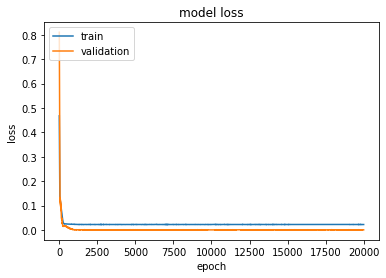

In [11]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [12]:
predictions = scaler_y.inverse_transform(predictions)
predictions

array([[-3.7000153],
       [-3.404772 ],
       [-3.7566648],
       [-3.7566648]], dtype=float32)

In [ ]:
#compare performance
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)